In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=0

In [2]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"

In [3]:
#This header file contains all the common packages
%matplotlib inline
%run header.py $shape_cat $vol $z_range 
%run -i func.py  
%run -i corr_func.py  

In [4]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [5]:
if vol!="uber":
    members=shapes

In [6]:
if quantile!="":
    i=int(quantile)

In [7]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')
elif key=="mag":
    key=('All','All','BCG_ZLUM')

In [8]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [9]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [10]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [11]:
NBINS=10

In [12]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [13]:
len(shapes)

105029

In [14]:
len(members)

105029

In [15]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [16]:
ng_abs=get_ng_list('abs', 'b')
ng_rel=get_ng_list('rel', 'b')

1it [00:00,  4.49it/s]

0 (39659, 121)
[62.7957] 39659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76418, 121)
[41.3534] 76418


3it [00:00,  5.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56639, 121)
[10.2082] 56639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 (1055, 121)
[89.9301] 1049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1388, 121)
[356.1978] 1387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


8it [00:00,  8.39it/s]

1 (32062, 121)
[46.0702] 32061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (887, 121)
[85.9508] 886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64697, 121)
[34.2725] 64697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18288, 121)
[328.6359] 18288


15it [00:00, 13.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19191, 121)
[326.4627] 19191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8723, 121)
[345.6461] 8723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5772, 121)
[53.8273] 5772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10908, 121)
[55.5192] 10908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1578, 121)
[64.3462] 1578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17593, 121)
[324.9338] 17593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45322, 121)
[38.6872] 45322
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85573, 121)
[355.948] 85573


18it [00:01, 11.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52531, 121)
[61.2859] 52531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60288, 121)


20it [00:01, 11.49it/s]

[57.0675] 60288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6464, 121)
[56.7296] 6464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38580, 121)
[311.7657] 38580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66427, 121)
[39.257] 66427


22it [00:01, 11.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83662, 121)
[335.8398] 83662
[ 0.  0.  0.  0.  0.  0.  0.  2. 17.  8.]


24it [00:02,  9.25it/s]

0 (97616, 121)
[39.2184] 97616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72320, 121)


26it [00:02,  8.14it/s]

[358.7909] 72320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79111, 121)
[38.1029] 79111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73409, 121)
[33.7675] 73409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83807, 121)


30it [00:02,  8.68it/s]

[84.0509] 83807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (793, 121)
[34.5804] 793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60766, 121)
[92.0626] 60766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


32it [00:03,  8.83it/s]

0 (67493, 121)
[97.7476] 67493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34449, 121)
[43.2515] 34449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29430, 121)


34it [00:03,  9.92it/s]

[85.0535] 29430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26442, 121)
[353.6014] 26442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2631, 121)
[38.178] 2631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80152, 121)


38it [00:03, 12.02it/s]

[355.65] 80152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (26165, 121)
[319.6316] 26164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17670, 121)
[22.8442] 17669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10722, 121)
[14.5183] 10722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (536, 121)


42it [00:03, 15.12it/s]

[85.7086] 533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18334, 121)
[342.4153] 18334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 (702, 121)
[327.4048] 697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76930, 121)
[32.5469] 76930


50it [00:03, 19.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (895, 121)
[46.3639] 892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3886, 121)
[47.2714] 3886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (444, 121)
[32.1066] 440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9050, 121)
[52.3993] 9050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (555, 121)
[40.8628] 553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7024, 121)
[352.5642] 7024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9460, 121)
[46.14] 9460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73316, 121)
[359.1382] 73316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (101463, 121)
[3.1457] 101463


53it [00:04, 13.81it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0. 10. 18.]
0 (9659, 121)
[86.2464] 9659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47576, 121)
[49.2612] 47576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41964, 121)
[43.6936] 41964


56it [00:04, 14.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9537, 121)
[18.4387] 9537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72493, 121)
[327.8581] 72493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51859, 121)


58it [00:04, 11.68it/s]

[67.4335] 51859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51472, 121)
[309.6073] 51472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103352, 121)


62it [00:05, 11.42it/s]

[78.6644] 103352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1370, 121)
[329.547] 1368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43948, 121)
[58.5559] 43948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


64it [00:05, 11.53it/s]

0 (48281, 121)
[71.8539] 48281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42762, 121)
[36.1473] 42762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1022, 121)
[34.3592] 1020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13905, 121)
[23.9983] 13904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16041, 121)


68it [00:05, 14.52it/s]

[54.5516] 16040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4637, 121)
[80.5034] 4637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70937, 121)
[68.7515] 70937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19140, 121)
[17.7742] 19140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


71it [00:05, 12.38it/s]

0 (92178, 121)
[29.3064] 92178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30819, 121)
[41.0226] 30819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15907, 121)


75it [00:05, 13.47it/s]

[16.5724] 15907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84019, 121)
[325.4905] 84019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5336, 121)
[34.2728] 5336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (811, 121)
[44.0498] 809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


78it [00:06, 13.63it/s]

0 (20720, 121)
[12.2469] 20720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64871, 121)
[6.8787] 64871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


80it [00:06, 11.42it/s]

0 (82746, 121)
[349.8034] 82746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41541, 121)
[2.0197] 41541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


82it [00:06, 12.48it/s]

0 (14336, 121)
[25.8903] 14336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35885, 121)
[323.1973] 35885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14077, 121)
[39.6842] 14076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47782, 121)
[311.459] 47782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


85it [00:06, 13.61it/s]

0 (31318, 121)
[317.9357] 31318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53866, 121)
[17.6829] 53866
[ 0.  0.  0.  0.  0.  0.  0.  1.  5. 13.]
1 (2536, 121)
[46.9605] 2535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80213, 121)


88it [00:06, 13.07it/s]

[72.0124] 80213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61815, 121)
[88.0773] 61815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59961, 121)


90it [00:07, 12.37it/s]

[13.2074] 59961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15105, 121)
[329.1033] 15105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58203, 121)
[43.487] 58202


92it [00:07, 11.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41825, 121)
[61.271] 41825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71104, 121)
[3.1873] 71104


96it [00:07, 11.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76398, 121)
[326.3687] 76398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17731, 121)
[22.4088] 17731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (683, 121)
[66.5172] 683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


101it [00:07, 15.58it/s]

0 (26984, 121)
[86.1552] 26984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14224, 121)
[33.6002] 14224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10113, 121)
[353.1819] 10112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22734, 121)
[53.5457] 22734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1701, 121)
[53.1628] 1701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40036, 121)


104it [00:07, 18.13it/s]

[312.6147] 40036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1392, 121)
[348.2295] 1389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99571, 121)
[36.2503] 99571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


107it [00:08, 13.54it/s]

1 (56009, 121)
[349.216] 56008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35573, 121)
[11.8358] 35572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88328, 121)


109it [00:08, 11.10it/s]

[322.5166] 88328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33680, 121)
[75.2697] 33679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1723, 121)
[48.6457] 1723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


112it [00:08, 13.24it/s]

0 (35547, 121)
[350.8522] 35547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16888, 121)
[34.4366] 16888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41879, 121)
[73.7731] 41878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80853, 121)


116it [00:08, 13.39it/s]

[47.2036] 80853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20712, 121)
[20.7413] 20712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18430, 121)
[353.22] 18430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92115, 121)
[70.006] 92115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72799, 121)
[29.0561] 72799


120it [00:09, 11.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38045, 121)
[77.0692] 38045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34019, 121)
[16.6762] 34019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7942, 121)
[1.2742] 7942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


125it [00:09, 14.58it/s]

1 (45686, 121)
[80.712] 45685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39353, 121)
[349.1634] 39352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2531, 121)
[93.0909] 2530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1536, 121)
[344.9766] 1536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8126, 121)
[94.0882] 8126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


127it [00:09, 14.16it/s]

0 (72445, 121)
[69.808] 72445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (63971, 121)
[3.0708] 63971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


131it [00:10, 14.83it/s]

0 (24621, 121)
[77.1318] 24621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27379, 121)
[14.3762] 27379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8194, 121)
[34.8144] 8194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


133it [00:10, 11.75it/s]

0 (100892, 121)
[75.3391] 100892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18514, 121)
[321.1699] 18514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1809, 121)
[93.2712] 1807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


136it [00:10, 13.29it/s]

1 (663, 121)
[37.8077] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (64197, 121)
[348.9377] 64195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93987, 121)
[41.4499] 93987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103084, 121)
[334.9423] 103084


140it [00:11,  9.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40872, 121)
[12.8614] 40872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9923, 121)
[10.3029] 9923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10148, 121)
[23.8086] 10148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71030, 121)
[359.4046] 71030


142it [00:11,  9.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12378, 121)
[329.83] 12378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90063, 121)
[59.7119] 90063


146it [00:11,  9.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9715, 121)
[334.7089] 9714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47968, 121)
[12.5511] 47968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


148it [00:11,  9.61it/s]

1 (21152, 121)
[54.7854] 21151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78923, 121)
[60.6796] 78923
[ 0.  0.  0.  0.  0.  1.  3.  8. 19.  9.]


150it [00:12, 10.63it/s]

0 (56624, 121)
[18.359] 56624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (37081, 121)
[345.1088] 37079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21141, 121)
[46.8917] 21141


152it [00:12, 11.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15854, 121)
[307.1946] 15853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70707, 121)
[70.2233] 70707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53107, 121)


156it [00:12, 11.69it/s]

[92.3614] 53107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66209, 121)
[37.4315] 66209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (481, 121)
[58.2396] 481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80167, 121)
[35.0373] 80167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76004, 121)


158it [00:12,  9.11it/s]

[28.2905] 76004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18393, 121)
[335.9246] 18393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36147, 121)
[85.8834] 36147


160it [00:13,  9.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95783, 121)
[82.6572] 95783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


162it [00:13,  9.27it/s]

0 (42193, 121)
[5.2308] 42193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45129, 121)
[352.2754] 45129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


164it [00:13,  8.44it/s]

0 (83595, 121)
[356.5995] 83595
[ 0.  0.  0.  1.  0.  0.  0.  2. 18.  8.]
0 (39868, 121)
[59.026] 39868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32868, 121)


167it [00:13,  7.89it/s]

[54.8405] 32868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91671, 121)
[358.9116] 91671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


169it [00:14,  9.29it/s]

0 (34362, 121)
[9.5471] 34362
[0. 0. 0. 0. 0. 0. 0. 0. 1. 8.]
0 (3603, 121)
[19.9124] 3603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83342, 121)


171it [00:14,  9.16it/s]

[66.6866] 83342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22442, 121)
[82.8684] 22442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1115, 121)
[44.7506] 1112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


173it [00:14,  8.87it/s]

0 (95263, 121)
[23.3061] 95263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84761, 121)


175it [00:14,  8.42it/s]

[316.9307] 84761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14244, 121)
[36.6968] 14243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


176it [00:14,  7.30it/s]

0 (92776, 121)
[43.2011] 92776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6970, 121)
[88.6433] 6970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77135, 121)


179it [00:15,  7.98it/s]

[15.2202] 77135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78187, 121)
[308.301] 78187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


181it [00:15,  8.23it/s]

0 (44178, 121)
[71.8888] 44178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50208, 121)
[349.3402] 50208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41351, 121)
[43.2083] 41350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (798, 121)
[317.7048] 796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69579, 121)
[15.8424] 69579


186it [00:15, 10.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3685, 121)
[331.9841] 3684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61824, 121)
[56.5498] 61824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58322, 121)


191it [00:16, 13.34it/s]

[51.1294] 58321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4445, 121)
[6.9613] 4445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21061, 121)
[341.2709] 21061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1507, 121)
[356.2022] 1504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (2241, 121)
[16.8755] 2239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87421, 121)
[67.6861] 87421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50732, 121)


195it [00:16, 11.15it/s]

[90.7416] 50732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69914, 121)
[3.3305] 69914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (478, 121)
[19.8357] 476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

197it [00:16, 12.20it/s]

(3781, 121)
[325.01] 3781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37069, 121)
[346.1576] 37069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24193, 121)
[43.2455] 24193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51321, 121)


199it [00:16, 11.48it/s]

[53.3323] 51321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30898, 121)
[350.7546] 30898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89744, 121)


203it [00:17, 11.88it/s]

[68.482] 89744
[ 0.  0.  0.  0.  0.  0.  0.  1.  9. 18.]
0 (8489, 121)
[342.6607] 8489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6425, 121)
[77.2544] 6425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (454, 121)
[38.7588] 453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34609, 121)
[0.1162] 34609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93334, 121)
[4.0611] 93334


208it [00:17, 11.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65528, 121)
[31.771] 65528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34490, 121)
[8.3339] 34490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1566, 121)


212it [00:17, 13.11it/s]

[337.6791] 1565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6813, 121)
[90.8173] 6813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17653, 121)
[92.6079] 17653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70313, 121)
[326.7943] 70313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


214it [00:18, 12.33it/s]

1 (37104, 121)
[14.8092] 37103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79785, 121)
[321.3608] 79785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


216it [00:18, 10.95it/s]

0 (93853, 121)
[75.1821] 93853
[0. 0. 0. 0. 0. 0. 0. 0. 2. 7.]
0 (7405, 121)
[344.5391] 7405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17834, 121)
[337.9905] 17833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


220it [00:18, 13.46it/s]

0 (1439, 121)
[345.9401] 1439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1849, 121)
[90.8592] 1849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31320, 121)
[95.3846] 31320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88864, 121)


222it [00:18, 11.52it/s]

[66.903] 88864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43193, 121)
[347.3154] 43193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55745, 121)


224it [00:18, 11.94it/s]

[6.3533] 55745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5876, 121)
[73.7968] 5876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5175, 121)
[43.107] 5175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57934, 121)
[49.5241] 57934


229it [00:19, 15.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2425, 121)
[351.35] 2425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31057, 121)
[53.4843] 31057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4358, 121)
[14.342] 4358
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89854, 121)


231it [00:19, 12.62it/s]

[323.9078] 89854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5538, 121)
[355.4661] 5538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (376, 121)
[28.0303] 373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23888, 121)
[358.4442] 23887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41758, 121)


234it [00:19, 14.65it/s]

[324.0373] 41758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95071, 121)
[23.8068] 95071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


236it [00:19, 11.01it/s]

1 (48849, 121)
[38.2965] 48848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3242, 121)
[50.7135] 3242


238it [00:19, 11.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1169, 121)
[37.7777] 1169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1784, 121)
[357.7857] 1783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2024, 121)
[26.2665] 2023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84208, 121)
[35.7716] 84208


244it [00:20, 14.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1252, 121)
[345.1023] 1251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19447, 121)
[358.2012] 19447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30762, 121)
[43.7142] 30762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8791, 121)
[56.3858] 8790
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 (307, 121)
[56.5755] 301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (660, 121)


248it [00:20, 16.17it/s]

[50.8536] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46771, 121)
[330.8737] 46771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93403, 121)
[88.5806] 93403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65548, 121)
[62.5416] 65548


254it [00:20, 12.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9017, 121)
[321.6352] 9017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2765, 121)
[353.9316] 2765
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31337, 121)
[31.9147] 31337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32978, 121)
[328.] 32978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (64302, 121)
[14.9838] 64300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92083, 121)
[341.424] 92083


258it [00:21, 10.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47203, 121)
[33.9942] 47203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30263, 121)
[43.7141] 30263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30376, 121)
[58.8619] 30376


260it [00:21, 11.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44546, 121)
[82.7251] 44546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5431, 121)
[16.7998] 5431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12572, 121)
[353.3783] 12571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82937, 121)


263it [00:21, 12.17it/s]

[92.5462] 82937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79758, 121)
[50.4387] 79758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


265it [00:22,  8.59it/s]

0 (92649, 121)
[35.8009] 92649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7097, 121)


268it [00:22,  9.87it/s]

[93.1736] 7096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4831, 121)
[30.583] 4831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55125, 121)
[345.3369] 55125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (443, 121)
[28.1403] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10448, 121)
[78.4523] 10448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21195, 121)
[55.6981] 21195


272it [00:22, 12.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (823, 121)
[349.0913] 821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48344, 121)
[67.3137] 48344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23475, 121)
[340.3384] 23475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12652, 121)
[71.0261] 12652


275it [00:22, 12.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84977, 121)
[36.5782] 84977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (94916, 121)


281it [00:23, 12.41it/s]

[347.8619] 94916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2648, 121)
[36.4485] 2648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (948, 121)
[353.0887] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1385, 121)
[1.3316] 1384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16423, 121)
[340.2671] 16423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


284it [00:23, 14.96it/s]

0 (21631, 121)
[33.7967] 21631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3438, 121)
[75.883] 3438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15726, 121)
[323.7791] 15726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8226, 121)
[339.3643] 8226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (865, 121)
[27.0846] 865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1382, 121)
[335.196] 1381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63182, 121)


288it [00:23, 16.04it/s]

[86.0067] 63182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35622, 121)
[45.4068] 35622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2377, 121)
[331.8379] 2377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2751, 121)
[71.1616] 2751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


295it [00:23, 19.22it/s]

0 (68795, 121)
[19.7173] 68795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41192, 121)
[0.5497] 41192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1582, 121)
[347.7952] 1582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (699, 121)
[33.803] 697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


298it [00:23, 20.54it/s]

0 (25105, 121)
[22.0623] 25105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (849, 121)
[93.3392] 849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43148, 121)
[36.0592] 43148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39050, 121)
[35.9169] 39050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10041, 121)
[88.0084] 10041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


301it [00:24, 17.78it/s]

0 (78753, 121)
[324.1696] 78753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9086, 121)
[320.4552] 9086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1461, 121)
[347.7808] 1461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40725, 121)
[73.7734] 40725


307it [00:24, 18.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49642, 121)
[1.381] 49642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21091, 121)
[353.9223] 21091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (469, 121)
[334.0305] 468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84304, 121)
[344.3487] 84304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83865, 121)
[27.9511] 83865


310it [00:24, 12.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49612, 121)
[348.8615] 49612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74677, 121)
[344.4509] 74677


312it [00:24, 11.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (66210, 121)
[28.8951] 66210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37954, 121)
[14.8382] 37954


316it [00:25, 13.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (2255, 121)
[339.923] 2255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (576, 121)
[326.8481] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50927, 121)
[337.4864] 50927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83789, 121)
[346.6679] 83789


320it [00:25, 13.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39701, 121)
[34.9506] 39701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1286, 121)
[12.2744] 1286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38979, 121)
[62.9361] 38979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77218, 121)


325it [00:25, 16.86it/s]

[329.4816] 77218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (455, 121)
[32.5419] 455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (511, 121)
[34.4454] 510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30909, 121)
[44.2122] 30909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9241, 121)
[333.8166] 9241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64205, 121)


327it [00:25, 16.76it/s]

[39.1478] 64205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (480, 121)
[34.1052] 477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (604, 121)
[90.4167] 604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48085, 121)
[35.6188] 48084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4939, 121)
[11.75] 4939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45953, 121)
[68.9395] 45953


334it [00:26, 18.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1017, 121)
[348.5695] 1017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18625, 121)
[323.115] 18625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82952, 121)
[323.3259] 82952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1287, 121)
[321.7888] 1285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


338it [00:26, 20.32it/s]

0 (22004, 121)
[5.5245] 22004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1607, 121)
[36.4162] 1607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34677, 121)
[18.5509] 34676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1850, 121)
[51.0369] 1848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1208, 121)
[347.2624] 1208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (29060, 121)


341it [00:26, 22.02it/s]

[73.9188] 29060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43252, 121)
[11.622] 43252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91250, 121)
[66.1768] 91250


344it [00:26, 13.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102763, 121)
[43.6594] 102763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


346it [00:27, 11.62it/s]

0 (85206, 121)
[13.138] 85206
[ 0.  0.  0.  0.  0.  0.  4.  1. 14.  4.]
0 (1982, 121)
[69.9885] 1982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30590, 121)


348it [00:27, 13.13it/s]

[74.698] 30590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10363, 121)
[66.4134] 10363
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61549, 121)
[15.3363] 61549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


350it [00:27, 11.83it/s]

0 (40925, 121)
[59.2617] 40925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9267, 121)
[55.4962] 9267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79360, 121)


352it [00:27,  9.33it/s]

[345.8436] 79359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
0 (14777, 121)
[40.1873] 14777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (45403, 121)
[12.8491] 45403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


355it [00:28,  9.48it/s]

0 (81072, 121)
[69.2637] 81072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45116, 121)


358it [00:28, 10.88it/s]

[87.9268] 45116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1582, 121)
[27.7377] 1581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20786, 121)
[73.049] 20785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6023, 121)
[307.9197] 6023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48592, 121)


362it [00:28, 12.48it/s]

[46.1658] 48592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68795, 121)
[56.9363] 68795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8367, 121)
[26.2695] 8367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


364it [00:28, 11.63it/s]

0 (80195, 121)
[58.5988] 80195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28860, 121)
[35.3976] 28860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39274, 121)


366it [00:28, 12.63it/s]

[66.5994] 39274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32777, 121)
[77.5997] 32777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11261, 121)
[81.1833] 11261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96755, 121)


371it [00:29, 13.45it/s]

[74.6022] 96755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1971, 121)
[333.8451] 1971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37350, 121)
[80.8585] 37350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4855, 121)
[32.4726] 4855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (601, 121)
[28.4048] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


374it [00:29, 15.93it/s]

2 (5841, 121)
[13.3754] 5839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31735, 121)
[29.6308] 31735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92848, 121)
[8.4432] 92848


378it [00:29, 13.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4141, 121)
[3.4722] 4140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49630, 121)
[340.4391] 49629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37547, 121)
[73.2645] 37547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


382it [00:29, 16.13it/s]

0 (26557, 121)
[46.7425] 26557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (5565, 121)
[19.9682] 5563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (686, 121)
[38.9664] 682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5616, 121)
[28.6682] 5616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37384, 121)
[359.1761] 37384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46867, 121)


385it [00:29, 16.75it/s]

[317.4305] 46867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6032, 121)
[313.5289] 6032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75858, 121)
[83.6285] 75858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1101, 121)


388it [00:30, 14.71it/s]

[30.1673] 1101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39299, 121)
[84.6063] 39299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55012, 121)
[62.9537] 55012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2209, 121)
[345.1842] 2208


392it [00:30, 11.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1328, 121)
[95.7119] 1328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90603, 121)
[44.308] 90603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


394it [00:30, 12.17it/s]

0 (34099, 121)
[11.6654] 34099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30181, 121)
[54.6017] 30181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92510, 121)
[33.4643] 92510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76964, 121)
[321.5137] 76964


399it [00:31, 10.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46884, 121)
[68.3777] 46884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1652, 121)
[345.8783] 1650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41751, 121)
[56.1235] 41751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


402it [00:31, 12.49it/s]

1 (22904, 121)
[322.2875] 22903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2661, 121)
[352.968] 2661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12628, 121)
[339.4846] 12628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5853, 121)
[310.2424] 5853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3925, 121)
[46.9619] 3925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31384, 121)
[349.5009] 31384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


406it [00:31, 13.27it/s]

0 (88098, 121)
[67.3939] 88098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25073, 121)
[35.4747] 25073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1584, 121)
[60.5994] 1584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


409it [00:31, 13.21it/s]

0 (90981, 121)
[95.6489] 90981
[0. 0. 0. 0. 0. 0. 2. 7. 3. 5.]
0 (18965, 121)
[33.8647] 18965
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44949, 121)
[321.9876] 44949


413it [00:32, 12.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2371, 121)
[87.6303] 2371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88539, 121)
[321.1532] 88539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


418it [00:32, 16.11it/s]

2 (1974, 121)
[338.8827] 1972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11049, 121)
[23.4583] 11049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1416, 121)
[35.6033] 1416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5889, 121)
[6.4894] 5888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18722, 121)
[8.5333] 18722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72170, 121)


421it [00:32, 15.54it/s]

[5.5742] 72170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2115, 121)
[311.7802] 2115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31357, 121)
[34.3351] 31357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23254, 121)
[315.9113] 23254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38374, 121)


425it [00:32, 14.05it/s]

[350.4156] 38374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5015, 121)
[44.3736] 5015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79485, 121)
[356.2774] 79485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


428it [00:32, 15.42it/s]

0 (1080, 121)
[54.8054] 1080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (606, 121)
[56.564] 606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1090, 121)
[18.184] 1089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2913, 121)
[317.7544] 2913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3616, 121)
[92.0008] 3616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1840, 121)
[338.2373] 1840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6600, 121)


434it [00:33, 19.84it/s]

[334.0647] 6600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1252, 121)
[68.7172] 1252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2443, 121)
[2.9705] 2443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92498, 121)
[35.304] 92498
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 15.]
0 (57264, 121)
[49.6693] 57264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15290, 121)
[349.0203] 15290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36314, 121)
[27.971] 36314


441it [00:33, 14.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1413, 121)
[12.8904] 1411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43453, 121)
[319.1138] 43452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19280, 121)
[331.7439] 19279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


444it [00:33, 13.63it/s]

0 (81849, 121)
[52.8762] 81849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3866, 121)
[339.1033] 3866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23331, 121)
[22.513] 23331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4939, 121)


447it [00:34, 16.18it/s]

[48.7822] 4939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11598, 121)
[95.7816] 11598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37921, 121)
[59.1703] 37921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82505, 121)


450it [00:34, 13.30it/s]

[18.8892] 82505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40016, 121)
[91.8946] 40016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40849, 121)
[38.0791] 40849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2229, 121)


452it [00:34, 11.42it/s]

[335.4784] 2226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79024, 121)
[75.6685] 79024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4795, 121)
[8.8175] 4795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2061, 121)


455it [00:34, 13.43it/s]

[345.4322] 2060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39704, 121)
[36.3592] 39704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91161, 121)
[15.5285] 91161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81079, 121)
[24.1369] 81079


460it [00:35, 11.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (12563, 121)
[329.5744] 12560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40493, 121)
[78.9049] 40493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (541, 121)
[66.0922] 539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38993, 121)
[22.7214] 38992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36797, 121)
[36.486] 36797


464it [00:35, 12.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59051, 121)
[71.4914] 59051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7110, 121)
[39.6373] 7110
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22529, 121)


467it [00:35, 13.68it/s]

[322.5145] 22529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9667, 121)
[46.7074] 9667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1091, 121)
[0.3892] 1091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29592, 121)
[73.3391] 29592


471it [00:35, 14.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37448, 121)
[37.2587] 37448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35721, 121)
[10.9426] 35721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (825, 121)
[25.5117] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89166, 121)
[41.1754] 89166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32709, 121)
[32.0845] 32709


473it [00:36, 11.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47633, 121)
[17.9431] 47633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86663, 121)
[350.9088] 86663


477it [00:36, 10.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43289, 121)
[318.7347] 43289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6655, 121)
[55.5277] 6655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2447, 121)
[345.1571] 2447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


479it [00:36, 10.56it/s]

0 (82401, 121)
[19.9325] 82401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (2715, 121)
[65.6443] 2715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80726, 121)


483it [00:37, 11.84it/s]

[59.0156] 80726
[ 0.  0.  0.  0.  0.  0.  0.  0.  6. 15.]
0 (18041, 121)
[72.3985] 18041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42367, 121)
[52.1152] 42367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1583, 121)
[33.393] 1583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


489it [00:37, 15.88it/s]

0 (33634, 121)
[86.5199] 33634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (292, 121)
[346.5471] 290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4008, 121)
[315.3156] 4008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13668, 121)
[22.7501] 13668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44058, 121)
[31.4496] 44058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[318.2994] 598


493it [00:37, 16.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49928, 121)
[65.9059] 49928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13208, 121)
[9.6651] 13208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17771, 121)
[57.3444] 17771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


495it [00:37, 14.91it/s]

0 (44113, 121)
[71.7163] 44113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54012, 121)
[69.0399] 54012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42240, 121)


497it [00:37, 13.09it/s]

[315.9492] 42240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65144, 121)
[325.6449] 65144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[87.4295] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55403, 121)


502it [00:38, 15.28it/s]

[71.7313] 55403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46554, 121)
[11.8918] 46554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10008, 121)
[341.6928] 10007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1196, 121)
[53.4733] 1196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21334, 121)


504it [00:38, 15.06it/s]

[43.5763] 21334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47465, 121)
[31.9411] 47465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72855, 121)
[34.4775] 72855


506it [00:38,  9.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69336, 121)
[43.5638] 69336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46843, 121)
[72.9648] 46843


508it [00:39,  8.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78439, 121)
[41.4329] 78439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2678, 121)
[34.6267] 2678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


511it [00:39, 10.56it/s]

0 (2591, 121)
[333.6246] 2591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (47491, 121)
[45.3462] 47489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24048, 121)
[21.1163] 24048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


513it [00:39, 12.30it/s]

0 (1463, 121)
[42.3699] 1463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83686, 121)
[42.4547] 83686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5686, 121)


518it [00:39, 12.92it/s]

[338.3514] 5686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1009, 121)
[17.6216] 1009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6763, 121)
[341.1757] 6762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47234, 121)
[55.0909] 47234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48098, 121)


520it [00:39, 11.46it/s]

[350.8183] 48098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22101, 121)
[325.2007] 22101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7943, 121)
[94.224] 7943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2085, 121)


525it [00:40, 14.08it/s]

[338.7626] 2085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39223, 121)
[334.2979] 39223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52030, 121)
[351.531] 52030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2376, 121)
[71.6367] 2376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


528it [00:40, 16.54it/s]

1 (43881, 121)
[38.5423] 43880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3078, 121)
[70.6967] 3078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (356, 121)
[59.8401] 354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (523, 121)
[345.7711] 521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5785, 121)
[335.583] 5785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5401, 121)
[34.8703] 5401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43100, 121)
[88.1644] 43100


532it [00:40, 18.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14280, 121)
[54.7716] 14280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17291, 121)
[4.318] 17291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62120, 121)
[68.1771] 62120


535it [00:40, 17.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (880, 121)
[36.8234] 880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (563, 121)
[316.1684] 563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2071, 121)
[36.4458] 2071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12249, 121)
[337.5771] 12249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80351, 121)
[81.0696] 80351


540it [00:40, 18.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103608, 121)
[50.5593] 103608
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 17.]
0 (19567, 121)


543it [00:41, 13.33it/s]

[52.8467] 19567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29772, 121)
[12.8415] 29772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[77.0907] 1260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


546it [00:41, 13.33it/s]

0 (7181, 121)
[30.6149] 7181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73004, 121)
[51.0262] 73004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91211, 121)
[57.2193] 91211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (33967, 121)
[339.0425] 33967


550it [00:41, 10.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40181, 121)
[58.7807] 40181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31719, 121)
[87.0739] 31719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


552it [00:42, 10.93it/s]

0 (6041, 121)
[330.0358] 6041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74368, 121)
[344.064] 74368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


554it [00:42, 10.43it/s]

0 (88413, 121)
[19.3864] 88413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (884, 121)
[60.7537] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33261, 121)
[341.1141] 33261
[0. 0. 0. 0. 0. 0. 0. 0. 1. 8.]
0 (27077, 121)
[30.2845] 27077


560it [00:42, 15.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35741, 121)
[311.718] 35741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7682, 121)
[54.0612] 7682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1677, 121)
[88.3912] 1677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1276, 121)
[349.1842] 1275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8605, 121)
[38.9043] 8605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46604, 121)
[60.0597] 46604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


563it [00:42, 14.05it/s]

0 (81748, 121)
[51.7188] 81748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27275, 121)
[12.067] 27275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


565it [00:42, 14.52it/s]

0 (47216, 121)
[65.5651] 47216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25123, 121)
[29.6937] 25123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27867, 121)
[345.2014] 27867


569it [00:43, 13.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9637, 121)
[39.5227] 9637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55861, 121)
[74.2808] 55861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3062, 121)
[30.8022] 3062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


571it [00:43, 12.56it/s]

0 (81130, 121)
[50.6793] 81130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8645, 121)
[37.1981] 8645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41800, 121)


575it [00:43, 12.76it/s]

[337.0985] 41800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77543, 121)
[75.7208] 77543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5304, 121)
[51.8544] 5303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


577it [00:43, 13.99it/s]

0 (1890, 121)
[94.9613] 1890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61553, 121)
[70.9386] 61553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35307, 121)
[357.8642] 35307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17253, 121)


582it [00:44, 16.01it/s]

[331.1672] 17253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3558, 121)
[79.6002] 3558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25366, 121)
[40.754] 25366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8277, 121)
[330.7366] 8277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36936, 121)


585it [00:44, 15.30it/s]

[311.532] 36936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1347, 121)
[353.6069] 1347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68092, 121)
[44.5992] 68092
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10396, 121)
[85.9403] 10396


588it [00:44, 14.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24338, 121)
[42.6667] 24338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83733, 121)
[46.3188] 83733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


590it [00:44, 13.48it/s]

0 (92312, 121)
[8.4453] 92312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (1070, 121)
[45.8155] 1070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10163, 121)
[43.4272] 10163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3855, 121)
[353.6755] 3855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8354, 121)
[80.8403] 8353


596it [00:44, 15.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41168, 121)
[32.4394] 41168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34493, 121)
[75.7924] 34493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32582, 121)
[47.908] 32582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


598it [00:45, 16.38it/s]

0 (1537, 121)
[73.5052] 1537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42529, 121)
[70.4935] 42529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72795, 121)
[20.9763] 72795


600it [00:45, 14.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8688, 121)
[38.7788] 8688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69196, 121)
[72.4738] 69196


602it [00:45, 12.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22481, 121)
[39.7854] 22481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1437, 121)
[341.8455] 1437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78034, 121)
[62.2466] 78034


604it [00:45, 12.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6937, 121)
[352.4493] 6937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1575, 121)
[347.8831] 1575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6460, 121)
[348.477] 6460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (97991, 121)


608it [00:45, 12.11it/s]

[355.2774] 97991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1254, 121)
[72.121] 1253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10455, 121)
[70.8194] 10455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2863, 121)


614it [00:46, 16.48it/s]

[23.4174] 2863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33235, 121)
[61.7371] 33235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6345, 121)
[21.7682] 6345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1047, 121)
[322.2796] 1044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69170, 121)


616it [00:46, 14.90it/s]

[301.5367] 69170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (775, 121)
[341.3334] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35911, 121)
[43.962] 35911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53524, 121)


618it [00:46, 13.25it/s]

[58.6086] 53524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69533, 121)
[56.7455] 69533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95621, 121)
[56.4374] 95621


623it [00:47,  8.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7701, 121)
[37.5297] 7701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41721, 121)
[37.6016] 41721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46955, 121)
[44.0071] 46955
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (94013, 121)
[25.2273] 94013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85761, 121)


625it [00:47,  7.82it/s]

[63.2314] 85761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95885, 121)
[76.8016] 95885


627it [00:47,  7.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50143, 121)
[56.1816] 50143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13675, 121)
[86.9259] 13675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57902, 121)
[40.27] 57901


631it [00:48, 10.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2231, 121)
[355.4821] 2231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24711, 121)
[29.6244] 24711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1052, 121)
[89.4281] 1051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2751, 121)
[316.0485] 2751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1422, 121)
[330.077] 1422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47740, 121)


635it [00:48, 12.69it/s]

[58.526] 47739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82725, 121)
[355.1231] 82725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


637it [00:48,  9.57it/s]

0 (93868, 121)
[27.3995] 93868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2479, 121)
[305.3713] 2479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96212, 121)


639it [00:48,  9.55it/s]

[28.0922] 96212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3165, 121)
[26.5829] 3165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3704, 121)
[44.7169] 3704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71137, 121)


642it [00:49, 10.94it/s]

[64.1776] 71137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62839, 121)
[72.9329] 62839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


644it [00:49, 10.24it/s]

0 (43274, 121)
[6.3552] 43274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4515, 121)
[47.093] 4515
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91388, 121)


646it [00:49,  9.96it/s]

[330.2318] 91388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1003, 121)
[322.6798] 1001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1124, 121)
[71.4339] 1123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (97961, 121)


649it [00:49, 10.72it/s]

[333.6778] 97961
[ 0.  0.  0.  0.  0.  0.  0.  3. 25. 15.]
0 (1804, 121)
[88.2445] 1804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2535, 121)
[51.4603] 2535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (995, 121)
[75.6117] 994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50034, 121)


653it [00:49, 12.56it/s]

[13.0767] 50034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41027, 121)
[69.5657] 41027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


655it [00:50, 10.51it/s]

0 (66194, 121)
[350.7566] 66194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1561, 121)
[66.239] 1561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13238, 121)
[34.8036] 13238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15848, 121)
[29.6563] 15848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

663it [00:50, 14.40it/s]

(4768, 121)
[325.866] 4768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3690, 121)
[351.1395] 3690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6896, 121)
[20.3277] 6896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2287, 121)
[356.2651] 2287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35733, 121)
[44.3109] 35733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28929, 121)
[349.6165] 28929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


668it [00:50, 17.01it/s]

0 (34989, 121)
[332.2873] 34989
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 19.]
0 (1144, 121)
[77.469] 1144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9505, 121)
[343.8808] 9505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55710, 121)
[80.6354] 55710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


671it [00:50, 15.91it/s]

1 (74242, 121)
[335.8109] 74241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (662, 121)
[345.3409] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39437, 121)
[78.3376] 39437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5941, 121)
[340.2671] 5941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7688, 121)
[74.2582] 7688


675it [00:51, 16.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4161, 121)
[9.7078] 4161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84043, 121)
[357.8301] 84043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (21469, 121)
[4.0934] 21469
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


677it [00:51, 13.89it/s]

0 (98517, 121)
[323.2148] 98517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76726, 121)


679it [00:51, 12.96it/s]

[34.8325] 76726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (336, 121)
[61.3375] 336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74967, 121)
[62.1227] 74967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54723, 121)


686it [00:51, 14.18it/s]

[10.0204] 54723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (544, 121)
[45.306] 542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (732, 121)
[356.273] 729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1785, 121)
[64.6783] 1784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (983, 121)
[72.8318] 981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6017, 121)
[88.844] 6017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


689it [00:52, 14.57it/s]

0 (40843, 121)
[70.4486] 40843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70218, 121)
[67.384] 70218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13155, 121)
[75.8332] 13155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36794, 121)


693it [00:52, 16.57it/s]

[311.4119] 36794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3377, 121)
[71.9502] 3377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2280, 121)
[72.3848] 2279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59029, 121)
[60.5924] 59029
[0. 0. 0. 0. 0. 2. 3. 4. 4. 2.]
0 (16929, 121)


696it [00:52, 18.02it/s]

[53.0487] 16929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1311, 121)
[77.9074] 1308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42430, 121)
[60.0806] 42430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1035, 121)
[41.6588] 1035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


699it [00:52, 18.79it/s]

0 (23773, 121)
[340.7545] 23773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (350, 121)
[359.5453] 349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6849, 121)
[38.6036] 6849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82531, 121)
[20.2329] 82531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


704it [00:52, 16.53it/s]

0 (41275, 121)
[348.5663] 41275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1127, 121)
[13.1939] 1126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42760, 121)
[3.3774] 42760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11363, 121)
[41.867] 11363
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


707it [00:53, 15.88it/s]

0 (40652, 121)
[73.078] 40652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51153, 121)
[17.4716] 51153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27478, 121)
[6.2364] 27477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


712it [00:53, 17.87it/s]

3 (387, 121)
[67.5618] 384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27560, 121)
[15.2525] 27560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38558, 121)
[84.9124] 38558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22204, 121)
[84.0288] 22204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


714it [00:53, 16.45it/s]

1 (45447, 121)
[13.5848] 45446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6564, 121)
[8.6836] 6564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19376, 121)
[335.2016] 19376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57549, 121)


720it [00:53, 17.38it/s]

[24.9847] 57549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24673, 121)
[334.0952] 24673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1726, 121)
[19.9175] 1726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1719, 121)
[348.1567] 1719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48257, 121)
[59.8606] 48257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


724it [00:53, 20.70it/s]

1 (689, 121)
[44.2319] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3789, 121)
[302.3739] 3789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[326.3376] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40298, 121)
[60.7222] 40298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8478, 121)
[7.7926] 8477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2746, 121)
[353.3732] 2746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19800, 121)
[353.4573] 19799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


732it [00:54, 23.35it/s]

0 (39577, 121)
[40.7641] 39577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10523, 121)
[55.7484] 10523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (633, 121)
[77.2601] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28139, 121)
[341.2171] 28139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24979, 121)
[70.8829] 24979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18660, 121)


735it [00:54, 21.23it/s]

[40.6961] 18660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11386, 121)
[340.8936] 11386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34079, 121)
[56.9432] 34079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2362, 121)
[64.5237] 2362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7729, 121)
[0.255] 7729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8694, 121)
[328.6027] 8694

740it [00:54, 23.45it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1505, 121)
[13.4827] 1505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47095, 121)
[5.8773] 47095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56848, 121)
[75.7636] 56848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


743it [00:54, 21.47it/s]

0 (7508, 121)
[24.9406] 7508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2853, 121)
[38.0423] 2850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27638, 121)
[0.4566] 27638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50307, 121)
[15.8768] 50307


749it [00:55, 19.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6452, 121)
[346.3162] 6452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58856, 121)
[317.3407] 58856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2481, 121)
[81.5098] 2481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (942, 121)
[23.1325] 941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (675, 121)
[41.9735] 674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


752it [00:55, 19.11it/s]

0 (89247, 121)
[85.4087] 89247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3898, 121)
[354.9905] 3898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8233, 121)
[321.6837] 8233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6386, 121)
[353.4078] 6386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7348, 121)
[19.4762] 7347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


756it [00:55, 22.58it/s]

0 (13033, 121)
[23.66] 13033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47459, 121)
[90.0939] 47459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47352, 121)
[47.337] 47352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6711, 121)


759it [00:55, 19.66it/s]

[340.0876] 6711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46646, 121)
[42.5047] 46646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53109, 121)
[39.3136] 53109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


764it [00:55, 16.10it/s]

0 (22611, 121)
[46.1492] 22611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11193, 121)
[326.798] 11193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72888, 121)
[42.8654] 72888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


766it [00:56, 12.59it/s]

0 (75102, 121)
[16.5328] 75102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76169, 121)
[19.1301] 76169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70513, 121)
[323.8023] 70513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (101253, 121)
[10.0931] 101253


771it [00:56, 11.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42267, 121)
[41.5615] 42267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9992, 121)
[7.165] 9991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (905, 121)
[73.5353] 905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[25.8574] 598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46570, 121)


774it [00:56, 11.86it/s]

[85.3213] 46570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6782, 121)
[345.5348] 6782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12347, 121)
[36.7129] 12347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


776it [00:57, 11.57it/s]

0 (75118, 121)
[354.9309] 75118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27618, 121)
[318.5221] 27618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9300, 121)


780it [00:57, 14.13it/s]

[94.975] 9300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21954, 121)
[344.3713] 21953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24820, 121)
[323.1485] 24819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80836, 121)
[59.7965] 80836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90856, 121)
[318.6386] 90856


784it [00:57, 10.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72000, 121)
[70.0952] 72000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (1024, 121)
[306.9371] 1024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


787it [00:57, 12.27it/s]

0 (11520, 121)
[355.0801] 11520
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7474, 121)
[46.0589] 7473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49878, 121)
[348.713] 49878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (592, 121)
[34.2784] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2079, 121)
[29.0743] 2079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22358, 121)


791it [00:58, 15.44it/s]

[322.2435] 22358
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (831, 121)
[20.5245] 830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28431, 121)
[73.3987] 28430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49656, 121)
[22.7386] 49656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


794it [00:58, 14.78it/s]

1 (33760, 121)
[324.1152] 33759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16033, 121)
[23.2942] 16033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18444, 121)
[21.3057] 18444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42480, 121)
[36.8686] 42480


797it [00:58, 15.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49841, 121)
[306.313] 49841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70464, 121)


799it [00:58, 11.62it/s]

[325.2115] 70464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65748, 121)
[70.4638] 65748


801it [00:58, 11.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10856, 121)
[89.6738] 10856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (307, 121)
[59.4822] 305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86596, 121)
[0.2105] 86596


805it [00:59, 12.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14061, 121)
[78.4457] 14061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57010, 121)
[71.8021] 57010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62017, 121)


807it [00:59, 12.05it/s]

[347.2632] 62017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (536, 121)
[23.0566] 534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92417, 121)
[26.2804] 92417


809it [00:59, 10.91it/s]

[0. 0. 0. 0. 0. 0. 1. 0. 2. 0.]
1 (4759, 121)
[356.9037] 4758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26171, 121)
[319.6435] 26171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1946, 121)
[349.4282] 1946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (873, 121)
[85.0566] 873


812it [00:59, 12.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44650, 121)
[68.5904] 44650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57541, 121)
[345.512] 57541


816it [01:00, 11.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46093, 121)
[70.6705] 46093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (684, 121)
[20.2396] 684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67677, 121)
[304.9202] 67677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (98257, 121)
[334.1309] 98257


818it [01:00,  8.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15058, 121)
[44.7217] 15058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95116, 121)
[341.2957] 95116


822it [01:00,  9.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52600, 121)
[33.8918] 52600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (313, 121)
[58.1094] 313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45028, 121)


825it [01:00, 12.07it/s]

[96.3673] 45028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1172, 121)
[41.4642] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (788, 121)
[2.8604] 788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44497, 121)
[29.6415] 44497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66572, 121)


827it [01:01, 11.02it/s]

[343.9991] 66572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4939, 121)
[42.6091] 4939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27494, 121)
[70.3594] 27494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78615, 121)


832it [01:01, 13.08it/s]

[51.6992] 78615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18483, 121)
[321.861] 18483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21178, 121)
[328.6843] 21178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72398, 121)


834it [01:01, 12.85it/s]

[333.4535] 72398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[30.1239] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48796, 121)
[70.7603] 48796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37191, 121)


836it [01:01, 12.71it/s]

[351.5112] 37191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74934, 121)
[333.5931] 74934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2670, 121)


838it [01:02, 11.92it/s]

[355.5375] 2669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54016, 121)
[333.4342] 54016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (784, 121)
[77.7824] 784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62943, 121)
[335.3577] 62943


843it [01:02, 12.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3088, 121)
[70.5401] 3088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88651, 121)
[25.6333] 88651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


845it [01:02, 11.78it/s]

0 (71534, 121)
[358.5381] 71534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11450, 121)
[358.237] 11450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (288, 121)
[90.5619] 288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18872, 121)
[321.8417] 18872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


848it [01:02, 14.38it/s]

0 (35486, 121)
[18.6013] 35486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22267, 121)
[20.7309] 22267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49067, 121)
[346.7281] 49067


853it [01:03, 14.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19957, 121)
[77.3234] 19957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5678, 121)
[38.6655] 5678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24049, 121)
[342.9473] 24049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63710, 121)


855it [01:03, 13.85it/s]

[92.0672] 63710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (600, 121)
[53.5399] 599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24754, 121)
[303.8938] 24753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61712, 121)


861it [01:03, 15.43it/s]

[8.9233] 61712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26321, 121)
[11.8604] 26321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (582, 121)
[39.1209] 582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1083, 121)
[66.2181] 1083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1453, 121)
[346.3727] 1453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33481, 121)
[315.9397] 33481

864it [01:03, 15.20it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6349, 121)
[47.8751] 6349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56988, 121)
[12.3063] 56988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


866it [01:03, 12.75it/s]

0 (76201, 121)
[79.5469] 76201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18090, 121)
[307.9103] 18090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22589, 121)
[333.6983] 22587


870it [01:04, 14.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4180, 121)
[75.5384] 4180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12076, 121)
[39.483] 12076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35154, 121)
[10.267] 35154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79044, 121)


872it [01:04, 12.48it/s]

[325.4188] 79044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48279, 121)
[58.4307] 48279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42050, 121)


874it [01:04, 12.47it/s]

[61.4391] 42050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10297, 121)
[54.5011] 10297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67572, 121)
[312.1661] 67572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


876it [01:04, 10.12it/s]

0 (77285, 121)
[48.7578] 77285
[ 0.  0.  0.  0.  0.  0.  0.  0.  2. 17.]
0 (1428, 121)
[50.0919] 1428
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5560, 121)
[9.6475] 5560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27025, 121)


880it [01:05, 11.68it/s]

[67.572] 27025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69775, 121)
[65.9797] 69775
[0. 0. 0. 0. 0. 0. 2. 0. 1. 1.]
0 (45904, 121)
[35.6221] 45904


882it [01:05, 10.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81406, 121)
[349.6894] 81406
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67209, 121)
[61.2401] 67209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75572, 121)
[84.0062] 75572


886it [01:05, 10.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3963, 121)
[20.2437] 3963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35534, 121)
[57.515] 35534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4781, 121)
[27.2213] 4781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6210, 121)
[48.7075] 6209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (755, 121)


891it [01:05, 12.00it/s]

[44.3756] 754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2070, 121)
[331.5581] 2069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90002, 121)
[318.8695] 90002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


893it [01:06, 10.86it/s]

0 (94353, 121)
[41.4995] 94353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (916, 121)
[92.6723] 915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15521, 121)
[54.5868] 15521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


895it [01:06, 10.83it/s]

0 (77094, 121)
[33.5007] 77094
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 11.]
0 (775, 121)
[33.7924] 775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9903, 121)
[321.6923] 9903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31036, 121)
[92.9877] 31036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


902it [01:06, 14.81it/s]

0 (82364, 121)
[34.6449] 82364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12585, 121)
[1.7805] 12585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5839, 121)
[64.7801] 5839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12828, 121)
[10.1431] 12827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


905it [01:06, 16.15it/s]

0 (23065, 121)
[77.8705] 23065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13106, 121)
[69.3562] 13106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39997, 121)
[330.5027] 39997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85133, 121)


907it [01:07, 14.42it/s]

[66.4595] 85133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7916, 121)
[356.2139] 7916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (409, 121)
[12.3693] 409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5828, 121)
[299.6426] 5828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58884, 121)
[350.537] 58884


910it [01:07, 15.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93387, 121)
[352.7802] 93387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


914it [01:07, 13.41it/s]

0 (42266, 121)
[70.6126] 42266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19698, 121)
[63.5518] 19698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (36652, 121)
[29.7019] 36650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49245, 121)
[40.7513] 49245


921it [01:07, 19.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (926, 121)
[93.3527] 926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6495, 121)
[48.4542] 6495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1887, 121)
[74.8866] 1887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (347, 121)
[77.8418] 346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1866, 121)
[91.0242] 1866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29860, 121)
[327.3138] 29860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50064, 121)
[34.1255] 50064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63044, 121)
[91.1881] 63044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1259, 121)
[84.3872] 1259


924it [01:08, 15.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52731, 121)
[331.9938] 52731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71918, 121)


926it [01:08, 11.55it/s]

[333.24] 71918
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40113, 121)
[348.9799] 40112


935it [01:08, 13.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (524, 121)
[65.2738] 522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8478, 121)
[78.0302] 8478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[66.0626] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (418, 121)
[65.1944] 416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4583, 121)
[37.4716] 4583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3653, 121)
[42.8468] 3653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2899, 121)
[52.5591] 2898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1737, 121)
[12.2597] 1737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35543, 121)
[322.3871] 35543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21362, 121)


938it [01:08, 14.19it/s]

[345.2383] 21362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43481, 121)
[55.8046] 43481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41808, 121)
[34.2819] 41808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (4158, 121)
[20.3207] 4156


941it [01:09, 12.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (94446, 121)
[39.5588] 94446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29952, 121)


944it [01:09, 14.28it/s]

[4.6732] 29952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1019, 121)
[315.5775] 1019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25500, 121)
[64.7489] 25499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4264, 121)
[36.2787] 4263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8841, 121)
[42.8424] 8841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56684, 121)


950it [01:09, 18.02it/s]

[59.9291] 56684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39284, 121)
[51.0868] 39284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3013, 121)
[332.1689] 3013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1164, 121)
[43.0287] 1164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (670, 121)
[40.3674] 670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3639, 121)
[46.4521] 3639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46269, 121)


954it [01:09, 21.32it/s]

[58.5788] 46269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (661, 121)
[76.6244] 660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (573, 121)
[333.4286] 571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31750, 121)
[42.8912] 31750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51980, 121)
[306.0861] 51979


957it [01:09, 19.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35199, 121)
[46.1614] 35199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39960, 121)
[70.6907] 39960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (57751, 121)


960it [01:10, 16.25it/s]

[318.3529] 57751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[318.0121] 1640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88354, 121)
[336.7176] 88354


965it [01:10, 15.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41150, 121)
[19.9592] 41150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2000, 121)
[351.4179] 2000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (843, 121)
[310.5098] 842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47093, 121)
[71.7246] 47093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87464, 121)
[357.4017] 87464


967it [01:10, 11.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52674, 121)
[61.2577] 52674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44731, 121)


972it [01:11, 11.87it/s]

[36.6736] 44731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (784, 121)
[80.6596] 784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2091, 121)
[0.2685] 2088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64640, 121)
[35.9332] 64640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


974it [01:11, 12.21it/s]

0 (81757, 121)
[2.5141] 81757
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4349, 121)
[12.5095] 4349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2619, 121)
[80.6032] 2619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


976it [01:11, 11.92it/s]

0 (32938, 121)
[67.1848] 32938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102466, 121)
[19.2977] 102466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63521, 121)
[49.8412] 63521


980it [01:12, 10.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3252, 121)
[55.1762] 3252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54010, 121)
[26.9667] 54010
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]
0 (15728, 121)
[57.1266] 15728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3680, 121)
[88.3999] 3680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


983it [01:12, 11.14it/s]

0 (75175, 121)
[39.6263] 75175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3297, 121)
[70.58] 3297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83516, 121)


987it [01:12, 12.40it/s]

[33.5039] 83516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3789, 121)
[46.4441] 3788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37997, 121)
[56.8289] 37997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60891, 121)


989it [01:12, 12.20it/s]

[6.5923] 60891
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20477, 121)
[18.4628] 20476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1166, 121)
[333.5402] 1164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87927, 121)


991it [01:12, 11.54it/s]

[342.8478] 87927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77443, 121)
[338.4989] 77443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3936, 121)
[37.8525] 3936


995it [01:13, 12.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 2. 4.]
1 (449, 121)
[52.2722] 448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41731, 121)
[7.6635] 41730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46975, 121)
[78.1558] 46975


997it [01:13, 11.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51497, 121)
[96.3503] 51497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7988, 121)
[334.2144] 7988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21256, 121)
[323.4304] 21256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1000it [01:13, 11.52it/s]

0 (87696, 121)
[57.1979] 87696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74498, 121)


1002it [01:13, 10.38it/s]

[336.2337] 74498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39081, 121)
[42.299] 39081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18853, 121)
[34.4831] 18853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1006it [01:14, 10.85it/s]

(36684, 121)
[345.7379] 36684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50273, 121)
[69.6424] 50272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21522, 121)
[83.644] 21522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9711, 121)


1011it [01:14, 14.03it/s]

[321.0442] 9711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22988, 121)
[342.0988] 22988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7966, 121)
[57.3559] 7966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1874, 121)
[340.0727] 1874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33978, 121)
[55.3277] 33978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1015it [01:14, 15.74it/s]

0 (39868, 121)
[55.5774] 39868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (353, 121)
[38.9511] 353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38048, 121)
[67.1532] 38048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24075, 121)
[19.0519] 24075
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1017it [01:14, 14.50it/s]

1 (56451, 121)
[26.9905] 56450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14008, 121)
[42.7426] 14008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87269, 121)


1022it [01:15, 15.82it/s]

[339.1005] 87269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2671, 121)
[344.9936] 2671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12062, 121)
[79.7315] 12062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1422, 121)
[17.1684] 1422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21968, 121)
[48.8561] 21968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5800, 121)
[37.2543] 5800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1025it [01:15, 17.09it/s]

0 (31000, 121)
[51.1195] 31000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39355, 121)
[24.5492] 39355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53958, 121)
[56.6618] 53958


1027it [01:15, 15.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25997, 121)
[329.6193] 25997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17697, 121)
[14.4912] 17697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9662, 121)
[55.592] 9662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62755, 121)
[55.8114] 62755


1033it [01:15, 17.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1448, 121)
[69.6946] 1448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35577, 121)
[321.7897] 35577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34001, 121)
[85.4509] 34001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2021, 121)
[340.4329] 2021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35319, 121)
[350.7289] 35319


1036it [01:15, 18.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28232, 121)
[51.0097] 28232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26260, 121)
[338.7688] 26260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (976, 121)
[50.7106] 976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48043, 121)


1039it [01:16, 18.16it/s]

[355.5814] 48043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55073, 121)
[66.7171] 55073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31329, 121)


1041it [01:16, 14.64it/s]

[43.5428] 31329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82314, 121)
[341.5463] 82314


1045it [01:16, 12.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28728, 121)
[94.8489] 28728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20894, 121)
[18.9668] 20894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36069, 121)
[34.8544] 36069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1449, 121)
[46.285] 1447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (367, 121)
[46.5349] 364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9356, 121)
[58.0551] 9356
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93252, 121)
[94.4635] 93252


1049it [01:17, 12.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
1 (444, 121)
[333.2371] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18369, 121)
[56.6538] 18369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64995, 121)
[335.5458] 64995


1054it [01:17, 13.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1279, 121)
[344.1518] 1279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53659, 121)
[39.4717] 53659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21943, 121)
[12.9165] 21943


1057it [01:17, 14.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (975, 121)
[345.3406] 975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45782, 121)
[42.0977] 45781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7032, 121)
[344.8401] 7032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1791, 121)
[87.9666] 1791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41233, 121)
[345.5742] 41232


1062it [01:17, 17.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3877, 121)
[39.5911] 3876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48769, 121)
[5.5271] 48769
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5794, 121)
[54.98] 5794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52865, 121)
[74.792] 52865


1066it [01:18, 13.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100869, 121)
[69.7451] 100869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (1369, 121)
[331.5099] 1369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1073it [01:18, 18.77it/s]

0 (10832, 121)
[55.8202] 10832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (927, 121)
[93.1261] 927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3925, 121)
[80.1161] 3925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3297, 121)
[54.97] 3297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39176, 121)
[85.4698] 39176
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7957, 121)
[4.7811] 7957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7967, 121)
[346.3147] 7967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27280, 121)
[333.7735] 27280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64336, 121)
[71.581] 64336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76692, 121)


1076it [01:18, 14.74it/s]

[18.7427] 76692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6604, 121)
[77.9568] 6604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73056, 121)
[39.4977] 73056


1078it [01:18, 13.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68517, 121)
[62.7291] 68517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56376, 121)
[75.7776] 56376


1083it [01:19, 12.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32018, 121)
[72.5846] 32018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (629, 121)
[356.1537] 628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45796, 121)
[89.9667] 45796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3736, 121)
[39.2767] 3736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1511, 121)
[35.9719] 1511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1086it [01:19, 13.32it/s]

0 (73132, 121)
[307.7641] 73132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1751, 121)
[311.6682] 1750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86101, 121)


1088it [01:19, 11.92it/s]

[53.5728] 86101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47605, 121)
[354.8638] 47605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26409, 121)
[48.2008] 26409


1093it [01:19, 13.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34835, 121)
[24.8341] 34835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10945, 121)
[324.7619] 10944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3830, 121)
[348.3898] 3830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[91.9797] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42653, 121)
[14.8043] 42652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1098it [01:20, 14.63it/s]

0 (40466, 121)
[337.9666] 40466
[0. 0. 0. 0. 0. 0. 0. 5. 5. 0.]
0 (76652, 121)
[26.2895] 76652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4833, 121)
[40.7321] 4833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1100it [01:20, 12.44it/s]

0 (78637, 121)
[330.6209] 78637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8067, 121)
[43.1574] 8067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1102it [01:20, 11.89it/s]

0 (57790, 121)
[24.101] 57790
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38382, 121)
[73.2164] 38382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17121, 121)
[300.5137] 17120


1104it [01:20, 11.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44147, 121)
[349.0576] 44147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89598, 121)


1106it [01:21,  9.63it/s]

[300.984] 89598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25898, 121)
[8.1236] 25898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12241, 121)
[2.1166] 12241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)
[313.7677] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1111it [01:21, 12.45it/s]

0 (4710, 121)
[352.2383] 4710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1567, 121)
[37.3826] 1567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23813, 121)
[22.3057] 23813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70526, 121)
[71.3151] 70525


1115it [01:21, 13.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8587, 121)
[50.7616] 8587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35581, 121)
[331.9609] 35581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28987, 121)
[40.9524] 28986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67550, 121)


1117it [01:21, 11.83it/s]

[335.338] 67550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48671, 121)
[21.3243] 48671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (504, 121)
[58.3201] 503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (625, 121)


1119it [01:21, 13.18it/s]

[315.2867] 625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2193, 121)
[42.4668] 2193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1696, 121)
[75.2963] 1696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1119, 121)
[23.7906] 1119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82115, 121)
[19.6953] 82115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1125it [01:22, 13.96it/s]

0 (49835, 121)
[65.4266] 49835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (6399, 121)
[23.5659] 6399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4278, 121)
[35.1344] 4278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12539, 121)
[13.3455] 12539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1128it [01:22, 15.00it/s]

0 (54547, 121)
[42.5157] 54547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]
0 (67256, 121)
[34.2467] 67256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1130it [01:22, 12.87it/s]

0 (44287, 121)
[312.8942] 44287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9366, 121)
[321.0932] 9366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8893, 121)
[80.5733] 8893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63940, 121)


1136it [01:22, 15.91it/s]

[71.4145] 63940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[79.0311] 1260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6806, 121)
[25.595] 6806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24557, 121)
[321.4669] 24557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89906, 121)


1138it [01:23, 13.21it/s]

[39.5694] 89906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2855, 121)
[37.3908] 2855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38996, 121)
[318.9784] 38996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1143it [01:23, 16.22it/s]

0 (32626, 121)
[93.236] 32626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14179, 121)
[69.2341] 14179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14414, 121)
[84.7294] 14414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (633, 121)
[325.8471] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8545, 121)
[45.9132] 8545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1145it [01:23, 15.01it/s]

1 (63848, 121)
[57.3409] 63847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75627, 121)
[75.3772] 75627


1147it [01:23, 12.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11234, 121)
[327.506] 11233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38942, 121)
[336.4073] 38942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


1149it [01:24, 10.56it/s]

0 (101827, 121)
[68.8548] 101827
[ 0.  0.  0.  0.  0.  0.  0.  0.  8. 15.]
0 (13102, 121)
[43.0829] 13102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1154it [01:24, 12.85it/s]

0 (37858, 121)
[347.3341] 37858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35611, 121)
[352.1146] 35611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4758, 121)
[32.3991] 4757
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54858, 121)
[66.447] 54858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1164it [01:24, 20.44it/s]

0 (839, 121)
[64.3066] 839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (978, 121)
[359.8383] 978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (309, 121)
[60.5111] 308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3394, 121)
[349.2305] 3394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14993, 121)
[326.5605] 14993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1103, 121)
[28.8857] 1103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (750, 121)
[334.1224] 749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (711, 121)
[33.6508] 710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (504, 121)
[356.7639] 503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3391, 121)
[38.4696] 3391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44024, 121)
[31.9348] 44024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47264, 121)
[345.9891] 47264


1168it [01:24, 16.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29810, 121)
[17.8656] 29810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (629, 121)
[82.3078] 627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47388, 121)
[356.9929] 47388
[ 0.  0.  0.  0.  0.  0.  0.  1.  9. 14.]


1171it [01:25, 15.81it/s]

0 (41800, 121)
[307.4527] 41800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1971, 121)
[8.3153] 1971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90678, 121)
[335.0062] 90678


1174it [01:25, 13.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33910, 121)
[63.3778] 33910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17112, 121)
[57.427] 17112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39669, 121)
[353.0439] 39669
[ 0.  0.  0.  0.  0.  0.  0.  7. 10.  9.]
0 (56815, 121)


1176it [01:25, 11.99it/s]

[40.2454] 56815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53994, 121)
[315.8546] 53994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1178it [01:25,  9.14it/s]

0 (94665, 121)
[66.5214] 94665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (23037, 121)


1180it [01:26, 10.19it/s]

[41.9736] 23036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10008, 121)
[95.0746] 10008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75737, 121)
[324.6602] 75737
[ 0.  0.  0.  0.  0.  0.  1.  0. 14.  2.]


1182it [01:26,  9.18it/s]

0 (56201, 121)
[70.4597] 56201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5552, 121)
[345.1645] 5552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4729, 121)
[35.1377] 4729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)
[13.576] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55070, 121)


1188it [01:26, 12.05it/s]

[33.8025] 55070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44968, 121)
[61.868] 44968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (18278, 121)
[332.2559] 18278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1284, 121)
[44.2074] 1284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1193it [01:26, 14.87it/s]

0 (3081, 121)
[54.1074] 3081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3542, 121)
[11.5434] 3542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20898, 121)
[48.11] 20898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35763, 121)
[44.1598] 35763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63032, 121)
[16.1218] 63032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99494, 121)


1196it [01:27, 11.00it/s]

[315.2797] 99494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4994, 121)
[354.2017] 4994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2886, 121)
[0.5069] 2886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1219, 121)
[95.6978] 1219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3075, 121)
[54.6506] 3075
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40029, 121)


1200it [01:27, 12.86it/s]

[355.2951] 40029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72676, 121)
[3.2403] 72676


1202it [01:27, 11.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42190, 121)
[25.1989] 42190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20265, 121)
[86.9721] 20265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1625, 121)
[18.0819] 1625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43972, 121)
[35.2241] 43972


1205it [01:27, 12.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100809, 121)
[94.5179] 100809


1209it [01:28, 12.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3142, 121)
[66.8524] 3142
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8044, 121)
[88.6938] 8044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42171, 121)
[331.9479] 42171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (782, 121)
[54.1386] 781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48696, 121)


1211it [01:28, 13.30it/s]

[16.4942] 48696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (977, 121)
[77.9539] 977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33952, 121)
[93.4618] 33952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33505, 121)
[44.8142] 33505


1216it [01:28, 14.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8171, 121)
[340.8915] 8171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59275, 121)
[51.6273] 59275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10557, 121)
[313.1716] 10556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1220it [01:28, 15.75it/s]

0 (29519, 121)
[86.6518] 29519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54311, 121)
[39.1873] 54311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1597, 121)
[50.9168] 1597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23589, 121)
[23.0695] 23589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7584, 121)


1225it [01:28, 18.89it/s]

[331.8328] 7584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1090, 121)
[79.7041] 1090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2699, 121)
[24.3012] 2699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31261, 121)
[10.3741] 31261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44436, 121)
[351.6452] 44436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26462, 121)


1228it [01:29, 19.41it/s]

[4.4687] 26462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (508, 121)
[89.3264] 508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76480, 121)
[85.1088] 76480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22002, 121)
[24.0348] 22002


1231it [01:29, 16.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22613, 121)
[318.8115] 22613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70255, 121)
[39.9962] 70255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15800, 121)
[358.5836] 15800


1235it [01:29, 12.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80343, 121)
[41.9064] 80343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15140, 121)
[91.4806] 15140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1237it [01:29, 12.60it/s]

0 (12706, 121)
[344.785] 12706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41697, 121)
[20.9324] 41697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24105, 121)
[13.6111] 24105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11577, 121)
[7.2854] 11576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1240it [01:30, 14.05it/s]

0 (30928, 121)
[88.8678] 30928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85826, 121)
[39.8825] 85826


1242it [01:30, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1219, 121)
[60.6527] 1219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41907, 121)
[62.7549] 41907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56891, 121)
[302.835] 56891


1244it [01:30, 12.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58890, 121)
[43.0287] 58890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27734, 121)
[35.6779] 27734


1249it [01:30, 13.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17338, 121)
[344.6365] 17338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10548, 121)
[47.9029] 10548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15903, 121)
[307.4073] 15903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (890, 121)
[22.6221] 890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (508, 121)
[41.8912] 508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[70.1149] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48783, 121)
[16.1948] 48783


1257it [01:30, 19.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (731, 121)
[23.7816] 731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1599, 121)
[54.1056] 1598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1007, 121)
[14.1243] 1007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37817, 121)
[0.6899] 37817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78978, 121)


1260it [01:31, 15.81it/s]

[80.32] 78978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54245, 121)
[58.3143] 54245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2884, 121)
[36.7331] 2884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6271, 121)
[55.1216] 6271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1263it [01:31, 15.35it/s]

1 (663, 121)
[350.2813] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88787, 121)
[65.6412] 88787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1265it [01:31, 12.14it/s]

0 (83784, 121)
[37.8639] 83784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30667, 121)
[80.2107] 30667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1267it [01:31, 12.20it/s]

0 (83684, 121)
[33.2518] 83684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1556, 121)
[40.1557] 1556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (976, 121)
[55.5035] 975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35535, 121)
[29.5211] 35535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1272it [01:32, 14.87it/s]

1 (9803, 121)
[26.5987] 9802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9884, 121)
[48.6859] 9884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27948, 121)
[30.5641] 27947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1648, 121)
[351.1361] 1648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29028, 121)
[32.6884] 29028


1275it [01:32, 16.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1847, 121)
[55.1576] 1846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (989, 121)
[64.9275] 989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (718, 121)
[34.306] 718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66428, 121)
[354.799] 66428


1278it [01:32, 17.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39908, 121)
[344.9769] 39908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99481, 121)
[34.086] 99481


1282it [01:32, 14.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41504, 121)
[62.9513] 41504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4746, 121)
[46.4009] 4746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12471, 121)
[83.6135] 12471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33065, 121)
[30.4372] 33065


1285it [01:32, 15.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46518, 121)
[30.159] 46518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (864, 121)
[337.7036] 863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4442, 121)
[350.0446] 4441
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51168, 121)
[70.8169] 51168


1290it [01:33, 14.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23032, 121)
[4.0539] 23032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83459, 121)
[56.426] 83459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77058, 121)
[41.337] 77058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78198, 121)


1292it [01:33, 10.13it/s]

[31.0944] 78198
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49078, 121)
[10.7185] 49078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88357, 121)


1294it [01:33,  8.58it/s]

[66.2113] 88357
[ 0.  0.  0.  0.  0.  1.  0.  2. 14. 19.]
0 (55679, 121)
[34.1311] 55679


1296it [01:34,  9.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16155, 121)
[37.0984] 16155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (465, 121)
[348.0968] 465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (782, 121)
[46.5819] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (860, 121)
[69.6276] 860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25674, 121)
[345.5316] 25674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66286, 121)


1301it [01:34, 11.65it/s]

[341.4819] 66286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (322, 121)
[56.0254] 322
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2087, 121)
[353.1019] 2087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15261, 121)
[320.5097] 15261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45803, 121)
[318.043] 45803


1308it [01:34, 15.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (489, 121)
[74.7514] 489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6048, 121)
[33.0505] 6048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45921, 121)
[56.4442] 45921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20995, 121)
[336.1704] 20995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1310it [01:34, 13.87it/s]

0 (1197, 121)
[18.2436] 1197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6660, 121)
[52.6608] 6660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4255, 121)
[71.0882] 4255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1313it [01:34, 13.55it/s]

0 (86630, 121)
[73.1314] 86630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37860, 121)
[358.5533] 37860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1315it [01:35, 13.24it/s]

0 (59490, 121)
[35.3364] 59490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31071, 121)
[338.4028] 31071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1430, 121)
[68.4725] 1430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43151, 121)
[90.5104] 43151


1321it [01:35, 17.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9129, 121)
[39.0273] 9129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23807, 121)
[319.515] 23806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (791, 121)
[75.9175] 791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3324, 121)
[325.4101] 3324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33370, 121)
[318.9755] 33370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1328it [01:35, 21.40it/s]

0 (41176, 121)
[71.8898] 41176
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3111, 121)
[85.7083] 3111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1692, 121)
[8.6886] 1692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13039, 121)
[342.769] 13039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (966, 121)
[322.1858] 966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44608, 121)
[302.072] 44608


1331it [01:35, 20.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44958, 121)
[87.6291] 44958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1775, 121)
[329.7334] 1775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33177, 121)
[92.6078] 33177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10745, 121)
[338.0188] 10745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58203, 121)


1339it [01:36, 22.59it/s]

[36.4092] 58202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (678, 121)
[15.0426] 678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16374, 121)
[93.379] 16374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (978, 121)
[46.4588] 978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1852, 121)
[325.4772] 1852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23009, 121)
[44.0013] 23009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40155, 121)


1342it [01:36, 23.19it/s]

[30.3822] 40155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16019, 121)
[68.9043] 16019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (688, 121)
[27.5426] 687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57779, 121)
[302.8409] 57779
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1392, 121)
[52.4044] 1392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3868, 121)
[50.463] 3868


1348it [01:36, 21.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8254, 121)
[42.6796] 8254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9034, 121)
[19.932] 9034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18475, 121)
[50.9475] 18475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36833, 121)


1351it [01:36, 20.34it/s]

[344.2745] 36833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1925, 121)
[44.5643] 1925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41758, 121)
[91.9499] 41758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36987, 121)
[67.355] 36987


1354it [01:36, 17.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39873, 121)
[357.8014] 39872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25900, 121)
[56.6439] 25900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3147, 121)
[60.4392] 3147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1356it [01:37, 16.58it/s]

0 (36600, 121)
[355.6111] 36600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84204, 121)
[44.0511] 84204


1363it [01:37, 15.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (994, 121)
[344.1049] 994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1759, 121)
[14.7645] 1758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6180, 121)
[3.9884] 6180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (563, 121)
[67.7758] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2407, 121)
[333.6189] 2407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39445, 121)
[301.0161] 39445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5302, 121)
[46.4457] 5302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40274, 121)
[345.1995] 40274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74861, 121)


1366it [01:37, 13.84it/s]

[14.1099] 74861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93012, 121)
[38.0722] 93012


1368it [01:38, 10.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2497, 121)
[33.6824] 2497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (560, 121)
[50.181] 560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[29.822] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13909, 121)
[15.0898] 13909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1372it [01:38, 11.79it/s]

0 (99647, 121)
[342.5717] 99647
[ 0.  0.  0.  0.  0.  1.  0.  0. 16.  3.]
0 (58753, 121)
[42.1529] 58753


1376it [01:38, 13.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2068, 121)
[338.1681] 2068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44740, 121)
[352.0958] 44740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2725, 121)
[79.0336] 2725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1378it [01:38, 13.65it/s]

0 (19881, 121)
[79.8686] 19881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22147, 121)
[7.39] 22147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40091, 121)
[85.7647] 40091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1457, 121)
[93.6698] 1457


1384it [01:38, 17.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14284, 121)
[56.5217] 14284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6177, 121)
[9.0869] 6177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3417, 121)
[343.334] 3417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28474, 121)
[33.7821] 28474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80853, 121)
[324.7066] 80853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48569, 121)
[94.1287] 48569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36652, 121)


1390it [01:39, 14.36it/s]

[345.6925] 36652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24389, 121)
[4.3013] 24389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3638, 121)
[81.0584] 3637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9056, 121)
[17.0969] 9056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1392it [01:39, 14.64it/s]

0 (50750, 121)
[56.0999] 50750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (626, 121)
[30.4231] 626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8385, 121)
[338.5932] 8384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2383, 121)
[7.9152] 2383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2724, 121)
[15.0636] 2724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41982, 121)
[71.3109] 41982


1396it [01:39, 16.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88726, 121)
[46.819] 88726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48455, 121)


1398it [01:40, 12.61it/s]

[14.5679] 48455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53004, 121)
[6.1052] 53004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18499, 121)


1400it [01:40, 11.68it/s]

[318.1491] 18499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1566, 121)
[359.1012] 1566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2823, 121)
[68.2978] 2823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1264, 121)
[16.4657] 1263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102552, 121)


1404it [01:40, 12.43it/s]

[345.0313] 102552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78108, 121)
[334.5093] 78108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88631, 121)
[341.1159] 88631


1406it [01:40,  8.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (42866, 121)
[342.49] 42866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[346.4015] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79319, 121)
[53.9945] 79319


1411it [01:41, 11.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40758, 121)
[33.7669] 40758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8780, 121)
[44.3078] 8780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (648, 121)
[60.5095] 648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8458, 121)
[36.7237] 8458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39393, 121)
[42.5921] 39393


1418it [01:41, 16.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25395, 121)
[345.8065] 25395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2516, 121)
[35.7913] 2516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4206, 121)
[8.8513] 4206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42712, 121)
[36.3791] 42712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (354, 121)
[26.0615] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8690, 121)
[67.4298] 8690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1421it [01:41, 16.51it/s]

0 (70335, 121)
[94.7586] 70335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1996, 121)
[79.4703] 1996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2616, 121)
[51.6546] 2616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48426, 121)
[331.5065] 48426


1424it [01:41, 17.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28284, 121)
[47.7094] 28284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1426it [01:42, 12.62it/s]

0 (23442, 121)
[353.8936] 23442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (610, 121)
[62.8251] 610
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (2011, 121)
[20.2347] 2009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60049, 121)
[86.9404] 60048


1432it [01:42, 15.66it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  9. 12.]
0 (4988, 121)
[74.3835] 4988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12941, 121)
[352.4842] 12941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17923, 121)
[86.7295] 17923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30649, 121)
[70.3739] 30648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1434it [01:42, 14.12it/s]

0 (65894, 121)
[337.7585] 65894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8265, 121)
[340.4149] 8265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40354, 121)
[359.1437] 40354


1438it [01:42, 14.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (2109, 121)
[0.0056] 2109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44255, 121)
[34.7197] 44255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25682, 121)
[34.9495] 25682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1440it [01:42, 13.78it/s]

0 (59199, 121)
[26.7527] 59199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8233, 121)
[81.3319] 8233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45599, 121)
[53.8118] 45599


1444it [01:43, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52054, 121)
[45.2828] 52054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (687, 121)
[344.743] 686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3032, 121)
[344.8741] 3032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8412, 121)
[338.2391] 8412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4479, 121)


1448it [01:43, 16.49it/s]

[2.0368] 4479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16234, 121)
[333.664] 16234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13429, 121)
[40.5022] 13429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9898, 121)
[37.0501] 9898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (620, 121)
[57.4194] 620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35654, 121)
[77.5001] 35654


1452it [01:43, 18.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83549, 121)
[346.4893] 83549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1926, 121)
[84.3397] 1925


1455it [01:43, 14.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47498, 121)
[28.9894] 47498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42687, 121)
[330.4736] 42687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45799, 121)


1457it [01:44, 12.28it/s]

[95.1314] 45799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (668, 121)
[316.0652] 667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18906, 121)
[342.2892] 18906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1460it [01:44, 12.31it/s]

0 (76538, 121)
[50.6277] 76538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39794, 121)
[308.1155] 39794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3803, 121)


1462it [01:44, 13.85it/s]

[31.9649] 3803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72726, 121)
[334.9427] 72726


1464it [01:44,  9.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87396, 121)
[53.8033] 87396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27934, 121)
[354.4048] 27934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1466it [01:44,  9.56it/s]

0 (88166, 121)
[71.8733] 88166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14968, 121)
[26.9189] 14968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1468it [01:45,  8.82it/s]

0 (98058, 121)
[331.7679] 98058
[ 0.  1.  0.  0.  0.  1.  7. 14.  7. 17.]
0 (88573, 121)


1470it [01:45,  8.16it/s]

[42.1768] 88573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40180, 121)
[4.4133] 40180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1473it [01:45, 10.08it/s]

0 (25076, 121)
[335.1717] 25076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14797, 121)
[335.7794] 14797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5501, 121)
[343.8056] 5501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86371, 121)


1475it [01:45,  9.86it/s]

[45.3995] 86371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29500, 121)
[94.3188] 29500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35658, 121)
[344.5274] 35658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1477it [01:46, 10.35it/s]

0 (48339, 121)
[336.2186] 48339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40165, 121)
[10.1932] 40165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50935, 121)
[48.6863] 50935


1483it [01:46, 13.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15345, 121)
[311.2403] 15345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5606, 121)
[308.715] 5605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3195, 121)
[15.9402] 3195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35007, 121)
[344.6166] 35007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (590, 121)
[55.7469] 590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (632, 121)
[44.125] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58491, 121)


1488it [01:46, 16.24it/s]

[356.6543] 58491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40878, 121)
[336.0882] 40878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27808, 121)
[343.1105] 27808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48581, 121)
[36.9891] 48581


1490it [01:46, 11.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99299, 121)
[89.3848] 99299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (3783, 121)
[8.6779] 3783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1492it [01:47, 11.92it/s]

0 (52171, 121)
[75.893] 52171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18045, 121)
[96.7368] 18044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (541, 121)
[346.2725] 539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24576, 121)
[350.8627] 24576


1497it [01:47, 13.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36719, 121)
[86.8445] 36719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37326, 121)
[54.3516] 37326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (648, 121)
[19.4275] 648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[19.6517] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (563, 121)
[82.3935] 561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1502it [01:47, 16.19it/s]

0 (15753, 121)
[34.4566] 15753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (474, 121)
[9.5498] 473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77675, 121)
[59.1101] 77675


1504it [01:47, 12.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79138, 121)
[31.6364] 79138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5449, 121)
[74.2719] 5449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1506it [01:48, 10.42it/s]

0 (102896, 121)
[93.4861] 102896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26840, 121)
[1.9094] 26839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49250, 121)


1508it [01:48, 10.51it/s]

[18.6315] 49250
[0. 0. 0. 0. 1. 1. 4. 6. 1. 2.]
0 (93153, 121)


1510it [01:48,  8.55it/s]

[35.5293] 93153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74774, 121)
[348.299] 74774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58032, 121)
[39.0788] 58032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79627, 121)


1514it [01:48,  9.24it/s]

[66.3618] 79627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32852, 121)
[35.6206] 32851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41447, 121)
[32.742] 41447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1516it [01:49,  9.30it/s]

(430, 121)
[20.3289] 430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88195, 121)
[19.3707] 88195
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 14.]
0 (37426, 121)
[67.7166] 37426


1518it [01:49, 10.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4790, 121)
[57.4323] 4790
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38219, 121)
[337.0074] 38219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99969, 121)


1523it [01:49, 12.47it/s]

[308.5373] 99969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5270, 121)
[92.9732] 5270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14615, 121)
[302.2978] 14615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1616, 121)
[51.0502] 1615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37108, 121)
[341.0478] 37108


1526it [01:49, 14.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1787, 121)
[318.5686] 1787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15514, 121)
[1.8554] 15513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63413, 121)
[2.1703] 63413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32169, 121)


1528it [01:49, 13.57it/s]

[12.6143] 32169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84776, 121)
[82.6872] 84776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1533it [01:50, 13.87it/s]

0 (915, 121)
[346.3016] 915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4150, 121)
[54.3634] 4150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (503, 121)
[38.4126] 502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38383, 121)
[89.1755] 38382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6307, 121)
[96.833] 6307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1101, 121)
[33.2732] 1100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1536it [01:50, 13.41it/s]

0 (91377, 121)
[28.4049] 91377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5367, 121)
[353.3206] 5367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1538it [01:50, 11.45it/s]

0 (100264, 121)
[70.7072] 100264
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 23.]
0 (13806, 121)
[323.306] 13806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7724, 121)
[340.6044] 7723


1543it [01:51, 14.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4376, 121)
[37.5659] 4376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12819, 121)
[12.426] 12818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23573, 121)
[340.137] 23573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11424, 121)
[7.9824] 11424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (624, 121)
[77.4647] 622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70268, 121)


1548it [01:51, 14.96it/s]

[352.5931] 70268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63832, 121)
[46.8945] 63832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3212, 121)
[47.1667] 3212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1550it [01:51, 13.80it/s]

0 (27405, 121)
[62.9527] 27405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59373, 121)
[11.4203] 59372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (190, 121)
[32.2295] 189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42184, 121)
[68.7468] 42184


1553it [01:51, 15.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32770, 121)
[8.9782] 32770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69307, 121)
[347.4327] 69307


1555it [01:51, 11.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82304, 121)
[348.7419] 82304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[82.179] 1640


1558it [01:52, 12.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1448, 121)
[53.1625] 1448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43773, 121)
[55.3392] 43772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
2 (14377, 121)
[73.2842] 14375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10048, 121)
[54.8592] 10048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1562it [01:52, 15.70it/s]

0 (1093, 121)
[23.7311] 1093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2014, 121)
[40.0887] 2014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76116, 121)
[23.5775] 76116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1200, 121)
[70.1486] 1200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35766, 121)


1565it [01:52, 15.03it/s]

[91.9453] 35766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43921, 121)
[8.2497] 43921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103384, 121)


1572it [01:52, 14.22it/s]

[331.9954] 103384
[ 0.  0.  0.  0.  0.  0.  0.  0. 15. 15.]
0 (681, 121)
[13.3855] 681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (801, 121)
[33.9901] 800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1881, 121)
[36.7147] 1881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1784, 121)
[64.7998] 1784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4701, 121)
[55.6399] 4701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44650, 121)


1575it [01:52, 15.45it/s]

[49.759] 44650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (782, 121)
[50.9511] 782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8928, 121)
[43.9816] 8928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78007, 121)
[41.0278] 78007


1578it [01:53, 13.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1473, 121)
[51.7756] 1473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89134, 121)
[87.582] 89134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]
0 (19641, 121)

1580it [01:53, 13.53it/s]


[54.5322] 19641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (453, 121)
[7.2319] 453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13254, 121)
[343.9481] 13254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57227, 121)
[359.8618] 57227


1585it [01:53, 14.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3736, 121)
[309.4364] 3735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11048, 121)
[302.6747] 11048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42283, 121)
[73.4195] 42283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6627, 121)
[49.4586] 6627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35787, 121)


1588it [01:53, 16.29it/s]

[24.1673] 35787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21266, 121)
[299.0857] 21265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32754, 121)
[42.9033] 32754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5069, 121)
[25.0233] 5069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49531, 121)
[85.8901] 49531


1593it [01:54, 16.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6456, 121)
[345.2166] 6456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48797, 121)
[6.3623] 48797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[28.0609] 1640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36588, 121)


1598it [01:54, 19.39it/s]

[20.4515] 36588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19099, 121)
[48.2209] 19099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2553, 121)
[86.0204] 2553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33723, 121)
[6.7544] 33723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4889, 121)
[37.3932] 4889
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38024, 121)
[57.8847] 38024


1601it [01:54, 16.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75536, 121)
[73.284] 75536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12546, 121)
[348.7767] 12546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1604it [01:54, 15.72it/s]

0 (44251, 121)
[74.1531] 44251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40336, 121)
[32.1784] 40336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3877, 121)
[55.2539] 3877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1606it [01:55, 14.50it/s]

0 (82724, 121)
[36.3326] 82724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]
0 (17655, 121)
[327.1864] 17655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1187, 121)
[58.5282] 1186
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49535, 121)


1613it [01:55, 17.69it/s]

[69.4266] 49535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21767, 121)
[58.2965] 21767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1099, 121)
[91.6416] 1099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2572, 121)
[23.2321] 2572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42380, 121)
[26.4468] 42380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1615it [01:55, 15.77it/s]

0 (37165, 121)
[52.6489] 37165
[ 0.  0.  0.  0.  0.  0.  1.  1.  2. 15.]
0 (38574, 121)
[33.9085] 38574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13410, 121)
[31.5371] 13410
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1617it [01:55, 11.74it/s]

0 (62244, 121)
[25.4516] 62244
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1517, 121)
[305.5901] 1516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7778, 121)
[16.0954] 7778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66850, 121)
[0.3924] 66850


1624it [01:56, 14.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11098, 121)
[54.356] 11097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (419, 121)
[348.0276] 419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5729, 121)
[335.4846] 5729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26257, 121)
[14.8223] 26257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7933, 121)
[12.075] 7933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65692, 121)
[19.3521] 65692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88964, 121)
[49.8171] 88964


1629it [01:56, 12.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19133, 121)
[19.2848] 19133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92232, 121)
[15.7032] 92232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1632it [01:56, 13.52it/s]

(1715, 121)
[343.847] 1715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4693, 121)
[20.4038] 4693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48069, 121)
[306.8719] 48069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6999, 121)
[9.6911] 6999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64121, 121)


1636it [01:57, 14.18it/s]

[42.6129] 64121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1370, 121)
[357.7343] 1369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42019, 121)
[351.4733] 42019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84161, 121)


1638it [01:57, 11.90it/s]

[352.2405] 84161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39744, 121)
[350.9709] 39743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2708, 121)
[348.0889] 2708


1642it [01:57, 13.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45304, 121)
[27.4] 45304
[ 0.  0.  0.  0.  0.  0.  0.  1.  2. 10.]
0 (1883, 121)
[64.0903] 1883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31096, 121)
[49.0872] 31096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1647it [01:57, 16.31it/s]

0 (67966, 121)
[326.3938] 67966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[72.6733] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1154, 121)
[42.6036] 1154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18375, 121)
[16.9117] 18375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28215, 121)
[348.3748] 28215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1650it [01:57, 16.66it/s]

0 (38990, 121)
[90.4584] 38990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1452, 121)
[46.1796] 1452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45337, 121)
[70.7376] 45337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1039, 121)
[68.3031] 1039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1509, 121)
[76.9597] 1509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1654it [01:58, 19.00it/s]

0 (24690, 121)
[36.3133] 24690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30351, 121)
[70.2953] 30351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87451, 121)
[6.6721] 87451


1657it [01:58, 14.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (524, 121)
[313.775] 524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35094, 121)
[16.456] 35094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13960, 121)
[84.9545] 13959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92378, 121)


1659it [01:58, 11.72it/s]

[68.9695] 92378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1252, 121)
[28.4639] 1252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39942, 121)
[41.9215] 39942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71573, 121)


1665it [01:59, 13.63it/s]

[0.288] 71573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7173, 121)
[56.1759] 7173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43125, 121)
[319.0972] 43125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[88.608] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1672it [01:59, 18.26it/s]

0 (20086, 121)
[42.5176] 20086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40891, 121)
[338.1423] 40891
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3892, 121)
[67.9236] 3892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1743, 121)
[52.9187] 1743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[89.009] 1260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13939, 121)
[60.1995] 13939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (879, 121)
[77.7363] 878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1675it [01:59, 18.96it/s]

0 (32471, 121)
[91.2975] 32471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46139, 121)
[8.1984] 46139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1629, 121)
[7.1162] 1629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59074, 121)
[60.4083] 59074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63459, 121)
[3.3767] 63459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49946, 121)


1678it [01:59, 13.61it/s]

[80.2769] 49946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (735, 121)
[53.5127] 735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29834, 121)
[321.2381] 29834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45089, 121)
[0.9779] 45089


1681it [01:59, 14.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39036, 121)
[30.5536] 39036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1184, 121)
[24.4894] 1184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73370, 121)
[93.9673] 73370


1691it [02:00, 17.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3465, 121)
[86.1102] 3465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (810, 121)
[92.1581] 810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1765, 121)
[79.5825] 1764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2514, 121)
[59.6115] 2514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4398, 121)
[55.1685] 4398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2877, 121)
[329.6936] 2877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41643, 121)
[70.6762] 41643
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47843, 121)


1694it [02:00, 17.15it/s]

[49.8665] 47843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1577, 121)
[339.0849] 1577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1301, 121)
[87.2466] 1301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92527, 121)
[311.2298] 92527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77855, 121)
[41.4332] 77855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1697it [02:01, 11.54it/s]

0 (44648, 121)
[332.7261] 44648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[77.3882] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17872, 121)
[36.4265] 17872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (862, 121)
[73.0405] 861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1702it [02:01, 13.03it/s]

1 (704, 121)
[80.0534] 703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100323, 121)
[79.3057] 100323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (901, 121)
[33.4527] 900


1704it [02:01, 12.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74275, 121)
[46.8667] 74275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46377, 121)
[301.3197] 46377


1706it [02:01, 12.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12907, 121)
[11.6995] 12907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27348, 121)
[76.3229] 27348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50737, 121)
[328.932] 50737


1710it [02:01, 12.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18666, 121)
[35.9439] 18666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66738, 121)
[73.0208] 66738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1712it [02:02, 12.76it/s]

0 (46607, 121)
[11.0271] 46607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27647, 121)
[40.1956] 27647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10360, 121)
[85.847] 10360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1714it [02:02, 12.96it/s]

0 (40009, 121)
[11.981] 40009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78838, 121)
[82.5895] 78838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1716it [02:02, 11.74it/s]

0 (3374, 121)
[16.548] 3374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67026, 121)
[337.9791] 67026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50045, 121)


1718it [02:02, 11.19it/s]

[5.8751] 50044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58362, 121)
[319.2587] 58362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1720it [02:02,  9.23it/s]

0 (59591, 121)
[309.3847] 59591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1619, 121)
[77.5549] 1619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (714, 121)
[81.9928] 714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1451, 121)
[28.9564] 1451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63299, 121)


1724it [02:03, 11.13it/s]

[328.1423] 63299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54291, 121)
[46.2702] 54291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (421, 121)
[34.6926] 419


1729it [02:03, 13.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9188, 121)
[21.75] 9188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1306, 121)
[27.1154] 1306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32778, 121)
[20.0854] 32778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53986, 121)
[352.9527] 53986


1731it [02:03, 14.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1416, 121)
[61.3972] 1414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91586, 121)
[45.8972] 91586


1733it [02:03,  8.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93760, 121)
[40.9502] 93760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1735it [02:04, 10.27it/s]

0 (9816, 121)
[2.2825] 9816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3764, 121)
[60.2888] 3764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (380, 121)
[28.421] 379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7953, 121)
[78.3541] 7953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72741, 121)


1742it [02:04, 13.65it/s]

[67.2346] 72741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[31.6999] 598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40677, 121)
[37.1395] 40677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9439, 121)
[24.1279] 9438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26986, 121)
[93.0206] 26986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3625, 121)
[35.321] 3625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85257, 121)
[59.0932] 85257


1746it [02:04, 11.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
0 (821, 121)
[62.4618] 821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59556, 121)
[348.3113] 59556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1748it [02:05, 11.63it/s]

0 (69498, 121)
[354.3125] 69498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (662, 121)
[34.2263] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2009, 121)
[356.3087] 2009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37770, 121)
[65.931] 37770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1755it [02:05, 16.27it/s]

0 (1494, 121)
[54.119] 1494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27580, 121)
[64.1923] 27580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6785, 121)
[64.845] 6785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28046, 121)
[13.1094] 28046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22702, 121)
[8.2341] 22702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4598, 121)
[30.6536] 

1758it [02:05, 17.84it/s]

4597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22968, 121)
[46.8362] 22968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36679, 121)
[80.9123] 36679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62715, 121)
[41.1432] 62715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73694, 121)
[342.2047] 73694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1910, 121)


1763it [02:05, 12.86it/s]

[341.8215] 1910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15585, 121)
[28.4917] 15585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65226, 121)
[62.439] 65226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49518, 121)


1767it [02:06, 14.03it/s]

[93.9653] 49518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (33390, 121)
[350.1029] 33389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43010, 121)
[34.2389] 43010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (564, 121)
[29.7098] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1770it [02:06, 16.17it/s]

0 (20148, 121)
[27.3095] 20148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1814, 121)
[89.0807] 1814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1274, 121)
[4.8887] 1274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1108, 121)
[34.1073] 1108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1484, 121)
[78.4416] 1484
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21330, 121)
[55.4576] 21329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6137, 121)
[50.9633] 6137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1775it [02:06, 19.73it/s]

0 (18611, 121)
[93.4749] 18611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60334, 121)
[357.3876] 60334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39983, 121)
[352.6375] 39983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1778it [02:06, 16.17it/s]

0 (55913, 121)
[65.7059] 55913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25375, 121)
[41.0503] 25375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (436, 121)
[84.8727] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1781it [02:06, 14.88it/s]

0 (89335, 121)
[67.8245] 89335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1980, 121)
[26.9529] 1980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99089, 121)


1785it [02:07, 13.87it/s]

[22.0207] 99089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36988, 121)
[330.5006] 36988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43922, 121)
[93.0324] 43922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (548, 121)
[4.4444] 548


1788it [02:07, 15.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3875, 121)
[34.6983] 3875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62911, 121)
[86.706] 62911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (28481, 121)
[75.7601] 28481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35875, 121)


1794it [02:07, 19.32it/s]

[33.562] 35875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2024, 121)
[40.9744] 2024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (571, 121)
[336.269] 569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28027, 121)
[41.5971] 28027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19935, 121)
[15.7501] 19935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87954, 121)


1797it [02:07, 17.01it/s]

[49.4604] 87954
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 11.]
0 (7637, 121)
[81.2967] 7637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3193, 121)
[302.6228] 3193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51302, 121)
[78.5495] 51302


1800it [02:08, 16.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28036, 121)
[25.6549] 28036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6912, 121)
[358.4127] 6911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1255, 121)
[317.9844] 1254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5756, 121)
[345.0152] 5756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1690, 121)
[349.8144] 1690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2574, 121)
[44.8729] 2574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39985, 121)
[58.246] 39985


1808it [02:08, 21.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48154, 121)
[97.8259] 48154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3420, 121)
[336.4879] 3420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3349, 121)
[67.8123] 3349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1566, 121)


1815it [02:08, 24.82it/s]

[4.9873] 1564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4699, 121)
[78.1584] 4699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1636, 121)
[62.2679] 1636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (652, 121)
[15.8405] 652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1742, 121)
[346.7099] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13659, 121)
[340.5463] 13659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22038, 121)
[54.3293] 22038
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39587, 121)
[41.1492] 39587

1822it [02:08, 26.40it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14919, 121)
[47.3847] 14919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2295, 121)
[85.6239] 2295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3562, 121)
[25.4452] 3562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34894, 121)
[80.5726] 34894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5559, 121)
[58.3718] 5559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19753, 121)
[33.6893] 19753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1825it [02:08, 22.41it/s]

0 (4879, 121)
[86.0741] 4879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4787, 121)
[23.9995] 4787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81398, 121)
[74.8513] 81398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38706, 121)
[33.5843] 38706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33050, 121)
[94.5207] 33049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71381, 121)
[58.1926] 71381


1832it [02:09, 19.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1706, 121)
[88.2686] 1706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17092, 121)
[50.5975] 17092
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (872, 121)
[345.2414] 871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54944, 121)
[347.7078] 54944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23295, 121)
[8.4894] 23295


1836it [02:09, 18.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (788, 121)
[354.0569] 787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (995, 121)
[29.6707] 995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83071, 121)
[24.3057] 83071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1839it [02:09, 17.45it/s]

0 (90214, 121)
[85.6743] 90214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1803, 121)
[4.5457] 1803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3700, 121)
[77.2989] 3700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4050, 121)
[13.7001] 4050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)
[354.841] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6749, 121)
[320.1823] 6749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6675, 121)


1844it [02:09, 19.96it/s]

[27.8702] 6675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62876, 121)
[350.4947] 62876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]
0 (1098, 121)
[37.7202] 1098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21447, 121)
[81.6968] 21447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19291, 121)
[23.1419] 19291


1851it [02:10, 22.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11245, 121)
[10.412] 11245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25665, 121)
[354.5757] 25665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3111, 121)
[355.209] 3111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2633, 121)
[356.6313] 2633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8696, 121)
[341.3041] 8696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (947, 121)
[16.9781] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43624, 121)
[15.2651] 43624


1858it [02:10, 24.59it/s]

[0. 0. 0. 0. 0. 0. 1. 1. 7. 1.]
0 (18256, 121)
[33.924] 18256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1158, 121)
[39.4672] 1157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1981, 121)
[28.0512] 1981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44091, 121)
[34.2245] 44091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41353, 121)
[89.1153] 41353


1864it [02:10, 25.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1874, 121)
[66.7646] 1874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1724, 121)
[52.6174] 1724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1625, 121)
[60.4862] 1624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54649, 121)
[33.9794] 54648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4926, 121)
[5.5949] 4926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16009, 121)
[357.8643] 16008


1867it [02:10, 23.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68360, 121)
[342.3721] 68360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1832, 121)
[93.5583] 1832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29961, 121)
[34.7168] 29961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19135, 121)
[83.209] 19135


1874it [02:11, 27.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3725, 121)
[91.5787] 3725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (606, 121)
[78.4654] 606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8296, 121)
[47.0302] 8296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44606, 121)
[85.4066] 44606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1416, 121)
[78.307] 1416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4501, 121)
[64.9297] 4501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41165, 121)
[81.0015] 41165


1877it [02:11, 25.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39740, 121)
[78.1495] 39740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102673, 121)
[94.8094] 102673


1880it [02:11, 15.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49493, 121)
[61.3028] 49493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5581, 121)
[323.0433] 5581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22524, 121)


1883it [02:11, 17.23it/s]

[7.5033] 22524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12442, 121)
[331.2969] 12442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25446, 121)
[334.0831] 25446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24892, 121)
[316.5948] 24892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33773, 121)
[3.8642] 33773


1888it [02:12, 14.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1657, 121)
[338.5535] 1657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89699, 121)
[300.9237] 89699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4791, 121)
[36.7901] 4791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (634, 121)
[26.2101] 634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1170, 121)
[77.3524] 1169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10708, 121)
[53.3871] 10708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87964, 121)
[13.0006] 87964


1895it [02:12, 16.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37482, 121)
[60.3572] 37482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1324, 121)
[319.1479] 1322
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24321, 121)
[68.9339] 24321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79315, 121)
[57.8424] 79315


1897it [02:12, 13.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57675, 121)
[320.7167] 57674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (681, 121)
[71.3357] 680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (926, 121)
[344.6623] 926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46081, 121)
[64.8654] 46081


1903it [02:12, 18.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36433, 121)
[94.1879] 36433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2661, 121)
[4.3311] 2661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[352.6075] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5468, 121)
[50.2096] 5468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14614, 121)
[27.0046] 14614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1906it [02:13, 16.56it/s]

0 (89954, 121)
[69.1381] 89954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61068, 121)
[332.7877] 61068


1910it [02:13, 16.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (551, 121)
[53.133] 551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1694, 121)
[0.8341] 1693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56312, 121)
[8.2097] 56312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55851, 121)


1912it [02:13, 13.81it/s]

[51.2074] 55851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51998, 121)
[16.6793] 51998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (47867, 121)
[349.0854] 47867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1916it [02:13, 14.04it/s]

0 (20318, 121)
[336.1764] 20318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61099, 121)
[44.679] 61099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (679, 121)
[5.4052] 679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1921it [02:14, 17.88it/s]

0 (5585, 121)
[44.5872] 5585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1795, 121)
[328.7478] 1795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5782, 121)
[30.6079] 5782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (737, 121)
[42.5841] 735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8841, 121)
[331.7049] 8841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1407, 121)
[304.2407] 1407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47773, 121)
[17.6596] 47773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1924it [02:14, 16.09it/s]

0 (41068, 121)
[22.7192] 41068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (25264, 121)
[62.443] 25264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3945, 121)
[344.7059] 3944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1491, 121)
[71.2257] 1491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1931it [02:14, 18.33it/s]

0 (19123, 121)
[94.4391] 19123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43705, 121)
[330.6751] 43705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44250, 121)
[31.9637] 44250
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[83.7105] 1640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43362, 121)
[82.0751] 43362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1237, 121)
[330.701] 1237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82617, 121)
[30.6156] 82617


1936it [02:14, 16.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7828, 121)
[68.4806] 7828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28677, 121)
[325.4952] 28676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1269, 121)
[343.6139] 1269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56331, 121)
[68.6414] 56331


1944it [02:15, 20.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2581, 121)
[305.984] 2581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5607, 121)
[344.541] 5607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1006, 121)
[331.8683] 1006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (693, 121)
[33.8037] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4413, 121)
[6.3086] 4413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14087, 121)
[80.8314] 14087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (1798, 121)
[94.6135] 1798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29534, 121)
[356.6029] 29534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1950it [02:15, 23.27it/s]

1 (27367, 121)
[11.6024] 27366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (557, 121)
[38.2173] 556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29792, 121)
[84.0614] 29792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29208, 121)
[45.6328] 29208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31173, 121)
[91.8939] 31173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1953it [02:15, 17.81it/s]

0 (84807, 121)
[355.6111] 84807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1137, 121)
[20.1663] 1137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60331, 121)


1956it [02:15, 17.87it/s]

[62.9441] 60331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13824, 121)
[48.6133] 13824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4177, 121)
[56.2405] 4177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1835, 121)
[83.0311] 1835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49723, 121)
[18.6651] 49723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1962it [02:16, 20.80it/s]

1 (999, 121)
[14.4669] 998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3842, 121)
[60.2732] 3842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4233, 121)
[73.6216] 4233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4047, 121)
[5.7688] 4047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91007, 121)
[80.1249] 91007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1375, 121)
[58.7953] 1375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50203, 121)
[344.8532] 50203


1965it [02:16, 14.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1815, 121)
[325.4094] 1815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4860, 121)
[310.5603] 4860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2603, 121)
[355.5115] 2603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2726, 121)
[349.7238] 2726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90582, 121)
[307.9863] 90582


1972it [02:16, 16.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (551, 121)
[65.0799] 551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49204, 121)
[304.5306] 49204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90602, 121)


1974it [02:17, 12.00it/s]

[39.3547] 90602
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51848, 121)
[90.9507] 51848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (961, 121)


1977it [02:17, 14.52it/s]

[356.3325] 961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8336, 121)
[93.9987] 8336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3467, 121)
[302.087] 3467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86966, 121)
[23.3716] 86966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1979it [02:17, 13.51it/s]

1 (1672, 121)
[31.3474] 1671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22513, 121)
[36.6828] 22513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96318, 121)
[63.3936] 96318


1981it [02:17, 11.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81289, 121)
[356.2551] 81289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57329, 121)


1985it [02:17, 11.46it/s]

[42.3026] 57329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29649, 121)
[352.1696] 29649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (443, 121)
[77.0018] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7333, 121)
[38.9217] 7333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1991it [02:18, 14.75it/s]

0 (77893, 121)
[324.7961] 77893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2690, 121)
[18.5002] 2689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (830, 121)
[344.6342] 830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9737, 121)
[53.7774] 9737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32592, 121)
[320.0996] 32592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13907, 121)
[95.2085] 13907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14863, 121)
[89.2119] 14863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74102, 121)
[73.8212] 74102


1996it [02:18, 14.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39157, 121)
[34.5564] 39157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (536, 121)
[52.8197] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5625, 121)
[55.6058] 5625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19462, 121)
[349.1516] 19462


1999it [02:18, 15.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43837, 121)
[6.9853] 43837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34538, 121)
[43.2175] 34538


2003it [02:19, 13.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12870, 121)
[7.7428] 12870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6464, 121)
[41.4174] 6463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58103, 121)
[332.4741] 58103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34760, 121)
[331.3887] 34760


2005it [02:19, 13.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (74263, 121)
[346.8316] 74263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28748, 121)
[34.6296] 28748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77344, 121)


2009it [02:19, 13.68it/s]

[71.6916] 77344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31342, 121)
[11.8191] 31342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38538, 121)
[66.4505] 38538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64064, 121)


2011it [02:19, 11.57it/s]

[31.1644] 64064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40731, 121)
[14.5264] 40731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23777, 121)
[47.546] 23777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (553, 121)
[41.7674] 553


2016it [02:19, 15.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2335, 121)
[343.4467] 2335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36067, 121)
[337.9778] 36067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (726, 121)
[65.4627] 724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66386, 121)
[333.2849] 66386


2021it [02:20, 16.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37700, 121)
[54.2418] 37700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2616, 121)
[70.5343] 2616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3178, 121)
[331.1805] 3178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30643, 121)
[53.4318] 30643
[0. 0. 0. 0. 0. 1. 0. 1. 3. 8.]
0 (36060, 121)
[23.639] 36060


2023it [02:20, 17.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (576, 121)
[65.8851] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48300, 121)
[95.3229] 48300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1209, 121)
[39.6168] 1209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93344, 121)


2028it [02:20, 15.21it/s]

[355.6951] 93344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2640, 121)
[69.9768] 2640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43949, 121)
[22.2831] 43949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2035it [02:20, 19.72it/s]

0 (23086, 121)
[7.2187] 23086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1998, 121)
[52.8068] 1998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (688, 121)
[91.9026] 687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23087, 121)
[38.1193] 23087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5389, 121)
[92.2988] 5389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (563, 121)
[90.7307] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10440, 121)
[51.1543] 10440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2039it [02:21, 21.22it/s]

0 (36135, 121)
[41.0881] 36135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1486, 121)
[342.3794] 1486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9463, 121)
[57.524] 9463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (454, 121)
[57.9373] 454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35905, 121)
[332.1311] 35905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2042it [02:21, 21.24it/s]

0 (1280, 121)
[19.6124] 1280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21588, 121)
[20.6524] 21588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1297, 121)
[347.9457] 1297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31402, 121)
[345.4646] 31402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41975, 121)
[36.1859] 41975


2045it [02:21, 20.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73151, 121)
[333.3669] 73151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34324, 121)
[84.411] 34324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5899, 121)
[61.4693] 5899


2050it [02:21, 16.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59573, 121)
[58.7531] 59573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38650, 121)
[29.2397] 38650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2779, 121)
[41.8053] 2778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2052it [02:22, 13.43it/s]

0 (92418, 121)
[309.1806] 92418
[ 0.  0.  0.  0.  0.  0.  0.  0.  5. 11.]
0 (57764, 121)
[350.7905] 57764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2057it [02:22, 14.73it/s]

0 (23657, 121)
[341.8483] 23657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1500, 121)
[48.2926] 1500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1493, 121)
[329.2252] 1493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62654, 121)
[20.9012] 62654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2061it [02:22, 16.31it/s]

0 (1663, 121)
[332.4598] 1663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14224, 121)
[342.4692] 14224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (513, 121)
[47.1273] 512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69667, 121)
[335.6433] 69667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6171, 121)
[327.5576] 6171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2065it [02:22, 16.88it/s]

0 (13127, 121)
[82.1735] 13127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20969, 121)
[12.6225] 20969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83034, 121)
[27.6164] 83034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18552, 121)


2067it [02:22, 13.51it/s]

[311.7676] 18552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95716, 121)
[349.7951] 95716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2070it [02:23, 15.61it/s]

0 (20843, 121)
[355.9991] 20843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (598, 121)
[57.0643] 597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36435, 121)
[55.4649] 36435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17206, 121)
[306.8696] 17206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74737, 121)


2074it [02:23, 14.26it/s]

[306.9471] 74737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43786, 121)
[23.5798] 43786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)
[26.9765] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28008, 121)
[331.1614] 28008


2077it [02:23, 15.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1330, 121)
[333.8132] 1330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4074, 121)
[41.6582] 4074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41929, 121)
[3.3242] 41929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2081it [02:23, 14.24it/s]

0 (21274, 121)
[12.318] 21274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47359, 121)
[56.4816] 47359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (31357, 121)
[341.0636] 31357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2083it [02:23, 15.58it/s]

0 (17235, 121)
[354.6495] 17235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25914, 121)
[56.7284] 25914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1491, 121)
[332.5596] 1491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67849, 121)
[330.5791] 67849


2087it [02:24, 14.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6112, 121)
[352.5764] 6112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63417, 121)
[57.413] 63417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17465, 121)
[75.9829] 17465


2092it [02:24, 16.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5995, 121)
[17.2141] 5995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14577, 121)
[73.0879] 14577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (63842, 121)
[51.2346] 63842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8984, 121)
[350.9102] 8984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1375, 121)


2096it [02:24, 19.43it/s]

[29.1385] 1375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5524, 121)
[88.9091] 5524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23855, 121)
[62.1906] 23855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3646, 121)
[48.0106] 3646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45306, 121)
[1.3101] 45306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67175, 121)


2102it [02:24, 19.28it/s]

[322.9626] 67175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]
0 (2665, 121)
[36.6926] 2665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31246, 121)
[74.821] 31246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46575, 121)
[72.867] 46575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (904, 121)
[314.9626] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2106it [02:25, 22.13it/s]

0 (1811, 121)
[356.9135] 1811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (941, 121)
[30.7422] 941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25507, 121)
[13.0536] 25507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9856, 121)
[342.68] 9856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44861, 121)
[58.2983] 44861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6230, 121)
[339.2148] 6230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2112it [02:25, 21.57it/s]

0 (9833, 121)
[324.2736] 9833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46245, 121)
[12.7177] 46245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4415, 121)
[28.3387] 4414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49483, 121)
[58.8357] 49483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)
[56.45] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1000, 121)
[46.9152] 1000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[351.1157] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80201, 121)
[351.7752] 80201


2119it [02:25, 19.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1162, 121)
[311.0866] 1162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11816, 121)
[335.4029] 11816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39160, 121)
[58.4897] 39160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41336, 121)
[45.0169] 41336


2126it [02:25, 24.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (674, 121)
[33.9327] 673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1013, 121)
[341.9918] 1013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4201, 121)
[34.6235] 4201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (719, 121)
[15.8828] 719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7841, 121)
[11.8023] 7841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32305, 121)
[19.6408] 32305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11305, 121)
[64.6106] 11304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2129it [02:26, 22.47it/s]

0 (52687, 121)
[63.5605] 52687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4698, 121)
[37.2182] 4698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25486, 121)
[56.7731] 25486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8597, 121)
[78.5184] 8597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60128, 121)


2136it [02:26, 23.41it/s]

[66.9006] 60128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]
0 (4035, 121)
[20.56] 4035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12201, 121)
[91.0008] 12201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[340.1528] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2719, 121)
[328.8305] 2718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[334.7626] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (560, 121)
[70.3047] 559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1610, 121)
[65.0927] 1610
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (613, 121)
[53.1724] 613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2141it [02:26, 23.73it/s]

0 (85503, 121)
[42.5724] 85503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)
[25.7458] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4479, 121)
[309.8214] 4478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2081, 121)
[60.0899] 2081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19681, 121)
[9.3458] 19681


2149it [02:26, 26.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2578, 121)
[21.952] 2578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49633, 121)
[18.4827] 49633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4954, 121)
[21.5143] 4954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12572, 121)
[77.6073] 12572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4717, 121)
[25.9675] 4717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (824, 121)
[339.9931] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2153it [02:26, 27.59it/s]

0 (19227, 121)
[42.3909] 19227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28185, 121)
[69.2508] 28185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1277, 121)
[25.8529] 1277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77050, 121)


2156it [02:27, 19.91it/s]

[60.5213] 77050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1158, 121)
[69.7655] 1158
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (742, 121)
[34.0879] 741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83829, 121)


2159it [02:27, 16.58it/s]

[38.7106] 83829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36439, 121)
[54.3215] 36439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1737, 121)
[73.9982] 1737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39818, 121)


2162it [02:27, 16.88it/s]

[328.2384] 39818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12354, 121)
[77.7625] 12353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20495, 121)
[54.806] 20495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60529, 121)
[73.3492] 60529


2164it [02:27, 14.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20191, 121)
[90.0936] 20191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11808, 121)
[319.9264] 11808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75108, 121)
[318.9378] 75108


2172it [02:28, 16.05it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 11.]
0 (10884, 121)
[9.4748] 10884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[83.5357] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5489, 121)
[15.9694] 5489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (18211, 121)
[87.9495] 18211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60196, 121)
[26.533] 60196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2174it [02:28, 14.17it/s]

0 (63768, 121)
[7.4251] 63768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41720, 121)
[335.4016] 41720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1683, 121)
[44.9433] 1683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2176it [02:28, 12.67it/s]

0 (98181, 121)
[31.2257] 98181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (9435, 121)
[40.1837] 9434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10348, 121)


2180it [02:28, 14.87it/s]

[354.733] 10348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2803, 121)
[348.296] 2803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28487, 121)
[67.1886] 28487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6348, 121)
[23.8814] 6348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20659, 121)
[56.7769] 20659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28959, 121)


2185it [02:29, 15.13it/s]

[93.2814] 28959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55020, 121)
[26.0724] 55020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1022, 121)
[66.1738] 1022
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2187it [02:29, 12.16it/s]

0 (68398, 121)
[87.3523] 68398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36940, 121)
[48.5267] 36940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2191it [02:29, 14.78it/s]

0 (33098, 121)
[330.5365] 33098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3613, 121)
[38.99] 3613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3156, 121)
[82.3804] 3156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17031, 121)
[45.7891] 17031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16530, 121)
[52.563] 16530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2804, 121)
[26.5373] 2804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20411, 121)
[35.1773] 20411


2194it [02:29, 14.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17442, 121)
[330.4026] 17442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1365, 121)
[14.6161] 1365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81040, 121)
[359.0013] 81040


2199it [02:30, 14.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39783, 121)
[90.4565] 39783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45413, 121)
[58.4092] 45413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26276, 121)
[62.1119] 26276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2201it [02:30, 11.13it/s]

0 (100082, 121)
[26.689] 100082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5501, 121)
[340.587] 5501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41963, 121)


2204it [02:30, 12.78it/s]

[357.4044] 41963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4206, 121)
[44.3122] 4206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14408, 121)
[41.698] 14408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4698, 121)
[45.4577] 4698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83910, 121)


2207it [02:30, 13.20it/s]

[36.3895] 83910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83847, 121)
[40.3608] 83847


2209it [02:30, 10.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54771, 121)
[87.6421] 54771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (911, 121)
[77.8863] 911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1011, 121)
[331.8578] 1011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2212it [02:31, 11.97it/s]

0 (63505, 121)
[87.7452] 63505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19065, 121)
[32.9027] 19065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78535, 121)


2216it [02:31, 13.05it/s]

[61.2214] 78535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31054, 121)
[4.8652] 31054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28559, 121)
[90.6342] 28559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20601, 121)


2223it [02:31, 17.58it/s]

[50.5983] 20601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27268, 121)
[20.2288] 27268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16293, 121)
[327.1828] 16293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (576, 121)
[32.3158] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (809, 121)
[41.8628] 808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1098, 121)
[0.0043] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5811, 121)
[26.5154] 5811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81334, 121)
[90.7803] 81334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53423, 121)
[91.4868] 53423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2226it [02:32, 12.29it/s]

0 (82879, 121)
[90.6653] 82879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37238, 121)
[33.2219] 37238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2228it [02:32, 13.66it/s]

0 (33834, 121)
[91.1751] 33834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31413, 121)
[351.3814] 31413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6424, 121)
[341.3859] 6424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79542, 121)


2231it [02:32, 13.18it/s]

[327.3736] 79542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41690, 121)
[3.2074] 41690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41283, 121)


2233it [02:32,  9.65it/s]

[27.922] 41283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (561, 121)
[95.021] 560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10510, 121)
[342.9571] 10510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91923, 121)


2236it [02:33,  9.84it/s]

[65.8927] 91923
[ 0.  0.  0.  1.  1. 13.  6.  6. 11.  1.]
0 (34578, 121)
[74.1968] 34578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9308, 121)
[3.9093] 9308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28996, 121)
[329.6486] 28996


2241it [02:33, 12.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16322, 121)
[332.8465] 16322
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45047, 121)
[58.3647] 45047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72273, 121)
[346.066] 72273


2246it [02:33, 13.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7284, 121)
[2.6909] 7284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (762, 121)
[358.1722] 760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3817, 121)
[29.3017] 3817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80548, 121)
[353.8405] 80548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3706, 121)
[31.8141] 3706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2252it [02:33, 18.31it/s]

0 (39647, 121)
[94.4464] 39647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1173, 121)
[74.8872] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23050, 121)
[71.3286] 23050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1945, 121)
[329.3288] 1945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19825, 121)
[322.3692] 19825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102204, 121)
[4.1107] 102204
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]
0 (33747, 121)
[309.2752] 33747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (955, 121)
[344.8183] 955


2255it [02:34, 15.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90997, 121)
[25.102] 90997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48206, 121)


2259it [02:34, 12.53it/s]

[57.9057] 48206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9904, 121)
[72.6565] 9904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50637, 121)
[307.4939] 50637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21071, 121)
[25.3654] 21071


2261it [02:34, 12.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72378, 121)
[46.2309] 72378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5105, 121)
[41.4704] 5105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48706, 121)
[88.0915] 48705


2268it [02:34, 17.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (491, 121)
[70.3044] 490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11273, 121)
[320.2792] 11273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (675, 121)
[38.3967] 675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27752, 121)
[65.8329] 27752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1831, 121)
[81.5148] 1831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51170, 121)
[338.4155] 51170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46174, 121)
[356.7077] 46174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59114, 121)
[324.0973] 59114


2274it [02:35, 13.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8807, 121)
[345.9668] 8807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38950, 121)
[57.7097] 38950
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16028, 121)
[35.5991] 16028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10271, 121)
[354.0829] 10271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17777, 121)


2279it [02:35, 17.24it/s]

[76.0862] 17777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (480, 121)
[93.8077] 480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1153, 121)
[348.661] 1153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (910, 121)
[42.143] 910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5395, 121)
[23.0475] 5395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81909, 121)
[25.6311] 81909


2282it [02:35, 17.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15510, 121)
[54.5709] 15510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70591, 121)
[322.7612] 70591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52573, 121)


2285it [02:36, 14.01it/s]

[70.218] 52573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (753, 121)
[14.6947] 753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74981, 121)
[344.6527] 74981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2287it [02:36, 10.29it/s]

0 (79629, 121)
[32.7831] 79629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41387, 121)
[43.3927] 41387


2292it [02:36, 14.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3147, 121)
[91.3483] 3147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2429, 121)
[70.8215] 2429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50815, 121)
[70.3334] 50815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6664, 121)
[356.5649] 6664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53828, 121)
[338.0632] 53828


2296it [02:36, 13.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5450, 121)
[33.5072] 5450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18758, 121)
[40.8718] 18758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87606, 121)
[26.1577] 87606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

2301it [02:37, 16.81it/s]

(3922, 121)
[20.176] 3922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (931, 121)
[20.2403] 930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (511, 121)
[71.5433] 510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (468, 121)
[70.6302] 467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27465, 121)
[74.1794] 27465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5431, 121)
[15.3686] 5431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8782, 121)
[48.2825] 8782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[79.775] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2305it [02:37, 18.44it/s]

0 (56816, 121)
[350.3947] 56816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14127, 121)
[31.1051] 14127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4530, 121)
[55.5672] 4530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (97395, 121)


2308it [02:37, 16.36it/s]

[91.5727] 97395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1274, 121)
[303.1374] 1274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23888, 121)


2310it [02:37, 14.37it/s]

[41.3081] 23888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92761, 121)
[43.5225] 92761


2312it [02:37, 11.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34674, 121)
[77.5263] 34674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91576, 121)
[89.4373] 91576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79396, 121)
[5.9139] 79396


2316it [02:38,  9.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (724, 121)
[66.7337] 724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26892, 121)
[56.3563] 26892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (750, 121)
[92.2523] 750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45438, 121)


2318it [02:38, 10.72it/s]

[85.874] 45438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86131, 121)
[354.7876] 86131


2322it [02:39, 10.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9148, 121)
[322.6066] 9148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29724, 121)
[330.3489] 29724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37044, 121)
[54.2273] 37044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4450, 121)
[0.4111] 4450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2325it [02:39, 12.83it/s]

1 (5732, 121)
[7.2671] 5731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52531, 121)
[23.5445] 52531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83840, 121)


2327it [02:39, 12.69it/s]

[349.6252] 83840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1331, 121)
[26.5877] 1331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1817, 121)
[354.4141] 1816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93983, 121)


2329it [02:39, 10.93it/s]

[6.3781] 93983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81744, 121)
[7.4312] 81744


2331it [02:39,  9.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41536, 121)
[8.4059] 41536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6574, 121)
[40.1089] 6574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14858, 121)
[3.0886] 14858


2335it [02:40, 12.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43080, 121)
[71.6422] 43080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8245, 121)
[19.7501] 8245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (574, 121)
[333.0453] 573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34624, 121)
[54.1483] 34624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (949, 121)
[303.7972] 949


2339it [02:40, 14.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20720, 121)
[80.6925] 20720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50298, 121)
[51.2033] 50298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63031, 121)


2341it [02:40, 12.71it/s]

[30.9866] 63031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29433, 121)
[94.6963] 29433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91610, 121)


2343it [02:40, 11.43it/s]

[307.3657] 91610
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79411, 121)
[15.1215] 79411


2347it [02:40, 11.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (715, 121)
[19.5458] 715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9095, 121)
[311.7802] 9095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66562, 121)
[93.0857] 66562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

2351it [02:41, 12.05it/s]

(9379, 121)
[345.3948] 9379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12525, 121)
[328.7251] 12525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10502, 121)
[309.6364] 10502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26035, 121)
[318.4846] 26035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2356it [02:41, 15.99it/s]

0 (46527, 121)
[61.411] 46527
[0. 0. 0. 0. 0. 0. 0. 0. 1. 8.]
0 (780, 121)
[79.0381] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14458, 121)
[1.8414] 14458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3201, 121)
[30.7578] 3200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (756, 121)
[307.9525] 754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8983, 121)
[79.9228] 8983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2723, 121)
[316.2588] 2723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1344, 121)
[41.3249] 1343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2545, 121)
[88.3165] 2545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89204, 121)
[28.7018] 89204


2365it [02:41, 19.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20871, 121)
[80.2059] 20871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (645, 121)
[86.5125] 645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[12.9612] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27380, 121)
[352.4394] 27380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (40192, 121)
[25.3035] 40190


2368it [02:42, 16.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65792, 121)
[343.4544] 65792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46488, 121)
[28.1899] 46488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2372it [02:42, 17.09it/s]

0 (22197, 121)
[16.6343] 22197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12999, 121)
[336.2652] 12999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19278, 121)
[45.4107] 19278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40608, 121)
[38.9785] 40608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2375it [02:42, 18.66it/s]

0 (1392, 121)
[69.0342] 1392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21260, 121)
[357.0841] 21260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40382, 121)
[322.7266] 40382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5398, 121)
[357.0512] 5398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66875, 121)


2378it [02:42, 15.22it/s]

[335.3828] 66875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (79473, 121)
[344.5543] 79473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1311, 121)
[301.3454] 1311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17327, 121)


2381it [02:42, 17.35it/s]

[329.8621] 17327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8556, 121)
[46.3526] 8556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58020, 121)
[347.3996] 58020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72748, 121)


2385it [02:43, 14.53it/s]

[345.9796] 72748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54499, 121)
[71.8039] 54499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3367, 121)
[42.0178] 3367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (814, 121)
[28.0946] 814


2388it [02:43, 15.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6759, 121)
[75.0768] 6759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29806, 121)
[75.5442] 29806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72480, 121)
[353.9834] 72480


2390it [02:43, 14.45it/s]

[ 0.  0.  0.  0.  1.  0.  1. 14.  7.  0.]
0 (421, 121)
[81.9807] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77822, 121)
[84.7725] 77822
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52209, 121)


2392it [02:43, 11.58it/s]

[324.2605] 52209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3355, 121)
[353.6259] 3355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10554, 121)
[45.4461] 10554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28665, 121)
[83.4043] 28665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35658, 121)
[358.4279] 35658


2400it [02:44, 17.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1348, 121)
[15.3279] 1348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12028, 121)
[68.6972] 12028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2893, 121)
[357.828] 2893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27871, 121)
[310.411] 27871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27581, 121)
[45.6291] 27581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32133, 121)
[14.4022] 32133


2403it [02:44, 17.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33290, 121)
[84.0157] 33290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2359, 121)
[7.7586] 2359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (688, 121)
[50.6781] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96059, 121)
[49.8048] 96059


2408it [02:44, 17.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (491, 121)
[38.8907] 491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43239, 121)
[17.9835] 43239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44440, 121)
[70.16] 44440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


2410it [02:44, 16.23it/s]

0 (41295, 121)
[46.0164] 41295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55992, 121)
[311.0623] 55992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48351, 121)


2414it [02:45, 13.18it/s]

[45.1163] 48351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55174, 121)
[34.1476] 55174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (663, 121)
[94.232] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2416it [02:45, 12.05it/s]

0 (80418, 121)
[359.7889] 80418
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2801, 121)
[95.2477] 2801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18829, 121)
[321.0992] 18829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4659, 121)
[331.7499] 4659


2419it [02:45, 14.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12763, 121)
[8.1583] 12762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1275, 121)
[326.4343] 1275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89624, 121)
[43.1478] 89624


2424it [02:45, 13.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27985, 121)
[44.4812] 27985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (525, 121)
[29.0548] 525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9049, 121)
[45.1544] 9049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2427it [02:45, 15.99it/s]

0 (39687, 121)
[10.1615] 39687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (367, 121)
[12.8428] 366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4084, 121)
[22.4712] 4084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79491, 121)
[316.9162] 79491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72485, 121)
[311.3837] 72485


2429it [02:46, 10.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96390, 121)
[355.9043] 96390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76648, 121)
[327.6006] 76648


2436it [02:46, 10.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (748, 121)
[29.8306] 748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11305, 121)
[329.364] 11305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25188, 121)
[341.7866] 25188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (941, 121)
[2.6888] 941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (2646, 121)
[357.1659] 2644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52284, 121)
[79.8302] 52284


2442it [02:47, 13.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36388, 121)
[352.5271] 36388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18028, 121)
[79.65] 18028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13948, 121)
[342.3906] 13948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19586, 121)
[20.9144] 19586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14570, 121)
[10.0812] 14570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2446it [02:47, 15.17it/s]

0 (536, 121)
[342.7744] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5170, 121)
[22.8279] 5170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (744, 121)
[7.462] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70751, 121)
[48.0956] 70751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (446, 121)
[49.0721] 444


2450it [02:47, 15.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1580, 121)
[353.9682] 1580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21968, 121)
[73.9782] 21968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79172, 121)
[32.7679] 79172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2453it [02:47, 18.07it/s]

0 (854, 121)
[35.3828] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8661, 121)
[347.1381] 8661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44596, 121)
[41.0972] 44596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5556, 121)
[55.6079] 5556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71138, 121)


2456it [02:47, 17.42it/s]

[80.0196] 71138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19448, 121)
[14.9252] 19448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66295, 121)
[342.1098] 66295


2459it [02:47, 17.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1916, 121)
[334.1974] 1916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)
[60.5414] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12528, 121)
[340.2287] 12527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[34.3721] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[78.5294] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7873, 121)


2463it [02:48, 18.71it/s]

[345.5863] 7873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35581, 121)
[44.7991] 35581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86982, 121)
[3.5305] 86982


2466it [02:48, 14.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20085, 121)
[338.4591] 20085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46056, 121)
[85.4903] 46056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (765, 121)
[321.2597] 764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2469it [02:48, 12.73it/s]

0 (85755, 121)
[314.4706] 85755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28094, 121)
[61.8386] 28094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2471it [02:48, 13.78it/s]

0 (49258, 121)
[35.8832] 49258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)
[30.2471] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77090, 121)
[78.2119] 77090


2473it [02:49, 12.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1217, 121)
[18.6664] 1217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (971, 121)
[25.7136] 971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93430, 121)
[91.3639] 93430


2479it [02:49, 13.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7325, 121)
[328.4856] 7325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20814, 121)
[311.0117] 20814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23589, 121)
[356.6909] 23589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38337, 121)


2481it [02:49, 13.82it/s]

[55.2627] 38337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39408, 121)
[17.4182] 39408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91599, 121)
[93.8507] 91599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82580, 121)


2483it [02:50,  9.17it/s]

[73.3254] 82580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69722, 121)
[27.5037] 69722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (680, 121)
[75.707] 680


2487it [02:50,  9.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14056, 121)
[66.7583] 14056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91666, 121)
[42.2347] 91666
[0. 0. 0. 0. 0. 0. 1. 0. 3. 9.]


2490it [02:50, 12.10it/s]

0 (1062, 121)
[58.5988] 1062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4821, 121)
[58.5937] 4821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12588, 121)
[329.3395] 12588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78735, 121)


2492it [02:50, 11.14it/s]

[344.4894] 78735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[342.3964] 598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2301, 121)
[302.3883] 2301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (745, 121)
[22.063] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)
[329.9581] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1036, 121)
[333.6959] 1035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2497it [02:50, 12.98it/s]

0 (86475, 121)
[15.4067] 86475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37827, 121)
[9.0683] 37827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2501it [02:51, 14.19it/s]

0 (1502, 121)
[57.1024] 1502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13462, 121)
[81.9354] 13462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2278, 121)
[57.5231] 2278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46382, 121)
[308.6626] 46381


2505it [02:51, 14.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1341, 121)
[84.8624] 1341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26217, 121)
[343.7632] 26217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21993, 121)
[323.843] 21993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33565, 121)
[61.8604] 33565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1304, 121)
[43.7674] 1304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62927, 121)
[344.5294] 62927


2510it [02:51, 13.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73656, 121)
[52.8415] 73656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2470, 121)
[48.6549] 2470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1618, 121)


2513it [02:52, 15.41it/s]

[326.2425] 1618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4719, 121)
[355.2401] 4718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16434, 121)
[7.0976] 16434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40025, 121)
[14.7774] 40025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52105, 121)


2519it [02:52, 16.83it/s]

[87.4215] 52105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1594, 121)
[5.471] 1594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24751, 121)
[308.9726] 24751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3115, 121)
[6.8491] 3115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1422, 121)
[27.7608] 1422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2603, 121)
[76.3853] 2603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70795, 121)


2522it [02:52, 16.25it/s]

[323.9873] 70795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41041, 121)
[338.0369] 41041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91052, 121)


2524it [02:52, 12.78it/s]

[20.1687] 91052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (714, 121)
[43.9598] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5068, 121)
[6.3464] 5067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60076, 121)


2526it [02:52, 13.84it/s]

[50.0914] 60076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74254, 121)
[16.9648] 74254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
1 (23767, 121)
[74.1654] 23766


2531it [02:53, 14.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26481, 121)
[310.3163] 26481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (491, 121)
[56.5738] 490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5799, 121)
[348.5403] 5798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52220, 121)
[349.5355] 52220


2536it [02:53, 18.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1097, 121)
[35.3024] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4794, 121)
[312.1643] 4794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23669, 121)
[65.5969] 23669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (17543, 121)
[11.925] 17543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29921, 121)
[310.9726] 29921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2539it [02:53, 16.33it/s]

0 (84329, 121)
[86.0953] 84329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16750, 121)
[0.7294] 16750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37193, 121)

2541it [02:53, 11.84it/s]


[354.474] 37193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48312, 121)
[37.9214] 48312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (684, 121)
[85.5139] 684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (584, 121)


2545it [02:54, 13.90it/s]

[30.7827] 584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1583, 121)
[19.4001] 1582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37941, 121)
[313.9018] 37941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13246, 121)
[347.076] 13246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1277, 121)
[35.7862] 1277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2548it [02:54, 13.53it/s]

0 (69638, 121)
[345.0213] 69638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10384, 121)
[84.2434] 10384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1709, 121)


2551it [02:54, 14.51it/s]

[345.9411] 1709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41604, 121)
[13.4969] 41604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (5998, 121)
[339.1005] 5998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1378, 121)
[19.4779] 1378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28655, 121)
[52.7695] 28655


2556it [02:54, 13.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35740, 121)
[3.897] 35740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42440, 121)
[24.5536] 42440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (505, 121)


2559it [02:54, 15.75it/s]

[319.0106] 504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (755, 121)
[357.8001] 755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31920, 121)
[95.0514] 31920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39150, 121)
[344.9805] 39150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2561it [02:55, 16.12it/s]

0 (25802, 121)
[12.2044] 25802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20315, 121)
[69.5798] 20315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51609, 121)
[2.5438] 51609


2565it [02:55, 12.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36107, 121)
[59.5941] 36107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53286, 121)
[55.7251] 53286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2568it [02:55, 14.90it/s]

0 (38300, 121)
[33.3167] 38300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18483, 121)
[46.6017] 18483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (321, 121)
[59.0358] 321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1572, 121)
[26.9172] 1572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3969, 121)
[30.8562] 3969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2487, 121)
[26.7581] 2487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (692, 121)
[12.251] 692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2573it [02:55, 16.33it/s]

0 (75164, 121)
[96.6721] 75164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]
0 (5094, 121)
[27.3033] 5094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76687, 121)


2575it [02:55, 13.97it/s]

[31.6701] 76687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5377, 121)
[50.7272] 5377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29522, 121)
[98.5547] 29522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (387, 121)
[27.6418] 387


2580it [02:56, 13.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8704, 121)
[39.9901] 8704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58629, 121)
[351.6923] 58628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3539, 121)
[338.7846] 3538


2583it [02:56, 14.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7136, 121)
[10.0782] 7136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55827, 121)
[329.4277] 55827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (337, 121)
[56.382] 337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2585it [02:56, 11.58it/s]

0 (86037, 121)
[321.0636] 86037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39524, 121)


2588it [02:56, 12.79it/s]

[78.0701] 39524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1463, 121)
[348.8817] 1462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (421, 121)
[347.2308] 420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75960, 121)


2590it [02:57, 11.34it/s]

[62.2436] 75960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7077, 121)
[77.6063] 7077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (387, 121)
[47.2513] 387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24915, 121)


2594it [02:57, 12.62it/s]

[45.2142] 24915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1790, 121)
[48.1632] 1789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56573, 121)
[42.1732] 56573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


2596it [02:57, 14.09it/s]

0 (27422, 121)
[67.086] 27422
[0. 0. 0. 0. 0. 0. 0. 7. 7. 4.]
0 (35462, 121)
[340.092] 35462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42016, 121)
[323.4745] 42015


2598it [02:57, 13.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14336, 121)
[63.8409] 14336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9417, 121)
[312.279] 9417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6373, 121)
[24.3698] 6373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (946, 121)
[57.3721] 945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2295, 121)
[55.8566] 2295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[353.7496] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90378, 121)


2607it [02:58, 17.46it/s]

[57.4434] 90378
[0. 0. 0. 0. 1. 0. 0. 3. 8. 6.]
0 (413, 121)
[65.726] 413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29298, 121)
[346.0191] 29298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (862, 121)
[41.257] 862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15563, 121)
[5.1234] 15563


2611it [02:58, 20.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (453, 121)
[63.5795] 452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1097, 121)
[47.7847] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22572, 121)
[351.439] 22572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (573, 121)
[84.583] 571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4798, 121)
[323.181] 4798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3851, 121)
[72.2875] 3850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1011, 121)
[18.5956] 1011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20024, 121)
[311.31] 20024


2619it [02:58, 19.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43057, 121)
[33.7431] 43057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33377, 121)
[43.107] 33377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2166, 121)
[17.7684] 2166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2622it [02:58, 18.68it/s]

1 (439, 121)
[344.8641] 438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6502, 121)
[334.5979] 6502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65656, 121)
[37.8134] 65656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31618, 121)

2625it [02:58, 20.00it/s]


[310.9261] 31618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2420, 121)
[321.7798] 2420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1575, 121)
[354.6283] 1575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10462, 121)
[55.7752] 10462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49292, 121)
[351.7037] 49292


2628it [02:59, 14.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90440, 121)
[73.0268] 90440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2630it [02:59, 11.83it/s]

1 (74671, 121)
[344.6853] 74670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8266, 121)
[92.7154] 8266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (737, 121)
[46.2242] 737


2633it [02:59, 14.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36470, 121)
[17.6969] 36470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10197, 121)
[84.316] 10197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1501, 121)
[50.2121] 1500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1013, 121)
[15.1259] 1013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71650, 121)


2639it [02:59, 17.71it/s]

[60.9561] 71650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20572, 121)
[61.4705] 20572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (497, 121)
[74.5105] 497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17312, 121)
[75.2893] 17312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50347, 121)
[333.3517] 50347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2642it [03:00, 15.62it/s]

0 (10977, 121)
[320.9441] 10977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66570, 121)
[313.5953] 66570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40138, 121)
[29.9575] 40138


2645it [03:00, 17.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (351, 121)
[67.3049] 351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18167, 121)
[320.5397] 18167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68930, 121)
[70.6488] 68930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2649it [03:00, 16.25it/s]

0 (42879, 121)
[61.6633] 42879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11256, 121)
[55.6684] 11256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23951, 121)
[322.3979] 23951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21504, 121)
[97.2937] 21504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3279, 121)
[72.512] 3279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (894, 121)
[2.7389] 894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2654it [03:00, 19.90it/s]

2 (839, 121)
[50.762] 837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13704, 121)
[48.2327] 13703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54799, 121)
[26.3341] 54799


2657it [03:00, 16.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28275, 121)
[322.9265] 28275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3581, 121)
[3.6844] 3581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55167, 121)
[347.5875] 55167


2660it [03:01, 14.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35838, 121)
[21.8983] 35838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37194, 121)
[64.3746] 37194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (603, 121)
[64.9135] 603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2662it [03:01, 13.22it/s]

0 (63988, 121)
[38.0653] 63988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41183, 121)
[35.3904] 41183
[0. 0. 0. 1. 1. 5. 2. 9. 2. 0.]
0 (49182, 121)
[30.1021] 49182


2668it [03:01, 14.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13082, 121)
[351.7708] 13082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1751, 121)
[56.8241] 1751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (590, 121)
[78.2903] 590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59444, 121)
[59.2906] 59444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7615, 121)
[91.2655] 7615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2671it [03:01, 15.64it/s]

0 (851, 121)
[30.688] 851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42513, 121)
[336.4086] 42513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84689, 121)
[353.0646] 84689


2676it [03:02, 15.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2494, 121)
[24.5011] 2494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1523, 121)
[31.2287] 1523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5192, 121)
[33.488] 5192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47573, 121)
[356.2802] 47573
[ 0.  0.  0.  0.  0.  2.  3.  6. 14. 12.]


2678it [03:02, 13.15it/s]

0 (16858, 121)
[307.9308] 16858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77241, 121)
[319.5189] 77241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7588, 121)
[52.5048] 7588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (904, 121)
[355.0003] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11918, 121)
[335.8385] 11917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86697, 121)
[29.6832] 86697


2682it [03:02, 14.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29616, 121)
[56.3089] 29616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (583, 121)
[36.7689] 583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90981, 121)


2685it [03:02, 13.19it/s]

[41.339] 90981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83021, 121)
[36.4186] 83021
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]


2687it [03:03,  9.87it/s]

0 (64114, 121)
[45.5503] 64114
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26423, 121)
[77.9643] 26423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11736, 121)
[18.6726] 11736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2690it [03:03, 12.17it/s]

0 (1365, 121)
[332.295] 1365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40025, 121)
[311.648] 40025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5444, 121)
[70.2226] 5444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27156, 121)


2693it [03:03, 12.99it/s]

[60.5014] 27156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1108, 121)
[81.1105] 1108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[58.2118] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55345, 121)
[357.3074] 55344


2700it [03:03, 15.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[75.3409] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2941, 121)
[82.0335] 2941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1251, 121)
[353.0139] 1249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54256, 121)
[7.0681] 54256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60450, 121)


2702it [03:03, 14.48it/s]

[69.75] 60450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1084, 121)
[63.8864] 1084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3119, 121)
[77.6222] 3119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14056, 121)
[51.5564] 14056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2705it [03:04, 14.30it/s]

0 (85513, 121)
[307.3209] 85513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14274, 121)
[12.0744] 14274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33652, 121)
[61.3139] 33652


2709it [03:04, 13.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82902, 121)
[358.272] 82902
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (895, 121)
[15.7749] 895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2712it [03:04, 14.24it/s]

0 (29778, 121)
[328.6701] 29778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9077, 121)
[324.6907] 9077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42152, 121)
[342.1413] 42152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]
0 (36514, 121)
[340.1299] 36514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2717it [03:04, 17.38it/s]

0 (13813, 121)
[6.0074] 13813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (746, 121)
[26.6698] 745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27528, 121)
[12.6608] 27528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39264, 121)
[73.8835] 39264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13694, 121)
[92.9565] 13694


2719it [03:04, 17.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15321, 121)
[36.1776] 15321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66159, 121)
[86.5107] 66159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35477, 121)
[5.7616] 35477


2723it [03:05, 14.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39358, 121)
[9.5523] 39358
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21532, 121)
[330.5013] 21532
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (401, 121)
[48.566] 400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1039, 121)
[21.9861] 1037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2727it [03:05, 16.68it/s]

0 (4613, 121)
[3.1359] 4613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46691, 121)
[11.7435] 46691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (25453, 121)
[343.2121] 25451
[0. 0. 0. 0. 0. 0. 0. 0. 2. 6.]
0 (40927, 121)


2729it [03:05, 15.09it/s]

[311.5487] 40927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12972, 121)
[86.0494] 12972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57363, 121)
[96.0267] 57363


2733it [03:06, 12.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8254, 121)
[71.5159] 8254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57798, 121)
[332.3444] 57798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1094, 121)
[36.4144] 1094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4402, 121)
[79.3094] 4402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2736it [03:06, 12.52it/s]

0 (90054, 121)
[27.5229] 90054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1188, 121)
[28.0011] 1188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1540, 121)
[32.5604] 1540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3161, 121)
[57.7815] 3161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[96.4471] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2745it [03:06, 18.40it/s]

0 (21987, 121)
[48.6513] 21987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (541, 121)
[35.4091] 540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36149, 121)
[67.8252] 36148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (563, 121)
[325.5594] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15128, 121)
[45.1363] 15128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (817, 121)
[49.6214] 817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (546, 121)
[26.9205] 546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2749it [03:06, 21.59it/s]

0 (24325, 121)
[343.1801] 24325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14794, 121)
[20.6191] 14794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5778, 121)
[308.4199] 5778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73680, 121)
[51.2638] 73680


2752it [03:06, 17.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33029, 121)
[81.7757] 33029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75482, 121)
[68.0478] 75482


2755it [03:07, 15.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12895, 121)
[7.5384] 12895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1519, 121)
[0.7721] 1519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43298, 121)
[78.1352] 43298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (483, 121)


2758it [03:07, 16.55it/s]

[323.795] 482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12421, 121)
[353.628] 12421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41140, 121)
[345.0843] 41140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20371, 121)


2764it [03:07, 16.88it/s]

[33.783] 20371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6201, 121)
[50.4018] 6201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10239, 121)
[316.6579] 10239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1039, 121)
[28.385] 1039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37458, 121)
[19.6178] 37458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (549, 121)
[60.9767] 548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2768it [03:07, 19.08it/s]

0 (18430, 121)
[23.0499] 18430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (933, 121)
[15.5968] 933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32858, 121)
[47.5886] 32858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6854, 121)
[18.234] 6854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13896, 121)
[307.3908] 13896


2771it [03:07, 19.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24252, 121)
[47.6669] 24252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35059, 121)
[40.107] 35059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41374, 121)
[35.7434] 41373


2777it [03:08, 19.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (619, 121)
[44.1921] 617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7379, 121)
[73.2588] 7379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (401, 121)
[69.7528] 401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36216, 121)
[18.1408] 36216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55350, 121)


2780it [03:08, 16.96it/s]

[89.8036] 55350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21061, 121)
[317.8977] 21060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23453, 121)
[16.8134] 23453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5181, 121)
[47.0885] 5181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1011, 121)
[44.3876] 1011


2783it [03:08, 18.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45523, 121)
[332.3733] 45523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (30964, 121)
[332.2138] 30964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43752, 121)
[18.3728] 43752


2786it [03:08, 17.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4644, 121)
[35.8631] 4644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33588, 121)
[76.9399] 33588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79428, 121)
[13.2132] 79428


2791it [03:09, 16.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5718, 121)
[356.0578] 5718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18878, 121)
[77.2404] 18878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (947, 121)
[64.4069] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26804, 121)
[69.5843] 26804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20379, 121)
[327.3011] 20379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2796it [03:09, 16.09it/s]

0 (79012, 121)
[91.498] 79012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (453, 121)
[79.5161] 452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30106, 121)
[96.8014] 30106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2801it [03:09, 18.78it/s]

0 (14367, 121)
[76.6863] 14367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1552, 121)
[20.902] 1552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1062, 121)
[82.4923] 1062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1013, 121)
[346.439] 1013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41141, 121)
[53.915] 41141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3982, 121)
[9.1537] 3982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5062, 121)
[15.2683] 5062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2804it [03:09, 19.74it/s]

0 (50889, 121)
[6.2693] 50889
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (858, 121)
[347.2499] 857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27540, 121)
[55.0446] 27540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1352, 121)
[301.9011] 1352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6155, 121)
[333.0891] 6155


2808it [03:09, 20.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54975, 121)
[43.5034] 54975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (879, 121)
[329.7457] 879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39397, 121)
[32.5331] 39397


2811it [03:10, 18.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74102, 121)
[61.4252] 74102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55360, 121)


2815it [03:10, 14.62it/s]

[76.8382] 55360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (878, 121)
[358.9547] 877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28813, 121)
[40.7078] 28813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43029, 121)
[12.404] 43029


2817it [03:10, 15.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1303, 121)
[341.401] 1303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5730, 121)
[51.4502] 5729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1269, 121)
[77.5009] 1269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5220, 121)
[11.759] 5220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49412, 121)
[53.9945] 49412


2823it [03:10, 16.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 2. 5.]
0 (39857, 121)
[32.9884] 39857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1392, 121)
[76.6286] 1392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73899, 121)


2825it [03:11, 13.98it/s]

[358.6155] 73899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3218, 121)
[303.0942] 3218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46748, 121)
[36.0306] 46748


2829it [03:11, 14.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17670, 121)
[303.0809] 17670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46857, 121)
[62.5986] 46857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1320, 121)
[52.6438] 1320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (453, 121)
[0.3414] 452


2832it [03:11, 15.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3883, 121)
[359.3652] 3883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50064, 121)
[73.4926] 50064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1936, 121)
[349.1939] 1936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56864, 121)


2837it [03:11, 16.86it/s]

[91.2777] 56864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7900, 121)
[50.8222] 7900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9979, 121)
[32.8561] 9978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26206, 121)
[48.02] 26206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33794, 121)
[330.5859] 33794


2841it [03:12, 16.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62444, 121)
[345.3509] 62444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (959, 121)
[347.5441] 959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39439, 121)
[25.046] 39439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35373, 121)
[75.5955] 35373
[ 0.  0.  0.  0.  0.  0.  0.  6. 26.  2.]
0 (355, 121)
[47.7] 355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2463, 121)
[345.7262] 2463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87393, 121)
[302.8602] 87393


2847it [03:12, 15.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15510, 121)
[313.897] 15510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (13414, 121)
[332.9809] 13414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37986, 121)
[48.4565] 37986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2855it [03:12, 21.50it/s]

1 (1426, 121)
[329.4971] 1425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (353, 121)
[59.5765] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21098, 121)
[346.5429] 21098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1668, 121)
[346.5437] 1668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29666, 121)
[40.8051] 29666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1586, 121)
[88.8568] 1586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1668, 121)
[61.5345] 1667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12338, 121)
[335.8129] 12338


2858it [03:12, 18.42it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  7. 10.]
0 (14622, 121)
[337.3652] 14622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77109, 121)
[42.308] 77109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8065, 121)
[351.3772] 8064


2861it [03:12, 20.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1061, 121)
[66.2493] 1061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15897, 121)
[75.2511] 15897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83779, 121)
[353.9939] 83779


2867it [03:13, 18.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1330, 121)
[21.0497] 1330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26027, 121)
[15.89] 26027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22006, 121)
[53.6156] 22006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (27166, 121)
[329.4761] 27166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]
0 (19691, 121)
[78.1989] 19691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2870it [03:13, 20.52it/s]

0 (34038, 121)
[2.6412] 34038
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3714, 121)
[18.9607] 3714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11592, 121)
[49.5334] 11592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8563, 121)
[22.4511] 8563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16807, 121)
[332.5075] 16807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1719, 121)
[355.4079] 1718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50728, 121)


2878it [03:13, 23.62it/s]

[28.4432] 50728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1084, 121)
[47.362] 1084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28796, 121)
[329.1647] 28795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (856, 121)
[64.1649] 856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26628, 121)
[345.8662] 26628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48778, 121)


2881it [03:13, 21.21it/s]

[7.563] 48778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38268, 121)
[56.9794] 38268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6191, 121)
[42.2542] 6191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1645, 121)
[62.1663] 1645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50717, 121)


2887it [03:14, 20.48it/s]

[89.9331] 50717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (367, 121)
[52.5541] 367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27006, 121)
[328.0166] 27006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4719, 121)
[46.7285] 4719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4036, 121)
[7.8825] 4036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (609, 121)
[36.5628] 607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2162, 121)
[65.9365] 2162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89858, 121)
[20.6917] 89858


2893it [03:14, 18.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3121, 121)
[353.9879] 3121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13722, 121)
[63.4926] 13722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42554, 121)
[7.5094] 42554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1866, 121)
[4.1204] 1865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)
[50.7409] 854


2896it [03:14, 19.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37238, 121)
[84.7796] 37238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30700, 121)
[339.9535] 30700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47432, 121)
[88.3014] 47432


2899it [03:14, 17.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38660, 121)
[51.8251] 38659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (794, 121)
[79.2538] 794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24243, 121)
[346.7915] 24243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48424, 121)


2902it [03:15, 17.43it/s]

[34.3655] 48424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (87959, 121)
[91.633] 87959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2907it [03:15, 14.91it/s]

0 (21268, 121)
[342.896] 21268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9749, 121)
[76.0214] 9749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1246, 121)
[72.6198] 1246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31171, 121)
[92.9565] 31171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2909it [03:15, 13.61it/s]

0 (74037, 121)
[309.0559] 74037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29223, 121)
[327.2286] 29223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77301, 121)


2911it [03:15, 12.24it/s]

[77.3002] 77301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8832, 121)
[93.7743] 8832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25465, 121)
[20.8866] 25465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48666, 121)
[349.659] 48666


2915it [03:16, 13.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2907, 121)
[10.8827] 2906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59245, 121)
[319.457] 59245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7343, 121)
[70.4997] 7343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4718, 121)
[40.8106] 4718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2922it [03:16, 17.07it/s]

0 (54147, 121)
[342.0115] 54147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1840, 121)
[40.6857] 1840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1370, 121)
[37.6006] 1370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (820, 121)
[47.3859] 820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41000, 121)
[337.9664] 41000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2925it [03:16, 16.32it/s]

0 (2454, 121)
[330.7647] 2454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (529, 121)
[344.2948] 526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (37980, 121)
[340.0831] 37980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2927it [03:16, 16.93it/s]

0 (17442, 121)
[324.2509] 17442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17283, 121)
[333.4132] 17283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6332, 121)
[303.8983] 6332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18293, 121)
[326.6028] 18293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2930it [03:16, 16.38it/s]

0 (56523, 121)
[342.1951] 56523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1338, 121)
[24.5046] 1338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45005, 121)
[32.094] 45005
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 18.]
0 (24703, 121)


2935it [03:17, 16.37it/s]

[16.6075] 24703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54453, 121)
[53.8824] 54453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33727, 121)
[55.4686] 33727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7636, 121)


2938it [03:17, 18.67it/s]

[322.4876] 7636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6188, 121)
[70.9752] 6187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1524, 121)
[349.7268] 1524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2670, 121)
[34.3499] 2670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6798, 121)
[10.3639] 6798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (682, 121)
[77.167] 680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62912, 121)
[96.171] 62912


2945it [03:17, 20.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26220, 121)
[333.7557] 26220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9184, 121)
[19.6201] 9184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11126, 121)
[340.3578] 11126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[49.868] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (650, 121)
[346.5153] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37126, 121)
[19.4845] 37126


2949it [03:17, 23.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4867, 121)
[15.3119] 4867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88554, 121)
[316.6438] 88554


2952it [03:18, 19.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[91.9092] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[348.1609] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84832, 121)
[331.7682] 84832


2955it [03:18, 16.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10499, 121)
[336.5246] 10499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9184, 121)
[75.3276] 9184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8070, 121)
[18.5044] 8070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44512, 121)
[325.5441] 44512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3135, 121)
[11.7395] 3135


2961it [03:18, 19.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27523, 121)
[328.3535] 27523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1035, 121)
[30.0561] 1035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1743, 121)
[303.2374] 1743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12958, 121)
[35.0057] 12958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (553, 121)
[34.9231] 553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[357.9366] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2965it [03:18, 21.44it/s]

0 (37138, 121)
[34.3423] 37138
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 12.]
0 (1057, 121)
[84.2501] 1057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3085, 121)
[9.2816] 3085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7281, 121)
[23.3082] 7280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51212, 121)
[354.5209] 51212


2969it [03:18, 21.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77722, 121)
[39.978] 77722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83332, 121)


2972it [03:19, 14.20it/s]

[354.7946] 83332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4808, 121)
[329.7883] 4807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15249, 121)
[57.1818] 15249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35075, 121)
[61.181] 35075


2976it [03:19, 12.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42146, 121)
[351.1428] 42146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68042, 121)
[70.6863] 68042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28614, 121)


2978it [03:19, 14.32it/s]

[50.8615] 28614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (517, 121)
[335.7337] 516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19021, 121)
[327.9122] 19021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3104, 121)
[67.62] 3104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69096, 121)
[74.7162] 69096


2985it [03:19, 17.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (6583, 121)
[307.3076] 6583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2549, 121)
[347.13] 2549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4329, 121)
[6.8941] 4329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40378, 121)
[35.5098] 40378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1084, 121)
[311.787] 1083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2492, 121)
[36.5782] 2492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1682, 121)
[329.6007] 1682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2993it [03:20, 22.19it/s]

0 (18353, 121)
[26.0253] 18353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (795, 121)
[14.3981] 794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27546, 121)
[349.7478] 27546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6877, 121)
[5.488] 6877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27148, 121)
[318.7499] 27148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37359, 121)
[53.848] 37359


2996it [03:20, 20.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13034, 121)
[326.2505] 13034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43752, 121)
[325.0994] 43752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)
[346.7989] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10777, 121)
[40.1612] 10777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (527, 121)
[1.2519] 527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25896, 121)


3004it [03:20, 24.03it/s]

[351.8705] 25896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (941, 121)
[26.8365] 940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (609, 121)
[24.428] 609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11152, 121)
[57.1976] 11152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24188, 121)
[18.4371] 24188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64816, 121)
[9.8582] 64816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3516, 121)
[5.8788] 3515
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72995, 121)
[48.6039] 72995


3010it [03:21, 17.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1382, 121)
[51.4012] 1382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (878, 121)
[30.5855] 878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17163, 121)
[25.7086] 17162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3219, 121)
[340.0002] 3219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13952, 121)
[323.2109] 13952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3013it [03:21, 19.37it/s]

0 (32762, 121)
[311.0938] 32762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65009, 121)
[31.1524] 65009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35133, 121)
[73.9283] 35133


3016it [03:21, 16.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7212, 121)
[357.5952] 7212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3272, 121)
[33.4098] 3272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42046, 121)
[3.7772] 42046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11028, 121)


3022it [03:21, 18.06it/s]

[353.8443] 11028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20788, 121)
[330.0505] 20788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2001, 121)
[354.2154] 2001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32135, 121)
[50.1894] 32135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4907, 121)
[83.0439] 4907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21155, 121)
[14.946] 21155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91561, 121)
[50.0764] 91561


3028it [03:22, 16.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41729, 121)
[10.2151] 41728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1072, 121)
[349.8124] 1071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52823, 121)
[357.9989] 52823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7946, 121)
[55.9192] 7946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1101, 121)


3034it [03:22, 19.78it/s]

[345.8286] 1101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46232, 121)
[41.1081] 46232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7007, 121)
[86.9167] 7007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17052, 121)
[70.7491] 17052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26622, 121)
[332.5209] 26622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3037it [03:22, 21.18it/s]

0 (2121, 121)
[26.5438] 2121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (414, 121)
[58.498] 414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47694, 121)
[44.0117] 47694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21470, 121)


3040it [03:22, 16.52it/s]

[35.3748] 21470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41976, 121)
[352.1646] 41976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19355, 121)
[39.3356] 19355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1716, 121)
[24.9512] 1716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3043it [03:22, 18.67it/s]

0 (18526, 121)
[53.1386] 18526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[65.8265] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1309, 121)
[60.2936] 1309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91071, 121)
[311.8131] 91071


3048it [03:23, 14.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6970, 121)
[13.4962] 6970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33152, 121)
[18.6061] 33152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42018, 121)
[57.9296] 42018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3053it [03:23, 17.28it/s]

1 (981, 121)
[71.4733] 980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (629, 121)
[47.8501] 629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (576, 121)
[80.1712] 573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4601, 121)
[302.748] 4601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53594, 121)
[33.6456] 53594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (1683, 121)
[46.2065] 1683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3056it [03:23, 17.86it/s]

0 (29158, 121)
[322.9106] 29158
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37672, 121)
[88.1089] 37672
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (1742, 121)
[61.01] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (517, 121)
[48.0807] 517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3077, 121)
[70.3994] 3077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3065it [03:23, 24.86it/s]

0 (4698, 121)
[319.8499] 4698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1172, 121)
[19.2679] 1170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1238, 121)
[347.2972] 1237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19708, 121)
[64.0002] 19707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2608, 121)
[63.9802] 2608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (503, 121)
[41.4739] 502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36546, 121)
[73.641] 36546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3069it [03:24, 20.76it/s]

0 (19665, 121)
[328.2009] 19665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7719, 121)
[2.0162] 7718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68594, 121)
[47.8095] 68594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3072it [03:24, 17.30it/s]

0 (81828, 121)
[352.6065] 81828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1095, 121)
[67.173] 1095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14241, 121)
[69.8494] 14241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1645, 121)
[27.7355] 1645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49935, 121)
[73.7426] 49935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32314, 121)
[41.1798] 32314


3075it [03:24, 16.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81449, 121)
[56.3895] 81449


3080it [03:24, 14.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3638, 121)
[25.3961] 3638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22444, 121)
[326.4136] 22444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20873, 121)
[345.011] 20873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15817, 121)
[85.6143] 15817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78883, 121)


3084it [03:25, 14.27it/s]

[35.9946] 78883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1082, 121)
[76.1332] 1082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28160, 121)
[330.994] 28160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39087, 121)
[355.6268] 39087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1652, 121)
[345.2319] 1652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3090it [03:25, 18.75it/s]

0 (1046, 121)
[354.2223] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40816, 121)
[48.3926] 40816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1095, 121)
[333.5963] 1095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24164, 121)
[51.5331] 24164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14137, 121)
[72.7372] 14137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3093it [03:25, 17.99it/s]

0 (43673, 121)
[41.5043] 43673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7420, 121)
[348.9969] 7420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23731, 121)
[70.9089] 23731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82167, 121)
[66.8173] 82167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (373, 121)
[357.4071] 372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3096it [03:26, 13.10it/s]

0 (85980, 121)
[301.4482] 85980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1944, 121)
[56.7472] 1944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9582, 121)
[72.922] 9582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1301, 121)
[27.9837] 1300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16585, 121)
[37.0478] 16585


3100it [03:26, 16.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71876, 121)
[21.1474] 71876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[64.4986] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3103it [03:26, 13.65it/s]

0 (71611, 121)
[337.0452] 71611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51065, 121)
[349.195] 51065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (441, 121)
[334.922] 439


3107it [03:26, 12.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90392, 121)
[339.8583] 90392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (7269, 121)
[12.1307] 7269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81149, 121)
[88.7766] 81149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52287, 121)


3111it [03:27, 10.19it/s]

[70.9753] 52287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1871, 121)
[13.2464] 1871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83354, 121)
[88.7229] 83354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


3113it [03:27,  9.85it/s]

0 (81056, 121)
[91.795] 81056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3246, 121)
[42.0639] 3246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (393, 121)
[72.6162] 392


3117it [03:27, 11.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3272, 121)
[62.849] 3272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65412, 121)
[45.4668] 65412
[ 0.  0.  0.  0.  0.  0.  1. 14.  8.  1.]
0 (12672, 121)
[21.4495] 12672
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

3119it [03:27, 11.77it/s]

(19477, 121)
[342.6625] 19477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57926, 121)
[301.8947] 57926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2475, 121)
[15.2404] 2475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1521, 121)
[304.5712] 1521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2040, 121)


3125it [03:28, 14.72it/s]

[25.7071] 2040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28863, 121)
[12.11] 28863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24062, 121)
[13.6442] 24062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48362, 121)
[300.2947] 48361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3127it [03:28, 12.17it/s]

0 (103708, 121)
[353.8668] 103708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1747, 121)
[30.3367] 1747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (425, 121)
[16.723] 424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (565, 121)
[351.0009] 564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1086, 121)
[61.3564] 1086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3136it [03:28, 17.27it/s]

0 (24595, 121)
[86.8018] 24595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2028, 121)
[44.2244] 2028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (371, 121)
[61.6088] 371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1467, 121)
[333.5641] 1467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47714, 121)
[34.0295] 47714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42028, 121)
[8.5185] 42028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2694, 121)


3139it [03:28, 15.99it/s]

[31.9495] 2694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39206, 121)
[337.4104] 39206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84045, 121)
[333.8086] 84045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14106, 121)


3142it [03:29, 16.72it/s]

[71.5204] 14106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28230, 121)
[44.3864] 28230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30574, 121)
[46.6386] 30574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11460, 121)
[64.0241] 11460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57619, 121)


3145it [03:29, 15.62it/s]

[36.2052] 57619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51431, 121)
[323.6394] 51431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41751, 121)
[30.6738] 41751


3149it [03:29, 16.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5427, 121)
[27.0502] 5427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51212, 121)
[14.8094] 51212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1542, 121)
[349.4825] 1542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (378, 121)
[6.7835] 377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35304, 121)
[313.3079] 35304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3152it [03:29, 16.64it/s]

0 (63031, 121)
[309.5833] 63031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39210, 121)
[54.1759] 39210


3157it [03:29, 17.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11322, 121)
[68.5439] 11321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3984, 121)
[47.8609] 3984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10463, 121)
[22.249] 10463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24896, 121)
[47.8833] 24896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5771, 121)
[19.0053] 5771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[29.187] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3163it [03:30, 19.89it/s]

0 (24126, 121)
[4.2238] 24126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (900, 121)
[21.6369] 899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[68.8727] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59512, 121)
[355.1709] 59512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (19067, 121)
[340.7213] 19067


3166it [03:30, 19.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5173, 121)
[15.0289] 5173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49749, 121)
[76.4357] 49749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14173, 121)
[9.9303] 14173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85481, 121)


3169it [03:30, 17.56it/s]

[317.3026] 85481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (699, 121)
[85.2874] 698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35331, 121)
[327.4811] 35331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1106, 121)
[327.3732] 1104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3172it [03:30, 17.15it/s]

0 (54946, 121)
[58.7817] 54946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31360, 121)
[344.7691] 31360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34752, 121)
[310.0007] 34751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20216, 121)
[28.7601] 20216


3178it [03:31, 19.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1064, 121)
[89.9492] 1064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18357, 121)
[51.734] 18357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (20309, 121)
[86.9091] 20309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45921, 121)
[87.899] 45921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2096, 121)
[322.8065] 2096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3181it [03:31, 15.88it/s]

0 (103352, 121)
[325.9126] 103352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21275, 121)
[342.9431] 21275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (405, 121)
[333.2883] 402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32591, 121)


3185it [03:31, 18.60it/s]

[318.59] 32591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4279, 121)
[11.4955] 4279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38357, 121)
[35.8867] 38357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71614, 121)
[60.927] 71614


3188it [03:31, 15.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]
0 (17538, 121)
[347.9927] 17538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4593, 121)
[96.3327] 4593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43463, 121)
[7.9492] 43463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40574, 121)
[311.9005] 40574


3193it [03:32, 14.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35435, 121)
[17.0978] 35435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56687, 121)
[68.2416] 56687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56544, 121)
[346.2609] 56544


3195it [03:32, 13.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50254, 121)
[20.7641] 50254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4649, 121)
[32.0825] 4649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73040, 121)
[335.7242] 73040


3200it [03:32, 14.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40836, 121)
[351.3244] 40836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11789, 121)
[66.1707] 11789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10555, 121)
[72.4124] 10555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3589, 121)
[22.7764] 3589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46765, 121)


3204it [03:32, 15.03it/s]

[10.1145] 46765
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (689, 121)
[90.7136] 689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60704, 121)
[89.8526] 60704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1755, 121)
[332.0629] 1754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6837, 121)


3208it [03:32, 17.65it/s]

[9.5796] 6837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6754, 121)
[67.0478] 6754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31378, 121)
[32.0293] 31378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50148, 121)
[11.8407] 50148
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 11.]
0 (1076, 121)
[83.9334] 1076


3214it [03:33, 20.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11254, 121)
[60.9386] 11254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24789, 121)
[356.775] 24789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9814, 121)
[9.3603] 9814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6764, 121)
[10.9741] 6764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2509, 121)
[343.0926] 2509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34564, 121)
[331.8184] 34564


3217it [03:33, 19.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61454, 121)
[346.7671] 61454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4462, 121)
[329.7253] 4462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2256, 121)
[8.1768] 2256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9834, 121)
[22.8377] 9834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59367, 121)


3221it [03:33, 20.43it/s]

[350.8161] 59367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8321, 121)
[54.6069] 8321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95544, 121)
[18.2199] 95544


3224it [03:33, 15.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29347, 121)
[345.7541] 29347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1781, 121)
[87.7317] 1781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42678, 121)
[68.8798] 42678


3229it [03:34, 17.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1175, 121)
[13.7619] 1175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1722, 121)
[57.5947] 1722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[59.0148] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89384, 121)


3233it [03:34, 14.23it/s]

[346.3652] 89384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (813, 121)
[37.0628] 813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20937, 121)
[327.3507] 20937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14968, 121)
[26.189] 14966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3235it [03:34, 14.28it/s]

1 (33691, 121)
[64.0479] 33690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39836, 121)
[88.9102] 39836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13296, 121)
[62.9434] 13296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3239it [03:34, 15.38it/s]

0 (50528, 121)
[353.626] 50528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41223, 121)
[322.7697] 41223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3021, 121)
[60.7867] 3020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13817, 121)
[78.4891] 13817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3241it [03:34, 16.14it/s]

0 (46644, 121)
[45.5559] 46644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18413, 121)
[83.0538] 18413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79600, 121)


3243it [03:35, 13.41it/s]

[42.6049] 79600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28486, 121)
[84.9969] 28486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63017, 121)
[321.9441] 63017


3248it [03:35, 14.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (791, 121)
[325.2639] 791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (201, 121)
[356.5294] 200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48689, 121)
[95.784] 48689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (484, 121)
[76.8148] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3945, 121)
[90.3735] 3945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14533, 121)
[28.8486] 14533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7565, 121)
[305.5859] 7564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3256it [03:35, 19.17it/s]

0 (994, 121)
[22.7647] 994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31632, 121)
[17.4125] 31632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41010, 121)
[351.2287] 41010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2098, 121)
[0.7973] 2098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4136, 121)
[50.0569] 4136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43957, 121)


3259it [03:35, 18.27it/s]

[36.5489] 43957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51767, 121)
[8.9467] 51767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7621, 121)
[341.9592] 7621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (690, 121)
[33.3252] 689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (663, 121)
[4.5668] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4771, 121)
[41.8842] 4771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3268it [03:36, 23.98it/s]

0 (4746, 121)
[69.5031] 4746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2015, 121)
[61.011] 2015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (478, 121)
[49.7898] 478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18096, 121)
[87.5784] 18096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6042, 121)
[341.5814] 6042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26663, 121)
[320.3862] 26663


3271it [03:36, 19.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1449, 121)
[78.2743] 1449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78022, 121)
[5.9969] 78022
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30760, 121)


3274it [03:36, 18.25it/s]

[42.9304] 30760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42237, 121)
[319.5088] 42237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1806, 121)
[324.6795] 1806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2070, 121)
[91.3701] 2070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)
[82.6678] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6796, 121)
[72.9618] 6796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3281it [03:36, 20.99it/s]

0 (31045, 121)
[355.3779] 31045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34786, 121)
[314.621] 34786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37411, 121)
[60.8051] 37411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7274, 121)
[348.3778] 7274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1639, 121)
[329.9687] 1639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67063, 121)
[49.392] 67063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74812, 121)
[343.0477] 74812


3288it [03:37, 19.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7632, 121)
[356.0513] 7632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (386, 121)
[28.6071] 386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (851, 121)
[336.8778] 849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37387, 121)
[88.1693] 37387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4365, 121)
[46.3765] 4365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2169, 121)
[80.0505] 2169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21841, 121)
[93.7997] 21840


3295it [03:37, 22.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (904, 121)
[13.6202] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8985, 121)
[326.6032] 8985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57340, 121)
[74.9353] 57340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (748, 121)
[71.8423] 748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7022, 121)
[40.3764] 7022
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3130, 121)
[96.5963] 3130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3303it [03:37, 26.76it/s]

0 (40850, 121)
[65.5089] 40850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4818, 121)
[50.1788] 4818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2714, 121)
[94.6422] 2713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (491, 121)
[345.3276] 490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4251, 121)
[309.1263] 4251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26505, 121)
[355.8127] 26505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27072, 121)
[326.0355] 27072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70937, 121)
[347.2839] 70937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (553, 121)
[74.5468] 552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3310it [03:38, 20.28it/s]

0 (18088, 121)
[14.4979] 18088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15326, 121)
[95.2632] 15326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45838, 121)
[22.2665] 45838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8350, 121)
[21.5909] 8350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3314it [03:38, 22.43it/s]

0 (41305, 121)
[37.8617] 41305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)
[92.5191] 1050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (557, 121)
[70.8328] 556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18711, 121)
[328.8388] 18711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12082, 121)
[53.4668] 12082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30760, 121)
[87.5825] 30760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1798, 121)


3322it [03:38, 26.49it/s]

[306.877] 1798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14697, 121)
[41.2295] 14697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1494, 121)
[39.5705] 1493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3368, 121)
[39.7829] 3368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16988, 121)
[321.6946] 16988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25112, 121)
[74.0623] 25111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (539, 121)
[336.729] 538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41641, 121)


3325it [03:38, 24.37it/s]

[304.0098] 41641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44151, 121)
[74.5783] 44151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3119, 121)
[17.5902] 3119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13806, 121)
[353.3662] 13806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60789, 121)


3335it [03:38, 27.17it/s]

[56.0303] 60789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (832, 121)
[15.2203] 831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2438, 121)
[96.6153] 2438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (551, 121)
[48.1407] 550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1501, 121)
[80.2496] 1501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (537, 121)
[30.0186] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1156, 121)
[333.1518] 1156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13975, 121)
[89.0645] 13975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36666, 121)
[92.9211] 36666


3339it [03:39, 26.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2113, 121)
[83.0373] 2113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28989, 121)
[351.2799] 28989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2036, 121)
[351.3967] 2036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54984, 121)
[339.1329] 54984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3343it [03:39, 19.54it/s]

0 (45117, 121)
[41.0629] 45117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4811, 121)
[76.231] 4811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62071, 121)
[22.4502] 62071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3346it [03:39, 19.27it/s]

0 (7032, 121)
[86.2423] 7032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5920, 121)
[16.4681] 5920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2017, 121)
[333.0607] 2016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51462, 121)


3349it [03:39, 17.81it/s]

[91.0087] 51462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21333, 121)
[44.6323] 21333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (648, 121)
[33.423] 647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50760, 121)
[338.8234] 50760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1099, 121)
[358.5731] 1099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77391, 121)
[84.1566] 77391


3355it [03:40, 16.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1705, 121)
[89.4676] 1705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21107, 121)
[330.0459] 21106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11197, 121)
[329.0734] 11197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3337, 121)
[353.0972] 3336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2444, 121)
[6.9105] 2444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5181, 121)
[18.0975] 5181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1728, 121)
[70.9533] 1728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1514, 121)
[27.212] 1514


3367it [03:40, 24.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28558, 121)
[60.651] 28558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6688, 121)
[21.9507] 6688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (879, 121)
[71.6782] 879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5190, 121)
[25.7453] 5190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1893, 121)
[79.8317] 1893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5942, 121)
[54.447] 5942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (824, 121)
[348.1884] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[63.5574] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5965, 121)
[56.3822] 5965
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1472, 121)


3371it [03:40, 27.81it/s]

[47.965] 1472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33285, 121)
[349.816] 33285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6685, 121)
[9.9276] 6685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12524, 121)
[84.7977] 12524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42669, 121)
[86.5248] 42669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3382it [03:40, 29.91it/s]

0 (2961, 121)
[326.7177] 2961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (960, 121)
[353.3342] 960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1366, 121)
[6.9137] 1366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1286, 121)
[33.5449] 1286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (856, 121)
[13.6963] 856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6036, 121)
[89.6342] 6036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (524, 121)
[348.2476] 524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63463, 121)
[60.2941] 63463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26768, 121)
[41.6817] 26768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56316, 121)
[41.2628] 56316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
1 (640, 121)
[47.7197] 639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (877, 121)
[355.8235] 877


3389it [03:41, 24.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15293, 121)
[14.2793] 15293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2175, 121)
[331.8916] 2175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31969, 121)
[348.7988] 31969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7993, 121)
[345.0143] 7992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38941, 121)
[312.0669] 38941
[0. 0. 0. 1. 0. 1. 2. 5. 7. 0.]


3395it [03:41, 23.23it/s]

0 (21276, 121)
[47.8689] 21276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42593, 121)
[300.3265] 42593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]
0 (8989, 121)
[68.4428] 8989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35460, 121)
[14.2019] 35460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1502, 121)

3399it [03:41, 25.25it/s]


[344.8357] 1502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6506, 121)
[62.7774] 6506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25728, 121)
[4.6262] 25728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5273, 121)
[66.1776] 5273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1420, 121)
[88.0307] 1420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (297, 121)
[71.3898] 296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (356, 121)
[75.2451] 356
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59122, 121)
[27.2119] 59122


3403it [03:41, 26.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47576, 121)
[12.7164] 47576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62901, 121)
[339.1171] 62901


3406it [03:42, 18.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23840, 121)
[94.3008] 23840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1069, 121)
[56.4581] 1068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32124, 121)
[349.6772] 32124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50733, 121)
[83.6759] 50733


3413it [03:42, 19.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9134, 121)
[330.1655] 9134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (891, 121)
[43.0703] 890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1055, 121)
[332.0565] 1055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44721, 121)
[45.583] 44721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[334.6408] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1654, 121)
[87.0379] 1654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (973, 121)


3417it [03:42, 22.66it/s]

[41.5273] 970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33781, 121)
[31.6678] 33780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8086, 121)
[65.7133] 8086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6090, 121)
[57.8146] 6090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53227, 121)
[355.3217] 53227


3420it [03:42, 21.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12037, 121)
[14.1505] 12037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3155, 121)
[347.0774] 3155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39914, 121)
[326.4946] 39914


3426it [03:43, 18.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18249, 121)
[357.1942] 18249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1021, 121)
[75.7701] 1021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36839, 121)
[44.006] 36839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24857, 121)
[349.5825] 24857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3429it [03:43, 20.06it/s]

0 (6479, 121)
[19.3236] 6479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7477, 121)
[95.6197] 7477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14336, 121)
[1.8174] 14336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23668, 121)
[42.9166] 23668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3434it [03:43, 18.28it/s]

0 (37882, 121)
[353.7321] 37882
[0. 0. 0. 0. 0. 3. 1. 6. 6. 0.]
0 (40553, 121)
[310.9468] 40553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1749, 121)
[325.5257] 1749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3830, 121)
[35.7764] 3830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2001, 121)
[8.0763] 2001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4243, 121)
[30.2358] 4243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3439it [03:43, 22.05it/s]

0 (863, 121)
[10.7092] 863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2721, 121)
[69.9739] 2721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (973, 121)
[28.4091] 973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (651, 121)
[67.036] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1443, 121)
[76.9096] 1443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1457, 121)
[26.827] 1456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4364, 121)
[5.8787] 4364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34117, 121)
[32.1971] 34116


3445it [03:43, 25.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65204, 121)
[65.4126] 65204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51159, 121)


3449it [03:44, 19.60it/s]

[10.3113] 51159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18185, 121)
[54.2213] 18185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5390, 121)
[347.7514] 5390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (425, 121)
[30.5887] 425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5035, 121)
[325.9399] 5035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53376, 121)


3457it [03:44, 23.25it/s]

[80.7993] 53376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (425, 121)
[82.2113] 425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1271, 121)
[23.1968] 1271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4275, 121)
[95.9171] 4275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11944, 121)
[87.3794] 11944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (876, 121)
[95.2649] 876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6618, 121)
[2.9092] 6618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (845, 121)
[318.1194] 845
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16931, 121)


3461it [03:44, 24.87it/s]

[25.44] 16931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27900, 121)
[32.4669] 27900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3214, 121)
[75.2422] 3214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5828, 121)


3465it [03:45, 11.38it/s]

[353.4716] 5828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5811, 121)
[90.5336] 5811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4348, 121)
[40.9001] 4348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40243, 121)
[13.7547] 40243


3468it [03:45, 13.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (887, 121)
[69.1531] 887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (418, 121)
[24.5503] 418
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4551, 121)
[15.7779] 4551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47457, 121)
[358.6656] 47457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9005, 121)
[338.7092] 9005


3475it [03:45, 16.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (370, 121)
[54.1678] 370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9086, 121)
[8.3384] 9086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (538, 121)
[72.9772] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42960, 121)
[86.5428] 42960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2927, 121)
[66.7469] 2927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47996, 121)
[19.9592] 47996


3478it [03:46, 13.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78270, 121)
[349.6389] 78270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (761, 121)
[85.0938] 761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1633, 121)


3486it [03:46, 20.02it/s]

[357.0791] 1633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2829, 121)
[313.8448] 2829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9121, 121)
[87.3064] 9121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6345, 121)
[331.873] 6345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2840, 121)
[70.5006] 2840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1640, 121)
[61.9657] 1639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (917, 121)
[46.097] 917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[59.6984] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3489it [03:46, 21.82it/s]

0 (16536, 121)
[57.1511] 16536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13818, 121)
[32.5394] 13818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15943, 121)
[31.077] 15943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3348, 121)
[31.1143] 3348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42456, 121)
[325.0824] 42456


3495it [03:46, 21.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)
[16.6242] 1050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5382, 121)
[13.9726] 5382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32465, 121)
[317.7818] 32465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21821, 121)
[55.0729] 21821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62268, 121)
[345.7485] 62268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18167, 121)
[5.927] 18167


3501it [03:47, 15.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45638, 121)
[78.3831] 45638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1375, 121)
[50.7546] 1375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (805, 121)
[348.1803] 805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73872, 121)
[351.0721] 73872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (811, 121)
[56.5637] 811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26557, 121)
[72.6924] 26557


3504it [03:47, 13.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18637, 121)
[349.7991] 18637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (749, 121)
[18.5679] 748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90837, 121)
[73.1844] 90837


3507it [03:47, 11.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3240, 121)
[39.1673] 3239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82583, 121)
[56.5652] 82583


3509it [03:47, 11.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2428, 121)
[78.8946] 2428
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (463, 121)
[71.2659] 461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70434, 121)
[1.3067] 70434


3514it [03:48, 12.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13462, 121)
[312.2493] 13462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13065, 121)
[8.4705] 13065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32706, 121)
[43.9306] 32706


3520it [03:48, 15.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3876, 121)
[32.4798] 3876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (784, 121)
[71.2672] 784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5267, 121)
[335.0572] 5267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12183, 121)
[71.5127] 12183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29858, 121)
[320.5953] 29858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3522it [03:48, 15.42it/s]

0 (37464, 121)
[12.9483] 37464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (961, 121)
[74.4859] 961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3112, 121)
[21.7816] 3112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[359.1689] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13116, 121)
[325.4632] 13116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7649, 121)
[87.2397] 7649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3527it [03:48, 19.19it/s]

0 (1321, 121)
[330.0648] 1321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41248, 121)
[36.7252] 41248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48301, 121)
[315.9431] 48300


3533it [03:49, 19.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (854, 121)
[53.1092] 853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3308, 121)
[39.8667] 3308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (788, 121)
[317.6796] 788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14108, 121)
[318.5484] 14108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (417, 121)
[70.9038] 416


3541it [03:49, 19.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13964, 121)
[342.5507] 13964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15858, 121)
[22.071] 15858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1050, 121)
[347.6561] 1049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1271, 121)
[47.2062] 1270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (507, 121)
[313.9083] 507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2288, 121)
[308.7849] 2288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (751, 121)
[68.2446] 751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3545it [03:49, 22.37it/s]

0 (4552, 121)
[11.9971] 4552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10018, 121)
[310.4362] 10017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8229, 121)
[87.2982] 8229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5135, 121)
[47.9999] 5135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (640, 121)
[41.521] 640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6360, 121)
[351.731] 6360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79473, 121)


3549it [03:50, 17.97it/s]

[45.5586] 79473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (431, 121)
[13.4092] 431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17783, 121)
[78.2748] 17783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56694, 121)
[16.8789] 56694


3557it [03:50, 17.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (855, 121)
[54.8747] 853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9816, 121)
[357.2362] 9816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1986, 121)
[54.1925] 1986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (947, 121)
[20.3659] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5595, 121)
[355.0188] 5595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2844, 121)
[94.2514] 2844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)


3560it [03:50, 19.81it/s]

[17.3299] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3958, 121)
[20.747] 3957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23814, 121)
[94.8045] 23814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59370, 121)
[74.2797] 59370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1306, 121)
[60.6053] 1306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74522, 121)
[52.4343] 74522


3566it [03:51, 13.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48773, 121)
[19.6077] 48773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (603, 121)
[51.6153] 603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12381, 121)
[7.3677] 12381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3568it [03:51, 14.65it/s]

0 (9683, 121)
[316.2412] 9683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29151, 121)
[320.5068] 29151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (811, 121)
[345.9108] 810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9597, 121)
[39.2212] 9597


3574it [03:51, 15.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1099, 121)
[12.4206] 1099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20211, 121)
[329.5476] 20211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1998, 121)
[66.3858] 1998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29636, 121)
[60.2315] 29636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7995, 121)
[47.5322] 7995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1364, 121)
[53.1834] 1364


3578it [03:51, 18.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1110, 121)
[77.1535] 1110
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9619, 121)
[47.7654] 9619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40573, 121)
[328.9996] 40573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2423, 121)
[313.9752] 2422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3581it [03:52, 16.67it/s]

0 (37074, 121)
[2.8269] 37074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50472, 121)
[332.7867] 50472


3589it [03:52, 18.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4990, 121)
[1.0234] 4990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (676, 121)
[11.0565] 675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (611, 121)
[82.6775] 611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (707, 121)
[21.1811] 707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1679, 121)
[46.6532] 1679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (313, 121)
[60.7837] 313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46370, 121)
[7.3568] 46370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53639, 121)
[81.2967] 53639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29349, 121)
[90.3881] 29349
[0. 0. 0. 0. 0. 0. 0. 0. 3. 5.]


3592it [03:52, 15.68it/s]

0 (8767, 121)
[77.9012] 8767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67078, 121)
[89.6252] 67078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1056, 121)
[343.1795] 1055


3594it [03:52, 13.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80516, 121)
[317.8728] 80516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3598it [03:53, 12.15it/s]

0 (34365, 121)
[83.9014] 34365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9627, 121)
[338.1731] 9626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10284, 121)
[48.861] 10284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (745, 121)
[346.3405] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1009, 121)
[358.003] 1008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (680, 121)


3604it [03:53, 15.83it/s]

[355.4654] 678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (924, 121)
[338.1117] 924
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4915, 121)
[31.3677] 4915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12751, 121)
[85.8322] 12751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19522, 121)
[51.126] 19522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56681, 121)
[345.8589] 56681


3610it [03:53, 14.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12095, 121)
[324.0168] 12095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1216, 121)
[40.3602] 1216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7719, 121)
[339.2551] 7719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40939, 121)
[13.4272] 40939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30027, 121)
[12.9784] 30027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78725, 121)
[53.7111] 78725


3613it [03:54, 10.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50068, 121)
[21.2123] 50068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38904, 121)
[9.6777] 38904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3617it [03:54, 12.54it/s]

0 (568, 121)
[33.563] 568
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19660, 121)
[90.7123] 19660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22153, 121)
[55.9126] 22153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3619it [03:54, 13.35it/s]

0 (26315, 121)
[328.894] 26315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7427, 121)
[320.1966] 7427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (504, 121)
[45.8471] 504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1178, 121)
[72.3228] 1178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46406, 121)
[39.9492] 46406


3626it [03:54, 18.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (756, 121)
[66.4978] 756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6820, 121)
[300.3744] 6820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (883, 121)
[31.497] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (745, 121)
[68.2294] 745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2485, 121)
[37.4424] 2485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (489, 121)
[9.7401] 489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56169, 121)
[19.2801] 56169


3632it [03:55, 19.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (609, 121)
[39.0643] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (390, 121)
[59.307] 388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31271, 121)
[321.1721] 31271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2043, 121)
[342.2501] 2043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (590, 121)
[36.9117] 588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (811, 121)
[21.0036] 811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3636it [03:55, 21.49it/s]

0 (38425, 121)
[323.0472] 38425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1719, 121)
[52.2783] 1719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6036, 121)
[334.9621] 6036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[84.6229] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60787, 121)
[4.949] 60787


3640it [03:55, 22.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89033, 121)
[96.1055] 89033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1368, 121)
[43.3858] 1368


3643it [03:56, 12.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20470, 121)
[82.2112] 20470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55196, 121)
[26.6458] 55196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3645it [03:56, 10.72it/s]

0 (10496, 121)
[353.1391] 10496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1425, 121)
[326.2953] 1425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5431, 121)
[18.2826] 5431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4719, 121)
[309.0682] 4719


3650it [03:56, 13.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7535, 121)
[323.5084] 7535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24183, 121)
[58.0467] 24183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26576, 121)
[49.3272] 26575


3654it [03:56, 13.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2036, 121)
[47.2167] 2036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1179, 121)
[21.9596] 1179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43399, 121)
[31.2549] 43399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (661, 121)
[26.7279] 660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11886, 121)
[47.2006] 11886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81429, 121)
[328.9201] 81429


3659it [03:57, 12.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2010, 121)
[55.9976] 2010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43856, 121)
[6.226] 43856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1084, 121)
[65.974] 1084


3662it [03:57, 14.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1458, 121)
[33.4788] 1458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6771, 121)
[77.2241] 6771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3562, 121)
[73.7205] 3562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1616, 121)
[87.1337] 1616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55354, 121)


3667it [03:57, 14.26it/s]

[93.0295] 55354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19159, 121)
[4.5397] 19159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25209, 121)
[332.7117] 25209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3669it [03:57, 12.89it/s]

0 (55643, 121)
[7.6825] 55643
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (2533, 121)
[39.8435] 2533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1831, 121)
[18.6833] 1830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8801, 121)
[9.3985] 8801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3673it [03:58, 15.95it/s]

0 (23201, 121)
[56.1974] 23201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (694, 121)
[35.404] 694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3044, 121)
[37.3398] 3044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66940, 121)
[24.3431] 66940


3676it [03:58, 15.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12047, 121)
[8.2258] 12047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81811, 121)
[12.3926] 81811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[38.9425] 581


3680it [03:58, 10.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4876, 121)
[337.8404] 4876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32929, 121)
[52.4787] 32929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17128, 121)
[333.0946] 17128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3682it [03:59,  8.55it/s]

0 (80170, 121)
[42.27] 80170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (320, 121)
[64.3574] 320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3684it [03:59, 10.31it/s]

0 (2033, 121)
[346.9353] 2033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (541, 121)
[28.4184] 540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1423, 121)
[354.0645] 1423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9653, 121)
[5.3918] 9653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (433, 121)
[59.7107] 433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55147, 121)


3689it [03:59, 12.23it/s]

[75.4983] 55147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (756, 121)
[67.1465] 755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[357.4999] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3692it [03:59, 11.94it/s]

0 (78491, 121)
[72.4369] 78491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19598, 121)
[322.3046] 19598


3696it [03:59, 13.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1627, 121)
[18.9089] 1627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17911, 121)
[333.8459] 17911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31201, 121)
[61.6201] 31201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39880, 121)
[36.061] 39880


3699it [04:00, 14.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[71.3803] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19253, 121)
[26.2103] 19253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (652, 121)
[64.7067] 651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31114, 121)
[333.3479] 31114
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[83.4962] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24454, 121)


3705it [04:00, 16.64it/s]

[95.687] 24454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1295, 121)
[24.8486] 1295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49367, 121)
[90.6844] 49367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22444, 121)
[355.6184] 22444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3707it [04:00, 13.61it/s]

0 (81716, 121)
[38.5218] 81716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13826, 121)
[304.8849] 13826


3709it [04:00, 14.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (564, 121)
[94.8476] 564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1331, 121)
[339.4261] 1329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3366, 121)
[92.8206] 3366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (604, 121)
[74.6845] 604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1784, 121)
[66.8858] 1784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1517, 121)
[79.6563] 1517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11025, 121)


3715it [04:00, 16.81it/s]

[33.2866] 11025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (883, 121)
[353.1644] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (533, 121)
[25.7393] 529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49599, 121)
[45.0556] 49599


3721it [04:01, 16.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29578, 121)
[324.7601] 29578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1826, 121)
[56.3426] 1826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8964, 121)
[29.6084] 8964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (761, 121)
[75.8432] 761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (883, 121)


3726it [04:01, 19.87it/s]

[27.7369] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8360, 121)
[13.2701] 8360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1751, 121)
[304.6199] 1751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24999, 121)
[317.5876] 24999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28102, 121)
[350.7443] 28102


3729it [04:01, 18.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38924, 121)
[314.8473] 38924
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4951, 121)
[346.9051] 4950
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1217, 121)
[321.6641] 1216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23549, 121)
[58.139] 23549


3732it [04:01, 19.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6470, 121)
[58.1077] 6470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62017, 121)
[342.0043] 62017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (401, 121)


3738it [04:02, 19.00it/s]

[52.0299] 400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12490, 121)
[41.1101] 12490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27853, 121)
[339.] 27853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2176, 121)
[10.4704] 2175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2078, 121)
[9.2603] 2078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (461, 121)
[21.8023] 460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36015, 121)
[86.4855] 36015


3746it [04:02, 24.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7752, 121)
[46.5022] 7752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1742, 121)
[77.2647] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (523, 121)
[13.4259] 522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (478, 121)
[46.7669] 478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27963, 121)
[4.5989] 27963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6592, 121)
[48.8518] 6592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[46.2929] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39775, 121)


3749it [04:02, 21.77it/s]

[310.2687] 39775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24900, 121)
[19.3325] 24900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25636, 121)
[92.0072] 25636


3752it [04:02, 19.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35698, 121)
[303.0962] 35698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (417, 121)
[36.5909] 417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (668, 121)
[326.1695] 667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60567, 121)
[75.9665] 60567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11588, 121)
[352.8622] 11588


3755it [04:03, 14.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1125, 121)
[336.4284] 1125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3337, 121)
[87.3518] 3337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76522, 121)
[345.274] 76522


3761it [04:03, 15.48it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  2. 17.]
0 (693, 121)
[345.6904] 693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (959, 121)
[50.3886] 959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (576, 121)
[89.8382] 576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52252, 121)
[76.5494] 52252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103565, 121)
[338.7882] 103565


3764it [04:03, 10.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36614, 121)
[5.3176] 36614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57050, 121)
[13.7448] 57050


3766it [04:04,  9.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (791, 121)
[60.1389] 791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26169, 121)
[323.7623] 26168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3769it [04:04, 10.34it/s]

0 (2182, 121)
[70.8974] 2182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53221, 121)
[359.4965] 53221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5782, 121)
[77.9253] 5782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3771it [04:04, 10.80it/s]

0 (61127, 121)
[80.0146] 61127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31521, 121)
[33.3242] 31521


3777it [04:04, 13.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29359, 121)
[59.3832] 29359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (849, 121)
[63.9507] 849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5676, 121)
[47.2942] 5676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16483, 121)
[74.5947] 16483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (727, 121)
[62.3873] 727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46488, 121)


3780it [04:05, 13.34it/s]

[5.6853] 46488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30715, 121)
[326.5463] 30715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5078, 121)
[96.624] 5078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (497, 121)
[37.7596] 497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3782it [04:05, 12.94it/s]

0 (61359, 121)
[342.4101] 61359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3637, 121)
[39.8451] 3637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37527, 121)
[37.0201] 37527


3785it [04:05, 12.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63009, 121)
[55.265] 63009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3787it [04:05, 11.98it/s]

0 (50629, 121)
[79.4958] 50629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28131, 121)
[44.5232] 28131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (820, 121)
[27.2164] 819


3791it [04:06, 12.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10269, 121)
[18.211] 10269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (973, 121)
[93.3109] 973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2711, 121)
[55.1052] 2711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41780, 121)
[45.9835] 41780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74494, 121)
[324.9671] 74494


3795it [04:06, 11.86it/s]

[ 0.  0.  0.  0.  1.  2.  2. 11. 21. 27.]
0 (765, 121)
[17.3571] 765
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2001, 121)
[80.8284] 2001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (557, 121)
[20.1899] 557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5954, 121)
[322.3203] 5954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4238, 121)
[74.7382] 4237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (966, 121)
[34.5782] 966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (691, 121)
[330.7823] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)


3802it [04:06, 14.85it/s]

[302.4856] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43214, 121)
[37.0981] 43214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[69.624] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42529, 121)
[41.1705] 42529


3805it [04:06, 14.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34650, 121)
[79.5194] 34650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5316, 121)
[40.4861] 5316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7076, 121)
[7.2598] 7076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30699, 121)
[34.5054] 30699


3814it [04:07, 18.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
1 (400, 121)
[33.6971] 399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1871, 121)
[42.0417] 1871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (613, 121)
[318.2066] 611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1425, 121)
[24.0949] 1424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1435, 121)
[83.4617] 1434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38136, 121)
[82.0858] 38136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (637, 121)
[72.3886] 637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16297, 121)
[85.8334] 16297


3817it [04:07, 20.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1682, 121)
[57.4547] 1681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70434, 121)
[336.2218] 70434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3820it [04:07, 15.02it/s]

0 (44387, 121)
[45.5877] 44387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4719, 121)
[347.3933] 4719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2154, 121)
[347.5642] 2154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4233, 121)
[10.6194] 4232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8833, 121)


3825it [04:07, 18.06it/s]

[41.7094] 8833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1762, 121)
[11.2123] 1762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21872, 121)
[345.3509] 21872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57646, 121)
[340.9353] 57646


3828it [04:07, 17.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (402, 121)
[326.4924] 401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7585, 121)
[87.9827] 7585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5167, 121)
[350.0567] 5167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32195, 121)
[58.1709] 32195


3831it [04:08, 14.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47183, 121)
[19.2222] 47183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1583, 121)
[45.9739] 1583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (589, 121)
[325.207] 588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3306, 121)


3840it [04:08, 20.58it/s]

[304.4179] 3305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (629, 121)
[345.5219] 628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1226, 121)
[33.045] 1225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (714, 121)
[65.031] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7126, 121)
[68.2316] 7126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1053, 121)
[69.6814] 1052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25095, 121)
[23.0031] 25095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (587, 121)
[18.2584] 587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (392, 121)
[56.5197] 392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1300, 121)
[11.155] 1299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2437, 121)
[51.062] 2437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3848it [04:08, 26.30it/s]

1 (1253, 121)
[12.5328] 1252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1137, 121)
[345.7437] 1137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (668, 121)
[70.0232] 668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1855, 121)
[47.6011] 1855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1045, 121)
[324.2719] 1045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8251, 121)
[358.8527] 8251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1994, 121)
[54.0577] 1994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45740, 121)
[37.0428] 45740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]


3853it [04:08, 24.60it/s]

0 (36998, 121)
[0.1851] 36998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7789, 121)
[346.4611] 7789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12480, 121)
[325.4266] 12480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4987, 121)
[319.9374] 4987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40318, 121)
[7.384] 40318


3861it [04:09, 25.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28922, 121)
[48.1894] 28922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1868, 121)
[60.2819] 1868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1580, 121)
[307.5217] 1580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (637, 121)
[357.7943] 636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (629, 121)
[12.0058] 628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19453, 121)
[354.9857] 19453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3730, 121)
[342.1752] 3730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3865it [04:09, 21.67it/s]

0 (83781, 121)
[345.2894] 83781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (57071, 121)
[65.5276] 57071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1299, 121)
[83.1994] 1299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4186, 121)
[314.4993] 4186


3873it [04:09, 19.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1065, 121)
[57.8552] 1065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1425, 121)
[64.2892] 1425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16468, 121)
[322.89] 16468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2000, 121)
[24.841] 2000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (504, 121)
[58.0812] 504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (961, 121)
[14.8648] 960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14716, 121)
[29.7534] 14716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7852, 121)
[356.2169] 7852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2109, 121)
[38.6324] 2109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3878it [04:09, 22.50it/s]

0 (10543, 121)
[321.5729] 10543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21651, 121)
[326.4366] 21651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (640, 121)
[337.0923] 640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30215, 121)
[55.8182] 30215


3886it [04:10, 22.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1832, 121)
[1.5845] 1832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1338, 121)
[56.5977] 1338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2907, 121)
[30.9662] 2907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1998, 121)
[60.6675] 1998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42310, 121)
[306.3678] 42310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3889it [04:10, 20.47it/s]

0 (50585, 121)
[81.1192] 50585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (804, 121)
[20.7413] 804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5078, 121)
[42.563] 5078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (849, 121)
[312.0258] 849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5144, 121)
[333.8481] 5144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32900, 121)


3893it [04:10, 23.53it/s]

[4.5208] 32900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (715, 121)
[64.6292] 715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77856, 121)
[17.377] 77856


3899it [04:10, 21.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (453, 121)
[52.3436] 453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2371, 121)
[327.4457] 2370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[28.0691] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1128, 121)
[21.2528] 1128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13486, 121)
[319.4752] 13486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29793, 121)
[48.6931] 29793


3906it [04:11, 23.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9822, 121)
[32.7728] 9822
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (476, 121)
[32.9163] 475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13663, 121)
[58.7263] 13663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1896, 121)
[76.0833] 1895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1507, 121)
[28.3457] 1507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (985, 121)
[302.0313] 985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3910it [04:11, 25.47it/s]

0 (904, 121)
[329.3231] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4280, 121)
[31.0995] 4280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27654, 121)
[8.3643] 27654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (773, 121)
[12.8116] 772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2093, 121)
[49.8086] 2093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2422, 121)
[18.9855] 2422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6327, 121)
[73.6664] 6327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (333, 121)
[55.5459] 333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

3915it [04:11, 27.61it/s]

(33459, 121)
[7.8062] 33459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34564, 121)
[31.2846] 34564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4501, 121)
[346.9031] 4501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3921it [04:11, 23.28it/s]

0 (40213, 121)
[89.1532] 40213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22986, 121)
[16.5811] 22986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2538, 121)
[350.979] 2538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (553, 121)
[75.0683] 552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5269, 121)
[350.5603] 5269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (949, 121)
[28.0764] 949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3926it [04:11, 27.54it/s]

0 (16888, 121)
[6.5761] 16888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2488, 121)
[49.6331] 2488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1255, 121)
[335.0474] 1254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39664, 121)
[321.4244] 39664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17738, 121)
[4.7792] 17738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3930it [04:12, 20.11it/s]

0 (56161, 121)
[32.2861] 56161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22289, 121)
[22.7294] 22289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59046, 121)


3933it [04:12, 16.96it/s]

[344.2929] 59046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[43.9916] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1659, 121)
[20.1434] 1659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22640, 121)


3937it [04:12, 20.30it/s]

[333.6887] 22640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 (335, 121)
[77.4759] 333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1514, 121)
[24.1722] 1514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (269, 121)
[89.7542] 269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (938, 121)
[13.5522] 938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1172, 121)
[50.8883] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4546, 121)
[64.9694] 4546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[40.7622] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102584, 121)


3942it [04:12, 19.32it/s]

[343.1084] 102584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1835, 121)
[348.9286] 1835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8922, 121)
[41.1852] 8922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)


3948it [04:13, 18.58it/s]

[16.8748] 1050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40711, 121)
[328.4838] 40711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2871, 121)
[343.2902] 2871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1368, 121)
[350.8451] 1368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3088, 121)
[64.036] 3088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)


3951it [04:13, 18.51it/s]

[73.2537] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51013, 121)
[71.6851] 51013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (328, 121)
[357.4699] 328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (657, 121)
[21.9015] 657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (812, 121)
[34.6755] 812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1340, 121)
[329.8981] 1340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1321, 121)
[49.3552] 1320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3960it [04:13, 24.03it/s]

1 (3882, 121)
[69.6663] 3881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1291, 121)
[1.4748] 1291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (948, 121)
[49.4621] 948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3504, 121)
[82.5595] 3504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1866, 121)
[25.6502] 1866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6132, 121)
[42.2379] 6132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22932, 121)
[11.443] 22932
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25096, 121)
[63.119] 25096


3964it [04:13, 24.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4293, 121)
[34.6646] 4293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (910, 121)
[39.2436] 910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9726, 121)
[309.9672] 9726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (749, 121)
[69.9154] 749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66521, 121)
[353.4568] 66521


3973it [04:14, 24.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9139, 121)
[88.1634] 9139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1971, 121)
[69.9925] 1971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24672, 121)
[92.0052] 24671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4420, 121)
[335.0623] 4420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6438, 121)
[36.9654] 6438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3980it [04:14, 25.65it/s]

0 (38333, 121)
[345.0845] 38333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (968, 121)
[71.6819] 968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (651, 121)
[21.2946] 651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2152, 121)
[67.6289] 2152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19069, 121)
[353.4337] 19069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10501, 121)
[42.0118] 10501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1728, 121)
[27.6692] 1728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39870, 121)
[89.5878] 39870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43355, 121)
[324.659] 43355


3989it [04:14, 22.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1694, 121)
[56.6068] 1694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (685, 121)
[311.3946] 685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (499, 121)
[78.4172] 499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22603, 121)
[350.7275] 22603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (560, 121)
[344.342] 558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (856, 121)
[33.1604] 856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (714, 121)
[19.853] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33488, 121)
[14.5914] 33487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1118, 121)
[66.0115] 

3997it [04:14, 27.20it/s]

1118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1484, 121)
[53.1126] 1483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (689, 121)
[51.4342] 689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32697, 121)
[315.0584] 32697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (784, 121)
[75.5363] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1461, 121)
[77.9405] 1461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17977, 121)
[83.9431] 17977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1917, 121)
[12.8893] 1917


4001it [04:15, 24.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58492, 121)
[66.3293] 58492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7157, 121)
[356.6068] 7157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4765, 121)
[48.5599] 4765


4005it [04:15, 21.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4040, 121)
[330.1357] 4040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[93.8239] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70069, 121)
[80.1223] 70069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35972, 121)
[325.1828] 35972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9270, 121)
[329.0331] 9270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60733, 121)
[4.3608] 60733


4011it [04:15, 16.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[37.1389] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28428, 121)
[31.4288] 28428
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16870, 121)
[72.6149] 16870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4005, 121)
[4.2668] 4004


4022it [04:16, 24.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[19.924] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (629, 121)
[15.926] 629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19397, 121)
[21.5053] 19397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6483, 121)
[23.2109] 6483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (601, 121)
[46.4415] 601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5680, 121)
[54.1126] 5680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (613, 121)
[10.9] 613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1788, 121)
[62.6525] 1788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3255, 121)
[331.5193] 3255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3291, 121)
[77.126] 3291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (43790, 121)
[7.7449] 43790
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[348.0995] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10680, 121)
[61.3031] 10680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49823, 121)


4026it [04:16, 19.84it/s]

[80.8446] 49823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5465, 121)
[2.9621] 5465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14174, 121)
[54.4613] 14174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24072, 121)


4029it [04:16, 19.19it/s]

[46.8645] 24072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (809, 121)
[40.8776] 808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35133, 121)
[315.9569] 35133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40246, 121)
[329.3814] 40246


4036it [04:16, 20.31it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 11.]
0 (5051, 121)
[335.0316] 5051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (3561, 121)
[90.9183] 3561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1555, 121)
[25.394] 1555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16168, 121)
[316.0064] 16168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (433, 121)
[53.8253] 433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (773, 121)
[82.87] 773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4040it [04:16, 22.03it/s]

0 (1580, 121)
[39.0688] 1580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33593, 121)
[357.9487] 33593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (808, 121)
[33.7524] 808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2575, 121)
[344.8854] 2575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2914, 121)
[6.5228] 2914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40142, 121)
[76.5552] 40142


4050it [04:17, 25.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[17.5] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (536, 121)
[347.3365] 532
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4520, 121)
[358.8728] 4520
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (553, 121)
[44.6355] 553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (949, 121)
[54.6591] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38237, 121)
[54.9971] 38237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3400, 121)
[20.5727] 3400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (392, 121)
[63.3803] 391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4054it [04:17, 28.59it/s]

0 (18109, 121)
[341.2669] 18109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (592, 121)
[60.2065] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19663, 121)
[56.0131] 19663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2116, 121)
[31.2775] 2115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50705, 121)
[350.9814] 50705


4058it [04:17, 24.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19743, 121)
[69.0842] 19743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (953, 121)
[91.1327] 953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5418, 121)
[56.509] 5418


4065it [04:17, 24.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2098, 121)
[83.9161] 2098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6185, 121)
[15.8089] 6185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9710, 121)
[344.5714] 9710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3487, 121)
[91.6336] 3487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (788, 121)
[34.3101] 787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15590, 121)
[354.4938] 15590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7812, 121)
[345.5124] 7812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1342, 121)
[72.5911] 1342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2178, 121)


4074it [04:18, 30.90it/s]

[33.9296] 2178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (682, 121)
[90.8063] 682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1444, 121)
[330.8997] 1444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (926, 121)
[43.0486] 926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (657, 121)
[68.577] 657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33445, 121)
[22.6419] 33445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (675, 121)
[37.5965] 674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36481, 121)
[347.272] 36481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40253, 121)
[20.9796] 40253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
0 (56858, 121)
[93.0454] 56858


4081it [04:18, 21.30it/s]

[ 0.  0.  0.  0.  0.  0.  0.  5. 10. 15.]
0 (1502, 121)
[30.0822] 1502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2261, 121)
[46.2405] 2261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12751, 121)
[299.4759] 12751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62379, 121)


4084it [04:18, 17.69it/s]

[347.4525] 62379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1627, 121)
[347.4432] 1626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26938, 121)
[38.6752] 26937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2621, 121)
[37.4848] 2621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (584, 121)
[81.4671] 584


4091it [04:19, 20.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5799, 121)
[80.3243] 5799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8981, 121)
[93.4045] 8981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54202, 121)
[2.8201] 54202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1070, 121)
[342.7595] 1069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[77.4019] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4094it [04:19, 20.24it/s]

0 (7036, 121)
[302.4134] 7036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3885, 121)
[38.3502] 3885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39852, 121)
[319.9211] 39852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[65.3254] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4097it [04:19, 20.83it/s]

0 (38816, 121)
[4.8734] 38816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3802, 121)
[49.1961] 3802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15659, 121)
[307.8639] 15659


4104it [04:19, 20.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1578, 121)
[36.0906] 1578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1844, 121)
[28.2191] 1844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (793, 121)
[21.8677] 792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (380, 121)
[310.7918] 380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (469, 121)
[92.0004] 467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57963, 121)
[353.5524] 57963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (685, 121)


4110it [04:19, 25.79it/s]

[69.2158] 685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (678, 121)
[38.6908] 677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4682, 121)
[48.648] 4682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1989, 121)
[83.8797] 1989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (801, 121)
[53.7634] 799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (535, 121)
[21.5556] 535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1728, 121)
[54.8155] 1728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6252, 121)
[56.3908] 6252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[8.8286] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (485, 121)
[69.0884] 485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53087, 121)
[71.7942] 53087


4115it [04:19, 26.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73641, 121)
[7.3571] 73641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (621, 121)
[87.8688] 621


4127it [04:20, 27.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1546, 121)
[330.0393] 1546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2431, 121)
[91.2543] 2431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1847, 121)
[51.2159] 1847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (444, 121)
[72.7031] 444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1013, 121)
[355.4042] 1010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (481, 121)
[357.6498] 480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (823, 121)
[52.1263] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (794, 121)
[312.8437] 793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (869, 121)
[83.1204] 869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (583, 121)
[341.3539] 583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (618, 121)
[332.6837] 618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43132, 121)
[347.312] 43132


4132it [04:20, 23.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33056, 121)
[60.6168] 33056
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 13.]
0 (2381, 121)
[342.226] 2381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29286, 121)
[19.2993] 29286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2131, 121)


4136it [04:20, 25.76it/s]

[302.3894] 2131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19012, 121)
[48.0364] 19012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1662, 121)
[26.9175] 1662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2808, 121)
[66.3618] 2808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13795, 121)
[15.1258] 13795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (844, 121)
[76.6814] 844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[53.9298] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4140it [04:20, 27.59it/s]

0 (3326, 121)
[82.0135] 3326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52086, 121)
[323.5398] 52086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31658, 121)
[8.1022] 31658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (598, 121)
[34.23] 597


4147it [04:21, 20.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28083, 121)
[77.4671] 28083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16794, 121)
[10.5219] 16794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (353, 121)
[64.5956] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34041, 121)
[309.1895] 34039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4158it [04:21, 29.66it/s]

0 (1124, 121)
[335.6149] 1124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (989, 121)
[96.6612] 989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31173, 121)
[341.4054] 31173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (845, 121)
[343.3059] 845
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (692, 121)
[6.5273] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2641, 121)
[26.5485] 2641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6440, 121)
[333.1333] 6440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (841, 121)
[341.5397] 841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (810, 121)
[66.2566] 809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4039, 121)
[51.8348] 4039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (522, 121)
[27.5273] 521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4163it [04:21, 28.24it/s]

0 (5625, 121)
[75.3222] 5625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (507, 121)
[47.1279] 503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24285, 121)
[358.7826] 24285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1108, 121)
[94.9014] 1108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30527, 121)
[321.6646] 30527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2814, 121)
[81.2077] 2814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4168it [04:21, 32.33it/s]

0 (5179, 121)
[94.339] 5179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (434, 121)
[17.5608] 432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2773, 121)
[349.2772] 2772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7625, 121)
[299.8772] 7625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (776, 121)
[17.5083] 776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (878, 121)
[58.9278] 878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[20.8491] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (615, 121)
[78.1407] 615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (879, 121)
[15.858] 879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (526, 121)
[76.0381] 526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[325.2703] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47815, 121)


4180it [04:22, 31.10it/s]

[41.5794] 47815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (533, 121)
[84.3236] 533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5140, 121)
[76.9024] 5140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1782, 121)
[351.3574] 1782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24032, 121)
[35.3844] 24032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4185it [04:22, 32.40it/s]

1 (1577, 121)
[80.1971] 1576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3653, 121)
[98.7158] 3653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4275, 121)
[347.0101] 4275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (845, 121)
[89.9381] 845
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27709, 121)
[46.6204] 27709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (592, 121)
[18.5656] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (691, 121)
[36.2119] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1355, 121)
[43.2964] 1355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1105, 121)
[319.1546] 1105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2175, 121)
[27.6602] 2175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2517, 121)


4198it [04:22, 38.06it/s]

[11.1895] 2517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3722, 121)
[354.6039] 3721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (596, 121)
[42.7415] 596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5111, 121)
[309.1809] 5110
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24270, 121)
[328.635] 24270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1236, 121)
[15.8792] 1236
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6330, 121)
[89.402] 6330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (410, 121)
[66.8216] 410
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17926, 121)
[3.9586] 17926


4212it [04:22, 47.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (866, 121)
[23.5105] 866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1741, 121)
[31.4996] 1741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2819, 121)
[356.5955] 2819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1098, 121)
[83.4677] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (703, 121)
[358.6245] 702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (431, 121)
[322.0327] 431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (523, 121)
[70.4905] 522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[66.9569] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (350, 121)
[323.3374] 348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (528, 121)
[66.0347] 526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (379, 121)
[54.8891] 379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4597, 121)
[40.1956] 4597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1426, 121)
[317.63] 1426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (552, 121)
[79.6384] 552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57625, 121)
[11.053] 57625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (95343, 121)
[343.426] 95343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1

4218it [04:23, 24.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (934, 121)
[59.0029] 934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (942, 121)
[54.0095] 942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (513, 121)
[339.564] 511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1453, 121)
[345.7305] 1453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73251, 121)
[303.5639] 73251


4223it [04:23, 24.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1174, 121)
[49.587] 1173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3621, 121)
[352.39] 3621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7049, 121)
[354.0457] 7049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31143, 121)
[313.5408] 31143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31941, 121)


4231it [04:23, 24.33it/s]

[30.2577] 31941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24082, 121)
[94.9573] 24082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1431, 121)
[40.2125] 1431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (745, 121)
[36.84] 745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1297, 121)
[41.2809] 1296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4398, 121)
[300.8192] 4398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4909, 121)
[334.4332] 4909


4243it [04:24, 32.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (632, 121)
[327.2016] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (882, 121)
[341.0131] 882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1168, 121)
[85.9537] 1168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2950, 121)
[342.7777] 2949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (497, 121)
[71.7575] 496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6137, 121)
[305.1563] 6137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (620, 121)
[68.6677] 620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (337, 121)
[91.0308] 337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1025, 121)
[87.0845] 1025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34295, 121)
[77.3332] 34295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[30.7507] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4249it [04:24, 35.61it/s]

0 (1120, 121)
[27.3282] 1120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1742, 121)
[74.5823] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (825, 121)
[44.0957] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1556, 121)
[318.2463] 1556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19827, 121)
[78.1874] 19827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59184, 121)
[10.5883] 59184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (831, 121)
[12.2713] 830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1045, 121)
[13.4957] 1045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38331, 121)
[357.0617] 38330


4258it [04:24, 25.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (750, 121)
[344.6187] 750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1569, 121)
[332.7161] 1569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15460, 121)
[56.4239] 15460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (953, 121)
[49.8148] 953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (387, 121)
[4.7969] 387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3379, 121)
[302.1817] 3379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (373, 121)
[60.0014] 372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1422, 121)
[342.1306] 1421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (254, 121)
[45.96] 254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (652, 121)


4268it [04:25, 31.83it/s]

[85.4473] 652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19867, 121)
[341.7364] 19867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (315, 121)
[73.194] 314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5474, 121)
[336.5441] 5474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15242, 121)
[78.1306] 15242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3826, 121)
[36.8669] 3826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (367, 121)
[13.8494] 364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (353, 121)
[59.7745] 353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4275it [04:25, 35.37it/s]

0 (699, 121)
[77.1125] 699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1366, 121)
[60.6328] 1366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (555, 121)
[37.4879] 554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1157, 121)
[29.9319] 1157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29112, 121)
[349.2101] 29112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (661, 121)
[345.3193] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[14.8765] 1260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (374, 121)
[322.152] 373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2533, 121)
[15.5379] 2530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (446, 121)
[355.3757] 446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6670, 121)
[323.0412] 6670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (797, 121)
[46.4399] 797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4289it [04:25, 38.49it/s]

0 (1381, 121)
[347.3113] 1381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2843, 121)
[359.4646] 2843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (524, 121)
[45.6871] 524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43035, 121)
[67.9579] 43035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (551, 121)
[65.6459] 550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9564, 121)
[85.2152] 9563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (435, 121)
[76.6564] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4294it [04:25, 35.85it/s]

0 (10420, 121)
[94.0913] 10420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28353, 121)
[97.1985] 28353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (420, 121)
[37.6929] 420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (352, 121)
[26.758] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (661, 121)
[19.5236] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71991, 121)
[349.4209] 71991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[63.3044] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (224, 121)
[28.2199] 224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49276, 121)
[36.8342] 49276


4305it [04:26, 28.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21923, 121)
[329.2266] 21923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (905, 121)
[83.0065] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (870, 121)
[310.7374] 868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1279, 121)
[337.974] 1279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1003, 121)
[77.9486] 1003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (382, 121)
[45.0064] 382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10430, 121)
[24.1563] 10430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1061, 121)
[80.103] 1059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16618, 121)

4310it [04:26, 31.74it/s]


[60.5039] 16617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5453, 121)
[308.9137] 5453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (737, 121)
[77.7182] 737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (481, 121)
[29.2332] 480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46411, 121)
[61.2001] 46411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (476, 121)
[301.3466] 476


4322it [04:26, 16.22it/s]
0it [00:00, ?it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13308, 121)
[22.8801] 13308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1778, 121)
[0.5543] 1778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (632, 121)
[90.4156] 631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (551, 121)
[313.2783] 548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (529, 121)
[304.6769] 528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[34.4055] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[11.7363] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5807, 121)
[2.3272] 5807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (409, 121)
[64.375] 409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1172, 121)
[64.5748] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of empty sat catalogs is 0
0 (39659, 121)
[62.7957] 39659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76418, 121)
[41.3534] 76418


3it [00:00,  6.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56639, 121)
[10.2082] 56639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 (1055, 121)


7it [00:00,  8.89it/s]

[89.9301] 1049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1388, 121)
[356.1978] 1387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32062, 121)
[46.0702] 32061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (887, 121)
[85.9508] 886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64697, 121)


8it [00:00,  7.44it/s]

[34.2725] 64697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18288, 121)
[328.6359] 18288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19191, 121)
[326.4627] 19191


14it [00:01, 11.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8723, 121)
[345.6461] 8723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5772, 121)
[53.8273] 5772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10908, 121)
[55.5192] 10908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1578, 121)
[64.3462] 1578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17593, 121)
[324.9338] 17593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45322, 121)
[38.6872] 45322


16it [00:01, 11.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85573, 121)
[355.948] 85573


18it [00:01,  8.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52531, 121)
[61.2859] 52531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60288, 121)
[57.0675] 60288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6464, 121)


20it [00:01,  7.73it/s]

[56.7296] 6464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38580, 121)
[311.7657] 38580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66427, 121)
[39.257] 66427


22it [00:02,  7.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83662, 121)
[335.8398] 83662
[ 0.  0.  0.  0.  0.  0.  0.  2. 11. 13.]
0 (97616, 121)
[39.2184] 97616


25it [00:02,  6.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72320, 121)
[358.7909] 72320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79111, 121)
[38.1029] 79111


27it [00:03,  5.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73409, 121)
[33.7675] 73409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


28it [00:03,  5.97it/s]

0 (83807, 121)
[84.0509] 83807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (793, 121)
[34.5804] 793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


30it [00:03,  6.76it/s]

0 (60766, 121)
[92.0626] 60766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67493, 121)
[97.7476] 67493


33it [00:03,  7.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34449, 121)
[43.2515] 34449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29430, 121)
[85.0535] 29430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26442, 121)
[353.6014] 26442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2631, 121)
[38.178] 2631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80152, 121)
[355.65] 80152


39it [00:04, 10.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26165, 121)
[319.6316] 26164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17670, 121)
[22.8442] 17669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10722, 121)
[14.5183] 10722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (536, 121)
[85.7086] 533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18334, 121)
[342.4153] 18334


43it [00:04, 12.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 (702, 121)
[327.4048] 697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76930, 121)
[32.5469] 76930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (895, 121)
[46.3639] 892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3886, 121)
[47.2714] 3886


50it [00:04, 14.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (444, 121)
[32.1066] 440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9050, 121)
[52.3993] 9050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (555, 121)
[40.8628] 553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7024, 121)
[352.5642] 7024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9460, 121)
[46.14] 9460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73316, 121)
[359.1382] 73316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (101463, 121)
[3.1457] 101463


53it [00:05, 10.14it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  2. 21.]
0 (9659, 121)
[86.2464] 9659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47576, 121)
[49.2612] 47576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41964, 121)
[43.6936] 41964


57it [00:05,  9.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9537, 121)
[18.4387] 9537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72493, 121)
[327.8581] 72493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51859, 121)
[67.4335] 51859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51472, 121)
[309.6073] 51472


59it [00:06,  8.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103352, 121)
[78.6644] 103352


61it [00:06,  7.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1370, 121)
[329.547] 1368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43948, 121)
[58.5559] 43948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


63it [00:06,  8.34it/s]

0 (48281, 121)
[71.8539] 48281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42762, 121)
[36.1473] 42762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1022, 121)

68it [00:06, 11.07it/s]


[34.3592] 1020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13905, 121)
[23.9983] 13904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16041, 121)
[54.5516] 16040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4637, 121)
[80.5034] 4637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70937, 121)


70it [00:07, 10.83it/s]

[68.7515] 70937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19140, 121)
[17.7742] 19140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92178, 121)


72it [00:07,  8.94it/s]

[29.3064] 92178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30819, 121)
[41.0226] 30819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


74it [00:07,  9.16it/s]

0 (15907, 121)
[16.5724] 15907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84019, 121)
[325.4905] 84019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5336, 121)
[34.2728] 5336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


78it [00:07, 11.27it/s]

2 (811, 121)
[44.0498] 809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20720, 121)
[12.2469] 20720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64871, 121)
[6.8787] 64871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82746, 121)


80it [00:08, 10.73it/s]

[349.8034] 82746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41541, 121)
[2.0197] 41541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14336, 121)


82it [00:08, 11.47it/s]

[25.8903] 14336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35885, 121)
[323.1973] 35885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14077, 121)
[39.6842] 14076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47782, 121)


84it [00:08,  9.27it/s]

[311.459] 47782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31318, 121)
[317.9357] 31318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53866, 121)
[17.6829] 53866


86it [00:08,  9.75it/s]

[0. 0. 0. 0. 0. 0. 0. 1. 2. 9.]
1 (2536, 121)
[46.9605] 2535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80213, 121)
[72.0124] 80213


88it [00:08,  8.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61815, 121)
[88.0773] 61815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59961, 121)


90it [00:09,  7.33it/s]

[13.2074] 59961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15105, 121)
[329.1033] 15105


92it [00:09,  8.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58203, 121)
[43.487] 58202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41825, 121)
[61.271] 41825


94it [00:09,  7.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71104, 121)
[3.1873] 71104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76398, 121)


97it [00:10,  8.66it/s]

[326.3687] 76398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17731, 121)
[22.4088] 17731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (683, 121)
[66.5172] 683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


101it [00:10, 12.07it/s]

0 (26984, 121)
[86.1552] 26984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14224, 121)
[33.6002] 14224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10113, 121)
[353.1819] 10112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22734, 121)
[53.5457] 22734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1701, 121)
[53.1628] 1701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


103it [00:10, 13.01it/s]

0 (40036, 121)
[312.6147] 40036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1392, 121)
[348.2295] 1389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99571, 121)


105it [00:10, 11.44it/s]

[36.2503] 99571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56009, 121)
[349.216] 56008


107it [00:10, 10.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35573, 121)
[11.8358] 35572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88328, 121)
[322.5166] 88328


109it [00:11,  9.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33680, 121)
[75.2697] 33679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1723, 121)
[48.6457] 1723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35547, 121)
[350.8522] 35547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


112it [00:11, 11.33it/s]

0 (16888, 121)
[34.4366] 16888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41879, 121)
[73.7731] 41878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80853, 121)


116it [00:11, 11.05it/s]

[47.2036] 80853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20712, 121)
[20.7413] 20712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18430, 121)
[353.22] 18430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92115, 121)
[70.006] 92115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72799, 121)
[29.0561] 72799


120it [00:12,  9.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38045, 121)
[77.0692] 38045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34019, 121)
[16.6762] 34019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7942, 121)
[1.2742] 7942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45686, 121)
[80.712] 45685


125it [00:12, 10.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39353, 121)
[349.1634] 39352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2531, 121)
[93.0909] 2530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1536, 121)
[344.9766] 1536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8126, 121)
[94.0882] 8126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72445, 121)


127it [00:12, 10.56it/s]

[69.808] 72445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63971, 121)
[3.0708] 63971


129it [00:13,  9.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24621, 121)
[77.1318] 24621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27379, 121)
[14.3762] 27379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8194, 121)
[34.8144] 8194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100892, 121)
[75.3391] 100892


135it [00:13, 10.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18514, 121)
[321.1699] 18514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1809, 121)
[93.2712] 1807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (663, 121)
[37.8077] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (64197, 121)
[348.9377] 64195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93987, 121)
[41.4499] 93987


137it [00:13,  8.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103084, 121)
[334.9423] 103084


139it [00:14,  6.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40872, 121)
[12.8614] 40872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9923, 121)
[10.3029] 9923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10148, 121)
[23.8086] 10148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71030, 121)


142it [00:14,  8.12it/s]

[359.4046] 71030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12378, 121)
[329.83] 12378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90063, 121)
[59.7119] 90063


146it [00:14,  9.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9715, 121)
[334.7089] 9714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47968, 121)
[12.5511] 47968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


148it [00:15,  9.20it/s]

1 (21152, 121)
[54.7854] 21151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78923, 121)
[60.6796] 78923
[ 0.  0.  0.  0.  0.  1.  1.  6. 13. 16.]


150it [00:15,  9.63it/s]

0 (56624, 121)
[18.359] 56624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (37081, 121)
[345.1088] 37079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21141, 121)
[46.8917] 21141


152it [00:15, 10.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15854, 121)
[307.1946] 15853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70707, 121)
[70.2233] 70707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53107, 121)


154it [00:15,  9.02it/s]

[92.3614] 53107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66209, 121)
[37.4315] 66209


155it [00:15,  8.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (481, 121)
[58.2396] 481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80167, 121)
[35.0373] 80167


158it [00:16,  8.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76004, 121)
[28.2905] 76004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18393, 121)
[335.9246] 18393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36147, 121)
[85.8834] 36147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95783, 121)


161it [00:16,  7.34it/s]

[82.6572] 95783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42193, 121)
[5.2308] 42193


162it [00:16,  7.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45129, 121)
[352.2754] 45129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83595, 121)


164it [00:17,  6.53it/s]

[356.5995] 83595
[ 0.  0.  0.  1.  0.  0.  0.  1.  8. 12.]
0 (39868, 121)
[59.026] 39868


166it [00:17,  7.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32868, 121)
[54.8405] 32868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91671, 121)
[358.9116] 91671


167it [00:17,  5.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


169it [00:17,  6.68it/s]

0 (34362, 121)
[9.5471] 34362
[0. 0. 0. 0. 0. 0. 0. 0. 1. 7.]
0 (3603, 121)
[19.9124] 3603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83342, 121)
[66.6866] 83342


171it [00:18,  6.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22442, 121)
[82.8684] 22442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1115, 121)
[44.7506] 1112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95263, 121)
[23.3061] 95263


174it [00:18,  7.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84761, 121)
[316.9307] 84761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14244, 121)
[36.6968] 14243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


176it [00:18,  7.98it/s]

0 (92776, 121)
[43.2011] 92776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6970, 121)
[88.6433] 6970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


178it [00:18,  8.29it/s]

0 (77135, 121)
[15.2202] 77135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78187, 121)


180it [00:19,  7.61it/s]

[308.301] 78187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44178, 121)
[71.8888] 44178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


182it [00:19,  8.84it/s]

0 (50208, 121)
[349.3402] 50208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41351, 121)
[43.2083] 41350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (798, 121)
[317.7048] 796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69579, 121)


186it [00:19, 10.57it/s]

[15.8424] 69579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3685, 121)
[331.9841] 3684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61824, 121)
[56.5498] 61824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


188it [00:19, 12.05it/s]

1 (58322, 121)
[51.1294] 58321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4445, 121)
[6.9613] 4445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21061, 121)
[341.2709] 21061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1507, 121)
[356.2022] 1504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (2241, 121)
[16.8755] 2239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


192it [00:19, 13.08it/s]

0 (87421, 121)
[67.6861] 87421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50732, 121)
[90.7416] 50732


194it [00:20, 11.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69914, 121)
[3.3305] 69914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (478, 121)
[19.8357] 476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3781, 121)
[325.01] 3781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37069, 121)


197it [00:20, 13.64it/s]

[346.1576] 37069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24193, 121)
[43.2455] 24193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51321, 121)
[53.3323] 51321


199it [00:20,  8.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30898, 121)
[350.7546] 30898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89744, 121)
[68.482] 89744


203it [00:21,  9.65it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 20.]
0 (8489, 121)
[342.6607] 8489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6425, 121)
[77.2544] 6425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (454, 121)
[38.7588] 453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34609, 121)
[0.1162] 34609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93334, 121)
[4.0611] 93334


208it [00:21, 10.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65528, 121)
[31.771] 65528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34490, 121)
[8.3339] 34490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1566, 121)


210it [00:21, 11.64it/s]

[337.6791] 1565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6813, 121)
[90.8173] 6813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17653, 121)
[92.6079] 17653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70313, 121)
[326.7943] 70313


214it [00:22, 10.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37104, 121)
[14.8092] 37103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79785, 121)
[321.3608] 79785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93853, 121)
[75.1821] 93853


220it [00:22, 11.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 8.]
0 (7405, 121)
[344.5391] 7405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17834, 121)
[337.9905] 17833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1439, 121)
[345.9401] 1439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1849, 121)
[90.8592] 1849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31320, 121)
[95.3846] 31320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


222it [00:22, 10.26it/s]

0 (88864, 121)
[66.903] 88864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43193, 121)
[347.3154] 43193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55745, 121)
[6.3533] 55745


226it [00:23, 12.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5876, 121)
[73.7968] 5876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5175, 121)
[43.107] 5175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57934, 121)
[49.5241] 57934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2425, 121)
[351.35] 2425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


229it [00:23, 14.68it/s]

0 (31057, 121)
[53.4843] 31057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4358, 121)
[14.342] 4358
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89854, 121)
[323.9078] 89854


234it [00:23, 14.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5538, 121)
[355.4661] 5538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (376, 121)
[28.0303] 373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23888, 121)
[358.4442] 23887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41758, 121)
[324.0373] 41758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


236it [00:23, 11.49it/s]

0 (95071, 121)
[23.8068] 95071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48849, 121)
[38.2965] 48848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3242, 121)
[50.7135] 3242


238it [00:24, 10.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1169, 121)
[37.7777] 1169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1784, 121)
[357.7857] 1783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2024, 121)
[26.2665] 2023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84208, 121)
[35.7716] 84208


244it [00:24, 11.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1252, 121)
[345.1023] 1251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19447, 121)
[358.2012] 19447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30762, 121)
[43.7142] 30762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


248it [00:24, 13.57it/s]

1 (8791, 121)
[56.3858] 8790
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 (307, 121)
[56.5755] 301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (660, 121)
[50.8536] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46771, 121)
[330.8737] 46771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93403, 121)
[88.5806] 93403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


250it [00:25,  8.32it/s]

0 (65548, 121)
[62.5416] 65548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9017, 121)
[321.6352] 9017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2765, 121)
[353.9316] 2765
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


253it [00:25, 10.38it/s]

0 (31337, 121)
[31.9147] 31337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32978, 121)
[328.] 32978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (64302, 121)
[14.9838] 64300


255it [00:25, 10.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92083, 121)
[341.424] 92083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47203, 121)

257it [00:25,  9.11it/s]


[33.9942] 47203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30263, 121)
[43.7141] 30263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30376, 121)
[58.8619] 30376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44546, 121)


260it [00:25, 10.26it/s]

[82.7251] 44546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5431, 121)
[16.7998] 5431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12572, 121)
[353.3783] 12571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82937, 121)
[92.5462] 82937


263it [00:26, 11.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79758, 121)
[50.4387] 79758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


267it [00:26, 10.84it/s]

0 (92649, 121)
[35.8009] 92649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7097, 121)
[93.1736] 7096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4831, 121)
[30.583] 4831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


269it [00:26, 11.89it/s]

0 (55125, 121)
[345.3369] 55125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (443, 121)
[28.1403] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10448, 121)
[78.4523] 10448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21195, 121)
[55.6981] 21195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (823, 121)
[349.0913] 821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48344, 121)


273it [00:26, 13.86it/s]

[67.3137] 48344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23475, 121)
[340.3384] 23475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12652, 121)
[71.0261] 12652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84977, 121)


276it [00:27, 11.14it/s]

[36.5782] 84977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (94916, 121)


278it [00:27, 10.66it/s]

[347.8619] 94916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2648, 121)
[36.4485] 2648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (948, 121)
[353.0887] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


282it [00:27, 13.13it/s]

1 (1385, 121)
[1.3316] 1384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16423, 121)
[340.2671] 16423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21631, 121)
[33.7967] 21631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3438, 121)
[75.883] 3438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15726, 121)
[323.7791] 15726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8226, 121)
[339.3643] 8226


286it [00:27, 16.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (865, 121)
[27.0846] 865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1382, 121)
[335.196] 1381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63182, 121)
[86.0067] 63182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35622, 121)


289it [00:28, 14.65it/s]

[45.4068] 35622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2377, 121)
[331.8379] 2377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2751, 121)
[71.1616] 2751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68795, 121)
[19.7173] 68795


295it [00:28, 16.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41192, 121)
[0.5497] 41192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1582, 121)
[347.7952] 1582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (699, 121)
[33.803] 697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25105, 121)
[22.0623] 25105


298it [00:28, 16.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (849, 121)
[93.3392] 849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43148, 121)
[36.0592] 43148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39050, 121)
[35.9169] 39050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10041, 121)


300it [00:28, 17.20it/s]

[88.0084] 10041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78753, 121)
[324.1696] 78753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9086, 121)
[320.4552] 9086


305it [00:29, 14.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1461, 121)
[347.7808] 1461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40725, 121)
[73.7734] 40725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49642, 121)
[1.381] 49642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21091, 121)
[353.9223] 21091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (469, 121)
[334.0305] 468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84304, 121)
[344.3487] 84304


308it [00:29, 13.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83865, 121)
[27.9511] 83865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


310it [00:29, 10.77it/s]

0 (49612, 121)
[348.8615] 49612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74677, 121)
[344.4509] 74677


312it [00:29,  9.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66210, 121)
[28.8951] 66210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37954, 121)
[14.8382] 37954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (2255, 121)
[339.923] 2255


316it [00:30, 10.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (576, 121)
[326.8481] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50927, 121)
[337.4864] 50927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83789, 121)
[346.6679] 83789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39701, 121)
[34.9506] 39701


318it [00:30,  8.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1286, 121)
[12.2744] 1286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38979, 121)
[62.9361] 38979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77218, 121)


324it [00:30, 11.65it/s]

[329.4816] 77218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (455, 121)
[32.5419] 455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (511, 121)
[34.4454] 510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30909, 121)
[44.2122] 30909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9241, 121)
[333.8166] 9241


326it [00:31, 12.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64205, 121)
[39.1478] 64205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (480, 121)
[34.1052] 477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (604, 121)
[90.4167] 604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48085, 121)


331it [00:31, 14.42it/s]

[35.6188] 48084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4939, 121)
[11.75] 4939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45953, 121)
[68.9395] 45953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1017, 121)
[348.5695] 1017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


334it [00:31, 13.92it/s]

0 (18625, 121)
[323.115] 18625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82952, 121)
[323.3259] 82952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


337it [00:31, 16.16it/s]

2 (1287, 121)
[321.7888] 1285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22004, 121)
[5.5245] 22004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1607, 121)
[36.4162] 1607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34677, 121)
[18.5509] 34676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1850, 121)
[51.0369] 1848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1208, 121)


340it [00:31, 18.62it/s]

[347.2624] 1208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29060, 121)
[73.9188] 29060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43252, 121)
[11.622] 43252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91250, 121)


343it [00:32, 14.27it/s]

[66.1768] 91250
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102763, 121)


345it [00:32, 10.25it/s]

[43.6594] 102763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85206, 121)
[13.138] 85206
[0. 0. 0. 0. 0. 0. 0. 5. 7. 9.]


347it [00:32, 11.43it/s]

0 (1982, 121)
[69.9885] 1982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30590, 121)
[74.698] 30590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10363, 121)
[66.4134] 10363
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61549, 121)


349it [00:32, 12.12it/s]

[15.3363] 61549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40925, 121)
[59.2617] 40925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9267, 121)
[55.4962] 9267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79360, 121)


352it [00:33, 10.71it/s]

[345.8436] 79359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


354it [00:33, 11.37it/s]

0 (14777, 121)
[40.1873] 14777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45403, 121)
[12.8491] 45403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81072, 121)
[69.2637] 81072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45116, 121)
[87.9268] 45116


359it [00:33, 11.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1582, 121)
[27.7377] 1581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20786, 121)
[73.049] 20785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6023, 121)
[307.9197] 6023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48592, 121)
[46.1658] 48592


361it [00:33, 10.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68795, 121)
[56.9363] 68795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8367, 121)
[26.2695] 8367


363it [00:34,  9.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80195, 121)
[58.5988] 80195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28860, 121)


365it [00:34,  9.36it/s]

[35.3976] 28860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39274, 121)
[66.5994] 39274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32777, 121)
[77.5997] 32777


367it [00:34, 10.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11261, 121)
[81.1833] 11261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96755, 121)
[74.6022] 96755


372it [00:34, 11.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1971, 121)
[333.8451] 1971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37350, 121)
[80.8585] 37350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4855, 121)
[32.4726] 4855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (601, 121)
[28.4048] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (5841, 121)
[13.3754] 5839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31735, 121)
[29.6308] 31735


375it [00:35, 11.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92848, 121)
[8.4432] 92848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


378it [00:35, 12.34it/s]

1 (4141, 121)
[3.4722] 4140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49630, 121)
[340.4391] 49629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37547, 121)
[73.2645] 37547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


382it [00:35, 15.27it/s]

0 (26557, 121)
[46.7425] 26557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (5565, 121)
[19.9682] 5563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (686, 121)
[38.9664] 682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5616, 121)
[28.6682] 5616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37384, 121)
[359.1761] 37384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46867, 121)


385it [00:35, 15.71it/s]

[317.4305] 46867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6032, 121)
[313.5289] 6032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75858, 121)
[83.6285] 75858


387it [00:35, 14.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1101, 121)
[30.1673] 1101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39299, 121)
[84.6063] 39299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55012, 121)
[62.9537] 55012


391it [00:36, 12.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2209, 121)
[345.1842] 2208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1328, 121)
[95.7119] 1328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90603, 121)
[44.308] 90603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34099, 121)
[11.6654] 34099


393it [00:36, 10.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30181, 121)
[54.6017] 30181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92510, 121)


395it [00:36,  8.43it/s]

[33.4643] 92510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76964, 121)
[321.5137] 76964


397it [00:37,  7.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46884, 121)
[68.3777] 46884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1652, 121)
[345.8783] 1650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


400it [00:37,  9.40it/s]

0 (41751, 121)
[56.1235] 41751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22904, 121)
[322.2875] 22903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2661, 121)
[352.968] 2661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12628, 121)
[339.4846] 12628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5853, 121)
[310.2424] 5853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3925, 121)


405it [00:37, 12.07it/s]

[46.9619] 3925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31384, 121)
[349.5009] 31384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88098, 121)
[67.3939] 88098


407it [00:37, 10.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25073, 121)
[35.4747] 25073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1584, 121)
[60.5994] 1584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90981, 121)


411it [00:37, 11.58it/s]

[95.6489] 90981
[0. 0. 0. 0. 0. 0. 1. 5. 3. 4.]
0 (18965, 121)
[33.8647] 18965
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44949, 121)
[321.9876] 44949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2371, 121)
[87.6303] 2371


413it [00:38, 11.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88539, 121)
[321.1532] 88539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1974, 121)
[338.8827] 1972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11049, 121)


418it [00:38, 14.38it/s]

[23.4583] 11049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1416, 121)
[35.6033] 1416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5889, 121)
[6.4894] 5888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18722, 121)
[8.5333] 18722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72170, 121)
[5.5742] 72170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2115, 121)


424it [00:38, 15.89it/s]

[311.7802] 2115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31357, 121)
[34.3351] 31357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23254, 121)
[315.9113] 23254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38374, 121)
[350.4156] 38374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5015, 121)
[44.3736] 5015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


427it [00:38, 15.58it/s]

0 (79485, 121)
[356.2774] 79485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1080, 121)
[54.8054] 1080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (606, 121)
[56.564] 606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1090, 121)
[18.184] 1089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2913, 121)
[317.7544] 2913


429it [00:38, 14.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3616, 121)
[92.0008] 3616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1840, 121)
[338.2373] 1840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6600, 121)
[334.0647] 6600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1252, 121)
[68.7172] 1252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2443, 121)
[2.9705] 2443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92498, 121)


435it [00:39, 15.84it/s]

[35.304] 92498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (57264, 121)


437it [00:39, 12.58it/s]

[49.6693] 57264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15290, 121)
[349.0203] 15290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36314, 121)
[27.971] 36314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1413, 121)


441it [00:39, 13.11it/s]

[12.8904] 1411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43453, 121)
[319.1138] 43452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19280, 121)
[331.7439] 19279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81849, 121)


443it [00:40, 10.95it/s]

[52.8762] 81849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3866, 121)
[339.1033] 3866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23331, 121)
[22.513] 23331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


446it [00:40, 13.34it/s]

0 (4939, 121)
[48.7822] 4939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11598, 121)
[95.7816] 11598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37921, 121)
[59.1703] 37921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82505, 121)


450it [00:40, 12.86it/s]

[18.8892] 82505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40016, 121)
[91.8946] 40016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40849, 121)
[38.0791] 40849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2229, 121)
[335.4784] 2226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


452it [00:40, 11.51it/s]

0 (79024, 121)
[75.6685] 79024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4795, 121)
[8.8175] 4795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2061, 121)
[345.4322] 2060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39704, 121)


455it [00:40, 13.51it/s]

[36.3592] 39704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91161, 121)
[15.5285] 91161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


457it [00:41,  9.88it/s]

0 (81079, 121)
[24.1369] 81079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (12563, 121)
[329.5744] 12560


459it [00:41, 10.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40493, 121)
[78.9049] 40493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (541, 121)
[66.0922] 539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38993, 121)
[22.7214] 38992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36797, 121)
[36.486] 36797


464it [00:41, 12.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59051, 121)
[71.4914] 59051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7110, 121)
[39.6373] 7110
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22529, 121)
[322.5145] 22529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9667, 121)
[46.7074] 9667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1091, 121)
[0.3892] 1091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29592, 121)
[73.3391] 29592


470it [00:42, 12.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37448, 121)
[37.2587] 37448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35721, 121)
[10.9426] 35721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (825, 121)
[25.5117] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89166, 121)
[41.1754] 89166


472it [00:42,  9.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32709, 121)
[32.0845] 32709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47633, 121)
[17.9431] 47633


474it [00:42,  9.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86663, 121)
[350.9088] 86663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


478it [00:43, 10.55it/s]

0 (43289, 121)
[318.7347] 43289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6655, 121)
[55.5277] 6655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2447, 121)
[345.1571] 2447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82401, 121)


480it [00:43,  9.73it/s]

[19.9325] 82401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2715, 121)
[65.6443] 2715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80726, 121)


482it [00:43,  9.60it/s]

[59.0156] 80726
[ 0.  0.  0.  0.  0.  0.  0.  0.  5. 13.]
0 (18041, 121)
[72.3985] 18041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42367, 121)
[52.1152] 42367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


487it [00:43, 12.81it/s]

0 (1583, 121)
[33.393] 1583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33634, 121)
[86.5199] 33634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (292, 121)
[346.5471] 290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4008, 121)
[315.3156] 4008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13668, 121)


489it [00:43, 13.74it/s]

[22.7501] 13668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44058, 121)
[31.4496] 44058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[318.2994] 598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49928, 121)
[65.9059] 49928


493it [00:44, 15.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13208, 121)
[9.6651] 13208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17771, 121)
[57.3444] 17771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44113, 121)
[71.7163] 44113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


495it [00:44, 13.89it/s]

0 (54012, 121)
[69.0399] 54012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42240, 121)
[315.9492] 42240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65144, 121)


499it [00:44, 13.53it/s]

[325.6449] 65144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[87.4295] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55403, 121)
[71.7313] 55403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46554, 121)

501it [00:44, 13.41it/s]


[11.8918] 46554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10008, 121)
[341.6928] 10007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1196, 121)
[53.4733] 1196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21334, 121)
[43.5763] 21334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47465, 121)


504it [00:44, 14.86it/s]

[31.9411] 47465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72855, 121)
[34.4775] 72855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69336, 121)
[43.5638] 69336


506it [00:45,  9.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46843, 121)
[72.9648] 46843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78439, 121)
[41.4329] 78439


511it [00:45, 10.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2678, 121)
[34.6267] 2678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2591, 121)
[333.6246] 2591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (47491, 121)
[45.3462] 47489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24048, 121)
[21.1163] 24048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1463, 121)
[42.3699] 1463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83686, 121)
[42.4547] 83686


518it [00:46, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5686, 121)
[338.3514] 5686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1009, 121)
[17.6216] 1009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6763, 121)
[341.1757] 6762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47234, 121)
[55.0909] 47234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48098, 121)


523it [00:46, 15.77it/s]

[350.8183] 48098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22101, 121)
[325.2007] 22101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7943, 121)
[94.224] 7943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2085, 121)
[338.7626] 2085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39223, 121)
[334.2979] 39223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


525it [00:46, 15.57it/s]

0 (52030, 121)
[351.531] 52030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2376, 121)
[71.6367] 2376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43881, 121)
[38.5423] 43880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3078, 121)
[70.6967] 3078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (356, 121)
[59.8401] 354


532it [00:46, 20.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (523, 121)
[345.7711] 521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5785, 121)
[335.583] 5785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5401, 121)
[34.8703] 5401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43100, 121)
[88.1644] 43100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14280, 121)
[54.7716] 14280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17291, 121)
[4.318] 17291


535it [00:46, 18.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62120, 121)
[68.1771] 62120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (880, 121)
[36.8234] 880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (563, 121)
[316.1684] 563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2071, 121)
[36.4458] 2071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12249, 121)
[337.5771] 12249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


540it [00:47, 19.60it/s]

0 (80351, 121)
[81.0696] 80351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103608, 121)


543it [00:47, 15.01it/s]

[50.5593] 103608
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 16.]
0 (19567, 121)
[52.8467] 19567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29772, 121)
[12.8415] 29772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[77.0907] 1260


545it [00:47, 15.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7181, 121)
[30.6149] 7181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73004, 121)
[51.0262] 73004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


547it [00:47, 10.92it/s]

0 (91211, 121)
[57.2193] 91211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33967, 121)


549it [00:48, 10.49it/s]

[339.0425] 33967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40181, 121)
[58.7807] 40181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31719, 121)
[87.0739] 31719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6041, 121)


551it [00:48, 11.82it/s]

[330.0358] 6041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74368, 121)
[344.064] 74368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


553it [00:48,  9.45it/s]

0 (88413, 121)
[19.3864] 88413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (884, 121)
[60.7537] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33261, 121)


557it [00:48, 11.14it/s]

[341.1141] 33261
[0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]
0 (27077, 121)
[30.2845] 27077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35741, 121)
[311.718] 35741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7682, 121)
[54.0612] 7682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


562it [00:48, 13.92it/s]

0 (1677, 121)
[88.3912] 1677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1276, 121)
[349.1842] 1275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8605, 121)
[38.9043] 8605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46604, 121)
[60.0597] 46604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81748, 121)


564it [00:49, 10.95it/s]

[51.7188] 81748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27275, 121)
[12.067] 27275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47216, 121)
[65.5651] 47216


568it [00:49, 13.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25123, 121)
[29.6937] 25123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27867, 121)
[345.2014] 27867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9637, 121)
[39.5227] 9637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55861, 121)


570it [00:49, 13.85it/s]

[74.2808] 55861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3062, 121)
[30.8022] 3062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81130, 121)
[50.6793] 81130


572it [00:49, 13.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8645, 121)
[37.1981] 8645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41800, 121)
[337.0985] 41800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77543, 121)
[75.7208] 77543


577it [00:50, 12.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5304, 121)
[51.8544] 5303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1890, 121)
[94.9613] 1890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61553, 121)
[70.9386] 61553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


582it [00:50, 16.47it/s]

0 (35307, 121)
[357.8642] 35307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17253, 121)
[331.1672] 17253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3558, 121)
[79.6002] 3558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25366, 121)
[40.754] 25366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8277, 121)
[330.7366] 8277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


584it [00:50, 15.73it/s]

0 (36936, 121)
[311.532] 36936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1347, 121)
[353.6069] 1347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68092, 121)
[44.5992] 68092


586it [00:50, 13.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10396, 121)
[85.9403] 10396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24338, 121)
[42.6667] 24338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83733, 121)


588it [00:50, 11.89it/s]

[46.3188] 83733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92312, 121)
[8.4453] 92312


594it [00:51, 13.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (1070, 121)
[45.8155] 1070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10163, 121)
[43.4272] 10163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3855, 121)
[353.6755] 3855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8354, 121)
[80.8403] 8353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41168, 121)
[32.4394] 41168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34493, 121)
[75.7924] 34493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


596it [00:51, 13.78it/s]

0 (32582, 121)
[47.908] 32582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1537, 121)
[73.5052] 1537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42529, 121)
[70.4935] 42529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72795, 121)


601it [00:51, 14.15it/s]

[20.9763] 72795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8688, 121)
[38.7788] 8688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69196, 121)
[72.4738] 69196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22481, 121)
[39.7854] 22481


605it [00:52, 13.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1437, 121)
[341.8455] 1437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78034, 121)
[62.2466] 78034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6937, 121)
[352.4493] 6937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1575, 121)
[347.8831] 1575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


608it [00:52, 14.04it/s]

0 (6460, 121)
[348.477] 6460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (97991, 121)
[355.2774] 97991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1254, 121)
[72.121] 1253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


612it [00:52, 16.98it/s]

0 (10455, 121)
[70.8194] 10455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2863, 121)
[23.4174] 2863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33235, 121)
[61.7371] 33235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6345, 121)
[21.7682] 6345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1047, 121)
[322.2796] 1044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


615it [00:52, 16.34it/s]

0 (69170, 121)
[301.5367] 69170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (775, 121)
[341.3334] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35911, 121)
[43.962] 35911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53524, 121)
[58.6086] 53524


618it [00:52, 16.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69533, 121)
[56.7455] 69533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95621, 121)


620it [00:53, 11.54it/s]

[56.4374] 95621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7701, 121)
[37.5297] 7701


622it [00:53,  9.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41721, 121)
[37.6016] 41721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46955, 121)
[44.0071] 46955
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


624it [00:53,  8.47it/s]

0 (94013, 121)
[25.2273] 94013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85761, 121)
[63.2314] 85761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95885, 121)


626it [00:54,  7.67it/s]

[76.8016] 95885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50143, 121)
[56.1816] 50143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13675, 121)

629it [00:54,  8.54it/s]


[86.9259] 13675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57902, 121)
[40.27] 57901
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2231, 121)
[355.4821] 2231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24711, 121)


635it [00:54, 13.24it/s]

[29.6244] 24711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1052, 121)
[89.4281] 1051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2751, 121)
[316.0485] 2751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1422, 121)
[330.077] 1422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47740, 121)
[58.526] 47739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82725, 121)
[355.1231] 82725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93868, 121)
[27.3995] 93868


637it [00:54,  8.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2479, 121)
[305.3713] 2479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96212, 121)
[28.0922] 96212


642it [00:55, 10.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3165, 121)
[26.5829] 3165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3704, 121)
[44.7169] 3704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71137, 121)
[64.1776] 71137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


644it [00:55, 10.33it/s]

0 (62839, 121)
[72.9329] 62839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43274, 121)
[6.3552] 43274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4515, 121)
[47.093] 4515
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


646it [00:55, 10.19it/s]

0 (91388, 121)
[330.2318] 91388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1003, 121)
[322.6798] 1001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1124, 121)
[71.4339] 1123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


649it [00:55, 10.42it/s]

0 (97961, 121)
[333.6778] 97961
[ 0.  0.  0.  0.  0.  0.  0.  1. 11. 25.]
0 (1804, 121)
[88.2445] 1804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2535, 121)
[51.4603] 2535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (995, 121)
[75.6117] 994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


653it [00:56, 12.66it/s]

0 (50034, 121)
[13.0767] 50034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41027, 121)
[69.5657] 41027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66194, 121)
[350.7566] 66194


658it [00:56, 14.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1561, 121)
[66.239] 1561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13238, 121)
[34.8036] 13238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15848, 121)
[29.6563] 15848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4768, 121)
[325.866] 4768


663it [00:56, 15.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3690, 121)
[351.1395] 3690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6896, 121)
[20.3277] 6896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2287, 121)
[356.2651] 2287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35733, 121)
[44.3109] 35733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28929, 121)


665it [00:56, 15.59it/s]

[349.6165] 28929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34989, 121)
[332.2873] 34989
[0. 0. 0. 0. 0. 0. 0. 0. 1. 9.]
0 (1144, 121)
[77.469] 1144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9505, 121)
[343.8808] 9505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


668it [00:57, 14.97it/s]

0 (55710, 121)
[80.6354] 55710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74242, 121)


670it [00:57, 13.05it/s]

[335.8109] 74241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (662, 121)
[345.3409] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39437, 121)
[78.3376] 39437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5941, 121)
[340.2671] 5941


672it [00:57, 13.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7688, 121)
[74.2582] 7688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4161, 121)
[9.7078] 4161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84043, 121)
[357.8301] 84043


675it [00:57, 13.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21469, 121)
[4.0934] 21469
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (98517, 121)
[323.2148] 98517


679it [00:58, 11.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76726, 121)
[34.8325] 76726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (336, 121)
[61.3375] 336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


681it [00:58, 10.37it/s]

0 (74967, 121)
[62.1227] 74967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54723, 121)
[10.0204] 54723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (544, 121)

686it [00:58, 13.53it/s]


[45.306] 542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (732, 121)
[356.273] 729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1785, 121)
[64.6783] 1784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (983, 121)
[72.8318] 981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6017, 121)
[88.844] 6017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40843, 121)
[70.4486] 40843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70218, 121)


691it [00:58, 14.79it/s]

[67.384] 70218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13155, 121)
[75.8332] 13155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36794, 121)
[311.4119] 36794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3377, 121)
[71.9502] 3377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2280, 121)
[72.3848] 2279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


693it [00:58, 15.03it/s]

0 (59029, 121)
[60.5924] 59029
[0. 0. 0. 0. 0. 1. 2. 2. 7. 3.]
0 (16929, 121)
[53.0487] 16929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1311, 121)
[77.9074] 1308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42430, 121)
[60.0806] 42430


698it [00:59, 13.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1035, 121)
[41.6588] 1035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23773, 121)
[340.7545] 23773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (350, 121)
[359.5453] 349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6849, 121)
[38.6036] 6849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82531, 121)
[20.2329] 82531


704it [00:59, 13.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41275, 121)
[348.5663] 41275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1127, 121)
[13.1939] 1126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42760, 121)
[3.3774] 42760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11363, 121)
[41.867] 11363
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40652, 121)
[73.078] 40652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51153, 121)
[17.4716] 51153


710it [00:59, 15.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27478, 121)
[6.2364] 27477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (387, 121)
[67.5618] 384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27560, 121)
[15.2525] 27560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38558, 121)
[84.9124] 38558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


714it [01:00, 15.86it/s]

0 (22204, 121)
[84.0288] 22204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45447, 121)
[13.5848] 45446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6564, 121)
[8.6836] 6564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19376, 121)
[335.2016] 19376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


719it [01:00, 17.53it/s]

0 (57549, 121)
[24.9847] 57549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24673, 121)
[334.0952] 24673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1726, 121)
[19.9175] 1726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1719, 121)
[348.1567] 1719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


721it [01:00, 17.71it/s]

0 (48257, 121)
[59.8606] 48257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (689, 121)
[44.2319] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3789, 121)
[302.3739] 3789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[326.3376] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40298, 121)
[60.7222] 40298


727it [01:00, 20.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8478, 121)
[7.7926] 8477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2746, 121)
[353.3732] 2746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19800, 121)
[353.4573] 19799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39577, 121)
[40.7641] 39577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10523, 121)
[55.7484] 10523


733it [01:01, 21.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (633, 121)
[77.2601] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28139, 121)
[341.2171] 28139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24979, 121)
[70.8829] 24979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18660, 121)
[40.6961] 18660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11386, 121)
[340.8936] 11386


736it [01:01, 17.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34079, 121)
[56.9432] 34079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2362, 121)
[64.5237] 2362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


740it [01:01, 18.55it/s]

0 (7729, 121)
[0.255] 7729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8694, 121)
[328.6027] 8694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1505, 121)
[13.4827] 1505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47095, 121)
[5.8773] 47095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


742it [01:01, 14.55it/s]

0 (56848, 121)
[75.7636] 56848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7508, 121)
[24.9406] 7508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2853, 121)
[38.0423] 2850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


745it [01:01, 14.84it/s]

0 (27638, 121)
[0.4566] 27638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50307, 121)
[15.8768] 50307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6452, 121)


747it [01:02, 12.91it/s]

[346.3162] 6452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58856, 121)
[317.3407] 58856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2481, 121)
[81.5098] 2481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (942, 121)
[23.1325] 941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (675, 121)
[41.9735] 674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89247, 121)
[85.4087] 89247


754it [01:02, 15.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3898, 121)
[354.9905] 3898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8233, 121)
[321.6837] 8233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6386, 121)
[353.4078] 6386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7348, 121)
[19.4762] 7347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13033, 121)
[23.66] 13033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


759it [01:02, 16.18it/s]

0 (47459, 121)
[90.0939] 47459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47352, 121)
[47.337] 47352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6711, 121)
[340.0876] 6711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


761it [01:02, 14.10it/s]

0 (46646, 121)
[42.5047] 46646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53109, 121)
[39.3136] 53109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22611, 121)


763it [01:03, 14.67it/s]

[46.1492] 22611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11193, 121)
[326.798] 11193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72888, 121)
[42.8654] 72888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75102, 121)


765it [01:03, 10.97it/s]

[16.5328] 75102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76169, 121)
[19.1301] 76169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


767it [01:03,  9.84it/s]

0 (70513, 121)
[323.8023] 70513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (101253, 121)
[10.0931] 101253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42267, 121)


773it [01:04, 10.10it/s]

[41.5615] 42267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9992, 121)
[7.165] 9991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (905, 121)
[73.5353] 905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[25.8574] 598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46570, 121)
[85.3213] 46570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6782, 121)
[345.5348] 6782


775it [01:04, 10.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12347, 121)
[36.7129] 12347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75118, 121)
[354.9309] 75118


779it [01:04, 11.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27618, 121)
[318.5221] 27618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9300, 121)
[94.975] 9300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21954, 121)
[344.3713] 21953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24820, 121)
[323.1485] 24819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80836, 121)
[59.7965] 80836


781it [01:04, 10.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90856, 121)
[318.6386] 90856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


783it [01:05,  8.64it/s]

0 (72000, 121)
[70.0952] 72000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1024, 121)
[306.9371] 1024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


787it [01:05, 10.58it/s]

0 (11520, 121)
[355.0801] 11520
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7474, 121)
[46.0589] 7473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49878, 121)
[348.713] 49878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (592, 121)
[34.2784] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2079, 121)
[29.0743] 2079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


792it [01:05, 13.35it/s]

0 (22358, 121)
[322.2435] 22358
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (831, 121)
[20.5245] 830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28431, 121)
[73.3987] 28430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49656, 121)
[22.7386] 49656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


794it [01:05, 12.62it/s]

1 (33760, 121)
[324.1152] 33759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16033, 121)
[23.2942] 16033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18444, 121)
[21.3057] 18444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42480, 121)
[36.8686] 42480


797it [01:06, 14.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49841, 121)
[306.313] 49841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70464, 121)
[325.2115] 70464


801it [01:06, 11.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65748, 121)
[70.4638] 65748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10856, 121)
[89.6738] 10856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


803it [01:06, 11.59it/s]

2 (307, 121)
[59.4822] 305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86596, 121)
[0.2105] 86596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14061, 121)
[78.4457] 14061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


805it [01:06, 11.85it/s]

0 (57010, 121)
[71.8021] 57010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62017, 121)
[347.2632] 62017


807it [01:06, 11.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (536, 121)
[23.0566] 534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92417, 121)
[26.2804] 92417
[0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]


812it [01:07, 13.44it/s]

1 (4759, 121)
[356.9037] 4758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26171, 121)
[319.6435] 26171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1946, 121)
[349.4282] 1946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (873, 121)
[85.0566] 873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44650, 121)


814it [01:07,  9.32it/s]

[68.5904] 44650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57541, 121)
[345.512] 57541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46093, 121)


816it [01:07, 10.28it/s]

[70.6705] 46093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (684, 121)
[20.2396] 684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67677, 121)
[304.9202] 67677


818it [01:08,  8.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (98257, 121)
[334.1309] 98257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15058, 121)
[44.7217] 15058


820it [01:08,  7.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95116, 121)
[341.2957] 95116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


822it [01:08,  8.94it/s]

0 (52600, 121)
[33.8918] 52600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (313, 121)
[58.1094] 313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45028, 121)
[96.3673] 45028


825it [01:08, 11.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1172, 121)
[41.4642] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (788, 121)
[2.8604] 788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44497, 121)
[29.6415] 44497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66572, 121)
[343.9991] 66572


829it [01:08, 11.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4939, 121)
[42.6091] 4939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27494, 121)
[70.3594] 27494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78615, 121)


831it [01:09, 11.20it/s]

[51.6992] 78615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18483, 121)
[321.861] 18483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21178, 121)
[328.6843] 21178


833it [01:09,  9.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72398, 121)
[333.4535] 72398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[30.1239] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48796, 121)


835it [01:09, 10.68it/s]

[70.7603] 48796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37191, 121)
[351.5112] 37191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


839it [01:09, 11.22it/s]

0 (74934, 121)
[333.5931] 74934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2670, 121)
[355.5375] 2669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54016, 121)
[333.4342] 54016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (784, 121)
[77.7824] 784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


841it [01:10, 12.63it/s]

0 (62943, 121)
[335.3577] 62943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3088, 121)
[70.5401] 3088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88651, 121)


843it [01:10, 11.53it/s]

[25.6333] 88651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71534, 121)
[358.5381] 71534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11450, 121)


848it [01:10, 13.16it/s]

[358.237] 11450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (288, 121)
[90.5619] 288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18872, 121)
[321.8417] 18872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35486, 121)
[18.6013] 35486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22267, 121)
[20.7309] 22267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49067, 121)


852it [01:10, 13.52it/s]

[346.7281] 49067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19957, 121)
[77.3234] 19957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5678, 121)
[38.6655] 5678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24049, 121)
[342.9473] 24049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63710, 121)
[92.0672] 63710


854it [01:11, 11.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (600, 121)
[53.5399] 599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24754, 121)
[303.8938] 24753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61712, 121)
[8.9233] 61712


862it [01:11, 14.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26321, 121)
[11.8604] 26321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (582, 121)
[39.1209] 582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1083, 121)
[66.2181] 1083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1453, 121)
[346.3727] 1453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33481, 121)
[315.9397] 33481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6349, 121)
[47.8751] 6349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


864it [01:11, 14.09it/s]

0 (56988, 121)
[12.3063] 56988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76201, 121)
[79.5469] 76201


868it [01:11, 13.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18090, 121)
[307.9103] 18090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22589, 121)
[333.6983] 22587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4180, 121)
[75.5384] 4180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12076, 121)
[39.483] 12076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


871it [01:12, 13.36it/s]

0 (35154, 121)
[10.267] 35154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79044, 121)
[325.4188] 79044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


873it [01:12, 12.76it/s]

0 (48279, 121)
[58.4307] 48279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42050, 121)
[61.4391] 42050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10297, 121)
[54.5011] 10297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67572, 121)


875it [01:12, 13.52it/s]

[312.1661] 67572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77285, 121)
[48.7578] 77285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (1428, 121)


877it [01:12, 12.56it/s]

[50.0919] 1428
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5560, 121)
[9.6475] 5560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27025, 121)
[67.572] 27025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69775, 121)
[65.9797] 69775


880it [01:12, 12.79it/s]

[0. 0. 0. 0. 0. 0. 0. 2. 1. 0.]
0 (45904, 121)
[35.6221] 45904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81406, 121)
[349.6894] 81406


882it [01:13, 11.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67209, 121)
[61.2401] 67209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


886it [01:13, 11.03it/s]

0 (75572, 121)
[84.0062] 75572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3963, 121)
[20.2437] 3963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35534, 121)
[57.515] 35534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4781, 121)
[27.2213] 4781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6210, 121)
[48.7075] 6209


889it [01:13, 12.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (755, 121)
[44.3756] 754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2070, 121)
[331.5581] 2069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


891it [01:13, 10.83it/s]

0 (90002, 121)
[318.8695] 90002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (94353, 121)
[41.4995] 94353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (916, 121)


893it [01:14,  9.15it/s]

[92.6723] 915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15521, 121)
[54.5868] 15521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77094, 121)
[33.5007] 77094


898it [01:14, 11.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 6.]
0 (775, 121)
[33.7924] 775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9903, 121)
[321.6923] 9903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31036, 121)
[92.9877] 31036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


900it [01:14, 10.22it/s]

0 (82364, 121)
[34.6449] 82364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12585, 121)
[1.7805] 12585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5839, 121)
[64.7801] 5839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12828, 121)
[10.1431] 12827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


904it [01:14, 12.90it/s]

0 (23065, 121)
[77.8705] 23065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13106, 121)
[69.3562] 13106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39997, 121)
[330.5027] 39997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85133, 121)


906it [01:15, 11.34it/s]

[66.4595] 85133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7916, 121)
[356.2139] 7916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (409, 121)
[12.3693] 409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5828, 121)
[299.6426] 5828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58884, 121)
[350.537] 58884


910it [01:15, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93387, 121)
[352.7802] 93387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42266, 121)


912it [01:15, 10.70it/s]

[70.6126] 42266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19698, 121)
[63.5518] 19698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (36652, 121)
[29.7019] 36650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49245, 121)
[40.7513] 49245


921it [01:15, 15.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (926, 121)
[93.3527] 926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6495, 121)
[48.4542] 6495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1887, 121)
[74.8866] 1887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (347, 121)
[77.8418] 346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1866, 121)
[91.0242] 1866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29860, 121)
[327.3138] 29860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50064, 121)
[34.1255] 50064


924it [01:16, 14.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63044, 121)
[91.1881] 63044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1259, 121)
[84.3872] 1259
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52731, 121)
[331.9938] 52731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71918, 121)
[333.24] 71918
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40113, 121)


929it [01:16, 11.66it/s]

[348.9799] 40112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (524, 121)
[65.2738] 522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8478, 121)
[78.0302] 8478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[66.0626] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


935it [01:16, 15.27it/s]

2 (418, 121)
[65.1944] 416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4583, 121)
[37.4716] 4583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3653, 121)
[42.8468] 3653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2899, 121)
[52.5591] 2898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1737, 121)
[12.2597] 1737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35543, 121)
[322.3871] 35543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21362, 121)
[345.2383] 21362


938it [01:17, 14.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43481, 121)
[55.8046] 43481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41808, 121)
[34.2819] 41808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (4158, 121)
[20.3207] 4156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


941it [01:17, 11.80it/s]

0 (94446, 121)
[39.5588] 94446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


944it [01:17, 13.17it/s]

0 (29952, 121)
[4.6732] 29952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1019, 121)
[315.5775] 1019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25500, 121)
[64.7489] 25499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4264, 121)
[36.2787] 4263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8841, 121)
[42.8424] 8841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


947it [01:17, 13.92it/s]

0 (56684, 121)
[59.9291] 56684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39284, 121)
[51.0868] 39284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3013, 121)
[332.1689] 3013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1164, 121)
[43.0287] 1164

954it [01:17, 19.73it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (670, 121)
[40.3674] 670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3639, 121)
[46.4521] 3639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46269, 121)
[58.5788] 46269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (661, 121)
[76.6244] 660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (573, 121)
[333.4286] 571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31750, 121)
[42.8912] 31750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


957it [01:18, 19.53it/s]

1 (51980, 121)
[306.0861] 51979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35199, 121)
[46.1614] 35199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39960, 121)
[70.6907] 39960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


960it [01:18, 16.51it/s]

0 (57751, 121)
[318.3529] 57751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[318.0121] 1640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88354, 121)


963it [01:18, 14.28it/s]

[336.7176] 88354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41150, 121)
[19.9592] 41150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2000, 121)
[351.4179] 2000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (843, 121)
[310.5098] 842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


966it [01:18, 14.43it/s]

0 (47093, 121)
[71.7246] 47093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87464, 121)
[357.4017] 87464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52674, 121)
[61.2577] 52674


970it [01:19, 11.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44731, 121)
[36.6736] 44731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (784, 121)
[80.6596] 784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2091, 121)
[0.2685] 2088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


972it [01:19, 12.39it/s]

0 (64640, 121)
[35.9332] 64640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81757, 121)
[2.5141] 81757


976it [01:19, 13.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4349, 121)
[12.5095] 4349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2619, 121)
[80.6032] 2619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32938, 121)
[67.1848] 32938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102466, 121)


978it [01:20, 10.37it/s]

[19.2977] 102466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63521, 121)
[49.8412] 63521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3252, 121)
[55.1762] 3252


980it [01:20, 10.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54010, 121)
[26.9667] 54010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15728, 121)
[57.1266] 15728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3680, 121)
[88.3999] 3680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


983it [01:20, 11.44it/s]

0 (75175, 121)
[39.6263] 75175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3297, 121)
[70.58] 3297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83516, 121)


988it [01:20, 12.42it/s]

[33.5039] 83516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3789, 121)
[46.4441] 3788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37997, 121)
[56.8289] 37997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60891, 121)
[6.5923] 60891
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 

991it [01:21, 12.41it/s]

(20477, 121)
[18.4628] 20476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1166, 121)
[333.5402] 1164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87927, 121)
[342.8478] 87927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


993it [01:21, 11.28it/s]

0 (77443, 121)
[338.4989] 77443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3936, 121)
[37.8525] 3936
[0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
1 (449, 121)
[52.2722] 448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41731, 121)


995it [01:21, 12.91it/s]

[7.6635] 41730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46975, 121)
[78.1558] 46975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51497, 121)
[96.3503] 51497


999it [01:21, 13.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7988, 121)
[334.2144] 7988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21256, 121)
[323.4304] 21256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87696, 121)
[57.1979] 87696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74498, 121)
[336.2337] 74498


1003it [01:22, 11.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39081, 121)
[42.299] 39081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18853, 121)
[34.4831] 18853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36684, 121)
[345.7379] 36684


1005it [01:22,  9.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50273, 121)
[69.6424] 50272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21522, 121)
[83.644] 21522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9711, 121)
[321.0442] 9711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22988, 121)


1011it [01:22, 13.33it/s]

[342.0988] 22988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7966, 121)
[57.3559] 7966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1874, 121)
[340.0727] 1874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33978, 121)
[55.3277] 33978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39868, 121)


1014it [01:22, 13.86it/s]

[55.5774] 39868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (353, 121)
[38.9511] 353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38048, 121)
[67.1532] 38048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24075, 121)
[19.0519] 24075
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1016it [01:22, 13.94it/s]

1 (56451, 121)
[26.9905] 56450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14008, 121)
[42.7426] 14008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87269, 121)


1022it [01:23, 14.98it/s]

[339.1005] 87269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2671, 121)
[344.9936] 2671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12062, 121)
[79.7315] 12062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1422, 121)
[17.1684] 1422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21968, 121)
[48.8561] 21968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5800, 121)
[37.2543] 5800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1025it [01:23, 16.46it/s]

0 (31000, 121)
[51.1195] 31000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39355, 121)
[24.5492] 39355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53958, 121)
[56.6618] 53958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25997, 121)


1027it [01:23, 14.65it/s]

[329.6193] 25997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17697, 121)
[14.4912] 17697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9662, 121)
[55.592] 9662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62755, 121)
[55.8114] 62755


1033it [01:23, 16.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1448, 121)
[69.6946] 1448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35577, 121)
[321.7897] 35577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34001, 121)
[85.4509] 34001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2021, 121)
[340.4329] 2021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35319, 121)


1036it [01:24, 17.34it/s]

[350.7289] 35319
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28232, 121)
[51.0097] 28232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26260, 121)
[338.7688] 26260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (976, 121)
[50.7106] 976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48043, 121)
[355.5814] 48043


1041it [01:24, 14.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55073, 121)
[66.7171] 55073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31329, 121)
[43.5428] 31329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82314, 121)
[341.5463] 82314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28728, 121)


1046it [01:24, 11.83it/s]

[94.8489] 28728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20894, 121)
[18.9668] 20894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36069, 121)
[34.8544] 36069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1449, 121)
[46.285] 1447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (367, 121)
[46.5349] 364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9356, 121)
[58.0551] 9356
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93252, 121)
[94.4635] 93252


1052it [01:25, 13.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (444, 121)
[333.2371] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18369, 121)
[56.6538] 18369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64995, 121)
[335.5458] 64995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1279, 121)
[344.1518] 1279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53659, 121)


1058it [01:25, 17.02it/s]

[39.4717] 53659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21943, 121)
[12.9165] 21943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (975, 121)
[345.3406] 975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45782, 121)
[42.0977] 45781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7032, 121)
[344.8401] 7032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1791, 121)


1061it [01:25, 19.42it/s]

[87.9666] 1791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41233, 121)
[345.5742] 41232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3877, 121)
[39.5911] 3876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48769, 121)
[5.5271] 48769
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5794, 121)
[54.98] 5794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1064it [01:25, 18.16it/s]

0 (52865, 121)
[74.792] 52865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100869, 121)
[69.7451] 100869


1071it [01:26, 19.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1369, 121)
[331.5099] 1369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10832, 121)
[55.8202] 10832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (927, 121)
[93.1261] 927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3925, 121)
[80.1161] 3925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3297, 121)
[54.97] 3297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39176, 121)
[85.4698] 39176
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7957, 121)
[4.7811] 7957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7967, 121)
[346.3147] 7967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1075it [01:26, 18.84it/s]

0 (27280, 121)
[333.7735] 27280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64336, 121)
[71.581] 64336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76692, 121)
[18.7427] 76692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6604, 121)
[77.9568] 6604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73056, 121)


1078it [01:26, 14.39it/s]

[39.4977] 73056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68517, 121)
[62.7291] 68517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1080it [01:27, 12.15it/s]

0 (56376, 121)
[75.7776] 56376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32018, 121)
[72.5846] 32018


1084it [01:27, 11.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (629, 121)
[356.1537] 628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45796, 121)
[89.9667] 45796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3736, 121)
[39.2767] 3736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1511, 121)
[35.9719] 1511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73132, 121)


1086it [01:27, 12.45it/s]

[307.7641] 73132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1751, 121)
[311.6682] 1750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86101, 121)
[53.5728] 86101


1090it [01:27, 12.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47605, 121)
[354.8638] 47605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26409, 121)
[48.2008] 26409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34835, 121)


1092it [01:28, 12.11it/s]

[24.8341] 34835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10945, 121)
[324.7619] 10944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3830, 121)
[348.3898] 3830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[91.9797] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42653, 121)
[14.8043] 42652


1095it [01:28, 13.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40466, 121)
[337.9666] 40466
[0. 0. 0. 0. 0. 0. 0. 0. 6. 4.]
0 (76652, 121)
[26.2895] 76652


1099it [01:28, 11.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4833, 121)
[40.7321] 4833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78637, 121)
[330.6209] 78637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8067, 121)
[43.1574] 8067


1101it [01:28, 10.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57790, 121)
[24.101] 57790
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38382, 121)
[73.2164] 38382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17121, 121)


1103it [01:28, 11.68it/s]

[300.5137] 17120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44147, 121)
[349.0576] 44147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89598, 121)


1107it [01:29, 12.07it/s]

[300.984] 89598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25898, 121)
[8.1236] 25898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12241, 121)
[2.1166] 12241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)
[313.7677] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4710, 121)
[352.2383] 4710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1567, 121)


1112it [01:29, 14.35it/s]

[37.3826] 1567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23813, 121)
[22.3057] 23813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70526, 121)
[71.3151] 70525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8587, 121)
[50.7616] 8587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1114it [01:29, 15.50it/s]

0 (35581, 121)
[331.9609] 35581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28987, 121)
[40.9524] 28986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67550, 121)
[335.338] 67550


1119it [01:30, 14.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48671, 121)
[21.3243] 48671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (504, 121)
[58.3201] 503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (625, 121)
[315.2867] 625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2193, 121)
[42.4668] 2193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1696, 121)
[75.2963] 1696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1119, 121)


1123it [01:30, 15.73it/s]

[23.7906] 1119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82115, 121)
[19.6953] 82115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49835, 121)


1127it [01:30, 17.17it/s]

[65.4266] 49835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6399, 121)
[23.5659] 6399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4278, 121)
[35.1344] 4278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12539, 121)
[13.3455] 12539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54547, 121)


1129it [01:30, 12.62it/s]

[42.5157] 54547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (67256, 121)
[34.2467] 67256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1132it [01:30, 14.04it/s]

0 (44287, 121)
[312.8942] 44287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9366, 121)
[321.0932] 9366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8893, 121)
[80.5733] 8893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63940, 121)
[71.4145] 63940


1136it [01:31, 15.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[79.0311] 1260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6806, 121)
[25.595] 6806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24557, 121)
[321.4669] 24557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89906, 121)


1138it [01:31, 11.97it/s]

[39.5694] 89906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2855, 121)
[37.3908] 2855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38996, 121)
[318.9784] 38996


1142it [01:31, 13.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32626, 121)
[93.236] 32626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14179, 121)
[69.2341] 14179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14414, 121)
[84.7294] 14414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (633, 121)
[325.8471] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8545, 121)
[45.9132] 8545


1145it [01:31, 13.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63848, 121)
[57.3409] 63847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75627, 121)


1147it [01:32, 12.03it/s]

[75.3772] 75627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11234, 121)
[327.506] 11233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38942, 121)
[336.4073] 38942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (101827, 121)
[68.8548] 101827


1151it [01:32,  9.56it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 18.]
0 (13102, 121)
[43.0829] 13102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37858, 121)
[347.3341] 37858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35611, 121)
[352.1146] 35611


1153it [01:32, 11.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4758, 121)
[32.3991] 4757
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54858, 121)
[66.447] 54858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (839, 121)
[64.3066] 839


1158it [01:32, 12.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (978, 121)
[359.8383] 978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (309, 121)
[60.5111] 308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3394, 121)
[349.2305] 3394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14993, 121)
[326.5605] 14993


1161it [01:33, 14.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1103, 121)
[28.8857] 1103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (750, 121)
[334.1224] 749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (711, 121)
[33.6508] 710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (504, 121)
[356.7639] 503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3391, 121)
[38.4696] 3391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44024, 121)


1165it [01:33, 16.03it/s]

[31.9348] 44024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47264, 121)
[345.9891] 47264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29810, 121)
[17.8656] 29810


1170it [01:33, 14.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (629, 121)
[82.3078] 627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47388, 121)
[356.9929] 47388
[ 0.  0.  0.  0.  0.  0.  0.  0.  2. 14.]
0 (41800, 121)
[307.4527] 41800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1971, 121)
[8.3153] 1971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1172it [01:33, 13.00it/s]

0 (90678, 121)
[335.0062] 90678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33910, 121)
[63.3778] 33910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17112, 121)


1176it [01:34, 13.75it/s]

[57.427] 17112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39669, 121)
[353.0439] 39669
[ 0.  0.  0.  0.  0.  0.  0.  2.  7. 12.]
0 (56815, 121)
[40.2454] 56815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53994, 121)


1178it [01:34, 10.61it/s]

[315.8546] 53994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (94665, 121)
[66.5214] 94665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1180it [01:34, 11.83it/s]

1 (23037, 121)
[41.9736] 23036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10008, 121)
[95.0746] 10008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75737, 121)
[324.6602] 75737


1182it [01:34, 10.60it/s]

[ 0.  0.  0.  0.  0.  0.  0.  1.  4. 11.]
0 (56201, 121)
[70.4597] 56201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5552, 121)
[345.1645] 5552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4729, 121)
[35.1377] 4729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)


1186it [01:35, 12.36it/s]

[13.576] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55070, 121)
[33.8025] 55070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44968, 121)
[61.868] 44968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1193it [01:35, 16.28it/s]

0 (18278, 121)
[332.2559] 18278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1284, 121)
[44.2074] 1284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3081, 121)
[54.1074] 3081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3542, 121)
[11.5434] 3542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20898, 121)
[48.11] 20898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35763, 121)
[44.1598] 35763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63032, 121)
[16.1218] 63032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99494, 121)
[315.2797] 99494


1196it [01:35, 11.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4994, 121)
[354.2017] 4994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2886, 121)
[0.5069] 2886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1219, 121)
[95.6978] 1219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3075, 121)
[54.6506] 3075
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1200it [01:35, 14.64it/s]

0 (40029, 121)
[355.2951] 40029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72676, 121)
[3.2403] 72676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42190, 121)


1203it [01:36, 13.36it/s]

[25.1989] 42190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20265, 121)
[86.9721] 20265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1625, 121)
[18.0819] 1625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43972, 121)
[35.2241] 43972


1205it [01:36, 14.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100809, 121)
[94.5179] 100809


1209it [01:36, 12.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3142, 121)
[66.8524] 3142
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8044, 121)
[88.6938] 8044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42171, 121)
[331.9479] 42171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (782, 121)
[54.1386] 781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1212it [01:36, 14.14it/s]

0 (48696, 121)
[16.4942] 48696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (977, 121)
[77.9539] 977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33952, 121)
[93.4618] 33952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33505, 121)
[44.8142] 33505


1216it [01:36, 14.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8171, 121)
[340.8915] 8171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59275, 121)
[51.6273] 59275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10557, 121)
[313.1716] 10556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29519, 121)


1220it [01:37, 15.98it/s]

[86.6518] 29519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54311, 121)
[39.1873] 54311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1597, 121)
[50.9168] 1597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23589, 121)
[23.0695] 23589


1226it [01:37, 18.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7584, 121)
[331.8328] 7584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1090, 121)
[79.7041] 1090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2699, 121)
[24.3012] 2699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31261, 121)
[10.3741] 31261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44436, 121)
[351.6452] 44436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26462, 121)
[4.4687] 26462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (508, 121)
[89.3264] 508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76480, 121)
[85.1088] 76480


1231it [01:37, 16.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22002, 121)
[24.0348] 22002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22613, 121)
[318.8115] 22613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70255, 121)


1233it [01:37, 14.74it/s]

[39.9962] 70255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15800, 121)
[358.5836] 15800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80343, 121)
[41.9064] 80343


1237it [01:38, 12.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15140, 121)
[91.4806] 15140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12706, 121)
[344.785] 12706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41697, 121)
[20.9324] 41697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24105, 121)
[13.6111] 24105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11577, 121)
[7.2854] 11576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1240it [01:38, 14.47it/s]

0 (30928, 121)
[88.8678] 30928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85826, 121)
[39.8825] 85826


1242it [01:38, 12.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1219, 121)
[60.6527] 1219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41907, 121)
[62.7549] 41907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56891, 121)
[302.835] 56891


1246it [01:39, 12.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58890, 121)
[43.0287] 58890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27734, 121)
[35.6779] 27734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17338, 121)
[344.6365] 17338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1253it [01:39, 17.02it/s]

0 (10548, 121)
[47.9029] 10548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15903, 121)
[307.4073] 15903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (890, 121)
[22.6221] 890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (508, 121)
[41.8912] 508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[70.1149] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48783, 121)
[16.1948] 48783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (731, 121)
[23.7816] 731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1599, 121)
[54.1056] 1598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1007, 121)
[14.1243] 1007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1258it [01:39, 18.44it/s]

0 (37817, 121)
[0.6899] 37817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78978, 121)
[80.32] 78978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54245, 121)


1261it [01:39, 17.47it/s]

[58.3143] 54245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2884, 121)
[36.7331] 2884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6271, 121)
[55.1216] 6271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (663, 121)
[350.2813] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88787, 121)


1263it [01:39, 14.98it/s]

[65.6412] 88787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83784, 121)
[37.8639] 83784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1265it [01:40, 12.44it/s]

0 (30667, 121)
[80.2107] 30667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83684, 121)
[33.2518] 83684


1271it [01:40, 13.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1556, 121)
[40.1557] 1556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (976, 121)
[55.5035] 975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35535, 121)
[29.5211] 35535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9803, 121)
[26.5987] 9802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9884, 121)
[48.6859] 9884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27948, 121)
[30.5641] 27947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1648, 121)


1273it [01:40, 12.43it/s]

[351.1361] 1648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29028, 121)
[32.6884] 29028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1847, 121)
[55.1576] 1846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (989, 121)
[64.9275] 989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (718, 121)
[34.306] 718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66428, 121)
[354.799] 66428


1278it [01:40, 14.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39908, 121)
[344.9769] 39908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99481, 121)


1282it [01:41, 12.27it/s]

[34.086] 99481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41504, 121)
[62.9513] 41504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4746, 121)
[46.4009] 4746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1285it [01:41, 13.57it/s]

0 (12471, 121)
[83.6135] 12471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33065, 121)
[30.4372] 33065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46518, 121)
[30.159] 46518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (864, 121)
[337.7036] 863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4442, 121)
[350.0446] 4441
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1288it [01:41, 15.52it/s]

0 (51168, 121)
[70.8169] 51168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23032, 121)
[4.0539] 23032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83459, 121)


1290it [01:41, 12.92it/s]

[56.426] 83459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77058, 121)
[41.337] 77058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1292it [01:42,  9.59it/s]

0 (78198, 121)
[31.0944] 78198
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49078, 121)


1294it [01:42,  9.04it/s]

[10.7185] 49078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88357, 121)
[66.2113] 88357
[ 0.  0.  0.  0.  0.  0.  1.  1.  1. 28.]


1296it [01:42,  9.17it/s]

0 (55679, 121)
[34.1311] 55679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16155, 121)
[37.0984] 16155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (465, 121)
[348.0968] 465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (782, 121)
[46.5819] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (860, 121)


1301it [01:42, 11.21it/s]

[69.6276] 860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25674, 121)
[345.5316] 25674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66286, 121)
[341.4819] 66286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (322, 121)
[56.0254] 322
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2087, 121)
[353.1019] 2087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1305it [01:42, 13.69it/s]

0 (15261, 121)
[320.5097] 15261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45803, 121)
[318.043] 45803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (489, 121)
[74.7514] 489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6048, 121)
[33.0505] 6048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45921, 121)


1308it [01:43, 15.41it/s]

[56.4442] 45921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20995, 121)
[336.1704] 20995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1197, 121)
[18.2436] 1197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6660, 121)
[52.6608] 6660


1313it [01:43, 13.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4255, 121)
[71.0882] 4255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86630, 121)
[73.1314] 86630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37860, 121)


1315it [01:43, 12.63it/s]

[358.5533] 37860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59490, 121)
[35.3364] 59490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31071, 121)
[338.4028] 31071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1322it [01:43, 17.43it/s]

0 (1430, 121)
[68.4725] 1430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43151, 121)
[90.5104] 43151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9129, 121)
[39.0273] 9129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23807, 121)
[319.515] 23806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (791, 121)
[75.9175] 791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3324, 121)
[325.4101] 3324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1325it [01:44, 18.67it/s]

0 (33370, 121)
[318.9755] 33370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41176, 121)
[71.8898] 41176
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3111, 121)
[85.7083] 3111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1692, 121)
[8.6886] 1692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13039, 121)
[342.769] 13039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (966, 121)
[322.1858] 966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44608, 121)


1332it [01:44, 21.53it/s]

[302.072] 44608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44958, 121)
[87.6291] 44958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1775, 121)
[329.7334] 1775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33177, 121)
[92.6078] 33177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10745, 121)
[338.0188] 10745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1339it [01:44, 24.40it/s]

1 (58203, 121)
[36.4092] 58202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (678, 121)
[15.0426] 678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16374, 121)
[93.379] 16374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (978, 121)
[46.4588] 978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1852, 121)
[325.4772] 1852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23009, 121)
[44.0013] 23009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1342it [01:44, 25.51it/s]

0 (40155, 121)
[30.3822] 40155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16019, 121)
[68.9043] 16019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (688, 121)
[27.5426] 687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57779, 121)
[302.8409] 57779
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1345it [01:44, 23.53it/s]

0 (1392, 121)
[52.4044] 1392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3868, 121)
[50.463] 3868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8254, 121)
[42.6796] 8254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9034, 121)
[19.932] 9034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18475, 121)
[50.9475] 18475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36833, 121)
[344.2745] 36833


1352it [01:45, 22.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1925, 121)
[44.5643] 1925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41758, 121)
[91.9499] 41758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36987, 121)
[67.355] 36987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39873, 121)


1355it [01:45, 21.28it/s]

[357.8014] 39872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25900, 121)
[56.6439] 25900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3147, 121)
[60.4392] 3147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36600, 121)
[355.6111] 36600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1358it [01:45, 17.38it/s]

0 (84204, 121)
[44.0511] 84204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (994, 121)
[344.1049] 994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1759, 121)
[14.7645] 1758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6180, 121)
[3.9884] 6180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (563, 121)
[67.7758] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2407, 121)
[333.6189] 2407


1365it [01:45, 20.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39445, 121)
[301.0161] 39445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5302, 121)
[46.4457] 5302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40274, 121)
[345.1995] 40274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74861, 121)
[14.1099] 74861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93012, 121)
[38.0722] 93012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1371it [01:46, 18.03it/s]

0 (2497, 121)
[33.6824] 2497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (560, 121)
[50.181] 560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[29.822] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13909, 121)
[15.0898] 13909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99647, 121)


1374it [01:46, 14.16it/s]

[342.5717] 99647
[ 0.  0.  0.  0.  0.  0.  1.  0.  2. 16.]
0 (58753, 121)
[42.1529] 58753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2068, 121)
[338.1681] 2068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1376it [01:46, 14.08it/s]

0 (44740, 121)
[352.0958] 44740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2725, 121)
[79.0336] 2725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19881, 121)
[79.8686] 19881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22147, 121)
[7.39] 22147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1384it [01:46, 19.13it/s]

0 (40091, 121)
[85.7647] 40091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1457, 121)
[93.6698] 1457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14284, 121)
[56.5217] 14284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6177, 121)
[9.0869] 6177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3417, 121)
[343.334] 3417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28474, 121)
[33.7821] 28474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80853, 121)
[324.7066] 80853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48569, 121)
[94.1287] 48569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36652, 121)
[345.6925] 36652


1389it [01:47, 13.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24389, 121)
[4.3013] 24389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3638, 121)
[81.0584] 3637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9056, 121)
[17.0969] 9056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1391it [01:47, 13.80it/s]

0 (50750, 121)
[56.0999] 50750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (626, 121)
[30.4231] 626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8385, 121)
[338.5932] 8384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2383, 121)
[7.9152] 2383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2724, 121)
[15.0636] 2724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41982, 121)
[71.3109] 41982


1396it [01:47, 17.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88726, 121)
[46.819] 88726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48455, 121)


1399it [01:48, 13.31it/s]

[14.5679] 48455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53004, 121)
[6.1052] 53004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18499, 121)
[318.1491] 18499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1566, 121)


1401it [01:48, 14.75it/s]

[359.1012] 1566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2823, 121)
[68.2978] 2823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1264, 121)
[16.4657] 1263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102552, 121)
[345.0313] 102552


1404it [01:48, 14.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78108, 121)
[334.5093] 78108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88631, 121)


1406it [01:48, 10.82it/s]

[341.1159] 88631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (42866, 121)
[342.49] 42866


1408it [01:48, 10.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[346.4015] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79319, 121)
[53.9945] 79319
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40758, 121)
[33.7669] 40758


1414it [01:49, 13.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8780, 121)
[44.3078] 8780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (648, 121)
[60.5095] 648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8458, 121)
[36.7237] 8458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39393, 121)
[42.5921] 39393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25395, 121)
[345.8065] 25395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2516, 121)
[35.7913] 2516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4206, 121)


1418it [01:49, 15.64it/s]

[8.8513] 4206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42712, 121)
[36.3791] 42712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (354, 121)
[26.0615] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8690, 121)
[67.4298] 8690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70335, 121)


1424it [01:49, 17.32it/s]

[94.7586] 70335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1996, 121)
[79.4703] 1996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2616, 121)
[51.6546] 2616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48426, 121)
[331.5065] 48426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28284, 121)


1427it [01:49, 15.64it/s]

[47.7094] 28284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23442, 121)
[353.8936] 23442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (610, 121)
[62.8251] 610
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1429it [01:49, 15.16it/s]

2 (2011, 121)
[20.2347] 2009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60049, 121)
[86.9404] 60048
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]
0 (4988, 121)
[74.3835] 4988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12941, 121)
[352.4842] 12941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17923, 121)


1433it [01:50, 17.24it/s]

[86.7295] 17923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30649, 121)
[70.3739] 30648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65894, 121)
[337.7585] 65894


1437it [01:50, 16.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8265, 121)
[340.4149] 8265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40354, 121)
[359.1437] 40354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2109, 121)
[0.0056] 2109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44255, 121)
[34.7197] 44255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1441it [01:50, 16.19it/s]

0 (25682, 121)
[34.9495] 25682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59199, 121)
[26.7527] 59199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8233, 121)
[81.3319] 8233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45599, 121)


1443it [01:50, 14.44it/s]

[53.8118] 45599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52054, 121)
[45.2828] 52054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (687, 121)
[344.743] 686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3032, 121)
[344.8741] 3032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8412, 121)
[338.2391] 8412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4479, 121)


1452it [01:51, 19.97it/s]

[2.0368] 4479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16234, 121)
[333.664] 16234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13429, 121)
[40.5022] 13429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9898, 121)
[37.0501] 9898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (620, 121)
[57.4194] 620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35654, 121)
[77.5001] 35654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83549, 121)
[346.4893] 83549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1926, 121)
[84.3397] 1925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47498, 121)
[28.9894] 47498


1458it [01:51, 15.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42687, 121)
[330.4736] 42687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45799, 121)
[95.1314] 45799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (668, 121)
[316.0652] 667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18906, 121)


1460it [01:51, 13.88it/s]

[342.2892] 18906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76538, 121)
[50.6277] 76538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39794, 121)
[308.1155] 39794


1462it [01:51, 14.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3803, 121)
[31.9649] 3803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72726, 121)
[334.9427] 72726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1464it [01:52, 10.63it/s]

0 (87396, 121)
[53.8033] 87396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27934, 121)

1466it [01:52,  8.40it/s]


[354.4048] 27934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88166, 121)
[71.8733] 88166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14968, 121)
[26.9189] 14968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (98058, 121)
[331.7679] 98058


1468it [01:52,  8.07it/s]

[ 0.  1.  0.  0.  0.  1.  3.  8. 17.  1.]
0 (88573, 121)
[42.1768] 88573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40180, 121)
[4.4133] 40180


1471it [01:53,  8.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25076, 121)
[335.1717] 25076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14797, 121)
[335.7794] 14797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5501, 121)
[343.8056] 5501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1474it [01:53,  9.06it/s]

0 (86371, 121)
[45.3995] 86371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29500, 121)
[94.3188] 29500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35658, 121)


1478it [01:53, 11.44it/s]

[344.5274] 35658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48339, 121)
[336.2186] 48339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40165, 121)
[10.1932] 40165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50935, 121)


1480it [01:53, 12.20it/s]

[48.6863] 50935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15345, 121)
[311.2403] 15345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5606, 121)
[308.715] 5605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3195, 121)
[15.9402] 3195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35007, 121)
[344.6166] 35007


1486it [01:54, 15.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (590, 121)
[55.7469] 590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (632, 121)
[44.125] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58491, 121)
[356.6543] 58491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40878, 121)
[336.0882] 40878


1488it [01:54, 15.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27808, 121)
[343.1105] 27808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48581, 121)
[36.9891] 48581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99299, 121)


1490it [01:54, 11.66it/s]

[89.3848] 99299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3783, 121)
[8.6779] 3783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52171, 121)
[75.893] 52171


1495it [01:54, 15.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18045, 121)
[96.7368] 18044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (541, 121)
[346.2725] 539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24576, 121)
[350.8627] 24576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36719, 121)
[86.8445] 36719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37326, 121)


1497it [01:54, 15.18it/s]

[54.3516] 37326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (648, 121)
[19.4275] 648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[19.6517] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (563, 121)
[82.3935] 561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15753, 121)
[34.4566] 15753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (474, 121)
[9.5498] 473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77675, 121)
[59.1101] 77675


1505it [01:55, 13.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79138, 121)
[31.6364] 79138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5449, 121)
[74.2719] 5449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1507it [01:55, 10.64it/s]

0 (102896, 121)
[93.4861] 102896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26840, 121)
[1.9094] 26839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49250, 121)
[18.6315] 49250
[0. 0. 0. 0. 0. 1. 2. 6. 3. 3.]
0 (93153, 121)
[35.5293] 93153


1509it [01:55,  9.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74774, 121)
[348.299] 74774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58032, 121)


1511it [01:56,  8.98it/s]

[39.0788] 58032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79627, 121)
[66.3618] 79627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32852, 121)

1513it [01:56,  8.46it/s]


[35.6206] 32851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41447, 121)
[32.742] 41447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (430, 121)
[20.3289] 430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88195, 121)


1518it [01:56, 10.89it/s]

[19.3707] 88195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (37426, 121)
[67.7166] 37426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4790, 121)
[57.4323] 4790
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38219, 121)
[337.0074] 38219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99969, 121)
[308.5373] 99969


1524it [01:57, 11.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5270, 121)
[92.9732] 5270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14615, 121)
[302.2978] 14615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1616, 121)
[51.0502] 1615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37108, 121)
[341.0478] 37108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1787, 121)
[318.5686] 1787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15514, 121)
[1.8554] 15513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1527it [01:57, 13.50it/s]

0 (63413, 121)
[2.1703] 63413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32169, 121)
[12.6143] 32169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84776, 121)


1533it [01:57, 14.07it/s]

[82.6872] 84776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (915, 121)
[346.3016] 915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4150, 121)
[54.3634] 4150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (503, 121)
[38.4126] 502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38383, 121)
[89.1755] 38382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6307, 121)
[96.833] 6307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1101, 121)
[33.2732] 1100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91377, 121)
[28.4049] 91377


1536it [01:58, 13.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5367, 121)
[353.3206] 5367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100264, 121)
[70.7072] 100264


1541it [01:58, 12.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (13806, 121)
[323.306] 13806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7724, 121)
[340.6044] 7723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4376, 121)
[37.5659] 4376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12819, 121)


1544it [01:58, 15.08it/s]

[12.426] 12818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23573, 121)
[340.137] 23573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11424, 121)
[7.9824] 11424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (624, 121)
[77.4647] 622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70268, 121)


1546it [01:58, 13.95it/s]

[352.5931] 70268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63832, 121)
[46.8945] 63832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3212, 121)


1550it [01:59, 12.72it/s]

[47.1667] 3212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27405, 121)
[62.9527] 27405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59373, 121)
[11.4203] 59372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (190, 121)


1552it [01:59, 14.17it/s]

[32.2295] 189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42184, 121)
[68.7468] 42184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32770, 121)
[8.9782] 32770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69307, 121)


1554it [01:59, 12.11it/s]

[347.4327] 69307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82304, 121)
[348.7419] 82304


1558it [01:59, 12.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[82.179] 1640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1448, 121)
[53.1625] 1448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43773, 121)
[55.3392] 43772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14377, 121)
[73.2842] 14375


1563it [01:59, 14.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10048, 121)
[54.8592] 10048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1093, 121)
[23.7311] 1093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2014, 121)
[40.0887] 2014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76116, 121)
[23.5775] 76116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1200, 121)
[70.1486] 1200


1566it [02:00, 16.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35766, 121)
[91.9453] 35766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43921, 121)
[8.2497] 43921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103384, 121)

1568it [02:00, 12.58it/s]


[331.9954] 103384
[ 0.  0.  0.  0.  0.  0.  0.  0.  2. 26.]
0 (681, 121)
[13.3855] 681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (801, 121)
[33.9901] 800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1881, 121)


1573it [02:00, 15.46it/s]

[36.7147] 1881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1784, 121)
[64.7998] 1784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4701, 121)
[55.6399] 4701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44650, 121)
[49.759] 44650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (782, 121)
[50.9511] 782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8928, 121)
[43.9816] 8928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78007, 121)


1576it [02:00, 16.30it/s]

[41.0278] 78007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1473, 121)
[51.7756] 1473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89134, 121)
[87.582] 89134


1580it [02:00, 13.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19641, 121)
[54.5322] 19641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (453, 121)
[7.2319] 453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13254, 121)
[343.9481] 13254


1582it [02:01, 12.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57227, 121)
[359.8618] 57227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3736, 121)
[309.4364] 3735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11048, 121)
[302.6747] 11048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1587it [02:01, 15.20it/s]

0 (42283, 121)
[73.4195] 42283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6627, 121)
[49.4586] 6627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35787, 121)
[24.1673] 35787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21266, 121)
[299.0857] 21265


1591it [02:01, 16.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32754, 121)
[42.9033] 32754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5069, 121)
[25.0233] 5069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49531, 121)
[85.8901] 49531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1593it [02:01, 15.10it/s]

0 (6456, 121)
[345.2166] 6456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48797, 121)
[6.3623] 48797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[28.0609] 1640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36588, 121)


1598it [02:02, 18.44it/s]

[20.4515] 36588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19099, 121)
[48.2209] 19099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2553, 121)
[86.0204] 2553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33723, 121)
[6.7544] 33723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4889, 121)
[37.3932] 4889
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38024, 121)


1601it [02:02, 16.43it/s]

[57.8847] 38024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75536, 121)
[73.284] 75536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12546, 121)


1605it [02:02, 16.79it/s]

[348.7767] 12546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44251, 121)
[74.1531] 44251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40336, 121)
[32.1784] 40336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3877, 121)
[55.2539] 3877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1607it [02:02, 14.53it/s]

0 (82724, 121)
[36.3326] 82724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17655, 121)
[327.1864] 17655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1187, 121)
[58.5282] 1186
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49535, 121)


1613it [02:02, 16.97it/s]

[69.4266] 49535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21767, 121)
[58.2965] 21767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1099, 121)
[91.6416] 1099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2572, 121)
[23.2321] 2572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42380, 121)
[26.4468] 42380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1615it [02:03, 16.13it/s]

0 (37165, 121)
[52.6489] 37165
[ 0.  0.  0.  0.  0.  0.  0.  1.  1. 12.]
0 (38574, 121)
[33.9085] 38574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13410, 121)
[31.5371] 13410
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62244, 121)
[25.4516] 62244


1619it [02:03, 16.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1517, 121)
[305.5901] 1516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7778, 121)
[16.0954] 7778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66850, 121)
[0.3924] 66850


1625it [02:03, 18.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11098, 121)
[54.356] 11097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (419, 121)
[348.0276] 419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5729, 121)
[335.4846] 5729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26257, 121)
[14.8223] 26257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7933, 121)
[12.075] 7933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65692, 121)
[19.3521] 65692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88964, 121)
[49.8171] 88964


1628it [02:03, 14.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19133, 121)
[19.2848] 19133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92232, 121)
[15.7032] 92232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1715, 121)


1632it [02:04, 13.84it/s]

[343.847] 1715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4693, 121)
[20.4038] 4693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48069, 121)
[306.8719] 48069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6999, 121)
[9.6911] 6999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1634it [02:04, 13.31it/s]

0 (64121, 121)
[42.6129] 64121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1370, 121)
[357.7343] 1369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42019, 121)
[351.4733] 42019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1637it [02:04, 12.56it/s]

0 (84161, 121)
[352.2405] 84161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39744, 121)
[350.9709] 39743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2708, 121)
[348.0889] 2708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1640it [02:04, 14.07it/s]

0 (45304, 121)
[27.4] 45304
[0. 0. 0. 0. 0. 0. 0. 0. 2. 3.]
0 (1883, 121)
[64.0903] 1883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31096, 121)
[49.0872] 31096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67966, 121)


1647it [02:05, 17.25it/s]

[326.3938] 67966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[72.6733] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1154, 121)
[42.6036] 1154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18375, 121)
[16.9117] 18375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28215, 121)
[348.3748] 28215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38990, 121)


1650it [02:05, 17.31it/s]

[90.4584] 38990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1452, 121)
[46.1796] 1452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45337, 121)
[70.7376] 45337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1039, 121)
[68.3031] 1039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1509, 121)
[76.9597] 1509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24690, 121)
[36.3133] 24690


1654it [02:05, 19.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30351, 121)
[70.2953] 30351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87451, 121)
[6.6721] 87451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (524, 121)
[313.775] 524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35094, 121)


1657it [02:05, 13.26it/s]

[16.456] 35094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13960, 121)
[84.9545] 13959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92378, 121)
[68.9695] 92378


1662it [02:06, 12.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1252, 121)
[28.4639] 1252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39942, 121)
[41.9215] 39942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71573, 121)
[0.288] 71573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0

1664it [02:06, 13.74it/s]

 (7173, 121)
[56.1759] 7173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43125, 121)
[319.0972] 43125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[88.608] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20086, 121)
[42.5176] 20086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40891, 121)
[338.1423] 40891


1671it [02:06, 18.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3892, 121)
[67.9236] 3892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1743, 121)
[52.9187] 1743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[89.009] 1260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13939, 121)
[60.1995] 13939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (879, 121)
[77.7363] 878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32471, 121)
[91.2975] 32471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46139, 121)


1674it [02:06, 19.37it/s]

[8.1984] 46139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1629, 121)
[7.1162] 1629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59074, 121)
[60.4083] 59074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63459, 121)


1679it [02:07, 16.15it/s]

[3.3767] 63459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49946, 121)
[80.2769] 49946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (735, 121)
[53.5127] 735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29834, 121)
[321.2381] 29834


1681it [02:07, 16.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45089, 121)
[0.9779] 45089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39036, 121)
[30.5536] 39036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1184, 121)
[24.4894] 1184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73370, 121)


1689it [02:07, 20.25it/s]

[93.9673] 73370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3465, 121)
[86.1102] 3465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (810, 121)
[92.1581] 810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1765, 121)
[79.5825] 1764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2514, 121)
[59.6115] 2514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4398, 121)
[55.1685] 4398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2877, 121)
[329.6936] 2877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41643, 121)
[70.6762] 41643


1692it [02:07, 20.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47843, 121)
[49.8665] 47843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1577, 121)
[339.0849] 1577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1301, 121)
[87.2466] 1301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92527, 121)


1695it [02:07, 16.70it/s]

[311.2298] 92527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77855, 121)
[41.4332] 77855


1698it [02:08, 13.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44648, 121)
[332.7261] 44648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[77.3882] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17872, 121)
[36.4265] 17872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (862, 121)
[73.0405] 861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (704, 121)
[80.0534] 703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100323, 121)
[79.3057] 100323


1704it [02:08, 12.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (901, 121)
[33.4527] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74275, 121)
[46.8667] 74275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1707it [02:08, 14.23it/s]

0 (46377, 121)
[301.3197] 46377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12907, 121)
[11.6995] 12907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27348, 121)
[76.3229] 27348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50737, 121)
[328.932] 50737


1709it [02:09, 14.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18666, 121)
[35.9439] 18666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66738, 121)
[73.0208] 66738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1711it [02:09, 12.34it/s]

0 (46607, 121)
[11.0271] 46607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27647, 121)
[40.1956] 27647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10360, 121)
[85.847] 10360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40009, 121)


1716it [02:09, 13.21it/s]

[11.981] 40009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78838, 121)
[82.5895] 78838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3374, 121)
[16.548] 3374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1718it [02:09, 11.45it/s]

0 (67026, 121)
[337.9791] 67026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50045, 121)
[5.8751] 50044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58362, 121)
[319.2587] 58362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59591, 121)
[309.3847] 59591


1724it [02:10, 12.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1619, 121)
[77.5549] 1619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (714, 121)
[81.9928] 714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1451, 121)
[28.9564] 1451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63299, 121)
[328.1423] 63299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54291, 121)
[46.2702] 54291


1729it [02:10, 16.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (421, 121)
[34.6926] 419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9188, 121)
[21.75] 9188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1306, 121)
[27.1154] 1306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32778, 121)
[20.0854] 32778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53986, 121)


1732it [02:10, 14.12it/s]

[352.9527] 53986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1416, 121)
[61.3972] 1414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91586, 121)
[45.8972] 91586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93760, 121)
[40.9502] 93760


1734it [02:11,  9.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9816, 121)
[2.2825] 9816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3764, 121)
[60.2888] 3764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (380, 121)
[28.421] 379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7953, 121)
[78.3541] 7953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72741, 121)
[67.2346] 72741


1740it [02:11, 12.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[31.6999] 598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40677, 121)
[37.1395] 40677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9439, 121)
[24.1279] 9438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26986, 121)
[93.0206] 26986


1744it [02:11, 12.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3625, 121)
[35.321] 3625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85257, 121)
[59.0932] 85257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (821, 121)
[62.4618] 821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1746it [02:11, 12.40it/s]

0 (59556, 121)
[348.3113] 59556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69498, 121)
[354.3125] 69498


1750it [02:12, 13.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (662, 121)
[34.2263] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2009, 121)
[356.3087] 2009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37770, 121)
[65.931] 37770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1494, 121)
[54.119] 1494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1755it [02:12, 15.96it/s]

0 (27580, 121)
[64.1923] 27580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6785, 121)
[64.845] 6785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28046, 121)
[13.1094] 28046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22702, 121)
[8.2341] 22702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4598, 121)
[30.6536] 4597


1758it [02:12, 17.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22968, 121)
[46.8362] 22968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36679, 121)
[80.9123] 36679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62715, 121)
[41.1432] 62715


1760it [02:12, 13.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73694, 121)
[342.2047] 73694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1910, 121)
[341.8215] 1910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15585, 121)
[28.4917] 15585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1763it [02:12, 14.38it/s]

0 (65226, 121)
[62.439] 65226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49518, 121)
[93.9653] 49518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (33390, 121)


1768it [02:13, 15.04it/s]

[350.1029] 33389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43010, 121)
[34.2389] 43010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (564, 121)
[29.7098] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20148, 121)
[27.3095] 20148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1814, 121)
[89.0807] 1814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1274, 121)
[4.8887] 1274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1774it [02:13, 19.73it/s]

0 (1108, 121)
[34.1073] 1108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1484, 121)
[78.4416] 1484
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21330, 121)
[55.4576] 21329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6137, 121)
[50.9633] 6137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18611, 121)
[93.4749] 18611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60334, 121)
[357.3876] 60334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39983, 121)
[352.6375] 39983


1777it [02:13, 16.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55913, 121)
[65.7059] 55913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25375, 121)
[41.0503] 25375


1779it [02:13, 13.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (436, 121)
[84.8727] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89335, 121)
[67.8245] 89335


1781it [02:14, 10.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1980, 121)
[26.9529] 1980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (99089, 121)
[22.0207] 99089


1783it [02:14, 10.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36988, 121)
[330.5006] 36988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1785it [02:14,  9.10it/s]

0 (43922, 121)
[93.0324] 43922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (548, 121)
[4.4444] 548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3875, 121)
[34.6983] 3875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62911, 121)
[86.706] 62911


1790it [02:14, 11.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28481, 121)
[75.7601] 28481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35875, 121)
[33.562] 35875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2024, 121)
[40.9744] 2024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (571, 121)
[336.269] 569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28027, 121)
[41.5971] 28027


1794it [02:15, 14.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19935, 121)
[15.7501] 19935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87954, 121)
[49.4604] 87954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]


1798it [02:15, 12.92it/s]

0 (7637, 121)
[81.2967] 7637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3193, 121)
[302.6228] 3193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51302, 121)
[78.5495] 51302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1800it [02:15, 14.05it/s]

0 (28036, 121)
[25.6549] 28036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6912, 121)
[358.4127] 6911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1255, 121)
[317.9844] 1254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5756, 121)
[345.0152] 5756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1690, 121)
[349.8144] 1690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2574, 121)
[44.8729] 2574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39985, 121)
[58.246] 39985


1808it [02:15, 18.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48154, 121)
[97.8259] 48154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3420, 121)
[336.4879] 3420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3349, 121)
[67.8123] 3349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1566, 121)
[4.9873] 1564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4699, 121)

1815it [02:16, 22.50it/s]


[78.1584] 4699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1636, 121)
[62.2679] 1636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (652, 121)
[15.8405] 652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1742, 121)
[346.7099] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13659, 121)
[340.5463] 13659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22038, 121)
[54.3293] 22038
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39587, 121)
[41.1492] 39587


1821it [02:16, 21.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14919, 121)
[47.3847] 14919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2295, 121)
[85.6239] 2295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3562, 121)
[25.4452] 3562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34894, 121)
[80.5726] 34894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5559, 121)
[58.3718] 5559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1824it [02:16, 22.91it/s]

0 (19753, 121)
[33.6893] 19753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4879, 121)
[86.0741] 4879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4787, 121)
[23.9995] 4787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81398, 121)
[74.8513] 81398


1827it [02:16, 16.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38706, 121)
[33.5843] 38706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33050, 121)
[94.5207] 33049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71381, 121)


1830it [02:16, 16.00it/s]

[58.1926] 71381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1706, 121)
[88.2686] 1706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17092, 121)
[50.5975] 17092
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (872, 121)
[345.2414] 871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54944, 121)


1832it [02:17, 16.45it/s]

[347.7078] 54944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23295, 121)
[8.4894] 23295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (788, 121)
[354.0569] 787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (995, 121)
[29.6707] 995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83071, 121)
[24.3057] 83071


1836it [02:17, 17.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90214, 121)
[85.6743] 90214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1803, 121)
[4.5457] 1803


1838it [02:17, 13.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3700, 121)
[77.2989] 3700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4050, 121)
[13.7001] 4050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)
[354.841] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6749, 121)
[320.1823] 6749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6675, 121)
[27.8702] 6675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62876, 121)
[350.4947] 62876


1847it [02:17, 17.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (1098, 121)
[37.7202] 1098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21447, 121)
[81.6968] 21447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19291, 121)
[23.1419] 19291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11245, 121)
[10.412] 11245


1850it [02:18, 17.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25665, 121)
[354.5757] 25665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3111, 121)
[355.209] 3111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2633, 121)
[356.6313] 2633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8696, 121)
[341.3041] 8696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (947, 121)
[16.9781] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43624, 121)
[15.2651] 43624


1858it [02:18, 21.16it/s]

[0. 0. 0. 0. 0. 0. 1. 0. 6. 2.]
0 (18256, 121)
[33.924] 18256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1158, 121)
[39.4672] 1157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1981, 121)
[28.0512] 1981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44091, 121)
[34.2245] 44091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41353, 121)
[89.1153] 41353


1864it [02:18, 21.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1874, 121)
[66.7646] 1874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1724, 121)
[52.6174] 1724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1625, 121)
[60.4862] 1624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54649, 121)
[33.9794] 54648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4926, 121)
[5.5949] 4926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1867it [02:18, 19.92it/s]

1 (16009, 121)
[357.8643] 16008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68360, 121)
[342.3721] 68360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1832, 121)
[93.5583] 1832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29961, 121)
[34.7168] 29961


1874it [02:19, 22.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19135, 121)
[83.209] 19135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3725, 121)
[91.5787] 3725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (606, 121)
[78.4654] 606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8296, 121)
[47.0302] 8296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44606, 121)
[85.4066] 44606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1416, 121)
[78.307] 1416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1877it [02:19, 21.52it/s]

0 (4501, 121)
[64.9297] 4501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41165, 121)
[81.0015] 41165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39740, 121)
[78.1495] 39740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102673, 121)
[94.8094] 102673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49493, 121)
[61.3028] 49493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5581, 121)
[323.0433] 5581


1883it [02:19, 17.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22524, 121)
[7.5033] 22524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12442, 121)
[331.2969] 12442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25446, 121)
[334.0831] 25446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24892, 121)
[316.5948] 24892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33773, 121)
[3.8642] 33773


1886it [02:19, 17.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1657, 121)
[338.5535] 1657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89699, 121)
[300.9237] 89699


1891it [02:20, 17.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4791, 121)
[36.7901] 4791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (634, 121)
[26.2101] 634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1170, 121)
[77.3524] 1169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10708, 121)
[53.3871] 10708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87964, 121)
[13.0006] 87964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37482, 121)
[60.3572] 37482


1894it [02:20, 13.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1324, 121)
[319.1479] 1322
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24321, 121)
[68.9339] 24321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79315, 121)
[57.8424] 79315


1898it [02:20, 11.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57675, 121)
[320.7167] 57674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (681, 121)
[71.3357] 680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (926, 121)
[344.6623] 926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46081, 121)


1903it [02:21, 15.54it/s]

[64.8654] 46081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36433, 121)
[94.1879] 36433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2661, 121)
[4.3311] 2661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[352.6075] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5468, 121)
[50.2096] 5468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14614, 121)
[27.0046] 14614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1906it [02:21, 15.43it/s]

0 (89954, 121)
[69.1381] 89954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61068, 121)
[332.7877] 61068


1908it [02:21, 15.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (551, 121)
[53.133] 551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1694, 121)
[0.8341] 1693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56312, 121)
[8.2097] 56312


1910it [02:21, 13.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55851, 121)
[51.2074] 55851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51998, 121)
[16.6793] 51998


1914it [02:22, 11.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47867, 121)
[349.0854] 47867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20318, 121)
[336.1764] 20318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61099, 121)


1922it [02:22, 15.51it/s]

[44.679] 61099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (679, 121)
[5.4052] 679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5585, 121)
[44.5872] 5585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1795, 121)
[328.7478] 1795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5782, 121)
[30.6079] 5782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (737, 121)
[42.5841] 735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8841, 121)
[331.7049] 8841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1407, 121)
[304.2407] 1407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47773, 121)
[17.6596] 47773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41068, 121)
[22.7192] 41068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25264, 121)


1929it [02:22, 15.18it/s]

[62.443] 25264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3945, 121)
[344.7059] 3944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1491, 121)
[71.2257] 1491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19123, 121)
[94.4391] 19123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43705, 121)
[330.6751] 43705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1932it [02:23, 15.15it/s]

0 (44250, 121)
[31.9637] 44250
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1640, 121)
[83.7105] 1640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43362, 121)
[82.0751] 43362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1237, 121)
[330.701] 1237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1934it [02:23, 13.43it/s]

0 (82617, 121)
[30.6156] 82617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7828, 121)
[68.4806] 7828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28677, 121)
[325.4952] 28676


1938it [02:23, 15.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1269, 121)
[343.6139] 1269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56331, 121)
[68.6414] 56331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2581, 121)
[305.984] 2581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5607, 121)
[344.541] 5607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1006, 121)
[331.8683] 1006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (693, 121)
[33.8037] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4413, 121)
[6.3086] 4413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1947it [02:23, 20.30it/s]

0 (14087, 121)
[80.8314] 14087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1798, 121)
[94.6135] 1798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29534, 121)
[356.6029] 29534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27367, 121)
[11.6024] 27366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (557, 121)
[38.2173] 556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29792, 121)
[84.0614] 29792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1950it [02:23, 21.77it/s]

0 (29208, 121)
[45.6328] 29208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31173, 121)
[91.8939] 31173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84807, 121)
[355.6111] 84807


1953it [02:23, 18.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1137, 121)
[20.1663] 1137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60331, 121)
[62.9441] 60331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13824, 121)
[48.6133] 13824


1958it [02:24, 16.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4177, 121)
[56.2405] 4177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1835, 121)
[83.0311] 1835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49723, 121)
[18.6651] 49723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (999, 121)
[14.4669] 998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3842, 121)
[60.2732] 3842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4233, 121)
[73.6216] 4233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4047, 121)
[5.7688] 4047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91007, 121)
[80.1249] 91007


1965it [02:24, 16.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1375, 121)
[58.7953] 1375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50203, 121)
[344.8532] 50203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1815, 121)
[325.4094] 1815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4860, 121)
[310.5603] 4860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2603, 121)
[355.5115] 2603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2726, 121)
[349.7238] 2726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1970it [02:25, 17.32it/s]

0 (90582, 121)
[307.9863] 90582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (551, 121)
[65.0799] 551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49204, 121)
[304.5306] 49204


1972it [02:25, 18.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90602, 121)
[39.3547] 90602


1977it [02:25, 14.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51848, 121)
[90.9507] 51848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (961, 121)
[356.3325] 961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8336, 121)
[93.9987] 8336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3467, 121)
[302.087] 3467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1979it [02:25, 12.51it/s]

0 (86966, 121)
[23.3716] 86966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1672, 121)
[31.3474] 1671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22513, 121)
[36.6828] 22513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1981it [02:25, 10.93it/s]

0 (96318, 121)
[63.3936] 96318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81289, 121)
[356.2551] 81289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57329, 121)
[42.3026] 57329


1986it [02:26, 11.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29649, 121)
[352.1696] 29649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (443, 121)
[77.0018] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7333, 121)
[38.9217] 7333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77893, 121)
[324.7961] 77893


1991it [02:26, 13.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2690, 121)
[18.5002] 2689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (830, 121)
[344.6342] 830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9737, 121)
[53.7774] 9737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32592, 121)
[320.0996] 32592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13907, 121)
[95.2085] 13907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14863, 121)
[89.2119] 14863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1996it [02:27, 15.42it/s]

0 (74102, 121)
[73.8212] 74102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39157, 121)
[34.5564] 39157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (536, 121)
[52.8197] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5625, 121)
[55.6058] 5625


1999it [02:27, 17.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19462, 121)
[349.1516] 19462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43837, 121)
[6.9853] 43837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34538, 121)
[43.2175] 34538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12870, 121)
[7.7428] 12870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2002it [02:27, 16.18it/s]

1 (6464, 121)
[41.4174] 6463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58103, 121)
[332.4741] 58103


2004it [02:27, 15.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34760, 121)
[331.3887] 34760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74263, 121)
[346.8316] 74263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2006it [02:27, 12.83it/s]

0 (28748, 121)
[34.6296] 28748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77344, 121)
[71.6916] 77344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2008it [02:28,  9.94it/s]

0 (31342, 121)
[11.8191] 31342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38538, 121)
[66.4505] 38538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2010it [02:28, 10.29it/s]

0 (64064, 121)
[31.1644] 64064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40731, 121)
[14.5264] 40731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2016it [02:28, 13.98it/s]

0 (23777, 121)
[47.546] 23777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (553, 121)
[41.7674] 553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2335, 121)
[343.4467] 2335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36067, 121)
[337.9778] 36067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (726, 121)
[65.4627] 724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66386, 121)
[333.2849] 66386


2018it [02:28, 12.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37700, 121)
[54.2418] 37700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2616, 121)
[70.5343] 2616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3178, 121)
[331.1805] 3178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30643, 121)
[53.4318] 30643


2024it [02:28, 15.05it/s]

[0. 0. 0. 0. 0. 0. 1. 0. 2. 8.]
0 (36060, 121)
[23.639] 36060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (576, 121)
[65.8851] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48300, 121)
[95.3229] 48300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1209, 121)
[39.6168] 1209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2026it [02:29, 12.59it/s]

0 (93344, 121)
[355.6951] 93344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2640, 121)
[69.9768] 2640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2032it [02:29, 15.46it/s]

0 (43949, 121)
[22.2831] 43949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23086, 121)
[7.2187] 23086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1998, 121)
[52.8068] 1998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (688, 121)
[91.9026] 687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23087, 121)
[38.1193] 23087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5389, 121)
[92.2988]

2036it [02:29, 17.37it/s]

 5389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (563, 121)
[90.7307] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10440, 121)
[51.1543] 10440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36135, 121)
[41.0881] 36135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1486, 121)
[342.3794] 1486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9463, 121)
[57.524] 9463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2040it [02:29, 18.25it/s]

0 (454, 121)
[57.9373] 454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35905, 121)
[332.1311] 35905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1280, 121)
[19.6124] 1280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21588, 121)
[20.6524] 21588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1297, 121)
[347.9457] 1297


2044it [02:29, 19.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31402, 121)
[345.4646] 31402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41975, 121)
[36.1859] 41975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73151, 121)


2047it [02:30, 15.76it/s]

[333.3669] 73151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34324, 121)
[84.411] 34324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5899, 121)
[61.4693] 5899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59573, 121)


2049it [02:30, 15.64it/s]

[58.7531] 59573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38650, 121)
[29.2397] 38650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2779, 121)
[41.8053] 2778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92418, 121)


2052it [02:30, 14.04it/s]

[309.1806] 92418
[0. 0. 0. 0. 0. 0. 0. 0. 2. 6.]
0 (57764, 121)
[350.7905] 57764


2057it [02:31, 14.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23657, 121)
[341.8483] 23657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1500, 121)
[48.2926] 1500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1493, 121)
[329.2252] 1493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62654, 121)
[20.9012] 62654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2061it [02:31, 15.59it/s]

0 (1663, 121)
[332.4598] 1663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14224, 121)
[342.4692] 14224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (513, 121)
[47.1273] 512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69667, 121)
[335.6433] 69667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6171, 121)
[327.5576] 6171


2064it [02:31, 17.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13127, 121)
[82.1735] 13127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20969, 121)
[12.6225] 20969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83034, 121)
[27.6164] 83034


2067it [02:31, 13.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18552, 121)
[311.7676] 18552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95716, 121)
[349.7951] 95716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2070it [02:31, 14.95it/s]

0 (20843, 121)
[355.9991] 20843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (598, 121)
[57.0643] 597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36435, 121)
[55.4649] 36435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17206, 121)
[306.8696] 17206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2072it [02:31, 13.51it/s]

0 (74737, 121)
[306.9471] 74737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43786, 121)
[23.5798] 43786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)
[26.9765] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28008, 121)


2075it [02:32, 14.66it/s]

[331.1614] 28008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1330, 121)
[333.8132] 1330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4074, 121)
[41.6582] 4074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41929, 121)
[3.3242] 41929


2080it [02:32, 14.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21274, 121)
[12.318] 21274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47359, 121)
[56.4816] 47359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31357, 121)
[341.0636] 31357


2082it [02:32, 15.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17235, 121)
[354.6495] 17235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25914, 121)
[56.7284] 25914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1491, 121)
[332.5596] 1491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67849, 121)
[330.5791] 67849


2087it [02:32, 14.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6112, 121)
[352.5764] 6112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63417, 121)
[57.413] 63417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17465, 121)


2091it [02:33, 14.80it/s]

[75.9829] 17465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5995, 121)
[17.2141] 5995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14577, 121)
[73.0879] 14577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63842, 121)
[51.2346] 63842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8984, 121)

2096it [02:33, 18.51it/s]


[350.9102] 8984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1375, 121)
[29.1385] 1375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5524, 121)
[88.9091] 5524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23855, 121)
[62.1906] 23855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3646, 121)
[48.0106] 3646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45306, 121)
[1.3101] 45306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2099it [02:33, 16.56it/s]

0 (67175, 121)
[322.9626] 67175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2665, 121)
[36.6926] 2665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31246, 121)
[74.821] 31246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46575, 121)


2106it [02:33, 19.30it/s]

[72.867] 46575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (904, 121)
[314.9626] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1811, 121)
[356.9135] 1811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (941, 121)
[30.7422] 941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25507, 121)
[13.0536] 25507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9856, 121)
[342.68] 9856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44861, 121)


2109it [02:34, 19.69it/s]

[58.2983] 44861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6230, 121)
[339.2148] 6230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9833, 121)
[324.2736] 9833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46245, 121)
[12.7177] 46245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4415, 121)
[28.3387] 4414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2112it [02:34, 17.73it/s]

0 (49483, 121)
[58.8357] 49483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)
[56.45] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1000, 121)
[46.9152] 1000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[351.1157] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80201, 121)


2116it [02:34, 17.35it/s]

[351.7752] 80201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1162, 121)
[311.0866] 1162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2120it [02:34, 13.49it/s]

0 (11816, 121)
[335.4029] 11816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39160, 121)
[58.4897] 39160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41336, 121)
[45.0169] 41336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2126it [02:34, 16.79it/s]

1 (674, 121)
[33.9327] 673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1013, 121)
[341.9918] 1013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4201, 121)
[34.6235] 4201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (719, 121)
[15.8828] 719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7841, 121)
[11.8023] 7841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32305, 121)
[19.6408] 32305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11305, 121)
[64.6106] 11304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52687, 121)


2129it [02:35, 17.65it/s]

[63.5605] 52687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4698, 121)
[37.2182] 4698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25486, 121)
[56.7731] 25486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8597, 121)
[78.5184] 8597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60128, 121)
[66.9006] 60128


2136it [02:35, 21.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (4035, 121)
[20.56] 4035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12201, 121)
[91.0008] 12201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[340.1528] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2719, 121)
[328.8305] 2718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[334.7626] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (560, 121)
[70.3047] 559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1610, 121)
[65.0927] 1610
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (613, 121)
[53.1724] 613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2141it [02:35, 22.00it/s]

0 (85503, 121)
[42.5724] 85503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)
[25.7458] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4479, 121)
[309.8214] 4478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2081, 121)
[60.0899] 2081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19681, 121)
[9.3458] 19681


2148it [02:35, 25.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2578, 121)
[21.952] 2578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49633, 121)
[18.4827] 49633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4954, 121)
[21.5143] 4954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12572, 121)
[77.6073] 12572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4717, 121)
[25.9675] 4717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (824, 121)
[339.9931] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2152it [02:35, 26.66it/s]

0 (19227, 121)
[42.3909] 19227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28185, 121)
[69.2508] 28185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1277, 121)
[25.8529] 1277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77050, 121)
[60.5213] 77050


2158it [02:36, 18.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1158, 121)
[69.7655] 1158
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (742, 121)
[34.0879] 741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83829, 121)
[38.7106] 83829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2161it [02:36, 19.03it/s]

0 (36439, 121)
[54.3215] 36439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1737, 121)
[73.9982] 1737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39818, 121)
[328.2384] 39818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12354, 121)
[77.7625] 12353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20495, 121)
[54.806] 20495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2166it [02:36, 18.31it/s]

0 (60529, 121)
[73.3492] 60529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20191, 121)
[90.0936] 20191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11808, 121)
[319.9264] 11808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2168it [02:37, 14.16it/s]

0 (75108, 121)
[318.9378] 75108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (10884, 121)
[9.4748] 10884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[83.5357] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2172it [02:37, 15.59it/s]

0 (5489, 121)
[15.9694] 5489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18211, 121)
[87.9495] 18211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60196, 121)
[26.533] 60196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2174it [02:37, 12.20it/s]

0 (63768, 121)
[7.4251] 63768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41720, 121)
[335.4016] 41720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2176it [02:37, 11.45it/s]

0 (1683, 121)
[44.9433] 1683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (98181, 121)
[31.2257] 98181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2179it [02:37, 14.05it/s]

1 (9435, 121)
[40.1837] 9434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10348, 121)
[354.733] 10348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2803, 121)
[348.296] 2803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28487, 121)
[67.1886] 28487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6348, 121)
[23.8814] 6348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20659, 121)
[56.7769] 20659


2185it [02:38, 16.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28959, 121)
[93.2814] 28959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55020, 121)
[26.0724] 55020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1022, 121)
[66.1738] 1022
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2187it [02:38, 13.27it/s]

0 (68398, 121)
[87.3523] 68398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36940, 121)
[48.5267] 36940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33098, 121)
[330.5365] 33098


2190it [02:38, 15.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3613, 121)
[38.99] 3613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3156, 121)
[82.3804] 3156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17031, 121)
[45.7891] 17031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16530, 121)
[52.563] 16530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2804, 121)
[26.5373] 2804


2193it [02:38, 15.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20411, 121)
[35.1773] 20411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17442, 121)
[330.4026] 17442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1365, 121)
[14.6161] 1365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81040, 121)


2199it [02:38, 15.77it/s]

[359.0013] 81040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39783, 121)
[90.4565] 39783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45413, 121)
[58.4092] 45413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26276, 121)


2201it [02:39, 11.59it/s]

[62.1119] 26276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (100082, 121)
[26.689] 100082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5501, 121)


2203it [02:39, 12.40it/s]

[340.587] 5501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41963, 121)
[357.4044] 41963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4206, 121)
[44.3122] 4206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14408, 121)
[41.698] 14408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4698, 121)
[45.4577] 4698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2207it [02:39, 13.91it/s]

0 (83910, 121)
[36.3895] 83910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83847, 121)
[40.3608] 83847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54771, 121)
[87.6421] 54771


2212it [02:40, 12.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (911, 121)
[77.8863] 911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1011, 121)
[331.8578] 1011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63505, 121)
[87.7452] 63505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19065, 121)
[32.9027] 19065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2214it [02:40, 11.70it/s]

0 (78535, 121)
[61.2214] 78535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31054, 121)
[4.8652] 31054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28559, 121)


2219it [02:40, 14.03it/s]

[90.6342] 28559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20601, 121)
[50.5983] 20601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27268, 121)
[20.2288] 27268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16293, 121)
[327.1828] 16293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (576, 121)
[32.3158] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (809, 121)
[41.8628] 808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1098, 121)
[0.0043] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2224it [02:40, 15.63it/s]

0 (5811, 121)
[26.5154] 5811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81334, 121)
[90.7803] 81334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53423, 121)
[91.4868] 53423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82879, 121)


2226it [02:41, 10.98it/s]

[90.6653] 82879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37238, 121)
[33.2219] 37238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33834, 121)
[91.1751] 33834


2228it [02:41, 11.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31413, 121)
[351.3814] 31413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6424, 121)
[341.3859] 6424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79542, 121)
[327.3736] 79542


2233it [02:41, 10.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41690, 121)
[3.2074] 41690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41283, 121)
[27.922] 41283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (561, 121)
[95.021] 560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10510, 121)
[342.9571] 10510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91923, 121)
[65.8927] 91923


2238it [02:42, 11.34it/s]

[ 0.  0.  0.  0.  2.  3. 16.  0. 10.  7.]
0 (34578, 121)
[74.1968] 34578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9308, 121)
[3.9093] 9308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28996, 121)
[329.6486] 28996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2241it [02:42, 12.32it/s]

0 (16322, 121)
[332.8465] 16322
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45047, 121)
[58.3647] 45047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72273, 121)


2243it [02:42, 12.45it/s]

[346.066] 72273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7284, 121)
[2.6909] 7284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (762, 121)
[358.1722] 760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3817, 121)
[29.3017] 3817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80548, 121)


2248it [02:42, 13.67it/s]

[353.8405] 80548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3706, 121)
[31.8141] 3706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39647, 121)
[94.4464] 39647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1173, 121)
[74.8872] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2252it [02:42, 16.08it/s]

0 (23050, 121)
[71.3286] 23050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1945, 121)
[329.3288] 1945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19825, 121)
[322.3692] 19825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102204, 121)


2254it [02:43, 11.87it/s]

[4.1107] 102204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (33747, 121)
[309.2752] 33747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (955, 121)
[344.8183] 955
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2256it [02:43, 11.71it/s]

0 (90997, 121)
[25.102] 90997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48206, 121)
[57.9057] 48206


2260it [02:43, 12.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9904, 121)
[72.6565] 9904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50637, 121)
[307.4939] 50637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21071, 121)
[25.3654] 21071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2262it [02:43, 12.62it/s]

0 (72378, 121)
[46.2309] 72378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5105, 121)
[41.4704] 5105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48706, 121)
[88.0915] 48705


2268it [02:44, 16.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (491, 121)
[70.3044] 490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11273, 121)
[320.2792] 11273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (675, 121)
[38.3967] 675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27752, 121)
[65.8329] 27752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1831, 121)
[81.5148] 1831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51170, 121)
[338.4155] 51170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46174, 121)
[356.7077] 46174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2271it [02:44, 11.75it/s]

0 (59114, 121)
[324.0973] 59114
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8807, 121)
[345.9668] 8807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38950, 121)
[57.7097] 38950


2276it [02:44, 14.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16028, 121)
[35.5991] 16028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10271, 121)
[354.0829] 10271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17777, 121)
[76.0862] 17777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (480, 121)
[93.8077] 480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1153, 121)
[348.661] 1153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (910, 121)
[42.143] 910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5395, 121)
[23.0475] 5395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2281it [02:45, 16.14it/s]

0 (81909, 121)
[25.6311] 81909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15510, 121)
[54.5709] 15510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70591, 121)


2284it [02:45, 13.99it/s]

[322.7612] 70591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52573, 121)
[70.218] 52573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (753, 121)
[14.6947] 753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74981, 121)


2286it [02:45, 12.60it/s]

[344.6527] 74981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79629, 121)
[32.7831] 79629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2288it [02:45, 11.31it/s]

0 (41387, 121)
[43.3927] 41387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3147, 121)
[91.3483] 3147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2429, 121)
[70.8215] 2429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50815, 121)
[70.3334] 50815


2293it [02:46, 13.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6664, 121)
[356.5649] 6664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53828, 121)
[338.0632] 53828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5450, 121)
[33.5072] 5450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18758, 121)
[40.8718] 18758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2296it [02:46, 13.24it/s]

0 (87606, 121)
[26.1577] 87606
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3922, 121)
[20.176] 3922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (931, 121)
[20.2403] 930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (511, 121)
[71.5433] 510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (468, 121)
[70.6302] 467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27465, 121)


2305it [02:46, 18.07it/s]

[74.1794] 27465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5431, 121)
[15.3686] 5431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8782, 121)
[48.2825] 8782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[79.775] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56816, 121)
[350.3947] 56816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14127, 121)
[31.1051] 14127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4530, 121)
[55.5672] 4530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (97395, 121)
[91.5727] 97395


2308it [02:46, 14.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1274, 121)
[303.1374] 1274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23888, 121)
[41.3081] 23888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92761, 121)
[43.5225] 92761


2311it [02:47, 14.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34674, 121)
[77.5263] 34674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91576, 121)
[89.4373] 91576


2315it [02:47, 11.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79396, 121)
[5.9139] 79396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (724, 121)
[66.7337] 724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26892, 121)


2318it [02:47, 13.27it/s]

[56.3563] 26892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (750, 121)
[92.2523] 750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45438, 121)
[85.874] 45438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86131, 121)
[354.7876] 86131


2322it [02:47, 13.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9148, 121)
[322.6066] 9148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29724, 121)
[330.3489] 29724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37044, 121)
[54.2273] 37044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4450, 121)
[0.4111] 4450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5732, 121)
[7.2671] 5731


2325it [02:48, 15.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52531, 121)
[23.5445] 52531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83840, 121)
[349.6252] 83840


2327it [02:48, 13.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1331, 121)
[26.5877] 1331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1817, 121)
[354.4141] 1816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93983, 121)
[6.3781] 93983


2329it [02:48, 12.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81744, 121)
[7.4312] 81744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2331it [02:48,  9.65it/s]

0 (41536, 121)
[8.4059] 41536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6574, 121)
[40.1089] 6574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14858, 121)
[3.0886] 14858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2337it [02:49, 13.80it/s]

0 (43080, 121)
[71.6422] 43080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8245, 121)
[19.7501] 8245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (574, 121)
[333.0453] 573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34624, 121)
[54.1483] 34624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (949, 121)
[303.7972] 949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20720, 121)
[80.6925] 20720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2340it [02:49, 15.24it/s]

0 (50298, 121)
[51.2033] 50298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63031, 121)
[30.9866] 63031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2342it [02:49, 13.70it/s]

0 (29433, 121)
[94.6963] 29433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91610, 121)
[307.3657] 91610


2344it [02:49,  9.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79411, 121)
[15.1215] 79411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (715, 121)
[19.5458] 715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9095, 121)
[311.7802] 9095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66562, 121)

2347it [02:50,  9.13it/s]


[93.0857] 66562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9379, 121)
[345.3948] 9379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12525, 121)
[328.7251] 12525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10502, 121)


2352it [02:50, 12.08it/s]

[309.6364] 10502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26035, 121)
[318.4846] 26035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46527, 121)
[61.411] 46527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (780, 121)
[79.0381] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14458, 121)
[1.8414] 14458


2356it [02:50, 15.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3201, 121)
[30.7578] 3200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (756, 121)
[307.9525] 754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8983, 121)
[79.9228] 8983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2723, 121)
[316.2588] 2723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1344, 121)
[41.3249] 1343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2545, 121)
[88.3165] 2545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89204, 121)
[28.7018] 89204


2365it [02:50, 19.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20871, 121)
[80.2059] 20871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (645, 121)
[86.5125] 645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[12.9612] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27380, 121)
[352.4394] 27380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (40192, 121)


2368it [02:51, 16.08it/s]

[25.3035] 40190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65792, 121)
[343.4544] 65792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46488, 121)
[28.1899] 46488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2371it [02:51, 16.95it/s]

0 (22197, 121)
[16.6343] 22197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12999, 121)
[336.2652] 12999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19278, 121)
[45.4107] 19278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40608, 121)
[38.9785] 40608


2374it [02:51, 18.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1392, 121)
[69.0342] 1392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21260, 121)
[357.0841] 21260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40382, 121)
[322.7266] 40382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5398, 121)
[357.0512] 5398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66875, 121)


2377it [02:51, 16.85it/s]

[335.3828] 66875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79473, 121)
[344.5543] 79473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1311, 121)


2382it [02:51, 15.54it/s]

[301.3454] 1311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17327, 121)
[329.8621] 17327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8556, 121)
[46.3526] 8556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58020, 121)
[347.3996] 58020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72748, 121)


2384it [02:52, 13.48it/s]

[345.9796] 72748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54499, 121)
[71.8039] 54499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3367, 121)
[42.0178] 3367


2389it [02:52, 14.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (814, 121)
[28.0946] 814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6759, 121)
[75.0768] 6759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29806, 121)
[75.5442] 29806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72480, 121)
[353.9834] 72480
[ 0.  0.  0.  0.  0.  1.  0.  6. 13.  3.]


2391it [02:52, 14.51it/s]

0 (421, 121)
[81.9807] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77822, 121)
[84.7725] 77822
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52209, 121)
[324.2605] 52209


2396it [02:52, 16.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3355, 121)
[353.6259] 3355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10554, 121)
[45.4461] 10554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28665, 121)
[83.4043] 28665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35658, 121)
[358.4279] 35658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1348, 121)
[15.3279] 1348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12028, 121)


2400it [02:52, 19.65it/s]

[68.6972] 12028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2893, 121)
[357.828] 2893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27871, 121)
[310.411] 27871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27581, 121)
[45.6291] 27581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32133, 121)
[14.4022] 32133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33290, 121)


2403it [02:53, 19.40it/s]

[84.0157] 33290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2359, 121)
[7.7586] 2359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (688, 121)
[50.6781] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (96059, 121)


2408it [02:53, 16.99it/s]

[49.8048] 96059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (491, 121)
[38.8907] 491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43239, 121)
[17.9835] 43239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44440, 121)


2410it [02:53, 16.33it/s]

[70.16] 44440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41295, 121)
[46.0164] 41295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55992, 121)
[311.0623] 55992


2412it [02:53, 13.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48351, 121)
[45.1163] 48351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55174, 121)
[34.1476] 55174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (663, 121)


2416it [02:54, 13.17it/s]

[94.232] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80418, 121)
[359.7889] 80418
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2801, 121)
[95.2477] 2801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18829, 121)
[321.0992] 18829


2419it [02:54, 15.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4659, 121)
[331.7499] 4659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12763, 121)
[8.1583] 12762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1275, 121)
[326.4343] 1275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89624, 121)
[43.1478] 89624


2423it [02:54, 12.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27985, 121)
[44.4812] 27985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (525, 121)
[29.0548] 525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9049, 121)


2425it [02:54, 14.18it/s]

[45.1544] 9049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39687, 121)
[10.1615] 39687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (367, 121)
[12.8428] 366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4084, 121)
[22.4712] 4084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79491, 121)


2428it [02:54, 14.79it/s]

[316.9162] 79491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72485, 121)
[311.3837] 72485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2430it [02:55, 10.19it/s]

0 (96390, 121)
[355.9043] 96390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2432it [02:55, 11.40it/s]

0 (76648, 121)
[327.6006] 76648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (748, 121)
[29.8306] 748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11305, 121)
[329.364] 11305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25188, 121)
[341.7866] 25188


2437it [02:55, 13.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (941, 121)
[2.6888] 941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (2646, 121)
[357.1659] 2644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52284, 121)
[79.8302] 52284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36388, 121)
[352.5271] 36388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2443it [02:55, 17.28it/s]

0 (18028, 121)
[79.65] 18028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13948, 121)
[342.3906] 13948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19586, 121)
[20.9144] 19586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14570, 121)
[10.0812] 14570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (536, 121)
[342.7744] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5170, 121)
[22.8279] 5170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2446it [02:55, 17.69it/s]

0 (744, 121)
[7.462] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70751, 121)
[48.0956] 70751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (446, 121)
[49.0721] 444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1580, 121)
[353.9682] 1580


2449it [02:56, 18.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21968, 121)
[73.9782] 21968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79172, 121)
[32.7679] 79172


2452it [02:56, 17.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (854, 121)
[35.3828] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8661, 121)
[347.1381] 8661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44596, 121)
[41.0972] 44596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5556, 121)
[55.6079] 5556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71138, 121)


2455it [02:56, 15.36it/s]

[80.0196] 71138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19448, 121)
[14.9252] 19448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66295, 121)
[342.1098] 66295


2462it [02:56, 17.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1916, 121)
[334.1974] 1916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)
[60.5414] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12528, 121)
[340.2287] 12527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[34.3721] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[78.5294] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7873, 121)
[345.5863] 7873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35581, 121)
[44.7991] 35581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86982, 121)
[3.5305] 86982


2467it [02:57, 14.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20085, 121)
[338.4591] 20085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46056, 121)
[85.4903] 46056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (765, 121)
[321.2597] 764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2469it [02:57, 13.20it/s]

0 (85755, 121)
[314.4706] 85755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28094, 121)
[61.8386] 28094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49258, 121)


2471it [02:57, 12.63it/s]

[35.8832] 49258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)
[30.2471] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77090, 121)
[78.2119] 77090


2476it [02:57, 13.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1217, 121)
[18.6664] 1217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (971, 121)
[25.7136] 971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (93430, 121)
[91.3639] 93430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7325, 121)
[328.4856] 7325


2480it [02:58, 16.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20814, 121)
[311.0117] 20814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23589, 121)
[356.6909] 23589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38337, 121)
[55.2627] 38337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39408, 121)
[17.4182] 39408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91599, 121)
[93.8507] 91599


2482it [02:58, 12.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82580, 121)
[73.3254] 82580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69722, 121)


2484it [02:58,  9.67it/s]

[27.5037] 69722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (680, 121)
[75.707] 680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14056, 121)
[66.7583] 14056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91666, 121)


2487it [02:58, 10.85it/s]

[42.2347] 91666
[0. 0. 0. 0. 0. 0. 0. 1. 1. 6.]
0 (1062, 121)
[58.5988] 1062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4821, 121)
[58.5937] 4821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12588, 121)
[329.3395] 12588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78735, 121)


2491it [02:59, 12.44it/s]

[344.4894] 78735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (598, 121)
[342.3964] 598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2301, 121)
[302.3883] 2301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (745, 121)
[22.063] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)
[329.9581] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1036, 121)
[333.6959] 1035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86475, 121)


2499it [02:59, 15.81it/s]

[15.4067] 86475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37827, 121)
[9.0683] 37827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1502, 121)
[57.1024] 1502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13462, 121)
[81.9354] 13462


2503it [02:59, 14.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2278, 121)
[57.5231] 2278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46382, 121)
[308.6626] 46381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1341, 121)
[84.8624] 1341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26217, 121)
[343.7632] 26217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21993, 121)


2506it [02:59, 16.02it/s]

[323.843] 21993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33565, 121)
[61.8604] 33565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1304, 121)
[43.7674] 1304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62927, 121)
[344.5294] 62927


2510it [03:00, 13.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73656, 121)
[52.8415] 73656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2470, 121)
[48.6549] 2470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1618, 121)
[326.2425] 1618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4719, 121)
[355.2401] 4718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2514it [03:00, 16.25it/s]

0 (16434, 121)
[7.0976] 16434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40025, 121)
[14.7774] 40025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52105, 121)
[87.4215] 52105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1594, 121)
[5.471] 1594


2520it [03:00, 19.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24751, 121)
[308.9726] 24751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3115, 121)
[6.8491] 3115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1422, 121)
[27.7608] 1422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2603, 121)
[76.3853] 2603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70795, 121)
[323.9873] 70795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41041, 121)
[338.0369] 41041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91052, 121)


2526it [03:01, 14.75it/s]

[20.1687] 91052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (714, 121)
[43.9598] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5068, 121)
[6.3464] 5067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60076, 121)
[50.0914] 60076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74254, 121)


2530it [03:01, 15.10it/s]

[16.9648] 74254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23767, 121)
[74.1654] 23766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26481, 121)
[310.3163] 26481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (491, 121)
[56.5738] 490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2536it [03:01, 19.56it/s]

1 (5799, 121)
[348.5403] 5798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52220, 121)
[349.5355] 52220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1097, 121)
[35.3024] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4794, 121)
[312.1643] 4794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23669, 121)
[65.5969] 23669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17543, 121)
[11.925] 17543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29921, 121)
[310.9726] 29921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84329, 121)
[86.0953] 84329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2539it [03:02, 13.81it/s]

0 (16750, 121)
[0.7294] 16750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37193, 121)
[354.474] 37193


2541it [03:02, 13.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48312, 121)
[37.9214] 48312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (684, 121)
[85.5139] 684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (584, 121)
[30.7827] 584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1583, 121)
[19.4001] 1582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37941, 121)
[313.9018] 37941


2548it [03:02, 16.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13246, 121)
[347.076] 13246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1277, 121)
[35.7862] 1277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69638, 121)
[345.0213] 69638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10384, 121)
[84.2434] 10384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2551it [03:02, 18.85it/s]

0 (1709, 121)
[345.9411] 1709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41604, 121)
[13.4969] 41604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5998, 121)
[339.1005] 5998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1378, 121)
[19.4779] 1378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28655, 121)
[52.7695] 28655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35740, 121)
[3.897] 35740


2558it [03:02, 21.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42440, 121)
[24.5536] 42440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (505, 121)
[319.0106] 504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (755, 121)
[357.8001] 755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31920, 121)
[95.0514] 31920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2561it [03:03, 19.12it/s]

0 (39150, 121)
[344.9805] 39150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25802, 121)
[12.2044] 25802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20315, 121)
[69.5798] 20315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51609, 121)


2564it [03:03, 16.83it/s]

[2.5438] 51609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36107, 121)
[59.5941] 36107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53286, 121)
[55.7251] 53286


2570it [03:03, 17.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38300, 121)
[33.3167] 38300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18483, 121)
[46.6017] 18483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (321, 121)
[59.0358] 321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1572, 121)
[26.9172] 1572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3969, 121)
[30.8562] 3969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2487, 121)


2573it [03:03, 18.28it/s]

[26.7581] 2487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (692, 121)
[12.251] 692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75164, 121)
[96.6721] 75164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (5094, 121)
[27.3033] 5094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2576it [03:03, 17.79it/s]

0 (76687, 121)
[31.6701] 76687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5377, 121)
[50.7272] 5377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29522, 121)
[98.5547] 29522


2580it [03:04, 14.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (387, 121)
[27.6418] 387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8704, 121)
[39.9901] 8704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58629, 121)
[351.6923] 58628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3539, 121)
[338.7846] 3538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7136, 121)
[10.0782] 7136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2583it [03:04, 15.89it/s]

0 (55827, 121)
[329.4277] 55827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (337, 121)
[56.382] 337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86037, 121)
[321.0636] 86037


2587it [03:04, 15.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39524, 121)
[78.0701] 39524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1463, 121)
[348.8817] 1462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (421, 121)
[347.2308] 420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75960, 121)


2592it [03:04, 17.11it/s]

[62.2436] 75960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7077, 121)
[77.6063] 7077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (387, 121)
[47.2513] 387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24915, 121)
[45.2142] 24915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1790, 121)
[48.1632] 1789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2594it [03:05, 16.01it/s]

0 (56573, 121)
[42.1732] 56573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27422, 121)
[67.086] 27422
[0. 0. 0. 0. 0. 0. 0. 1. 8. 7.]
0 (35462, 121)
[340.092] 35462


2603it [03:05, 20.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42016, 121)
[323.4745] 42015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14336, 121)
[63.8409] 14336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9417, 121)
[312.279] 9417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6373, 121)
[24.3698] 6373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (946, 121)
[57.3721] 945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2295, 121)
[55.8566] 2295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[353.7496] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2606it [03:05, 17.25it/s]

0 (90378, 121)
[57.4434] 90378
[0. 0. 0. 0. 0. 1. 0. 1. 8. 5.]
0 (413, 121)
[65.726] 413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29298, 121)
[346.0191] 29298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (862, 121)
[41.257] 862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2611it [03:05, 21.04it/s]

0 (15563, 121)
[5.1234] 15563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (453, 121)
[63.5795] 452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1097, 121)
[47.7847] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22572, 121)
[351.439] 22572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (573, 121)
[84.583] 571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4798, 121)
[323.181] 4798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3851, 121)
[72.2875] 3850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1011, 121)
[18.5956] 1011


2619it [03:06, 22.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20024, 121)
[311.31] 20024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43057, 121)
[33.7431] 43057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33377, 121)
[43.107] 33377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2166, 121)
[17.7684] 2166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2622it [03:06, 21.21it/s]

1 (439, 121)
[344.8641] 438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6502, 121)
[334.5979] 6502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65656, 121)
[37.8134] 65656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31618, 121)
[310.9261] 31618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2625it [03:06, 22.52it/s]

0 (2420, 121)
[321.7798] 2420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1575, 121)
[354.6283] 1575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10462, 121)
[55.7752] 10462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49292, 121)
[351.7037] 49292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2628it [03:06, 16.29it/s]

0 (90440, 121)
[73.0268] 90440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74671, 121)


2631it [03:06, 16.60it/s]

[344.6853] 74670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8266, 121)
[92.7154] 8266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (737, 121)
[46.2242] 737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36470, 121)
[17.6969] 36470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10197, 121)
[84.316] 10197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1501, 121)
[50.2121] 1500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1013, 121)


2638it [03:07, 18.41it/s]

[15.1259] 1013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71650, 121)
[60.9561] 71650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20572, 121)
[61.4705] 20572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (497, 121)
[74.5105] 497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2641it [03:07, 18.90it/s]

0 (17312, 121)
[75.2893] 17312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50347, 121)
[333.3517] 50347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10977, 121)
[320.9441] 10977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66570, 121)
[313.5953] 66570


2644it [03:07, 16.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40138, 121)
[29.9575] 40138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (351, 121)
[67.3049] 351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18167, 121)
[320.5397] 18167


2646it [03:07, 14.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68930, 121)
[70.6488] 68930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42879, 121)
[61.6633] 42879


2650it [03:08, 14.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11256, 121)
[55.6684] 11256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23951, 121)
[322.3979] 23951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21504, 121)
[97.2937] 21504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3279, 121)


2654it [03:08, 15.28it/s]

[72.512] 3279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (894, 121)
[2.7389] 894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (839, 121)
[50.762] 837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13704, 121)
[48.2327] 13703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2656it [03:08, 12.97it/s]

0 (54799, 121)
[26.3341] 54799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28275, 121)
[322.9265] 28275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3581, 121)


2658it [03:08, 11.50it/s]

[3.6844] 3581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55167, 121)
[347.5875] 55167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35838, 121)
[21.8983] 35838


2660it [03:08, 10.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37194, 121)
[64.3746] 37194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (603, 121)
[64.9135] 603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63988, 121)


2662it [03:09, 11.42it/s]

[38.0653] 63988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41183, 121)
[35.3904] 41183
[0. 0. 0. 0. 2. 2. 3. 4. 8. 1.]
0 (49182, 121)
[30.1021] 49182


2666it [03:09, 12.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13082, 121)
[351.7708] 13082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1751, 121)
[56.8241] 1751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (590, 121)
[78.2903] 590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59444, 121)


2671it [03:09, 15.27it/s]

[59.2906] 59444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7615, 121)
[91.2655] 7615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (851, 121)
[30.688] 851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42513, 121)
[336.4086] 42513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2673it [03:09, 13.43it/s]

0 (84689, 121)
[353.0646] 84689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2494, 121)
[24.5011] 2494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1523, 121)
[31.2287] 1523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5192, 121)
[33.488] 5192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47573, 121)


2678it [03:10, 14.61it/s]

[356.2802] 47573
[ 0.  0.  0.  0.  0.  0.  3.  5.  8. 16.]
0 (16858, 121)
[307.9308] 16858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77241, 121)
[319.5189] 77241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7588, 121)
[52.5048] 7588


2682it [03:10, 14.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (904, 121)
[355.0003] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11918, 121)
[335.8385] 11917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86697, 121)
[29.6832] 86697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29616, 121)
[56.3089] 29616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (583, 121)
[36.7689] 583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90981, 121)
[41.339] 90981


2685it [03:10, 13.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83021, 121)
[36.4186] 83021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2687it [03:10, 10.10it/s]

0 (64114, 121)
[45.5503] 64114
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26423, 121)
[77.9643] 26423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

2689it [03:11, 10.61it/s]

(11736, 121)
[18.6726] 11736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1365, 121)
[332.295] 1365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40025, 121)
[311.648] 40025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5444, 121)


2692it [03:11, 11.16it/s]

[70.2226] 5444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27156, 121)
[60.5014] 27156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1108, 121)
[81.1105] 1108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[58.2118] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55345, 121)
[357.3074] 55344


2700it [03:11, 14.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[75.3409] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2941, 121)
[82.0335] 2941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1251, 121)
[353.0139] 1249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54256, 121)
[7.0681] 54256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60450, 121)


2702it [03:11, 14.45it/s]

[69.75] 60450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1084, 121)
[63.8864] 1084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3119, 121)
[77.6222] 3119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14056, 121)
[51.5564] 14056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85513, 121)


2705it [03:11, 14.45it/s]

[307.3209] 85513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14274, 121)
[12.0744] 14274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33652, 121)
[61.3139] 33652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82902, 121)


2711it [03:12, 15.41it/s]

[358.272] 82902
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (895, 121)
[15.7749] 895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29778, 121)
[328.6701] 29778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9077, 121)
[324.6907] 9077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42152, 121)


2713it [03:12, 15.91it/s]

[342.1413] 42152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36514, 121)
[340.1299] 36514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13813, 121)
[6.0074] 13813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (746, 121)
[26.6698] 745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27528, 121)
[12.6608] 27528


2718it [03:12, 17.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39264, 121)
[73.8835] 39264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13694, 121)
[92.9565] 13694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15321, 121)
[36.1776] 15321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66159, 121)


2720it [03:12, 15.87it/s]

[86.5107] 66159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35477, 121)
[5.7616] 35477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39358, 121)
[9.5523] 39358


2726it [03:13, 17.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21532, 121)
[330.5013] 21532
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (401, 121)
[48.566] 400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1039, 121)
[21.9861] 1037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4613, 121)
[3.1359] 4613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46691, 121)
[11.7435] 46691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2729it [03:13, 17.61it/s]

2 (25453, 121)
[343.2121] 25451
[0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]
0 (40927, 121)
[311.5487] 40927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12972, 121)
[86.0494] 12972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2732it [03:13, 15.38it/s]

0 (57363, 121)
[96.0267] 57363
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8254, 121)
[71.5159] 8254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57798, 121)
[332.3444] 57798


2734it [03:13, 15.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1094, 121)
[36.4144] 1094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4402, 121)
[79.3094] 4402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90054, 121)
[27.5229] 90054


2741it [03:14, 16.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1188, 121)
[28.0011] 1188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1540, 121)
[32.5604] 1540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3161, 121)
[57.7815] 3161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[96.4471] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21987, 121)
[48.6513] 21987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (541, 121)
[35.4091] 540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36149, 121)


2748it [03:14, 21.13it/s]

[67.8252] 36148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (563, 121)
[325.5594] 562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15128, 121)
[45.1363] 15128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (817, 121)
[49.6214] 817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (546, 121)
[26.9205] 546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24325, 121)
[343.1801] 24325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14794, 121)
[20.6191] 14794


2751it [03:14, 19.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5778, 121)
[308.4199] 5778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73680, 121)
[51.2638] 73680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33029, 121)
[81.7757] 33029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2754it [03:14, 17.18it/s]

0 (75482, 121)
[68.0478] 75482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12895, 121)
[7.5384] 12895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1519, 121)
[0.7721] 1519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43298, 121)


2760it [03:14, 20.05it/s]

[78.1352] 43298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (483, 121)
[323.795] 482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12421, 121)
[353.628] 12421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41140, 121)
[345.0843] 41140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20371, 121)
[33.783] 20371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6201, 121)
[50.4018] 6201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10239, 121)


2768it [03:15, 25.62it/s]

[316.6579] 10239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1039, 121)
[28.385] 1039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37458, 121)
[19.6178] 37458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (549, 121)
[60.9767] 548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18430, 121)
[23.0499] 18430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (933, 121)
[15.5968] 933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32858, 121)
[47.5886] 32858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2771it [03:15, 21.44it/s]

0 (6854, 121)
[18.234] 6854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13896, 121)
[307.3908] 13896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24252, 121)
[47.6669] 24252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35059, 121)
[40.107] 35059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2777it [03:15, 20.68it/s]

1 (41374, 121)
[35.7434] 41373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (619, 121)
[44.1921] 617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7379, 121)
[73.2588] 7379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (401, 121)
[69.7528] 401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36216, 121)
[18.1408] 36216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2780it [03:15, 18.00it/s]

0 (55350, 121)
[89.8036] 55350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21061, 121)
[317.8977] 21060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23453, 121)
[16.8134] 23453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5181, 121)
[47.0885] 5181


2783it [03:16, 19.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1011, 121)
[44.3876] 1011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45523, 121)
[332.3733] 45523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30964, 121)
[332.2138] 30964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43752, 121)
[18.3728] 43752


2786it [03:16, 19.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4644, 121)
[35.8631] 4644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33588, 121)
[76.9399] 33588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79428, 121)
[13.2132] 79428


2792it [03:16, 19.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5718, 121)
[356.0578] 5718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18878, 121)
[77.2404] 18878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (947, 121)
[64.4069] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26804, 121)
[69.5843] 26804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20379, 121)
[327.3011] 20379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2795it [03:16, 18.17it/s]

0 (79012, 121)
[91.498] 79012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (453, 121)
[79.5161] 452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30106, 121)
[96.8014] 30106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14367, 121)
[76.6863] 14367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2803it [03:16, 24.56it/s]

0 (1552, 121)
[20.902] 1552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1062, 121)
[82.4923] 1062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1013, 121)
[346.439] 1013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41141, 121)
[53.915] 41141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3982, 121)
[9.1537] 3982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5062, 121)
[15.2683] 5062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50889, 121)
[6.2693] 50889


2806it [03:17, 22.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (858, 121)
[347.2499] 857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27540, 121)
[55.0446] 27540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1352, 121)
[301.9011] 1352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6155, 121)
[333.0891] 6155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2809it [03:17, 18.43it/s]

0 (54975, 121)
[43.5034] 54975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (879, 121)
[329.7457] 879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39397, 121)
[32.5331] 39397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74102, 121)


2812it [03:17, 16.30it/s]

[61.4252] 74102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55360, 121)
[76.8382] 55360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (878, 121)
[358.9547] 877


2816it [03:17, 14.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28813, 121)
[40.7078] 28813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43029, 121)
[12.404] 43029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1303, 121)
[341.401] 1303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5730, 121)


2820it [03:17, 17.96it/s]

[51.4502] 5729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1269, 121)
[77.5009] 1269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5220, 121)
[11.759] 5220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49412, 121)
[53.9945] 49412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (39857, 121)
[32.9884] 39857


2823it [03:18, 16.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1392, 121)
[76.6286] 1392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73899, 121)
[358.6155] 73899


2827it [03:18, 14.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3218, 121)
[303.0942] 3218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46748, 121)
[36.0306] 46748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17670, 121)
[303.0809] 17670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46857, 121)


2833it [03:18, 18.72it/s]

[62.5986] 46857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1320, 121)
[52.6438] 1320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (453, 121)
[0.3414] 452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3883, 121)
[359.3652] 3883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50064, 121)
[73.4926] 50064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1936, 121)
[349.1939] 1936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2836it [03:18, 17.83it/s]

0 (56864, 121)
[91.2777] 56864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7900, 121)
[50.8222] 7900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9979, 121)
[32.8561] 9978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26206, 121)
[48.02] 26206


2840it [03:19, 16.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33794, 121)
[330.5859] 33794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62444, 121)
[345.3509] 62444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (959, 121)
[347.5441] 959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2842it [03:19, 15.81it/s]

0 (39439, 121)
[25.046] 39439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35373, 121)
[75.5955] 35373
[ 0.  0.  0.  0.  0.  0.  0.  2. 18. 12.]
0 (355, 121)
[47.7] 355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2463, 121)
[345.7262] 2463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87393, 121)


2845it [03:19, 14.11it/s]

[302.8602] 87393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15510, 121)
[313.897] 15510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13414, 121)
[332.9809] 13414


2852it [03:19, 18.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37986, 121)
[48.4565] 37986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1426, 121)
[329.4971] 1425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (353, 121)
[59.5765] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21098, 121)
[346.5429] 21098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1668, 121)
[346.5437] 1668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29666, 121)


2855it [03:19, 20.89it/s]

[40.8051] 29666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1586, 121)
[88.8568] 1586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1668, 121)
[61.5345] 1667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12338, 121)
[335.8129] 12338
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 13.]
0 (14622, 121)
[337.3652] 14622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77109, 121)


2858it [03:20, 17.36it/s]

[42.308] 77109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8065, 121)
[351.3772] 8064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1061, 121)
[66.2493] 1061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15897, 121)
[75.2511] 15897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83779, 121)

2862it [03:20, 17.28it/s]


[353.9939] 83779
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1330, 121)
[21.0497] 1330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26027, 121)
[15.89] 26027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2865it [03:20, 18.15it/s]

0 (22006, 121)
[53.6156] 22006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (27166, 121)
[329.4761] 27166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (19691, 121)
[78.1989] 19691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34038, 121)
[2.6412] 34038


2873it [03:20, 22.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3714, 121)
[18.9607] 3714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11592, 121)
[49.5334] 11592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8563, 121)
[22.4511] 8563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16807, 121)
[332.5075] 16807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1719, 121)
[355.4079] 1718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50728, 121)
[28.4432] 50728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2879it [03:21, 21.67it/s]

0 (1084, 121)
[47.362] 1084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28796, 121)
[329.1647] 28795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (856, 121)
[64.1649] 856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26628, 121)
[345.8662] 26628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48778, 121)
[7.563] 48778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2882it [03:21, 21.62it/s]

0 (38268, 121)
[56.9794] 38268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6191, 121)
[42.2542] 6191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1645, 121)
[62.1663] 1645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50717, 121)
[89.9331] 50717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (367, 121)
[52.5541] 367


2885it [03:21, 17.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27006, 121)
[328.0166] 27006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4719, 121)
[46.7285] 4719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4036, 121)
[7.8825] 4036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2890it [03:21, 18.16it/s]

2 (609, 121)
[36.5628] 607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2162, 121)
[65.9365] 2162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89858, 121)
[20.6917] 89858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2893it [03:21, 20.31it/s]

0 (3121, 121)
[353.9879] 3121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13722, 121)
[63.4926] 13722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42554, 121)
[7.5094] 42554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1866, 121)
[4.1204] 1865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (855, 121)
[50.7409] 854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37238, 121)
[84.7796] 37238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2897it [03:21, 21.81it/s]

0 (30700, 121)
[339.9535] 30700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47432, 121)
[88.3014] 47432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38660, 121)
[51.8251] 38659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (794, 121)
[79.2538] 794


2900it [03:22, 19.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24243, 121)
[346.7915] 24243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48424, 121)
[34.3655] 48424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87959, 121)


2906it [03:22, 17.72it/s]

[91.633] 87959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21268, 121)
[342.896] 21268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9749, 121)
[76.0214] 9749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1246, 121)
[72.6198] 1246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31171, 121)


2909it [03:22, 15.84it/s]

[92.9565] 31171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74037, 121)
[309.0559] 74037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29223, 121)
[327.2286] 29223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2911it [03:22, 14.30it/s]

0 (77301, 121)
[77.3002] 77301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8832, 121)
[93.7743] 8832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25465, 121)
[20.8866] 25465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48666, 121)


2913it [03:23, 14.74it/s]

[349.659] 48666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2907, 121)
[10.8827] 2906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59245, 121)
[319.457] 59245


2918it [03:23, 14.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7343, 121)
[70.4997] 7343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4718, 121)
[40.8106] 4718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54147, 121)
[342.0115] 54147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1840, 121)
[40.6857] 1840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1370, 121)
[37.6006] 1370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2922it [03:23, 17.40it/s]

0 (820, 121)
[47.3859] 820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41000, 121)
[337.9664] 41000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2454, 121)
[330.7647] 2454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (529, 121)
[344.2948] 526


2927it [03:23, 16.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37980, 121)
[340.0831] 37980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17442, 121)
[324.2509] 17442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17283, 121)
[333.4132] 17283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6332, 121)
[303.8983] 6332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18293, 121)
[326.6028] 18293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56523, 121)
[342.1951] 56523


2933it [03:24, 15.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1338, 121)
[24.5046] 1338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45005, 121)
[32.094] 45005
[0. 0. 0. 0. 0. 0. 0. 0. 1. 7.]
0 (24703, 121)
[16.6075] 24703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2935it [03:24, 14.59it/s]

0 (54453, 121)
[53.8824] 54453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33727, 121)
[55.4686] 33727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7636, 121)
[322.4876] 7636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2942it [03:24, 18.43it/s]

1 (6188, 121)
[70.9752] 6187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1524, 121)
[349.7268] 1524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2670, 121)
[34.3499] 2670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6798, 121)
[10.3639] 6798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (682, 121)
[77.167] 680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62912, 121)
[96.171] 62912
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2949it [03:25, 23.19it/s]

0 (26220, 121)
[333.7557] 26220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9184, 121)
[19.6201] 9184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11126, 121)
[340.3578] 11126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[49.868] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (650, 121)
[346.5153] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37126, 121)
[19.4845] 37126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4867, 121)
[15.3119] 4867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2952it [03:25, 19.53it/s]

0 (88554, 121)
[316.6438] 88554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[91.9092] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[348.1609] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2955it [03:25, 16.90it/s]

0 (84832, 121)
[331.7682] 84832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10499, 121)
[336.5246] 10499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9184, 121)
[75.3276] 9184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8070, 121)
[18.5044] 8070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2958it [03:25, 18.89it/s]

0 (44512, 121)
[325.5441] 44512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3135, 121)
[11.7395] 3135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27523, 121)
[328.3535] 27523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1035, 121)
[30.0561] 1035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1743, 121)
[303.2374] 1743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12958, 121)
[35.0057] 12958


2965it [03:25, 22.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (553, 121)
[34.9231] 553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[357.9366] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37138, 121)
[34.3423] 37138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (1057, 121)
[84.2501] 1057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3085, 121)
[9.2816] 3085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7281, 121)
[23.3082] 7280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2969it [03:26, 22.16it/s]

0 (51212, 121)
[354.5209] 51212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77722, 121)
[39.978] 77722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2972it [03:26, 14.43it/s]

0 (83332, 121)
[354.7946] 83332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4808, 121)
[329.7883] 4807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2974it [03:26, 15.55it/s]

0 (15249, 121)
[57.1818] 15249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35075, 121)
[61.181] 35075
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42146, 121)
[351.1428] 42146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68042, 121)


2979it [03:26, 16.01it/s]

[70.6863] 68042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28614, 121)
[50.8615] 28614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (517, 121)
[335.7337] 516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19021, 121)
[327.9122] 19021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3104, 121)
[67.62] 3104


2981it [03:26, 15.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69096, 121)
[74.7162] 69096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6583, 121)
[307.3076] 6583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2549, 121)
[347.13] 2549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4329, 121)
[6.8941] 4329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2991it [03:27, 21.46it/s]

0 (40378, 121)
[35.5098] 40378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1084, 121)
[311.787] 1083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2492, 121)
[36.5782] 2492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1682, 121)
[329.6007] 1682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18353, 121)
[26.0253] 18353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (795, 121)
[14.3981] 794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27546, 121)
[349.7478] 27546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6877, 121)
[5.488] 6877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2994it [03:27, 21.26it/s]

0 (27148, 121)
[318.7499] 27148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37359, 121)
[53.848] 37359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13034, 121)
[326.2505] 13034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43752, 121)
[325.0994] 43752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (774, 121)


3000it [03:27, 20.91it/s]

[346.7989] 774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10777, 121)
[40.1612] 10777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (527, 121)
[1.2519] 527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25896, 121)
[351.8705] 25896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (941, 121)
[26.8365] 940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (609, 121)
[24.428] 609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11152, 121)


3004it [03:27, 24.12it/s]

[57.1976] 11152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24188, 121)
[18.4371] 24188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64816, 121)
[9.8582] 64816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3516, 121)
[5.8788] 3515


3007it [03:28, 16.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72995, 121)
[48.6039] 72995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1382, 121)
[51.4012] 1382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (878, 121)
[30.5855] 878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17163, 121)


3013it [03:28, 19.76it/s]

[25.7086] 17162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3219, 121)
[340.0002] 3219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13952, 121)
[323.2109] 13952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32762, 121)
[311.0938] 32762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65009, 121)


3016it [03:28, 17.09it/s]

[31.1524] 65009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35133, 121)
[73.9283] 35133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7212, 121)
[357.5952] 7212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3272, 121)
[33.4098] 3272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3019it [03:28, 18.17it/s]

0 (42046, 121)
[3.7772] 42046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11028, 121)
[353.8443] 11028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20788, 121)
[330.0505] 20788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2001, 121)
[354.2154] 2001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32135, 121)
[50.1894] 32135


3022it [03:28, 19.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4907, 121)
[83.0439] 4907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21155, 121)
[14.946] 21155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91561, 121)
[50.0764] 91561


3028it [03:29, 18.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41729, 121)
[10.2151] 41728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1072, 121)
[349.8124] 1071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52823, 121)
[357.9989] 52823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7946, 121)
[55.9192] 7946


3031it [03:29, 18.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1101, 121)
[345.8286] 1101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46232, 121)
[41.1081] 46232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7007, 121)
[86.9167] 7007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17052, 121)
[70.7491] 17052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26622, 121)
[332.5209] 26622


3037it [03:29, 21.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2121, 121)
[26.5438] 2121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (414, 121)
[58.498] 414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47694, 121)
[44.0117] 47694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21470, 121)
[35.3748] 21470


3040it [03:29, 16.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41976, 121)
[352.1646] 41976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19355, 121)
[39.3356] 19355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1716, 121)
[24.9512] 1716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3043it [03:29, 18.79it/s]

0 (18526, 121)
[53.1386] 18526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[65.8265] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1309, 121)
[60.2936] 1309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (91071, 121)
[311.8131] 91071


3048it [03:30, 14.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6970, 121)
[13.4962] 6970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33152, 121)
[18.6061] 33152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42018, 121)
[57.9296] 42018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (981, 121)
[71.4733] 980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3053it [03:30, 16.96it/s]

0 (629, 121)
[47.8501] 629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (576, 121)
[80.1712] 573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4601, 121)
[302.748] 4601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53594, 121)
[33.6456] 53594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1683, 121)
[46.2065] 1683


3057it [03:30, 17.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29158, 121)
[322.9106] 29158
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37672, 121)
[88.1089] 37672
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (1742, 121)
[61.01] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (517, 121)
[48.0807] 517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3077, 121)
[70.3994] 3077


3063it [03:30, 21.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4698, 121)
[319.8499] 4698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1172, 121)
[19.2679] 1170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1238, 121)
[347.2972] 1237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19708, 121)
[64.0002] 19707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2608, 121)
[63.9802] 2608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (503, 121)
[41.4739] 502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36546, 121)
[73.641] 36546


3066it [03:31, 22.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19665, 121)
[328.2009] 19665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7719, 121)
[2.0162] 7718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68594, 121)
[47.8095] 68594


3069it [03:31, 18.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81828, 121)
[352.6065] 81828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1095, 121)
[67.173] 1095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3074it [03:31, 15.47it/s]

0 (14241, 121)
[69.8494] 14241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1645, 121)
[27.7355] 1645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49935, 121)
[73.7426] 49935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32314, 121)


3076it [03:31, 12.19it/s]

[41.1798] 32314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81449, 121)
[56.3895] 81449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3638, 121)


3078it [03:32, 11.89it/s]

[25.3961] 3638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22444, 121)
[326.4136] 22444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20873, 121)
[345.011] 20873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15817, 121)
[85.6143] 15817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3083it [03:32, 13.51it/s]

0 (78883, 121)
[35.9946] 78883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1082, 121)
[76.1332] 1082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28160, 121)
[330.994] 28160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3087it [03:32, 15.77it/s]

0 (39087, 121)
[355.6268] 39087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1652, 121)
[345.2319] 1652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[354.2223] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40816, 121)
[48.3926] 40816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1095, 121)
[333.5963] 1095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24164, 121)
[51.5331] 24164


3093it [03:32, 17.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14137, 121)
[72.7372] 14137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43673, 121)
[41.5043] 43673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7420, 121)
[348.9969] 7420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23731, 121)
[70.9089] 23731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3095it [03:33, 14.98it/s]

0 (82167, 121)
[66.8173] 82167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (373, 121)
[357.4071] 372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85980, 121)


3100it [03:33, 15.09it/s]

[301.4482] 85980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1944, 121)
[56.7472] 1944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9582, 121)
[72.922] 9582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1301, 121)
[27.9837] 1300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16585, 121)
[37.0478] 16585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3102it [03:33, 14.56it/s]

0 (71876, 121)
[21.1474] 71876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[64.4986] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71611, 121)
[337.0452] 71611


3104it [03:33, 12.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51065, 121)
[349.195] 51065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (441, 121)
[334.922] 439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3106it [03:33, 10.64it/s]

0 (90392, 121)
[339.8583] 90392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7269, 121)
[12.1307] 7269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3108it [03:34, 10.19it/s]

0 (81149, 121)
[88.7766] 81149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52287, 121)


3110it [03:34,  9.42it/s]

[70.9753] 52287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1871, 121)
[13.2464] 1871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83354, 121)
[88.7229] 83354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81056, 121)


3112it [03:34,  7.14it/s]

[91.795] 81056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3246, 121)
[42.0639] 3246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (393, 121)
[72.6162] 392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3272, 121)
[62.849] 3272


3115it [03:35,  8.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65412, 121)
[45.4668] 65412
[ 0.  0.  0.  0.  0.  0.  0.  4. 16.  4.]
0 (12672, 121)


3117it [03:35,  8.64it/s]

[21.4495] 12672
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19477, 121)
[342.6625] 19477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57926, 121)


3122it [03:35, 10.35it/s]

[301.8947] 57926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2475, 121)
[15.2404] 2475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1521, 121)
[304.5712] 1521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2040, 121)
[25.7071] 2040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3124it [03:35, 11.16it/s]

0 (28863, 121)
[12.11] 28863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24062, 121)
[13.6442] 24062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48362, 121)
[300.2947] 48361


3126it [03:36,  8.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103708, 121)
[353.8668] 103708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3128it [03:36, 10.37it/s]

0 (1747, 121)
[30.3367] 1747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (425, 121)
[16.723] 424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (565, 121)
[351.0009] 564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1086, 121)
[61.3564] 1086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24595, 121)
[86.8018] 24595


3135it [03:36, 15.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2028, 121)
[44.2244] 2028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (371, 121)
[61.6088] 371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1467, 121)
[333.5641] 1467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47714, 121)
[34.0295] 47714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42028, 121)


3138it [03:36, 15.03it/s]

[8.5185] 42028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2694, 121)
[31.9495] 2694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39206, 121)
[337.4104] 39206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84045, 121)


3140it [03:36, 12.97it/s]

[333.8086] 84045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14106, 121)
[71.5204] 14106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28230, 121)
[44.3864] 28230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30574, 121)


3144it [03:37, 13.45it/s]

[46.6386] 30574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11460, 121)
[64.0241] 11460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57619, 121)
[36.2052] 57619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51431, 121)


3146it [03:37, 13.64it/s]

[323.6394] 51431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41751, 121)
[30.6738] 41751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5427, 121)
[27.0502] 5427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3148it [03:37, 12.53it/s]

0 (51212, 121)
[14.8094] 51212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1542, 121)
[349.4825] 1542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (378, 121)
[6.7835] 377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35304, 121)
[313.3079] 35304
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63031, 121)


3152it [03:37, 13.91it/s]

[309.5833] 63031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39210, 121)
[54.1759] 39210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11322, 121)
[68.5439] 11321


3158it [03:38, 16.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3984, 121)
[47.8609] 3984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10463, 121)
[22.249] 10463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24896, 121)
[47.8833] 24896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5771, 121)
[19.0053] 5771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[29.187] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24126, 121)
[4.2238] 24126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (900, 121)
[21.6369] 899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)


3163it [03:38, 18.08it/s]

[68.8727] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59512, 121)
[355.1709] 59512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (19067, 121)
[340.7213] 19067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5173, 121)
[15.0289] 5173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49749, 121)


3166it [03:38, 18.89it/s]

[76.4357] 49749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14173, 121)
[9.9303] 14173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85481, 121)
[317.3026] 85481


3169it [03:38, 16.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (699, 121)
[85.2874] 698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35331, 121)
[327.4811] 35331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1106, 121)
[327.3732] 1104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54946, 121)
[58.7817] 54946


3174it [03:38, 15.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31360, 121)
[344.7691] 31360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34752, 121)
[310.0007] 34751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20216, 121)
[28.7601] 20216


3176it [03:39, 16.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1064, 121)
[89.9492] 1064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18357, 121)
[51.734] 18357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20309, 121)
[86.9091] 20309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45921, 121)
[87.899] 45921


3179it [03:39, 16.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2096, 121)
[322.8065] 2096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103352, 121)
[325.9126] 103352


3184it [03:39, 15.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21275, 121)
[342.9431] 21275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (405, 121)
[333.2883] 402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32591, 121)
[318.59] 32591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4279, 121)
[11.4955] 4279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38357, 121)


3187it [03:39, 14.78it/s]

[35.8867] 38357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71614, 121)
[60.927] 71614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17538, 121)
[347.9927] 17538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4593, 121)


3190it [03:39, 15.71it/s]

[96.3327] 4593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43463, 121)
[7.9492] 43463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40574, 121)
[311.9005] 40574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35435, 121)


3192it [03:40, 12.48it/s]

[17.0978] 35435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56687, 121)
[68.2416] 56687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56544, 121)
[346.2609] 56544


3196it [03:40, 12.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50254, 121)
[20.7641] 50254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4649, 121)
[32.0825] 4649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3198it [03:40, 10.84it/s]

0 (73040, 121)
[335.7242] 73040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40836, 121)
[351.3244] 40836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11789, 121)
[66.1707] 11789


3202it [03:40, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10555, 121)
[72.4124] 10555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3589, 121)
[22.7764] 3589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46765, 121)
[10.1145] 46765
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (689, 121)
[90.7136] 689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60704, 121)


3208it [03:41, 16.40it/s]

[89.8526] 60704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1755, 121)
[332.0629] 1754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6837, 121)
[9.5796] 6837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6754, 121)
[67.0478] 6754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31378, 121)
[32.0293] 31378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3212it [03:41, 17.30it/s]

0 (50148, 121)
[11.8407] 50148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (1076, 121)
[83.9334] 1076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11254, 121)
[60.9386] 11254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24789, 121)
[356.775] 24789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3216it [03:41, 19.57it/s]

0 (9814, 121)
[9.3603] 9814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6764, 121)
[10.9741] 6764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2509, 121)
[343.0926] 2509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34564, 121)
[331.8184] 34564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61454, 121)
[346.7671] 61454


3222it [03:41, 18.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4462, 121)
[329.7253] 4462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2256, 121)
[8.1768] 2256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9834, 121)
[22.8377] 9834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59367, 121)
[350.8161] 59367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8321, 121)
[54.6069] 8321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95544, 121)
[18.2199] 95544
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29347, 121)
[345.7541] 29347


3228it [03:42, 17.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1781, 121)
[87.7317] 1781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42678, 121)
[68.8798] 42678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1175, 121)
[13.7619] 1175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1722, 121)
[57.5947] 1722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[59.0148] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89384, 121)


3231it [03:42, 15.37it/s]

[346.3652] 89384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (813, 121)
[37.0628] 813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20937, 121)
[327.3507] 20937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14968, 121)
[26.189] 14966


3234it [03:42, 17.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33691, 121)
[64.0479] 33690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39836, 121)
[88.9102] 39836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13296, 121)
[62.9434] 13296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50528, 121)


3240it [03:42, 18.11it/s]

[353.626] 50528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41223, 121)
[322.7697] 41223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3021, 121)
[60.7867] 3020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13817, 121)
[78.4891] 13817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46644, 121)


3242it [03:43, 16.89it/s]

[45.5559] 46644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18413, 121)
[83.0538] 18413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79600, 121)


3244it [03:43, 12.51it/s]

[42.6049] 79600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28486, 121)
[84.9969] 28486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63017, 121)
[321.9441] 63017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (791, 121)
[325.2639] 791


3249it [03:43, 14.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (201, 121)
[356.5294] 200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48689, 121)
[95.784] 48689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (484, 121)
[76.8148] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3945, 121)
[90.3735] 3945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14533, 121)
[28.8486] 14533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7565, 121)
[305.5859] 7564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (994, 121)
[22.7647] 994


3257it [03:43, 19.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31632, 121)
[17.4125] 31632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41010, 121)
[351.2287] 41010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2098, 121)
[0.7973] 2098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4136, 121)
[50.0569] 4136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3260it [03:44, 18.75it/s]

0 (43957, 121)
[36.5489] 43957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51767, 121)
[8.9467] 51767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7621, 121)
[341.9592] 7621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (690, 121)
[33.3252] 689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (663, 121)
[4.5668] 662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4771, 121)
[41.8842] 4771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4746, 121)
[69.5031] 4746


3266it [03:44, 23.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2015, 121)
[61.011] 2015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (478, 121)
[49.7898] 478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18096, 121)
[87.5784] 18096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6042, 121)
[341.5814] 6042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26663, 121)
[320.3862] 26663


3270it [03:44, 22.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1449, 121)
[78.2743] 1449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78022, 121)
[5.9969] 78022
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30760, 121)


3273it [03:44, 16.38it/s]

[42.9304] 30760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42237, 121)
[319.5088] 42237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1806, 121)
[324.6795] 1806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2070, 121)
[91.3701] 2070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)
[82.6678] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6796, 121)
[72.9618] 6796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31045, 121)


3281it [03:44, 19.91it/s]

[355.3779] 31045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34786, 121)
[314.621] 34786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37411, 121)
[60.8051] 37411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7274, 121)
[348.3778] 7274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1639, 121)
[329.9687] 1639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3284it [03:45, 17.58it/s]

0 (67063, 121)
[49.392] 67063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74812, 121)
[343.0477] 74812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7632, 121)


3293it [03:45, 23.87it/s]

[356.0513] 7632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (386, 121)
[28.6071] 386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (851, 121)
[336.8778] 849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37387, 121)
[88.1693] 37387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4365, 121)
[46.3765] 4365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2169, 121)
[80.0505] 2169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21841, 121)
[93.7997] 21840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (904, 121)
[13.6202] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8985, 121)
[326.6032] 8985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3297it [03:45, 25.48it/s]

0 (57340, 121)
[74.9353] 57340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (748, 121)
[71.8423] 748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7022, 121)
[40.3764] 7022
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3130, 121)
[96.5963] 3130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40850, 121)
[65.5089] 40850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4818, 121)
[50.1788] 4818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2714, 121)
[94.6422] 2713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (491, 121)


3301it [03:45, 28.41it/s]

[345.3276] 490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4251, 121)
[309.1263] 4251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26505, 121)
[355.8127] 26505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27072, 121)
[326.0355] 27072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70937, 121)
[347.2839] 70937


3308it [03:46, 22.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (553, 121)
[74.5468] 552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18088, 121)
[14.4979] 18088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15326, 121)
[95.2632] 15326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45838, 121)


3311it [03:46, 21.27it/s]

[22.2665] 45838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8350, 121)
[21.5909] 8350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41305, 121)
[37.8617] 41305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)
[92.5191] 1050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (557, 121)
[70.8328] 556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18711, 121)
[328.8388] 18711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12082, 121)
[53.4668] 12082


3321it [03:46, 27.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30760, 121)
[87.5825] 30760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1798, 121)
[306.877] 1798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14697, 121)
[41.2295] 14697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1494, 121)
[39.5705] 1493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3368, 121)
[39.7829] 3368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16988, 121)
[321.6946] 16988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25112, 121)
[74.0623] 25111


3325it [03:46, 26.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (539, 121)
[336.729] 538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41641, 121)
[304.0098] 41641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44151, 121)
[74.5783] 44151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3119, 121)
[17.5902] 3119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13806, 121)
[353.3662] 13806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3335it [03:46, 29.15it/s]

0 (60789, 121)
[56.0303] 60789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (832, 121)
[15.2203] 831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2438, 121)
[96.6153] 2438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (551, 121)
[48.1407] 550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1501, 121)
[80.2496] 1501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (537, 121)
[30.0186] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1156, 121)
[333.1518] 1156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13975, 121)
[89.0645] 13975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36666, 121)


3339it [03:47, 29.10it/s]

[92.9211] 36666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2113, 121)
[83.0373] 2113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28989, 121)
[351.2799] 28989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2036, 121)
[351.3967] 2036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54984, 121)
[339.1329] 54984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3343it [03:47, 22.25it/s]

0 (45117, 121)
[41.0629] 45117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4811, 121)
[76.231] 4811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62071, 121)
[22.4502] 62071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7032, 121)
[86.2423] 7032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5920, 121)


3347it [03:47, 22.19it/s]

[16.4681] 5920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2017, 121)
[333.0607] 2016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51462, 121)
[91.0087] 51462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21333, 121)
[44.6323] 21333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (648, 121)


3350it [03:47, 21.22it/s]

[33.423] 647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50760, 121)
[338.8234] 50760
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1099, 121)
[358.5731] 1099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77391, 121)
[84.1566] 77391


3357it [03:47, 23.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1705, 121)
[89.4676] 1705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21107, 121)
[330.0459] 21106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11197, 121)
[329.0734] 11197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3337, 121)
[353.0972] 3336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2444, 121)
[6.9105] 2444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5181, 121)
[18.0975] 5181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1728, 121)
[70.9533] 1728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1514, 121)
[27.212] 1514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28558, 121)
[60.651] 28558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3370it [03:48, 34.05it/s]

0 (6688, 121)
[21.9507] 6688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (879, 121)
[71.6782] 879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5190, 121)
[25.7453] 5190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1893, 121)
[79.8317] 1893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5942, 121)
[54.447] 5942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (824, 121)
[348.1884] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[63.5574] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5965, 121)
[56.3822] 5965
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1472, 121)
[47.965] 1472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33285, 121)
[349.816] 33285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6685, 121)
[9.9276] 6685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3375it [03:48, 31.57it/s]

0 (12524, 121)
[84.7977] 12524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42669, 121)
[86.5248] 42669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2961, 121)
[326.7177] 2961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (960, 121)
[353.3342] 960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1366, 121)
[6.9137] 1366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1286, 121)
[33.5449] 1286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (856, 121)
[13.6963] 856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6036, 121)
[89.6342] 6036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (524, 121)
[348.2476] 524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63463, 121)


3382it [03:48, 34.24it/s]

[60.2941] 63463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26768, 121)
[41.6817] 26768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56316, 121)
[41.2628] 56316


3391it [03:48, 27.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (640, 121)
[47.7197] 639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (877, 121)
[355.8235] 877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15293, 121)
[14.2793] 15293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2175, 121)
[331.8916] 2175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31969, 121)
[348.7988] 31969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7993, 121)
[345.0143] 7992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38941, 121)
[312.0669] 38941
[0. 0. 0. 0. 1. 0. 1. 2. 9. 3.]


3395it [03:49, 24.21it/s]

0 (21276, 121)
[47.8689] 21276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42593, 121)
[300.3265] 42593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (8989, 121)
[68.4428] 8989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35460, 121)
[14.2019] 35460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1502, 121)
[344.8357] 1502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3399it [03:49, 27.31it/s]

0 (6506, 121)
[62.7774] 6506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25728, 121)
[4.6262] 25728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5273, 121)
[66.1776] 5273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1420, 121)
[88.0307] 1420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (297, 121)
[71.3898] 296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (356, 121)
[75.2451] 356
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59122, 121)
[27.2119] 59122


3403it [03:49, 27.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47576, 121)
[12.7164] 47576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62901, 121)
[339.1171] 62901
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3407it [03:49, 21.36it/s]

0 (23840, 121)
[94.3008] 23840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1069, 121)
[56.4581] 1068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32124, 121)
[349.6772] 32124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50733, 121)
[83.6759] 50733


3414it [03:49, 23.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9134, 121)
[330.1655] 9134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (891, 121)
[43.0703] 890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1055, 121)
[332.0565] 1055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44721, 121)
[45.583] 44721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[334.6408] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1654, 121)
[87.0379] 1654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (973, 121)
[41.5273] 970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3420it [03:50, 23.54it/s]

1 (33781, 121)
[31.6678] 33780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8086, 121)
[65.7133] 8086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6090, 121)
[57.8146] 6090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53227, 121)
[355.3217] 53227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12037, 121)
[14.1505] 12037


3423it [03:50, 20.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3155, 121)
[347.0774] 3155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39914, 121)
[326.4946] 39914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18249, 121)
[357.1942] 18249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1021, 121)
[75.7701] 1021


3430it [03:50, 24.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36839, 121)
[44.006] 36839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24857, 121)
[349.5825] 24857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6479, 121)
[19.3236] 6479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7477, 121)
[95.6197] 7477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14336, 121)
[1.8174] 14336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23668, 121)

3433it [03:50, 22.10it/s]


[42.9166] 23668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37882, 121)
[353.7321] 37882
[0. 0. 0. 0. 0. 1. 2. 5. 3. 5.]
0 (40553, 121)
[310.9468] 40553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1749, 121)
[325.5257] 1749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3830, 121)
[35.7764] 3830


3445it [03:51, 31.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2001, 121)
[8.0763] 2001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4243, 121)
[30.2358] 4243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (863, 121)
[10.7092] 863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2721, 121)
[69.9739] 2721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (973, 121)
[28.4091] 973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (651, 121)
[67.036] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1443, 121)
[76.9096] 1443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1457, 121)
[26.827] 1456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4364, 121)
[5.8787] 4364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34117, 121)
[32.1971] 34116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65204, 121)
[65.4126] 65204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51159, 121)
[10.3113] 51159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18185, 121)
[54.2213] 18185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3453it [03:51, 24.61it/s]

0 (5390, 121)
[347.7514] 5390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (425, 121)
[30.5887] 425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5035, 121)
[325.9399] 5035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53376, 121)
[80.7993] 53376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (425, 121)
[82.2113] 425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1271, 121)
[23.1968] 1271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4275, 121)
[95.9171] 4275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3462it [03:51, 29.78it/s]

0 (11944, 121)
[87.3794] 11944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (876, 121)
[95.2649] 876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6618, 121)
[2.9092] 6618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (845, 121)
[318.1194] 845
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16931, 121)
[25.44] 16931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27900, 121)
[32.4669] 27900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3214, 121)
[75.2422] 3214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5828, 121)
[353.4716] 5828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5811, 121)


3466it [03:51, 30.47it/s]

[90.5336] 5811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4348, 121)
[40.9001] 4348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40243, 121)
[13.7547] 40243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (887, 121)
[69.1531] 887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (418, 121)
[24.5503] 418
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4551, 121)
[15.7779] 4551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47457, 121)
[358.6656] 47457


3475it [03:52, 31.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9005, 121)
[338.7092] 9005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (370, 121)
[54.1678] 370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9086, 121)
[8.3384] 9086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (538, 121)
[72.9772] 536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42960, 121)
[86.5428] 42960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2927, 121)
[66.7469] 2927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47996, 121)


3479it [03:52, 23.20it/s]

[19.9592] 47996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78270, 121)
[349.6389] 78270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (761, 121)
[85.0938] 761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3483it [03:52, 25.54it/s]

0 (1633, 121)
[357.0791] 1633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2829, 121)
[313.8448] 2829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9121, 121)
[87.3064] 9121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6345, 121)
[331.873] 6345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2840, 121)
[70.5006] 2840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1640, 121)
[61.9657] 1639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (917, 121)
[46.097] 917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[59.6984] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16536, 121)
[57.1511] 16536


3492it [03:52, 27.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13818, 121)
[32.5394] 13818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15943, 121)
[31.077] 15943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3348, 121)
[31.1143] 3348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42456, 121)
[325.0824] 42456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)
[16.6242] 1050


3496it [03:52, 25.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5382, 121)
[13.9726] 5382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32465, 121)
[317.7818] 32465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21821, 121)
[55.0729] 21821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62268, 121)
[345.7485] 62268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18167, 121)
[5.927] 18167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45638, 121)
[78.3831] 45638


3502it [03:53, 17.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1375, 121)
[50.7546] 1375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (805, 121)
[348.1803] 805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73872, 121)
[351.0721] 73872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (811, 121)
[56.5637] 811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3505it [03:53, 20.17it/s]

0 (26557, 121)
[72.6924] 26557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18637, 121)
[349.7991] 18637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (749, 121)
[18.5679] 748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90837, 121)
[73.1844] 90837


3508it [03:53, 18.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3240, 121)
[39.1673] 3239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82583, 121)
[56.5652] 82583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2428, 121)
[78.8946] 2428
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3511it [03:53, 17.63it/s]

2 (463, 121)
[71.2659] 461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70434, 121)
[1.3067] 70434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13462, 121)
[312.2493] 

3515it [03:54, 14.43it/s]

13462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13065, 121)
[8.4705] 13065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32706, 121)
[43.9306] 32706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3876, 121)
[32.4798] 3876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (784, 121)
[71.2672] 784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5267, 121)
[335.0572] 5267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3523it [03:54, 19.12it/s]

0 (12183, 121)
[71.5127] 12183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29858, 121)
[320.5953] 29858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37464, 121)
[12.9483] 37464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (961, 121)
[74.4859] 961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3112, 121)
[21.7816] 3112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[359.1689] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3528it [03:54, 21.45it/s]

0 (13116, 121)
[325.4632] 13116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7649, 121)
[87.2397] 7649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1321, 121)
[330.0648] 1321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41248, 121)
[36.7252] 41248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48301, 121)
[315.9431] 48300


3536it [03:54, 23.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (854, 121)
[53.1092] 853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3308, 121)
[39.8667] 3308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (788, 121)
[317.6796] 788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14108, 121)
[318.5484] 14108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (417, 121)
[70.9038] 416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13964, 121)
[342.5507] 13964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15858, 121)
[22.071] 15858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1050, 121)
[347.6561] 1049


3544it [03:55, 27.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1271, 121)
[47.2062] 1270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (507, 121)
[313.9083] 507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2288, 121)
[308.7849] 2288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (751, 121)
[68.2446] 751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4552, 121)
[11.9971] 4552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10018, 121)
[310.4362] 10017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8229, 121)
[87.2982] 8229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5135, 121)
[47.9999] 5135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (640, 121)
[41.521] 640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6360, 121)
[351.731] 6360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3548it [03:55, 25.05it/s]

0 (79473, 121)
[45.5586] 79473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (431, 121)
[13.4092] 431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17783, 121)
[78.2748] 17783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3556it [03:55, 24.50it/s]

0 (56694, 121)
[16.8789] 56694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (855, 121)
[54.8747] 853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9816, 121)
[357.2362] 9816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1986, 121)
[54.1925] 1986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (947, 121)
[20.3659] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5595, 121)
[355.0188] 5595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2844, 121)
[94.2514] 2844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3561it [03:55, 24.32it/s]

0 (999, 121)
[17.3299] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3958, 121)
[20.747] 3957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23814, 121)
[94.8045] 23814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59370, 121)
[74.2797] 59370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1306, 121)
[60.6053] 1306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3564it [03:56, 18.40it/s]

0 (74522, 121)
[52.4343] 74522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48773, 121)
[19.6077] 48773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (603, 121)


3568it [03:56, 19.88it/s]

[51.6153] 603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12381, 121)
[7.3677] 12381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9683, 121)
[316.2412] 9683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29151, 121)
[320.5068] 29151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (811, 121)
[345.9108] 810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9597, 121)


3575it [03:56, 24.37it/s]

[39.2212] 9597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1099, 121)
[12.4206] 1099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20211, 121)
[329.5476] 20211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1998, 121)
[66.3858] 1998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29636, 121)
[60.2315] 29636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7995, 121)
[47.5322] 7995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1364, 121)


3578it [03:56, 24.56it/s]

[53.1834] 1364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1110, 121)
[77.1535] 1110
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9619, 121)
[47.7654] 9619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40573, 121)
[328.9996] 40573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2423, 121)
[313.9752] 2422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37074, 121)
[2.8269] 37074


3584it [03:56, 21.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50472, 121)
[332.7867] 50472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4990, 121)
[1.0234] 4990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (676, 121)
[11.0565] 675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (611, 121)
[82.6775] 611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (707, 121)
[21.1811] 707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1679, 121)
[46.6532] 1679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (313, 121)
[60.7837] 313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3589it [03:57, 24.71it/s]

0 (46370, 121)
[7.3568] 46370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53639, 121)
[81.2967] 53639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29349, 121)
[90.3881] 29349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (8767, 121)


3592it [03:57, 21.22it/s]

[77.9012] 8767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67078, 121)
[89.6252] 67078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1056, 121)
[343.1795] 1055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80516, 121)


3598it [03:57, 17.56it/s]

[317.8728] 80516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34365, 121)
[83.9014] 34365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9627, 121)
[338.1731] 9626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10284, 121)
[48.861] 10284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3605it [03:57, 22.04it/s]

1 (745, 121)
[346.3405] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1009, 121)
[358.003] 1008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (680, 121)
[355.4654] 678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (924, 121)
[338.1117] 924
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4915, 121)
[31.3677] 4915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12751, 121)
[85.8322] 12751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19522, 121)
[51.126] 19522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56681, 121)
[345.8589] 56681


3609it [03:57, 22.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12095, 121)
[324.0168] 12095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1216, 121)
[40.3602] 1216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7719, 121)
[339.2551] 7719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40939, 121)
[13.4272] 40939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30027, 121)
[12.9784] 30027


3612it [03:58, 17.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78725, 121)
[53.7111] 78725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50068, 121)
[21.2123] 50068


3615it [03:58, 15.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38904, 121)
[9.6777] 38904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (568, 121)
[33.563] 568
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19660, 121)


3618it [03:58, 17.11it/s]

[90.7123] 19660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22153, 121)
[55.9126] 22153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26315, 121)
[328.894] 26315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7427, 121)
[320.1966] 7427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (504, 121)
[45.8471] 504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1178, 121)
[72.3228] 1178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46406, 121)
[39.9492] 46406


3629it [03:58, 23.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (756, 121)
[66.4978] 756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6820, 121)
[300.3744] 6820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (883, 121)
[31.497] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (745, 121)
[68.2294] 745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2485, 121)
[37.4424] 2485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (489, 121)
[9.7401] 489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56169, 121)
[19.2801] 56169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (609, 121)
[39.0643] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3638it [03:59, 30.77it/s]

2 (390, 121)
[59.307] 388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31271, 121)
[321.1721] 31271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2043, 121)
[342.2501] 2043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (590, 121)
[36.9117] 588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (811, 121)
[21.0036] 811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38425, 121)
[323.0472] 38425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1719, 121)
[52.2783] 1719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6036, 121)
[334.9621] 6036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[84.6229] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60787, 121)
[4.949] 60787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89033, 121)
[96.1055] 89033


3642it [03:59, 23.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1368, 121)
[43.3858] 1368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20470, 121)
[82.2112] 20470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55196, 121)
[26.6458] 55196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10496, 121)


3650it [03:59, 24.24it/s]

[353.1391] 10496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1425, 121)
[326.2953] 1425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5431, 121)
[18.2826] 5431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4719, 121)
[309.0682] 4719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7535, 121)
[323.5084] 7535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24183, 121)
[58.0467] 24183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26576, 121)
[49.3272] 26575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2036, 121)


3654it [03:59, 23.64it/s]

[47.2167] 2036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1179, 121)
[21.9596] 1179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43399, 121)
[31.2549] 43399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (661, 121)
[26.7279] 660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11886, 121)
[47.2006] 11886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81429, 121)


3657it [04:01,  6.04it/s]

[328.9201] 81429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2010, 121)
[55.9976] 2010


3660it [04:01,  7.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43856, 121)
[6.226] 43856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1084, 121)
[65.974] 1084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1458, 121)
[33.4788] 1458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6771, 121)
[77.2241] 6771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3562, 121)
[73.7205] 3562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1616, 121)
[87.1337] 1616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3665it [04:01,  9.21it/s]

0 (55354, 121)
[93.0295] 55354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19159, 121)
[4.5397] 19159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25209, 121)
[332.7117] 25209


3669it [04:01, 11.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55643, 121)
[7.6825] 55643
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2533, 121)
[39.8435] 2533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1831, 121)
[18.6833] 1830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8801, 121)
[9.3985] 8801


3672it [04:02, 13.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23201, 121)
[56.1974] 23201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (694, 121)
[35.404] 694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3044, 121)
[37.3398] 3044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66940, 121)
[24.3431] 66940


3675it [04:02, 14.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12047, 121)
[8.2258] 12047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81811, 121)
[12.3926] 81811


3680it [04:02, 12.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[38.9425] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4876, 121)
[337.8404] 4876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32929, 121)
[52.4787] 32929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17128, 121)
[333.0946] 17128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80170, 121)
[42.27] 80170


3682it [04:03, 10.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (320, 121)
[64.3574] 320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2033, 121)
[346.9353] 2033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (541, 121)
[28.4184] 540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1423, 121)
[354.0645] 1423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9653, 121)
[5.3918] 9653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (433, 121)
[59.7107] 433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55147, 121)
[75.4983] 55147


3691it [04:03, 12.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (756, 121)
[67.1465] 755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (874, 121)
[357.4999] 874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78491, 121)
[72.4369] 78491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19598, 121)


3695it [04:03, 10.70it/s]

[322.3046] 19598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1627, 121)
[18.9089] 1627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17911, 121)
[333.8459] 17911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3697it [04:04, 10.48it/s]

0 (31201, 121)
[61.6201] 31201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39880, 121)
[36.061] 39880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[71.3803] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3701it [04:04, 12.80it/s]

0 (19253, 121)
[26.2103] 19253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (652, 121)
[64.7067] 651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31114, 121)
[333.3479] 31114
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (661, 121)
[83.4962] 661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24454, 121)
[95.687] 24454


3704it [04:04, 15.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1295, 121)
[24.8486] 1295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49367, 121)
[90.6844] 49367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22444, 121)
[355.6184] 22444


3706it [04:04, 13.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81716, 121)
[38.5218] 81716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3711it [04:04, 13.56it/s]

0 (13826, 121)
[304.8849] 13826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (564, 121)
[94.8476] 564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1331, 121)
[339.4261] 1329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3366, 121)
[92.8206] 3366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (604, 121)
[74.6845] 604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1784, 121)
[66.8858] 1784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1517, 121)
[79.6563] 1517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11025, 121)


3718it [04:05, 16.41it/s]

[33.2866] 11025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (883, 121)
[353.1644] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (533, 121)
[25.7393] 529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49599, 121)
[45.0556] 49599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29578, 121)
[324.7601] 29578


3726it [04:05, 21.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1826, 121)
[56.3426] 1826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8964, 121)
[29.6084] 8964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (761, 121)
[75.8432] 761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (883, 121)
[27.7369] 883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8360, 121)
[13.2701] 8360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1751, 121)
[304.6199] 1751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24999, 121)
[317.5876] 24999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28102, 121)
[350.7443] 28102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3732it [04:05, 16.99it/s]

0 (38924, 121)
[314.8473] 38924
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4951, 121)
[346.9051] 4950
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1217, 121)
[321.6641] 1216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23549, 121)
[58.139] 23549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6470, 121)
[58.1077] 6470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3735it [04:06, 16.10it/s]

0 (62017, 121)
[342.0043] 62017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (401, 121)
[52.0299] 400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12490, 121)
[41.1101] 12490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27853, 121)


3741it [04:06, 19.98it/s]

[339.] 27853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2176, 121)
[10.4704] 2175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2078, 121)
[9.2603] 2078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (461, 121)
[21.8023] 460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36015, 121)
[86.4855] 36015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7752, 121)
[46.5022] 7752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3745it [04:06, 22.10it/s]

0 (1742, 121)
[77.2647] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (523, 121)
[13.4259] 522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (478, 121)
[46.7669] 478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27963, 121)
[4.5989] 27963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6592, 121)
[48.8518] 6592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[46.2929] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39775, 121)
[310.2687] 39775


3748it [04:06, 21.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24900, 121)
[19.3325] 24900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25636, 121)
[92.0072] 25636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35698, 121)
[303.0962] 35698


3754it [04:06, 17.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (417, 121)
[36.5909] 417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (668, 121)
[326.1695] 667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60567, 121)
[75.9665] 60567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11588, 121)
[352.8622] 11588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3758it [04:07, 17.42it/s]

0 (1125, 121)
[336.4284] 1125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3337, 121)
[87.3518] 3337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76522, 121)
[345.274] 76522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
0 (693, 121)
[345.6904] 693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (959, 121)
[50.3886] 959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (576, 121)
[89.8382] 576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52252, 121)
[76.5494] 52252


3762it [04:07, 17.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (103565, 121)
[338.7882] 103565


3764it [04:07,  7.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36614, 121)
[5.3176] 36614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57050, 121)
[13.7448] 57050


3766it [04:08,  8.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (791, 121)
[60.1389] 791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26169, 121)
[323.7623] 26168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2182, 121)
[70.8974] 2182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53221, 121)


3769it [04:08,  9.09it/s]

[359.4965] 53221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5782, 121)
[77.9253] 5782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61127, 121)
[80.0146] 61127


3773it [04:08,  9.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31521, 121)
[33.3242] 31521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29359, 121)
[59.3832] 29359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (849, 121)
[63.9507] 849

3776it [04:08, 12.38it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5676, 121)
[47.2942] 5676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16483, 121)
[74.5947] 16483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (727, 121)
[62.3873] 727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46488, 121)
[5.6853] 46488


3781it [04:09, 15.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30715, 121)
[326.5463] 30715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5078, 121)
[96.624] 5078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (497, 121)
[37.7596] 497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61359, 121)
[342.4101] 61359


3783it [04:09, 13.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3637, 121)
[39.8451] 3637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37527, 121)
[37.0201] 37527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63009, 121)


3785it [04:09, 10.60it/s]

[55.265] 63009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50629, 121)
[79.4958] 50629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3787it [04:09,  9.26it/s]

0 (28131, 121)
[44.5232] 28131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (820, 121)
[27.2164] 819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10269, 121)
[18.211] 10269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3792it [04:10, 11.43it/s]

0 (973, 121)
[93.3109] 973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2711, 121)
[55.1052] 2711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41780, 121)
[45.9835] 41780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74494, 121)


3794it [04:10, 10.36it/s]

[324.9671] 74494
[ 0.  0.  0.  0.  1.  2.  1.  6. 19. 26.]
0 (765, 121)
[17.3571] 765
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2001, 121)
[80.8284] 2001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (557, 121)
[20.1899] 557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5954, 121)
[322.3203] 5954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4238, 121)
[74.7382] 4237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (966, 121)
[34.5782] 966


3802it [04:10, 13.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (691, 121)
[330.7823] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[302.4856] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43214, 121)
[37.0981] 43214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[69.624] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42529, 121)
[41.1705] 42529


3806it [04:11, 13.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34650, 121)
[79.5194] 34650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5316, 121)
[40.4861] 5316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7076, 121)
[7.2598] 7076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3808it [04:11, 14.90it/s]

0 (30699, 121)
[34.5054] 30699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (400, 121)
[33.6971] 399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1871, 121)
[42.0417] 1871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (613, 121)
[318.2066] 611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1425, 121)
[24.0949] 1424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1435, 121)
[83.4617] 1434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38136, 121)
[82.0858] 38136


3814it [04:11, 17.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (637, 121)
[72.3886] 637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16297, 121)
[85.8334] 16297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1682, 121)
[57.4547] 1681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70434, 121)
[336.2218] 70434


3820it [04:11, 14.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44387, 121)
[45.5877] 44387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4719, 121)
[347.3933] 4719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2154, 121)
[347.5642] 2154
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3825it [04:11, 17.63it/s]

1 (4233, 121)
[10.6194] 4232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8833, 121)
[41.7094] 8833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1762, 121)
[11.2123] 1762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21872, 121)
[345.3509] 21872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57646, 121)
[340.9353] 57646


3828it [04:12, 16.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (402, 121)
[326.4924] 401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7585, 121)
[87.9827] 7585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5167, 121)
[350.0567] 5167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32195, 121)
[58.1709] 32195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47183, 121)
[19.2222] 47183


3831it [04:12, 16.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1583, 121)
[45.9739] 1583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (589, 121)
[325.207] 588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3306, 121)
[304.4179] 3305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (629, 121)
[345.5219] 628


3840it [04:12, 18.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1226, 121)
[33.045] 1225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (714, 121)
[65.031] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7126, 121)
[68.2316] 7126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1053, 121)
[69.6814] 1052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25095, 121)
[23.0031] 25095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (587, 121)
[18.2584] 587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (392, 121)
[56.5197] 392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1300, 121)
[11.155] 1299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2437, 121)
[51.062] 2437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1253, 121)
[12.5328] 1252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3852it [04:13, 24.53it/s]

0 (1137, 121)
[345.7437] 1137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (668, 121)
[70.0232] 668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1855, 121)
[47.6011] 1855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1045, 121)
[324.2719] 1045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8251, 121)
[358.8527] 8251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1994, 121)
[54.0577] 1994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45740, 121)
[37.0428] 45740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


3856it [04:13, 22.06it/s]

0 (36998, 121)
[0.1851] 36998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7789, 121)
[346.4611] 7789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12480, 121)
[325.4266] 12480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4987, 121)
[319.9374] 4987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3859it [04:13, 18.23it/s]

0 (40318, 121)
[7.384] 40318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28922, 121)
[48.1894] 28922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1868, 121)
[60.2819] 1868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3864it [04:13, 22.35it/s]

0 (1580, 121)
[307.5217] 1580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (637, 121)
[357.7943] 636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (629, 121)
[12.0058] 628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19453, 121)
[354.9857] 19453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3730, 121)
[342.1752] 3730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83781, 121)
[345.2894] 83781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57071, 121)
[65.5276] 57071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1299, 121)
[83.1994] 1299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4186, 121)
[314.4993] 4186


3868it [04:14, 15.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1065, 121)
[57.8552] 1065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1425, 121)
[64.2892] 1425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16468, 121)
[322.89] 16468


3876it [04:14, 18.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2000, 121)
[24.841] 2000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (504, 121)
[58.0812] 504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (961, 121)
[14.8648] 960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14716, 121)
[29.7534] 14716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7852, 121)
[356.2169] 7852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2109, 121)
[38.6324] 2109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10543, 121)
[321.5729] 10543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21651, 121)
[326.4366] 21651


3882it [04:14, 20.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (640, 121)
[337.0923] 640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30215, 121)
[55.8182] 30215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1832, 121)
[1.5845] 1832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1338, 121)
[56.5977] 1338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2907, 121)
[30.9662] 2907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3886it [04:14, 20.22it/s]

0 (1998, 121)
[60.6675] 1998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42310, 121)
[306.3678] 42310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50585, 121)
[81.1192] 50585


3889it [04:15, 17.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (804, 121)
[20.7413] 804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5078, 121)
[42.563] 5078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (849, 121)
[312.0258] 849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5144, 121)
[333.8481] 5144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32900, 121)
[4.5208] 32900


3892it [04:15, 18.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (715, 121)
[64.6292] 715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77856, 121)
[17.377] 77856


3895it [04:15, 14.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (453, 121)
[52.3436] 453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2371, 121)
[327.4457] 2370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[28.0691] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1128, 121)
[21.2528] 1128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13486, 121)
[319.4752] 13486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29793, 121)
[48.6931] 29793


3903it [04:15, 19.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9822, 121)
[32.7728] 9822
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (476, 121)
[32.9163] 475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13663, 121)
[58.7263] 13663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1896, 121)
[76.0833] 1895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1507, 121)
[28.3457] 1507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (985, 121)
[302.0313] 985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (904, 121)
[329.3231] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4280, 121)


3911it [04:16, 22.92it/s]

[31.0995] 4280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27654, 121)
[8.3643] 27654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (773, 121)
[12.8116] 772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2093, 121)
[49.8086] 2093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2422, 121)
[18.9855] 2422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6327, 121)
[73.6664] 6327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (333, 121)
[55.5459] 333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33459, 121)


3915it [04:16, 24.67it/s]

[7.8062] 33459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34564, 121)
[31.2846] 34564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4501, 121)
[346.9031] 4501


3918it [04:16, 18.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40213, 121)
[89.1532] 40213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22986, 121)
[16.5811] 22986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2538, 121)
[350.979] 2538


3924it [04:16, 20.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (553, 121)
[75.0683] 552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5269, 121)
[350.5603] 5269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (949, 121)
[28.0764] 949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16888, 121)
[6.5761] 16888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2488, 121)
[49.6331] 2488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1255, 121)
[335.0474] 1254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39664, 121)


3927it [04:16, 20.78it/s]

[321.4244] 39664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17738, 121)
[4.7792] 17738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56161, 121)
[32.2861] 56161


3930it [04:17, 14.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22289, 121)
[22.7294] 22289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59046, 121)


3932it [04:17, 13.03it/s]

[344.2929] 59046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[43.9916] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1659, 121)
[20.1434] 1659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22640, 121)


3940it [04:17, 17.58it/s]

[333.6887] 22640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (335, 121)
[77.4759] 333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1514, 121)
[24.1722] 1514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (269, 121)
[89.7542] 269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (938, 121)
[13.5522] 938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1172, 121)
[50.8883] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4546, 121)
[64.9694] 4546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[40.7622] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (102584, 121)
[343.1084] 102584


3943it [04:18, 11.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1835, 121)
[348.9286] 1835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8922, 121)
[41.1852] 8922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)
[16.8748] 1050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40711, 121)


3946it [04:18, 12.32it/s]

[328.4838] 40711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2871, 121)
[343.2902] 2871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1368, 121)
[350.8451] 1368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3088, 121)
[64.036] 3088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (600, 121)
[73.2537] 600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51013, 121)


3957it [04:18, 18.77it/s]

[71.6851] 51013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (328, 121)
[357.4699] 328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (657, 121)
[21.9015] 657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (812, 121)
[34.6755] 812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1340, 121)
[329.8981] 1340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1321, 121)
[49.3552] 1320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3882, 121)
[69.6663] 3881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1291, 121)
[1.4748] 1291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3963it [04:18, 22.47it/s]

0 (948, 121)
[49.4621] 948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3504, 121)
[82.5595] 3504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1866, 121)
[25.6502] 1866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6132, 121)
[42.2379] 6132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22932, 121)
[11.443] 22932
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25096, 121)
[63.119] 25096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4293, 121)


3967it [04:18, 22.61it/s]

[34.6646] 4293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (910, 121)
[39.2436] 910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9726, 121)
[309.9672] 9726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (749, 121)
[69.9154] 749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66521, 121)
[353.4568] 66521


3971it [04:19, 18.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9139, 121)
[88.1634] 9139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1971, 121)
[69.9925] 1971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24672, 121)
[92.0052] 24671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3977it [04:19, 19.37it/s]

0 (4420, 121)
[335.0623] 4420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6438, 121)
[36.9654] 6438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38333, 121)
[345.0845] 38333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (968, 121)
[71.6819] 968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (651, 121)
[21.2946] 651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3980it [04:19, 19.90it/s]

0 (2152, 121)
[67.6289] 2152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19069, 121)
[353.4337] 19069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10501, 121)
[42.0118] 10501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1728, 121)
[27.6692] 1728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39870, 121)


3983it [04:19, 17.18it/s]

[89.5878] 39870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43355, 121)
[324.659] 43355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1694, 121)
[56.6068] 1694


3991it [04:20, 21.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (685, 121)
[311.3946] 685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (499, 121)
[78.4172] 499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22603, 121)
[350.7275] 22603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (560, 121)
[344.342] 558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (856, 121)
[33.1604] 856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (714, 121)
[19.853] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33488, 121)
[14.5914] 33487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3995it [04:20, 23.20it/s]

0 (1118, 121)
[66.0115] 1118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1484, 121)
[53.1126] 1483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (689, 121)
[51.4342] 689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32697, 121)
[315.0584] 32697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (784, 121)
[75.5363] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1461, 121)
[77.9405] 1461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3998it [04:20, 24.73it/s]

0 (17977, 121)
[83.9431] 17977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1917, 121)
[12.8893] 1917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58492, 121)
[66.3293] 58492


4001it [04:20, 20.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7157, 121)
[356.6068] 7157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4765, 121)
[48.5599] 4765
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4040, 121)
[330.1357] 4040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (746, 121)
[93.8239] 746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70069, 121)
[80.1223] 70069


4005it [04:20, 21.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35972, 121)
[325.1828] 35972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9270, 121)
[329.0331] 9270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60733, 121)


4010it [04:21, 17.37it/s]

[4.3608] 60733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[37.1389] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28428, 121)
[31.4288] 28428
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16870, 121)
[72.6149] 16870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4005, 121)


4018it [04:21, 23.64it/s]

[4.2668] 4004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[19.924] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (629, 121)
[15.926] 629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19397, 121)
[21.5053] 19397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6483, 121)
[23.2109] 6483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (601, 121)
[46.4415] 601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5680, 121)
[54.1126] 5680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (613, 121)
[10.9] 613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1788, 121)
[62.6525] 1788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3255, 121)
[331.5193] 3255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3291, 121)
[77.126] 3291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43790, 121)
[7.7449] 43790


4023it [04:21, 21.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[348.0995] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10680, 121)
[61.3031] 10680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49823, 121)
[80.8446] 49823


4029it [04:22, 17.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5465, 121)
[2.9621] 5465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14174, 121)
[54.4613] 14174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24072, 121)
[46.8645] 24072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (809, 121)
[40.8776] 808


4032it [04:22, 16.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35133, 121)
[315.9569] 35133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40246, 121)
[329.3814] 40246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


4040it [04:22, 22.18it/s]

0 (5051, 121)
[335.0316] 5051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3561, 121)
[90.9183] 3561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1555, 121)
[25.394] 1555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16168, 121)
[316.0064] 16168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (433, 121)
[53.8253] 433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (773, 121)
[82.87] 773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1580, 121)
[39.0688] 1580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33593, 121)
[357.9487] 33593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (808, 121)

4044it [04:22, 23.09it/s]


[33.7524] 808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2575, 121)
[344.8854] 2575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2914, 121)
[6.5228] 2914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40142, 121)
[76.5552] 40142
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[17.5] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (536, 121)
[347.3365] 532
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4050it [04:22, 25.78it/s]

0 (4520, 121)
[358.8728] 4520
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (553, 121)
[44.6355] 553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (949, 121)
[54.6591] 947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38237, 121)
[54.9971] 38237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3400, 121)
[20.5727] 3400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (392, 121)
[63.3803] 391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18109, 121)
[341.2669] 18109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4054it [04:22, 28.51it/s]

0 (592, 121)
[60.2065] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19663, 121)
[56.0131] 19663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2116, 121)
[31.2775] 2115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50705, 121)
[350.9814] 50705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4061it [04:23, 23.09it/s]

0 (19743, 121)
[69.0842] 19743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (953, 121)
[91.1327] 953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5418, 121)
[56.509] 5418
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2098, 121)
[83.9161] 2098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4064it [04:23, 24.47it/s]

0 (6185, 121)
[15.8089] 6185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9710, 121)
[344.5714] 9710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3487, 121)
[91.6336] 3487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (788, 121)
[34.3101] 787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15590, 121)
[354.4938] 15590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7812, 121)
[345.5124] 7812


4073it [04:23, 29.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1342, 121)
[72.5911] 1342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2178, 121)
[33.9296] 2178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (682, 121)
[90.8063] 682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1444, 121)
[330.8997] 1444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (926, 121)
[43.0486] 926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (657, 121)
[68.577] 657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33445, 121)
[22.6419] 33445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (675, 121)
[37.5965] 674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36481, 121)
[347.272] 36481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40253, 121)
[20.9796] 40253


4077it [04:24, 20.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (56858, 121)
[93.0454] 56858
[ 0.  0.  0.  0.  0.  0.  0.  0.  6. 20.]
0 (1502, 121)
[30.0822] 1502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2261, 121)
[46.2405] 2261


4080it [04:24, 17.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12751, 121)
[299.4759] 12751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62379, 121)
[347.4525] 62379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1627, 121)
[347.4432] 1626


4086it [04:24, 17.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26938, 121)
[38.6752] 26937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2621, 121)
[37.4848] 2621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (584, 121)
[81.4671] 584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5799, 121)
[80.3243] 5799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8981, 121)
[93.4045] 8981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4089it [04:24, 16.80it/s]

0 (54202, 121)
[2.8201] 54202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1070, 121)
[342.7595] 1069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (581, 121)
[77.4019] 581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7036, 121)
[302.4134] 7036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3885, 121)


4093it [04:24, 19.76it/s]

[38.3502] 3885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39852, 121)
[319.9211] 39852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[65.3254] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38816, 121)
[4.8734] 38816


4100it [04:25, 19.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3802, 121)
[49.1961] 3802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15659, 121)
[307.8639] 15659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1578, 121)
[36.0906] 1578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1844, 121)
[28.2191] 1844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (793, 121)
[21.8677] 792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (380, 121)
[310.7918] 380


4104it [04:25, 19.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (469, 121)
[92.0004] 467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57963, 121)
[353.5524] 57963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (685, 121)
[69.2158] 685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (678, 121)
[38.6908] 677


4114it [04:25, 27.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4682, 121)
[48.648] 4682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1989, 121)
[83.8797] 1989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (801, 121)
[53.7634] 799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (535, 121)
[21.5556] 535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1728, 121)
[54.8155] 1728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6252, 121)
[56.3908] 6252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (855, 121)
[8.8286] 855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (485, 121)
[69.0884] 485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53087, 121)
[71.7942] 53087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73641, 121)
[7.3571] 73641


4122it [04:26, 20.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (621, 121)
[87.8688] 621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1546, 121)
[330.0393] 1546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2431, 121)
[91.2543] 2431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1847, 121)
[51.2159] 1847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (444, 121)
[72.7031] 444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (1013, 121)
[355.4042] 1010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (481, 121)
[357.6498] 480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (823, 121)
[52.1263] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (794, 121)
[312.8437] 793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (869, 121)
[83.1204] 869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (583, 121)
[341.3539] 583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4129it [04:26, 24.48it/s]

0 (618, 121)
[332.6837] 618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43132, 121)
[347.312] 43132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33056, 121)
[60.6168] 33056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (2381, 121)
[342.226] 2381


4136it [04:26, 23.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29286, 121)
[19.2993] 29286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2131, 121)
[302.3894] 2131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19012, 121)
[48.0364] 19012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1662, 121)
[26.9175] 1662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2808, 121)
[66.3618] 2808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4139it [04:26, 25.07it/s]

0 (13795, 121)
[15.1258] 13795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (844, 121)
[76.6814] 844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[53.9298] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3326, 121)
[82.0135] 3326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52086, 121)
[323.5398] 52086


4142it [04:27, 20.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31658, 121)
[8.1022] 31658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (598, 121)
[34.23] 597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28083, 121)
[77.4671] 28083


4148it [04:27, 19.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16794, 121)
[10.5219] 16794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (353, 121)
[64.5956] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34041, 121)
[309.1895] 34039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1124, 121)
[335.6149] 1124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (989, 121)
[96.6612] 989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4158it [04:27, 27.87it/s]

0 (31173, 121)
[341.4054] 31173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (845, 121)
[343.3059] 845
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (692, 121)
[6.5273] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2641, 121)
[26.5485] 2641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6440, 121)
[333.1333] 6440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (841, 121)
[341.5397] 841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (810, 121)
[66.2566] 809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4039, 121)
[51.8348] 4039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (522, 121)
[27.5273] 521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5625, 121)
[75.3222] 5625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4162it [04:27, 30.20it/s]

4 (507, 121)
[47.1279] 503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24285, 121)
[358.7826] 24285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1108, 121)
[94.9014] 1108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30527, 121)
[321.6646] 30527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2814, 121)
[81.2077] 2814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5179, 121)
[94.339] 5179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (434, 121)
[17.5608] 432


4175it [04:27, 37.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2773, 121)
[349.2772] 2772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7625, 121)
[299.8772] 7625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (776, 121)
[17.5083] 776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (878, 121)
[58.9278] 878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (658, 121)
[20.8491] 658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (615, 121)
[78.1407] 615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (879, 121)
[15.858] 879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (526, 121)
[76.0381] 526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (780, 121)
[325.2703] 780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47815, 121)
[41.5794] 47815


4180it [04:28, 28.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (533, 121)
[84.3236] 533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5140, 121)
[76.9024] 5140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1782, 121)
[351.3574] 1782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24032, 121)
[35.3844] 24032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1577, 121)
[80.1971] 1576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3653, 121)
[98.7158] 3653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4275, 121)
[347.0101] 4275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (845, 121)
[89.9381] 845
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27709, 121)
[46.6204] 27709


4192it [04:28, 37.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (592, 121)
[18.5656] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (691, 121)
[36.2119] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1355, 121)
[43.2964] 1355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1105, 121)
[319.1546] 1105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2175, 121)
[27.6602] 2175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2517, 121)
[11.1895] 2517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3722, 121)
[354.6039] 3721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (596, 121)
[42.7415] 596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (5111, 121)
[309.1809] 5110
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24270, 121)
[328.635] 24270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1236, 121)
[15.8792] 1236
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4202it [04:28, 41.35it/s]

0 (6330, 121)
[89.402] 6330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (410, 121)
[66.8216] 410
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17926, 121)
[3.9586] 17926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (866, 121)
[23.5105] 866
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1741, 121)
[31.4996] 1741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2819, 121)
[356.5955] 2819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1098, 121)
[83.4677] 1097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (703, 121)
[358.6245] 702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (431, 121)
[322.0327] 431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (523, 121)
[70.4905] 522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (513, 121)
[66.9569] 513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (350, 121)
[323.3374] 348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (528, 121)
[66.0347] 526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (379, 121)
[54.8891] 379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4211it [04:28, 49.03it/s]

0 (4597, 121)
[40.1956] 4597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1426, 121)
[317.63] 1426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (552, 121)
[79.6384] 552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57625, 121)
[11.053] 57625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (95343, 121)
[343.426] 95343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1936, 121)
[307.0537] 1936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[85.3702] 999


4217it [04:29, 24.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (934, 121)
[59.0029] 934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (942, 121)
[54.0095] 942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (513, 121)
[339.564] 511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1453, 121)
[345.7305] 1453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73251, 121)
[303.5639] 73251


4226it [04:29, 25.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1174, 121)
[49.587] 1173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3621, 121)
[352.39] 3621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7049, 121)
[354.0457] 7049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31143, 121)
[313.5408] 31143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31941, 121)


4230it [04:29, 23.81it/s]

[30.2577] 31941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24082, 121)
[94.9573] 24082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1431, 121)
[40.2125] 1431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (745, 121)
[36.84] 745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1297, 121)
[41.2809] 1296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4398, 121)
[300.8192] 4398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4909, 121)
[334.4332] 4909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (632, 121)
[327.2016] 632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (882, 121)
[341.0131] 882


4239it [04:30, 29.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1168, 121)
[85.9537] 1168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2950, 121)
[342.7777] 2949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (497, 121)
[71.7575] 496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6137, 121)
[305.1563] 6137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (620, 121)
[68.6677] 620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (337, 121)
[91.0308] 337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1025, 121)
[87.0845] 1025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34295, 121)
[77.3332] 34295


4249it [04:30, 35.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (421, 121)
[30.7507] 421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1120, 121)
[27.3282] 1120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1742, 121)
[74.5823] 1742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (825, 121)
[44.0957] 823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1556, 121)
[318.2463] 1556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19827, 121)
[78.1874] 19827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59184, 121)
[10.5883] 59184


4254it [04:30, 25.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (831, 121)
[12.2713] 830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1045, 121)
[13.4957] 1045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38331, 121)
[357.0617] 38330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (750, 121)
[344.6187] 750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1569, 121)
[332.7161] 1569


4264it [04:30, 32.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15460, 121)
[56.4239] 15460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (953, 121)
[49.8148] 953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (387, 121)
[4.7969] 387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3379, 121)
[302.1817] 3379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (373, 121)
[60.0014] 372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1422, 121)
[342.1306] 1421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (254, 121)
[45.96] 254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (652, 121)
[85.4473] 652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19867, 121)
[341.7364] 19867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4268it [04:30, 34.24it/s]

1 (315, 121)
[73.194] 314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5474, 121)
[336.5441] 5474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15242, 121)
[78.1306] 15242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3826, 121)
[36.8669] 3826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (367, 121)
[13.8494] 364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (353, 121)
[59.7745] 353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (699, 121)
[77.1125] 699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1366, 121)
[60.6328] 1366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (555, 121)
[37.4879] 554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1157, 121)
[29.9319] 1157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29112, 121)
[349.2101] 29112


4283it [04:31, 44.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (661, 121)
[345.3193] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1260, 121)
[14.8765] 1260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (374, 121)
[322.152] 373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (2533, 121)
[15.5379] 2530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (446, 121)
[355.3757] 446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6670, 121)
[323.0412] 6670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (797, 121)
[46.4399] 797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1381, 121)
[347.3113] 1381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2843, 121)
[359.4646] 2843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (524, 121)
[45.6871] 524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43035, 121)
[67.9579] 43035


4289it [04:31, 37.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (551, 121)
[65.6459] 550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9564, 121)
[85.2152] 9563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (435, 121)
[76.6564] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10420, 121)
[94.0913] 10420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28353, 121)
[97.1985] 28353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4294it [04:31, 34.64it/s]

0 (420, 121)
[37.6929] 420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (352, 121)
[26.758] 352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (661, 121)
[19.5236] 659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71991, 121)
[349.4209] 71991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[63.3044] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (224, 121)
[28.2199] 224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49276, 121)
[36.8342] 49276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21923, 121)
[329.2266] 21923


4304it [04:32, 27.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (905, 121)
[83.0065] 904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (870, 121)
[310.7374] 868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1279, 121)
[337.974] 1279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1003, 121)
[77.9486] 1003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (382, 121)
[45.0064] 382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10430, 121)
[24.1563] 10430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (1061, 121)
[80.103] 1059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16618, 121)
[60.5039] 16617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4312it [04:32, 29.65it/s]

0 (5453, 121)
[308.9137] 5453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (737, 121)
[77.7182] 737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (481, 121)
[29.2332] 480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46411, 121)
[61.2001] 46411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (476, 121)
[301.3466] 476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13308, 121)
[22.8801] 13308


4322it [04:32, 15.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1778, 121)
[0.5543] 1778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (632, 121)
[90.4156] 631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (551, 121)
[313.2783] 548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (529, 121)
[304.6769] 528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (483, 121)
[34.4055] 483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[11.7363] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5807, 121)
[2.3272] 5807
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (409, 121)
[64.375] 409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1172, 121)
[64.5748] 1172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of empty sat catalogs is 0


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

[150.8011 320.9684 322.0664 ... 353.2749 349.078  355.8001] 105029
[5.3800e+02 1.3920e+03 3.6890e+03 9.7800e+03 2.4864e+04 6.5430e+04
 1.7011e+05 4.3857e+05 1.1256e+06 2.8914e+06]


In [18]:
# ng_list=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

cov_rel=get_cov(ng_rel)

corr_func.py:176: RuntimeWarning: invalid value encountered in true_divide
  return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)
corr_func.py:192: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
corr_func.py:222: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))


In [20]:
mean_rel

(array([    nan, -0.0991,     nan,  0.1591, -0.0286,  0.0431,  0.027 ,
         0.0252,  0.0127,  0.0081]),
 array([    nan, -3.7404,     nan, -2.8244, -2.3902, -1.8765, -1.4967,
        -0.9755, -0.4986, -0.0408]))

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/global/project/projectdirs/des/zhou/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
# matplotlib.rcParams.update({'font.size': 11}) # before plotting coode
# plt.figure(figsize=(6.2,5))
# ...
# plt.tight_layout()
# plt.subplots_adjust(hspace=0,wspace=0) # if doing multiple panels/subplots
# plt.savefig('namee.pdf', bbox_inches='tight')

def plt_w_error(meanlogr,xi,varxi,title):
    matplotlib.rcParams.update({'font.size': 11}) 
    plt.figure(figsize=(6.2,5))
    plt.errorbar(np.exp(meanlogr),xi,yerr=varxi,fmt='o')
    plt.title(title)
    plt.xscale('log')
#     ax.set_ylim(-0.020,0.020)
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/global/project/projectdirs/des/zhou/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Redshift distribution

In [25]:
members[('All','Z')]

ID
3007825827    0.619567
3007931336    0.408113
3007938592    0.408113
3007938814    0.408113
3007938890    0.408113
3007939007    0.408113
3007939125    0.408113
3007941517    0.408113
3007941644    0.408113
3007941684    0.408113
3007941775    0.408113
3007941915    0.408113
3007941974    0.408113
3007942055    0.408113
3007944213    0.408113
3007944262    0.408113
3007944424    0.408113
3007944442    0.408113
3007944591    0.408113
3007944816    0.408113
3007944907    0.408113
3007945120    0.408113
3007945165    0.408113
3007945179    0.408113
3007947355    0.408113
3007947497    0.408113
3007947631    0.408113
3007947742    0.408113
3007947936    0.408113
3007947996    0.408113
                ...   
3159867562    0.657482
3159867613    0.657482
3159868278    0.657482
3159902051    0.392961
3159902961    0.392961
3159903152    0.392961
3159903244    0.392961
3159903463    0.392961
3159904225    0.392961
3159904377    0.392961
3159904656    0.392961
3159904704    0.392961
31599051

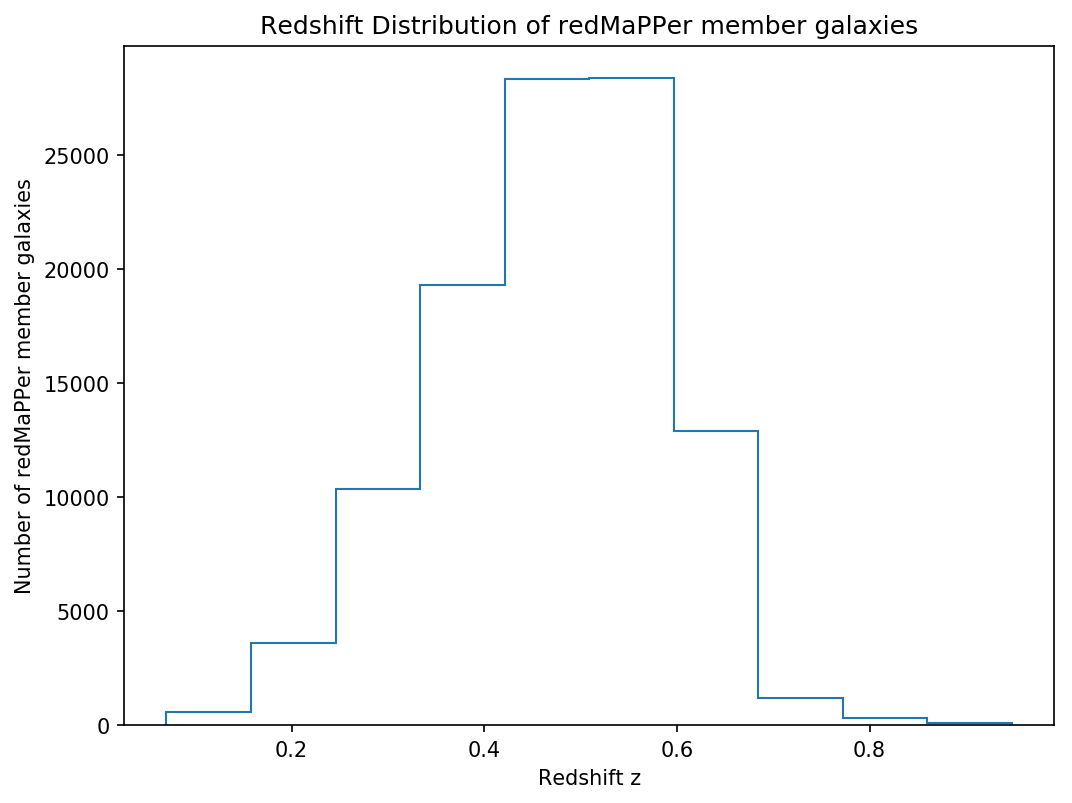

In [26]:
fig,ax=plt.subplots(figsize=(8,6),dpi=150)
ax.hist(members[('All','ZRED2')],histtype='step')
ax.set_xlabel("Redshift z")
ax.set_ylabel("Number of redMaPPer member galaxies")
ax.set_title("Redshift Distribution of redMaPPer member galaxies")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/z_hist.pdf")

# Abs Plots

Aggregated xi:
[ 0.     -0.0991  0.      0.0922  0.1725  0.8582  1.6603  4.1116  1.8811
  9.9104]
------------------------------------------------------------------------------
Aggregated meanlogr:
[   0.       -3.9496    0.      -11.3563  -14.344   -65.1284  -69.0324
 -152.2276 -208.6314    9.0568]
------------------------------------------------------------------------------
Aggregated npairs:
[  0.   1.   0.   4.   6.  34.  48. 160. 436. 905.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0991     nan  0.0231  0.0288  0.0252  0.0346  0.0257  0.0043
  0.011 ]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.9496     nan -2.8391 -2.3907 -1.9155 -1.4382 -0.9514 -0.4785
  0.01  ]
------------------------------------------------------------------------------


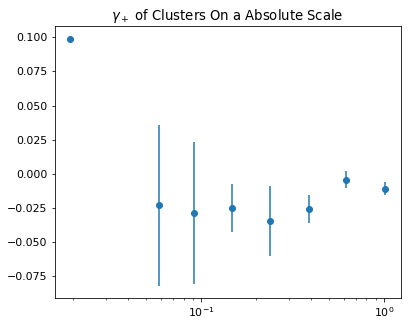

In [27]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

[ 8.0614e-03 -4.0169e-03  8.0985e-04 -8.0003e-04 -1.1234e-03 -1.6914e-05
  3.4635e-04 -8.3508e-05  1.5886e-04  6.9678e-05]
[-1.2262e-04  6.1101e-05 -1.2319e-05  1.2169e-05  1.7087e-05  2.5728e-07
 -5.2684e-06  1.2702e-06 -2.4164e-06 -1.0599e-06]


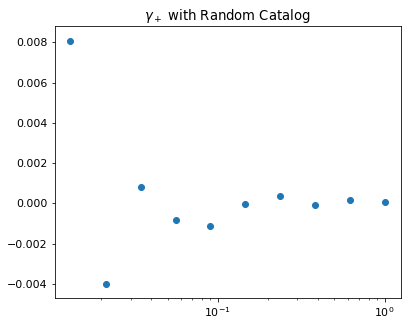

In [28]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

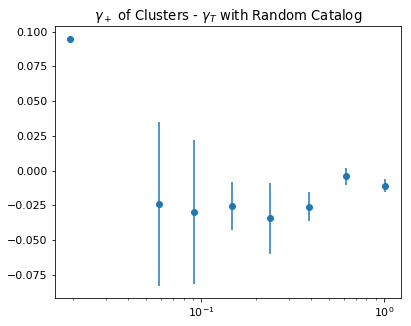

In [29]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

Aggregated xi:
[ 0.     -0.0991  0.      0.1591 -0.1714  0.6036  1.0801  2.0438  3.415
  4.76  ]
------------------------------------------------------------------------------
Aggregated meanlogr:
[   0.       -3.7404    0.       -2.8244  -14.3411  -26.2712  -59.8678
  -79.0133 -134.1196  -23.8766]
------------------------------------------------------------------------------
Aggregated npairs:
[  0.   1.   0.   1.   6.  14.  40.  81. 269. 585.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0991     nan  0.1591 -0.0286  0.0431  0.027   0.0252  0.0127
  0.0081]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7404     nan -2.8244 -2.3902 -1.8765 -1.4967 -0.9755 -0.4986
 -0.0408]
------------------------------------------------------------------------------


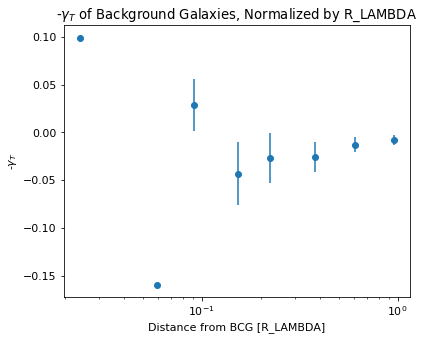

In [39]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"-$\gamma_T$ of Background Galaxies, Normalized by R_LAMBDA")
plt.xlabel("Distance from BCG [R_LAMBDA]")
plt.ylabel(r"-$\gamma_T$")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/gamma_T_rel.pdf")
print_data(sum_rel,mean_rel)

In [31]:
print("Error bar size")
print(sig_rel)

Error bar size
[   nan    nan    nan    nan 0.0273 0.033  0.0263 0.0156 0.008  0.0054]


In [32]:
np.sqrt(np.dot(np.dot(mean_rel[0],np.linalg.inv(cov_rel)),mean_rel[0]))

nan

In [33]:
len(cov_rel)

10

In [34]:
cov_rel

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,  7.4482e-04,
        -1.6637e-04, -4.4946e-04,  1.0224e-04, -1.8289e-05,  1.2551e-05],
       [        nan,         nan,         nan,         nan, -1.6637e-04,
         1.0909e-03, -3.7427e-05, -1.2401e-04,  9.4233e-06,  1.6947e-05],
       [        nan,         nan,         nan,         nan, -4.4946e-04,
        -3.7427e-05,  6.9142e-04, -1.4383e-05

In [35]:
cov_rel.min()

nan

In [36]:
cov_rel.max()

nan

In [37]:
ticks_val=np.exp(mean_rel[1])
ticks_string=["{:.2f}".format(val) for val in ticks_val]
print(ticks_string)

['nan', '0.02', 'nan', '0.06', '0.09', '0.15', '0.22', '0.38', '0.61', '0.96']


In [38]:
fig,ax=plt.subplots(figsize=(6.2,5))

from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.colors as colors

plt.matshow(np.abs(cov_rel),fignum=0,norm=colors.LogNorm(vmin=np.abs(cov_rel).min(),vmax=np.abs(cov_rel).max()))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))

ax.set_xticks(range(len(ticks_val)))
ax.set_yticks(range(len(ticks_val)))

ax.set_xticklabels(ticks_val)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))

ax.set_xlabel("[R_LAMBDA]",labelpad=10)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


cb=plt.colorbar(pad=0.06,format=ticker.FuncFormatter(fmt))




ax.set_title('Covariance Matrix of $-\gamma_T$ at Different R_LAMBDA',fontsize=11,pad=12);
plt.savefig('/home/adt35/des_y1_catalog/sa-master/images/cov.pdf')

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:614: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(*ax.dataLim.intervaly)


ValueError: values must all be positive

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb926d12158> (for post_execute):


ValueError: values must all be positive

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:300: RuntimeWarning: invalid value encountered in log10
  rtol = (np.log10(vmax) - np.log10(vmin)) * 1e-10
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: invalid value encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: invalid value encountered in greater_equal
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: invali

ValueError: values must all be positive

<Figure size 446.4x360 with 2 Axes>

In [ ]:
# print(f.number)

In [ ]:
np.dot(mean_rel[0],np.linalg.inv(cov_rel))

In [ ]:
mean_rel[0]

In [ ]:
cov_rel

In [ ]:
np.linalg.inv(cov_rel)